# MultiOmics RNA + ATAC for Chao dataset emphasis on OL population (MORNAATACCOL) technical documentation
## Multiomics RNAseq & ATACseq on EAE model

<hr>

**This notebook is the following of MORNAATACCOL 14 notebook**

<hr>

In [ ]:
#Memory needed for a full run : 256Gb

In [ ]:
#Early1               = P21208_1003_EAE_ARC
#PeakCtrl2            = P21208_1004_EAE_ARC
#Peak2                = P21208_1005_EAE_ARC
#LateCtrl1            = MORNAATACC_1002 (P21520_1002)
#Late1                = MORNAATACC_1003 (P21520_1003)
#Early2               = P23605_1001
#EarlyCtrl2           = P23605_1002
#Peak3                = P23605_1003
#PeakCtrl3            = P23605_1004
#EarlyCtrl3           = P24115_1001
#EarlyFemale3         = P24115_1002
#EarlyMale3           = P24115_1003
#Late2                = P25316_1001
#LateCtrl2            = P25316_1002
#Late3                = P25316_1003
#LateCtrl3            = P25316_1004
#PeakMale4            = P27208_1001
#PeakFemale4          = P27208_1002
#LateMale4            = P27208_1003
#LateFemale4          = P27208_1004
#Naive1               = P26203_1003
#Naive2               = P26203_1004
#Peak5                = P29557_1001
#Late5                = P29557_1002
#Naive3               = P29557_1004
#EarlyCtrl4           = P29557_1005
#EarlyCtrlMale5       = P29557_1006
#EarlyCtrlFemale5     = P29557_1007
#Early4               = P29557_1008
#EarlyMale5           = P29557_1009
#EarlyFemale5         = P29557_1010

## 0. Environment status

In [5]:
%use

Subkernel 
 Kernel Name 
 Language 
 Language Module 
 Interpreter 
 
 Bash 
 bash 
 bash 
 sos_bash 
 /usr/bin/python3 
 
 Bash 
 calysto_bash 
 bash 
 sos_bash 
 python 
 
 Python3 
 python3 
 python 
 sos_python 
 python 
 
 R 
 ir 
 R 
 sos_r 
 /usr/lib/R/bin/R 
 
 SoS 
 sos 
 sos 
 
 /usr/bin/python3

In [3]:
lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04 LTS
Release:	20.04
Codename:	focal


In [4]:
lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
Address sizes:       46 bits physical, 48 bits virtual
CPU(s):              20
On-line CPU(s) list: 0-19
Thread(s) per core:  1
Core(s) per socket:  10
Socket(s):           2
NUMA node(s):        2
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz
Stepping:            1
CPU MHz:             2735.498
CPU max MHz:         3100.0000
CPU min MHz:         1200.0000
BogoMIPS:            4390.12
Virtualization:      VT-x
L1d cache:           640 KiB
L1i cache:           640 KiB
L2 cache:            5 MiB
L3 cache:            50 MiB
NUMA node0 CPU(s):   0-9
NUMA node1 CPU(s):   10-19
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cm
                     ov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pb
                     e syscall nx pdpe1gb rdtscp lm constant_t

In [5]:
grep MemTotal /proc/meminfo | awk '{print $2 / 1024}'

128374


In [ ]:
apt list --installed

In [ ]:
pip list

In [9]:
jupyter --version

Selected Jupyter core packages...
IPython          : 7.30.1
ipykernel        : 6.6.0
ipywidgets       : 7.6.5
jupyter_client   : 7.1.0
jupyter_core     : 4.9.1
jupyter_server   : 1.13.1
jupyterlab       : 3.1.17
nbclient         : 0.5.9
nbconvert        : 6.2.0
nbformat         : 5.1.3
notebook         : 6.4.6
qtconsole        : 5.2.2
traitlets        : 5.1.0


In [1]:
#conda env export -n jupyter

## 1. Loading environments

### 1.1 R Packages

In [1]:
library(Seurat)
library(Signac)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(stringr)
library(harmony)
library(clustree)
library(data.table)
library(biomaRt)
library(cowplot)
library(randomForest)
library(ggplot2)
library(caret)
library(tidyverse)
library(pheatmap)
library(grid)
library(gridExtra)
library(biovizBase)
library(ggrepel)
library(viridis)
library(reshape2)
library(hues)
library(clusterProfiler)
library(org.Mm.eg.db)
library(ggnewscale)
library(scales)

#conda dependencies trouble
library(enrichplot)
library(ReactomePA)

library(textclean)
library(mclust)

library(muscat)
library(SingleCellExperiment)
library(magrittr)
library(plyr)
library(scater)
library(cowplot)
library(UpSetR)
library(limma)
library(Matrix.utils)
library(purrr)
library(DESeq2)
library(EnhancedVolcano)

#ATAC analysis Signac
library(JASPAR2020)
library(TFBSTools)

library(cicero)
library(SeuratWrappers)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading require

In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] SeuratWrappers_0.3.5               cicero_1.3.9                      
 [3] Gviz_1.44.2                        monocle3_1.3.7                    
 [5] TFBSTools_1.40.0                   JASPAR2020_0.99.10                
 [7] EnhancedVolcano_1.20.0             DESeq2_1.42.1         

### 1.2 Functions

In [3]:
PrctCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        prct = unlist(lapply(genes,calc_helper, object=object))
        result = data.frame(Markers = genes, Cell_proportion = prct)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, PrctCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper <- function(object,genes){
    counts = object[['RNA']]@counts
    ncells = ncol(counts)
    if(genes %in% row.names(counts)){
    sum(counts[genes,]>0)/ncells
    }else{return(NA)}
}

NbCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        nb = unlist(lapply(genes,calc_helper_nb, object=object))
        result = data.frame(Markers = genes, Cell_nb = nb)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, NbCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper_nb <- function(object,genes){
    counts = object[['RNA']]@counts
    if(genes %in% row.names(counts)){
    length(counts[genes,][counts[genes,] > 0])
    }else{return(NA)}
}

DoMultiBarHeatmap <- function (object, features = NULL, cells = NULL, group.by = "ident", additional.group.by = NULL, additional.group.sort.by = NULL,  cols.use = NULL, group.bar = TRUE, disp.min = -2.5, disp.max = NULL, layer = "scale.data", assay = NULL, label = TRUE, size = 5.5, hjust = 0, angle = 45, raster = TRUE, draw.lines = TRUE, lines.width = NULL, group.bar.height = 0.02, combine = TRUE){

  cells <- cells %||% colnames(x = object)
  if (is.numeric(x = cells)) {
    cells <- colnames(x = object)[cells]
  }
  assay <- assay %||% DefaultAssay(object = object)
  DefaultAssay(object = object) <- assay
  features <- features %||% VariableFeatures(object = object)
  ## Why reverse???
  features <- rev(x = unique(x = features))
  disp.max <- disp.max %||% ifelse(test = layer == "scale.data", yes = 2.5, no = 6)
  possible.features <- rownames(x = LayerData(object = object, assay = assay, layer = layer))
  if (any(!features %in% possible.features)) {
    bad.features <- features[!features %in% possible.features]
    features <- features[features %in% possible.features]
    if (length(x = features) == 0) {
      stop("No requested features found in the ", layer,
      " slot for the ", assay, " assay.")
    }
    warning("The following features were omitted as they were not found in the ", layer, " slot for the ", assay, " assay: ", paste(bad.features, collapse = ", "))
  }

  if (!is.null(additional.group.sort.by)) {
    if (any(!additional.group.sort.by %in% additional.group.by)) {
      bad.sorts <- additional.group.sort.by[!additional.group.sort.by %in% additional.group.by]
      additional.group.sort.by <- additional.group.sort.by[additional.group.sort.by %in% additional.group.by]
      if (length(x = bad.sorts) > 0) {
        warning("The following additional sorts were omitted as they were not a subset of additional.group.by : ",
        paste(bad.sorts, collapse = ", "))
      }
    }
  }

  data <- as.data.frame(x = as.matrix(x = t(x = LayerData(object = object, assay = assay, layer = layer)[features, cells, drop = FALSE])))

  object <- suppressMessages(expr = StashIdent(object = object, save.name = "ident"))
  group.by <- group.by %||% "ident"
  groups.use <- object[[c(group.by, additional.group.by[!additional.group.by %in% group.by])]][cells, , drop = FALSE]
  plots <- list()
  for (i in group.by) {
    data.group <- data
    if (!is.null(additional.group.by)) {
      additional.group.use <- additional.group.by[additional.group.by!=i]
      if (!is.null(additional.group.sort.by)){
        additional.sort.use = additional.group.sort.by[additional.group.sort.by != i]
      } else {
        additional.sort.use = NULL
      }
    } else {
      additional.group.use = NULL
      additional.sort.use = NULL
    }

    group.use <- groups.use[, c(i, additional.group.use), drop = FALSE]

    for(colname in colnames(group.use)){
      if (!is.factor(x = group.use[[colname]])) {
        group.use[[colname]] <- factor(x = group.use[[colname]])
      }
    }

    if (draw.lines) {
      lines.width <- lines.width %||% ceiling(x = nrow(x = data.group) * 0.0025)
      placeholder.cells <- sapply(X = 1:(length(x = levels(x = group.use[[i]])) * lines.width), FUN = function(x) {
        return(Seurat:::RandomName(length = 20))
      })
      placeholder.groups <- data.frame(rep(x = levels(x = group.use[[i]]), times = lines.width))
      group.levels <- list()
      group.levels[[i]] = levels(x = group.use[[i]])
      for (j in additional.group.use) {
        group.levels[[j]] <- levels(x = group.use[[j]])
        placeholder.groups[[j]] = NA
      }

      colnames(placeholder.groups) <- colnames(group.use)
      rownames(placeholder.groups) <- placeholder.cells

      group.use <- sapply(group.use, as.vector)
      rownames(x = group.use) <- cells

      group.use <- rbind(group.use, placeholder.groups)

      for (j in names(group.levels)) {
        group.use[[j]] <- factor(x = group.use[[j]], levels = group.levels[[j]])
      }

      na.data.group <- matrix(data = NA, nrow = length(x = placeholder.cells), ncol = ncol(x = data.group), dimnames = list(placeholder.cells, colnames(x = data.group)))
      data.group <- rbind(data.group, na.data.group)
    }

    order_expr <- paste0('order(', paste(c(i, additional.sort.use), collapse=','), ')')
    group.use = with(group.use, group.use[eval(parse(text=order_expr)), , drop=F])

    plot <- Seurat:::SingleRasterMap(data = data.group, raster = raster, disp.min = disp.min, disp.max = disp.max, feature.order = features, cell.order = rownames(x = group.use), group.by = group.use[[i]])

    if (group.bar) {
      pbuild <- ggplot_build(plot = plot)
      group.use2 <- group.use
      cols <- list()
      na.group <- Seurat:::RandomName(length = 20)
      for (colname in rev(x = colnames(group.use2))) {
        if (colname == i) {
          colid = paste0('Identity (', colname, ')')
        } else {
          colid = colname
        }

        # Default
        cols[[colname]] <- c(scales::hue_pal()(length(x = levels(x = group.use[[colname]]))))

        #Overwrite if better value is provided
        if (!is.null(cols.use[[colname]])) {
          req_length = length(x = levels(group.use))
          if (length(cols.use[[colname]]) < req_length){
            warning("Cannot use provided colors for ", colname, " since there aren't enough colors.")
          } else {
            if (!is.null(names(cols.use[[colname]]))) {
              if (all(levels(group.use[[colname]]) %in% names(cols.use[[colname]]))) {
                cols[[colname]] <- as.vector(cols.use[[colname]][levels(group.use[[colname]])])
              } else {
                warning("Cannot use provided colors for ", colname, " since all levels (", paste(levels(group.use[[colname]]), collapse=","), ") are not represented.")
              }
            } else {
              cols[[colname]] <- as.vector(cols.use[[colname]])[c(1:length(x = levels(x = group.use[[colname]])))]
            }
          }
        }

        # Add white if there's lines
        if (draw.lines) {
          levels(x = group.use2[[colname]]) <- c(levels(x = group.use2[[colname]]), na.group)
          group.use2[placeholder.cells, colname] <- na.group
          cols[[colname]] <- c(cols[[colname]], "#FFFFFF")
        }
        names(x = cols[[colname]]) <- levels(x = group.use2[[colname]])

        y.range <- diff(x = pbuild$layout$panel_params[[1]]$y.range)
        y.pos <- max(pbuild$layout$panel_params[[1]]$y.range) + y.range * 0.015
        y.max <- y.pos + group.bar.height * y.range
        pbuild$layout$panel_params[[1]]$y.range <- c(pbuild$layout$panel_params[[1]]$y.range[1], y.max)

        plot <- suppressMessages(plot +
          annotation_raster(raster = t(x = cols[[colname]][group.use2[[colname]]]),  xmin = -Inf, xmax = Inf, ymin = y.pos, ymax = y.max) +
          annotation_custom(grob = grid::textGrob(label = colid, hjust = 0, gp = gpar(cex = 0.75)), ymin = mean(c(y.pos, y.max)), ymax = mean(c(y.pos, y.max)), xmin = Inf, xmax = Inf) +
          coord_cartesian(ylim = c(0, y.max), clip = "off")
        )


        if ((colname == i) && label) {
          x.max <- max(pbuild$layout$panel_params[[1]]$x.range)
          x.divs <- pbuild$layout$panel_params[[1]]$x.major %||% pbuild$layout$panel_params[[1]]$x$break_positions()
          group.use$x <- x.divs

          label.x.pos <- tapply(X = group.use$x, INDEX = group.use[[colname]], FUN = median) * x.max
          label.x.pos <- data.frame(group = names(x = label.x.pos), label.x.pos)
          plot <- plot + geom_text(stat = "identity", data = label.x.pos, aes_string(label = "group", x = "label.x.pos"), y = y.max + y.max *  0.03 * 0.5, angle = angle, hjust = hjust, size = size)
          plot <- suppressMessages(plot + coord_cartesian(ylim = c(0, y.max + y.max * 0.002 * max(nchar(x = levels(x = group.use[[colname]]))) * size), clip = "off"))
        }
      }
    }
    plot <- plot + theme(line = element_blank())
    plots[[i]] <- plot
  }
  if (combine) {
    plots <- CombinePlots(plots = plots)
  }
  return(plots)
}


#####################################################
# Function for getting the marker peaks from the Seurat
# object, based on the current ident
#####################################################
getMarkerPeaks <- function(obj, doublets, n_peaks = 100, min_cells = 200){

  n_clusters = length(unique(as.vector(Idents(obj))))
  
  cells <- Cells(obj)
  
  # remove the doublet cells for better marker peaks
  obj <- subset(obj, cells = cells[!cells %in% doublets])
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  # default preporcessing o Signac applied
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the marker peaks between all clusters
  da_peaks <- FindAllMarkers(
    object = obj,
    slot = "data",
    min.pct = 0.1,
    only.pos = TRUE,
    test.use = 'LR',
    min.cells.group = min_cells,
    verbose = F
  )
  
  # only keep the significant peaks
  metadata = lapply(unique(da_peaks$cluster), function(x){
    return(data.frame(da_peaks[da_peaks$p_val_adj < 0.05 & da_peaks$cluster == x,]))
  })
  
  names(metadata) <- paste0("Cluster_", unique(da_peaks$cluster))
  
  rm(da_peaks)
  
  meta_peaks = data.frame()
  
  for (i in names(metadata)) {
    
    cur_meta = data.frame(metadata[[i]])
    cur_meta$peaks = row.names(metadata[[i]])
    cur_meta$cluster = i
    row.names(cur_meta) = c()
    
    meta_peaks = rbind(meta_peaks, cur_meta)
    
    rm(cur_meta)
    
  }
  
  # sort the peaks based on the fold changes and signifigance, choose ones with high FC first
  meta_peaks = meta_peaks[order(meta_peaks$avg_logFC, -meta_peaks$p_val_adj, decreasing = T),]
  
  marker_peaks_set = data.frame(matrix(ncol=2,nrow=0, dimnames=list(NULL, c("gene", "cluster"))))
  
  # extract 100 marker peaks for each cluster
  while(nrow(marker_peaks_set) < n_peaks*n_clusters) {
    
    temp = meta_peaks[1, c("gene", "cluster")]
    
    marker_peaks_set = rbind(marker_peaks_set, temp)
    
    meta_peaks = meta_peaks[which(meta_peaks$gene != temp$gene),]
    
    if(length(which(marker_peaks_set$cluster == temp$cluster)) == n_peaks){
      meta_peaks = meta_peaks[which(meta_peaks$cluster != temp$cluster),]
    }
    
    rm(temp)
  }
  
  marker_peaks_set = marker_peaks_set[!is.na(marker_peaks_set$gene),]
  
  marker_peaks_set$cluster= factor(marker_peaks_set$cluster, levels = str_sort(unique(marker_peaks_set$cluster), numeric = T))
  marker_peaks_set = marker_peaks_set[order(marker_peaks_set$cluster),]
  
  rm(meta_peaks)
  
  colnames(marker_peaks_set)[1]<- "peaks"
  
  return(marker_peaks_set)
}

############################################
# get the readcount distribution profile for
# the singlet cells of every cluster
############################################
annotateDoublets <- function(obj, marker_peaks, doublets, k = 15){

  # get the read count distributions on the cluster specific marker peaks for all of the cells
  cell.values <- getCellValues(obj, cells = Cells(obj), marker_peaks_set = marker_peaks, doublets = doublets, k = k)
  
  #get the profile for the singlet cells of each cluster
  singlet.profile <- getProfiles(cell.values)
 
  # just annotate the doublets
  doublets <- cell.values %>% 
    subset(doublet == "doublet")
  
  clusters <- doublets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # look at every cluster in the data
  a.class <- lapply(clusters, function(clus){
    
    # just select the doublets that have the current cluster
    # as its most dominant cluster
    t.doublets <- doublets %>%
      subset(a.homotypic == clus, select = clusters)
    
    # get the profile of the current cluster
    t.profile <- singlet.profile[,clus]
    
    # calculate the distance of doublet cell distributions to
    # the profile of the current cluster
    t.dist <- apply(t.doublets, 1, function(cell){
      return(dist(rbind(cell, t.profile)))
    })
    
    # fit a GMM using the mclust package with no class limitations
    fit <- Mclust(t.dist, verbose = F)
    t.class <- fit$classification
    
    t.doublets$dist <- t.dist[rownames(t.doublets)]
    t.doublets$class <- t.class[rownames(t.doublets)]
    t.doublets$max.class <- names(which.max(fit[["parameters"]][["mean"]]))
    t.doublets$num.class <- length(unique(fit$classification))
    return(t.doublets[,c("dist", "class", "max.class", "num.class")])
  }) %>% bind_rows()
  
  doublets$class <- a.class[rownames(doublets),"class"]
  doublets$max.class <- a.class[rownames(doublets),"max.class"]
  doublets$num.class <- a.class[rownames(doublets),"num.class"]
  
  doublets <- lapply(rownames(doublets), function(cell){
    probs <- doublets[cell, clusters]
    
    # only classify the doublets that belong to the final class 
    # doublets[cell,"type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"], "heterotypic", "homotypic")
    doublets[cell,"d.type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"] & doublets[cell,"num.class"] > 1,
                                    "heterotypic", "homotypic")
    
    # report the top clusters based on type of the doublet; if homotypic just one, if heterotypic top 2 clusters
    doublets[cell, "d.annotation"] <- ifelse(doublets[cell,"d.type"] == "homotypic",
                                             names(probs)[order(probs, decreasing = T)[1]],
                                             paste(sort(names(probs)[order(probs, decreasing = T)[1:2]]), collapse = ".")) 
    
    return(doublets[cell,!(colnames(doublets) %in% c("a.heterotypic", "a.homotypic", "ident", "class", "max.class","num.class")), drop = FALSE])
  }) %>% bind_rows()

  return(doublets)
}

#####################################################
# Function to get the ditsribution of read counts on
# the marker peaks of clusters
#####################################################
getReadCountDistributions <- function(marker_peaks, read_counts){
  
  t_read_counts = data.frame(merge(marker_peaks, 100*read_counts, by.x = "peaks", by.y = 0, sort = F))
  names(t_read_counts) <- sub("^X", "", names(t_read_counts))
  t_read_counts$ids = unclass(t_read_counts$cluster)
  
  probs = matrix(nrow = ncol(read_counts), ncol = length(unique(t_read_counts$cluster)))
  
  row.names(probs) <- colnames(read_counts)
  colnames(probs) <- unique(t_read_counts$cluster)
  
  for (i in 1:nrow(probs)) {
    density_data = vector()
    
    for(j in 1:nrow(t_read_counts))
      density_data = c(density_data, rep(t_read_counts$ids[j], t_read_counts[j,row.names(probs)[i]]))
    
    for(j in 1:ncol(probs)){
      if(j==1)
        probs[i,j] = ecdf(density_data)(j)
      else
        probs[i,j] = (ecdf(density_data)(j) - ecdf(density_data)((j-1)))
    }
    
  }
  
  return(data.frame(probs))
}

#####################################################
# Function to plot the read count distributions of
# the given cells
#####################################################
plotReadCountDistributions <- function(probs, folder_path){
  
  if(!dir.exists(folder_path))
    dir.create(folder_path)
  
  sapply(rownames(probs), function(x){long_probs = gather(as.data.frame(bind_rows(probs[x,])), cell_type, probability, factor_key = TRUE)
  ggplot(data=long_probs, aes(x=cell_type, y=probability)) +
    geom_col() +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle(x) + xlab("Cluster") + ylab("Score") + ylim(0,1) +
    ggsave(filename = paste0(folder_path, "/Probs_", x, ".pdf"))})
  
}

#####################################################
# Function to add read count distributions for the 
# cells in the provided in te Seurat object with the
# provided marker peaks
#####################################################
getCellValues <- function(obj, cells, marker_peaks_set, doublets, k = 15){
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the neighbor graph of the cells for aggregation
  obj <- FindNeighbors(obj, reduction = "svd", dims = 1:50, k.param = k+1, verbose = F)
  
  cell_annotations <- lapply(cells, function(cell){
    
    # extract the k neighbors of the current cell
    neighbors <- names(obj@graphs$ATAC_nn[cell, obj@graphs$ATAC_nn[cell,] > 0])
    
    # extract the reads for the cell and its k-nearest neighbors
    reads <- Matrix::as.matrix(subset(obj, cells = neighbors, features = marker_peaks_set$peaks)@assays[["ATAC"]]@counts)
    
    no_clusters <- length(unique(marker_peaks_set$cluster))
    
    results = data.frame(matrix(nrow = 0, ncol = no_clusters+1)) %>%
      `colnames<-`(value = c("cell_id", as.character(unique(marker_peaks_set$cluster))))
    
    results[cell,"cell_id"] = cell
    
    # aggregate the reads for the cell by taking the mean with k-nn
    reads <- data.frame(apply(reads, 1, mean)) %>%
      `colnames<-`(value = cell)
    
    if(colSums(reads) == 0){
      results[,-1] <- 0
      
      results[cell, "a.heterotypic"] <- NA
      results[cell, "a.homotypic"] <- NA
        
      return(results)
    }
    
    # calculate the read count distribution of the cell on the marker peaks
    doublet_probs <- reads %>%
      getReadCountDistributions(marker_peaks_set,.) %>% data.frame()
    
    results[cell, colnames(doublet_probs)] <- doublet_probs
    
    # report the 2 clusters that have the highest score
    results[cell, "a.heterotypic"] <- paste(names(doublet_probs)[order(doublet_probs, decreasing = T)[1:2]], collapse = ".")
    
    #report the cluster with highest score
    results[cell, "a.homotypic"] <- names(which.max(doublet_probs))
    
    return(results)
  }) %>% do.call(rbind, .)
  
  # append the type of the cells
  cell_annotations <- mutate(cell_annotations, doublet = ifelse(cell_id %in% doublets, "doublet", "singlet"))
  row.names(cell_annotations) <- cell_annotations$cell_id
  
  cell_annotations[, "ident"] <- Idents(obj)[rownames(cell_annotations)]
  
  return(cell_annotations)
}

#####################################################
# get the read count distribution profile for the
# singlet cells of every cluster
#####################################################
getProfiles <- function(cell.values){

  # get the singlet cells
  singlets <- cell.values %>%
    subset(doublet == "singlet")
  
  clusters <- singlets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # for each cluster in the data find the average profile from singlets
  t.profile <- sapply(clusters, function(clus){
    t.singlets <- singlets %>%
      subset(a.homotypic == clus & paste0("Cluster_", ident) == clus, select = clusters)
    
    t.profile <- apply(t.singlets,2,mean)
    return(t.profile)
  })
  
  return(t.profile)
  
}

save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

order_heatmap_genes <- function(x){
  if(ncol(x) == 1 | nrow(x) == 1) { return(rownames(x)) 
  } else {
    xs <- split(x, apply(x, 1, function(i) colnames(x)[which.max(i)]))
    if(ncol(x) == length(orig.ident_merge_colors)-1) {
      for(tp in names(xs)){
        xs[[tp]] <- xs[[tp]][order(xs[[tp]][,tp], decreasing=TRUE),]
      }
    }
    sapply(names(xs), function(i){
        order_heatmap_genes(xs[[i]][, colnames(x) != i, drop = FALSE ])
    }, simplify = FALSE)
  }
}

                         filterCells <- function(object,fragments,nbcells){
    # Make fragments per cell table
    fragments.summary <- sort(table(c(fragments$name,colnames(object))),decreasing = TRUE) - 1
    
    # Split cells by cluster - return fraction of cells per cluster
    fragments.summary.ls <-  lapply(levels(object@active.ident),function(x){
      object.x <- object[,object@active.ident == x]
      barcodes <- colnames(object.x)
      fragments.summary.x <- fragments.summary[names(fragments.summary) %in% barcodes]
      fragments.summary.x <- sort(fragments.summary.x,decreasing = TRUE)
      head(x = fragments.summary.x, n = nbcells)
      #head(x = fragments.summary.x, n = dim(object.x)[2] * fraction)
    })
    
    # unlist and merge cell names
    cells <- unlist(lapply(fragments.summary.ls,names))
    return(cells)
}

fragmentsToMatrix <- function(fragments,window){
    bins <- tile(range(fragments),width=window)[[1]]
    
    fragments.ls <- split(fragments,as.factor(fragments$name))
    seqlevels(bins,pruning.mode = "coarse") <- names(coverage(fragments.ls[[1]]))

    fragments.ls.coverage <- lapply(fragments.ls,function(x){
        x <- coverage(x)
        x.bins <- binnedAverage(bins = bins,numvar = x, "coverage")
        as.numeric(x.bins$coverage)
    })
    
    fragments.matrix <- t(do.call("rbind",fragments.ls.coverage))
    rownames(fragments.matrix) <- start(bins)
    
    return(fragments.matrix)
}

plotHeatmapBW <- function(object,
                       fragmentsGrange,
                       interestingRegion,
                       window = 5000,
                       annotFilter,
                       nbcells = 50,
                       clusters_order = NULL,
                       cells = NULL,...
                       ) {
  
if(is.null(clusters_order)){clusters_order  <- levels(object@active.ident)}
if(is.null(cells)){cells.to.plot            <- sample(colnames(object),nbcells)}
#if(is.null(cells)){cells.to.plot            <- sample(colnames(object),fraction * dim(object)[2])}

fragments.interesting <- fragmentsGrange  

fragments.interesting <- fragments.interesting[fragments.interesting$name %in% cells.to.plot]

fragments.interesting.matrix <- fragmentsToMatrix(fragments    = fragments.interesting,
                                                  window       = window)

dummy.mat <- matrix(data = 0, nrow = dim(fragments.interesting.matrix)[1],ncol = length(cells.to.plot[!cells.to.plot %in% colnames(fragments.interesting.matrix)]))
colnames(dummy.mat) <- cells.to.plot[!cells.to.plot %in% colnames(fragments.interesting.matrix)]
rownames(dummy.mat) <- rownames(fragments.interesting.matrix)

fragments.interesting.matrix <- cbind(fragments.interesting.matrix,dummy.mat)
                                                  
fragments.interesting.matrix.binary <- apply(fragments.interesting.matrix,2,as.logical)
fragments.interesting.matrix.binary <- Matrix::Matrix(apply(fragments.interesting.matrix.binary,2,as.numeric),sparse = TRUE)

rownames(fragments.interesting.matrix) <- as.numeric(rownames(fragments.interesting.matrix))
rownames(fragments.interesting.matrix.binary) <- as.numeric(rownames(fragments.interesting.matrix))

round_coordinates = 250000

clusters_annotations <- sample(factor(object@active.ident[colnames(fragments.interesting.matrix.binary)],levels = clusters_order))

annotation_row       <- data.frame(clusters_annotations[order(clusters_annotations)])
colnames(annotation_row) <- "Cluster"

xlabels  <- as.numeric(rownames(fragments.interesting.matrix))
xlabels[xlabels %% round_coordinates != 0] <- ""

p1 <- pheatmap(t(fragments.interesting.matrix.binary)[rownames(annotation_row),],
         cluster_rows=FALSE,
         cluster_cols=FALSE,
         show_rownames=FALSE,
         show_colnames=TRUE,
         labels_col = xlabels,
         annotation_row = annotation_row,
         annotation_legend= TRUE,
         annotation_names_row = FALSE,
         color = colorRampPalette(c("white","black"))(2),
         gaps_row= cumsum(table(annotation_row$Cluster)[clusters_order]),
         border_color = NA,...
         )

return(p1)
}

plotHeatmapBWcolor <- function(object,
                       fragmentsGrange,
                       interestingRegion,
                       window = 5000,
                       annotFilter,
                       nbcells = 50,
                       clusters_order = NULL,
                       color_map = NULL,
                       cells = NULL,...
                       ) {
  
if(is.null(clusters_order)){clusters_order  <- levels(object@active.ident)}
if(is.null(cells)){cells.to.plot            <- sample(colnames(object),nbcells)}
#if(is.null(cells)){cells.to.plot            <- sample(colnames(object),fraction * dim(object)[2])}

fragments.interesting <- fragmentsGrange  

fragments.interesting <- fragments.interesting[fragments.interesting$name %in% cells.to.plot]

fragments.interesting.matrix <- fragmentsToMatrix(fragments    = fragments.interesting,
                                                  window       = window)

dummy.mat <- matrix(data = 0, nrow = dim(fragments.interesting.matrix)[1],ncol = length(cells.to.plot[!cells.to.plot %in% colnames(fragments.interesting.matrix)]))
colnames(dummy.mat) <- cells.to.plot[!cells.to.plot %in% colnames(fragments.interesting.matrix)]
rownames(dummy.mat) <- rownames(fragments.interesting.matrix)

fragments.interesting.matrix <- cbind(fragments.interesting.matrix,dummy.mat)
                                                  
fragments.interesting.matrix.binary <- apply(fragments.interesting.matrix,2,as.logical)
fragments.interesting.matrix.binary <- Matrix::Matrix(apply(fragments.interesting.matrix.binary,2,as.numeric),sparse = TRUE)

rownames(fragments.interesting.matrix) <- as.numeric(rownames(fragments.interesting.matrix))
rownames(fragments.interesting.matrix.binary) <- as.numeric(rownames(fragments.interesting.matrix))

round_coordinates = 250000

clusters_annotations <- sample(factor(object@active.ident[colnames(fragments.interesting.matrix.binary)],levels = clusters_order))

annotation_row       <- data.frame(clusters_annotations[order(clusters_annotations)])
colnames(annotation_row) <- "Cluster"

xlabels  <- as.numeric(rownames(fragments.interesting.matrix))
xlabels[xlabels %% round_coordinates != 0] <- ""

if(!is.null(color_map)){
    p <- lapply(names(color_map), function(x){
         tmp <- annotation_row$Cluster
         names(tmp) <- rownames(annotation_row)
         tmp_rownames <- names(tmp[tmp==x])
         pheatmap(t(fragments.interesting.matrix.binary)[tmp_rownames,],
             cluster_rows=FALSE,
             cluster_cols=FALSE,
             show_rownames=FALSE,
             show_colnames=TRUE,
             labels_col = xlabels,
             annotation_names_row = FALSE,
             color = colorRampPalette(c("white",color_map[x]))(2),
             border_color = NA,...
             )
         })
} else{
    p1 <- pheatmap(t(fragments.interesting.matrix.binary)[rownames(annotation_row),],
         cluster_rows=FALSE,
         cluster_cols=FALSE,
         show_rownames=FALSE,
         show_colnames=TRUE,
         labels_col = xlabels,
         annotation_row = annotation_row,
         annotation_legend= TRUE,
         annotation_names_row = FALSE,
         color = colorRampPalette(c("white","black"))(2),
         gaps_row= cumsum(table(annotation_row$Cluster)[clusters_order]),
         border_color = NA,...
         )

    return(p1)
}
}

### 1.3 Set up R parameters

In [4]:
#Set up global parameters
OS_path <- "/sing_data/"
macs2_path = "/usr/local/bin/macs2"
amulet_path = "/AMULET"
#Conda Monod
#OS_path <- "/datb/gcb/gcb_bh/"
#macs2_path = "/home/bastien/miniconda3/envs/jupyter_MORNAATACC/bin/macs2"
#amulet_path = "/home/bastien/AMULET"

OS_path_datasets <- paste0(OS_path, "Data/MORNAATACC/Alignment/")
OS_path_outputs <- paste0(OS_path, "Data/MORNAATACC/Outputs/")
OS_path_inputs <- paste0(OS_path, "Data/MORNAATACC/Inputs/")
datasets_path <- paste0(OS_path,"Data/Others/Datasets/")

seed <- 424242
options(repr.plot.width=16, repr.plot.height=12)
options(future.globals.maxSize = 8000 * 1024^2)

options(repr.matrix.max.rows=100, repr.matrix.max.cols=100)

In [5]:
#Blue
#DDEAF8
#BBD4F1
#88B4E7
#5695DC
#2A75CB
#1F5898
#153B66

#Green
#E9EDE9
#D2DAD2
#BCC8BC
#A5B6A5
#8FA38F
#789178
#657B65
#536553
#404F40
#2E382E

#Gold
#FFF3D6
#FFE7AD
#FFD470
#FFC233
#F5AB00
#B88100
#7A5600

#Orange
#FDDDD8
#FBBAB1
#F88877
#F5563D
#E92A0C
#AE1F09
#741506

#Brown
#EFE7E6
#E0CECD
#C8A9A7
#B08482
#97615E
#714947
#4B312F

#Purple
#F6EEFC
#ECDCF9
#E2CBF6
#D8B9F3
#CEA8F0
#C596ED
#BB85EA
#B173E7
#A862E4
#9E51E1
#943FDE
#8A2EDC
#8023D1
#7621C0
#6B1EAE
#601B9D
#55188C
#4B157A
#401269
#350F57
#2A0C45
#1F0934
#150623
#0B0312

#Honey
#FFF9EB
#FFF3D6
#FFEDC2
#FFE7AD
#FFE099
#FFDA85
#FFD470
#FFCE5C
#FFC847
#FFC233
#FFBC1F
#FFB60A
#F5AB00
#E09D00
#CC8F00
#B88100
#A37200
#8F6400
#7A5600
#664700
#523900
#3D2B00
#291D00
#140E00

In [6]:
names_Ctrl <- c("EarlyCtrl2", "EarlyCtrl3", "EarlyCtrl4", "EarlyCtrlMale5", "EarlyCtrlFemale5", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3")
names_Early <- c("Early1", "EarlyFemale3", "EarlyMale3", "Early4", "EarlyMale5", "EarlyFemale5")
names_Peak <- c("Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Peak5")
names_Late <- c("Late1", "Late2","Late3", "LateMale4", "LateFemale4", "Late5")

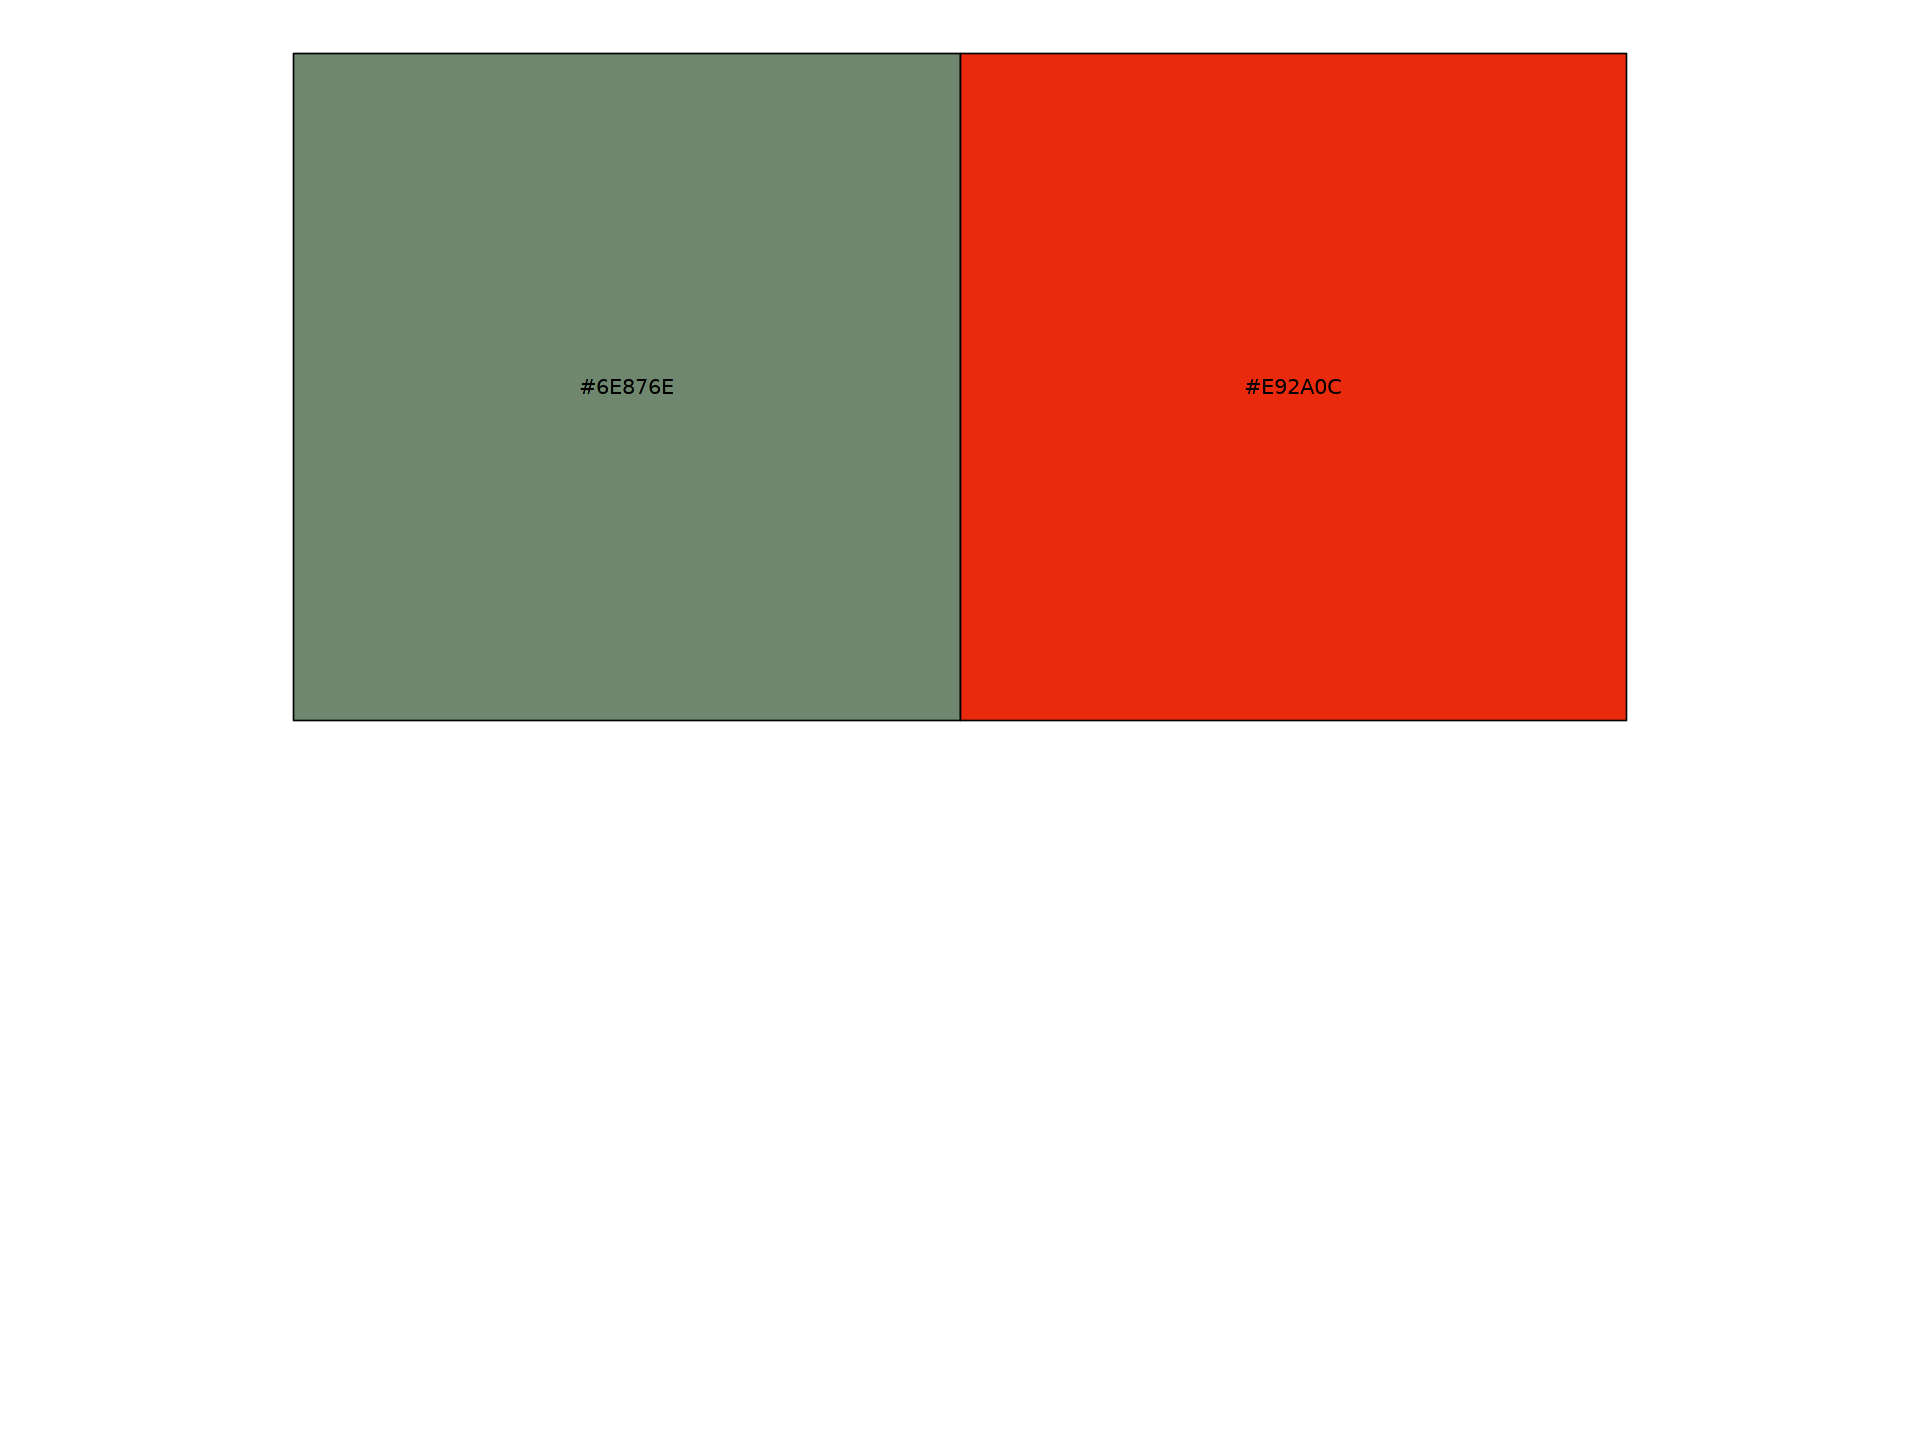

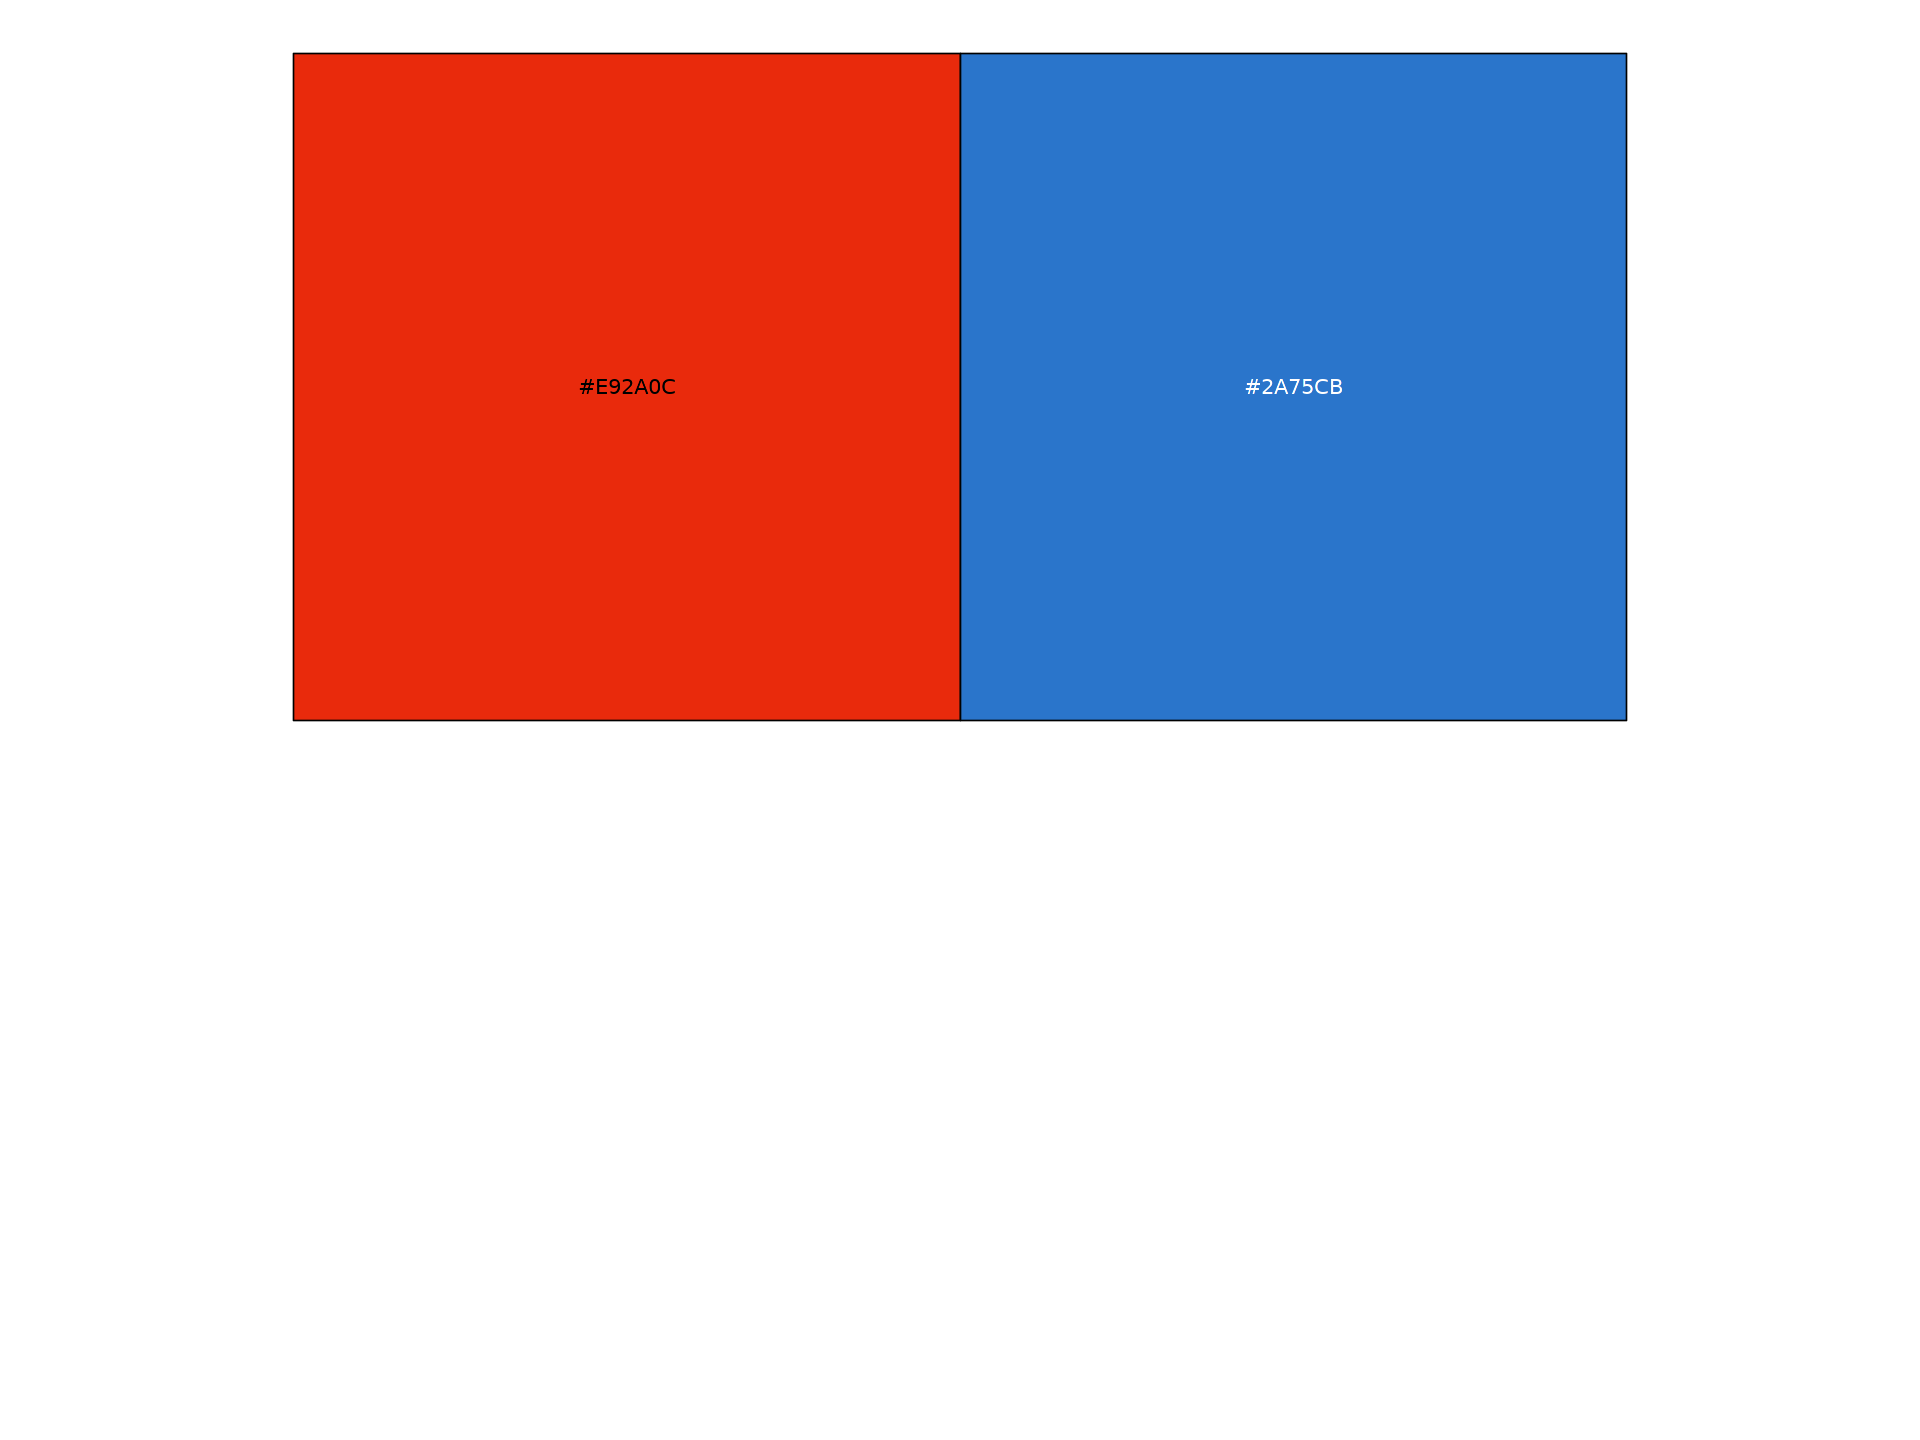

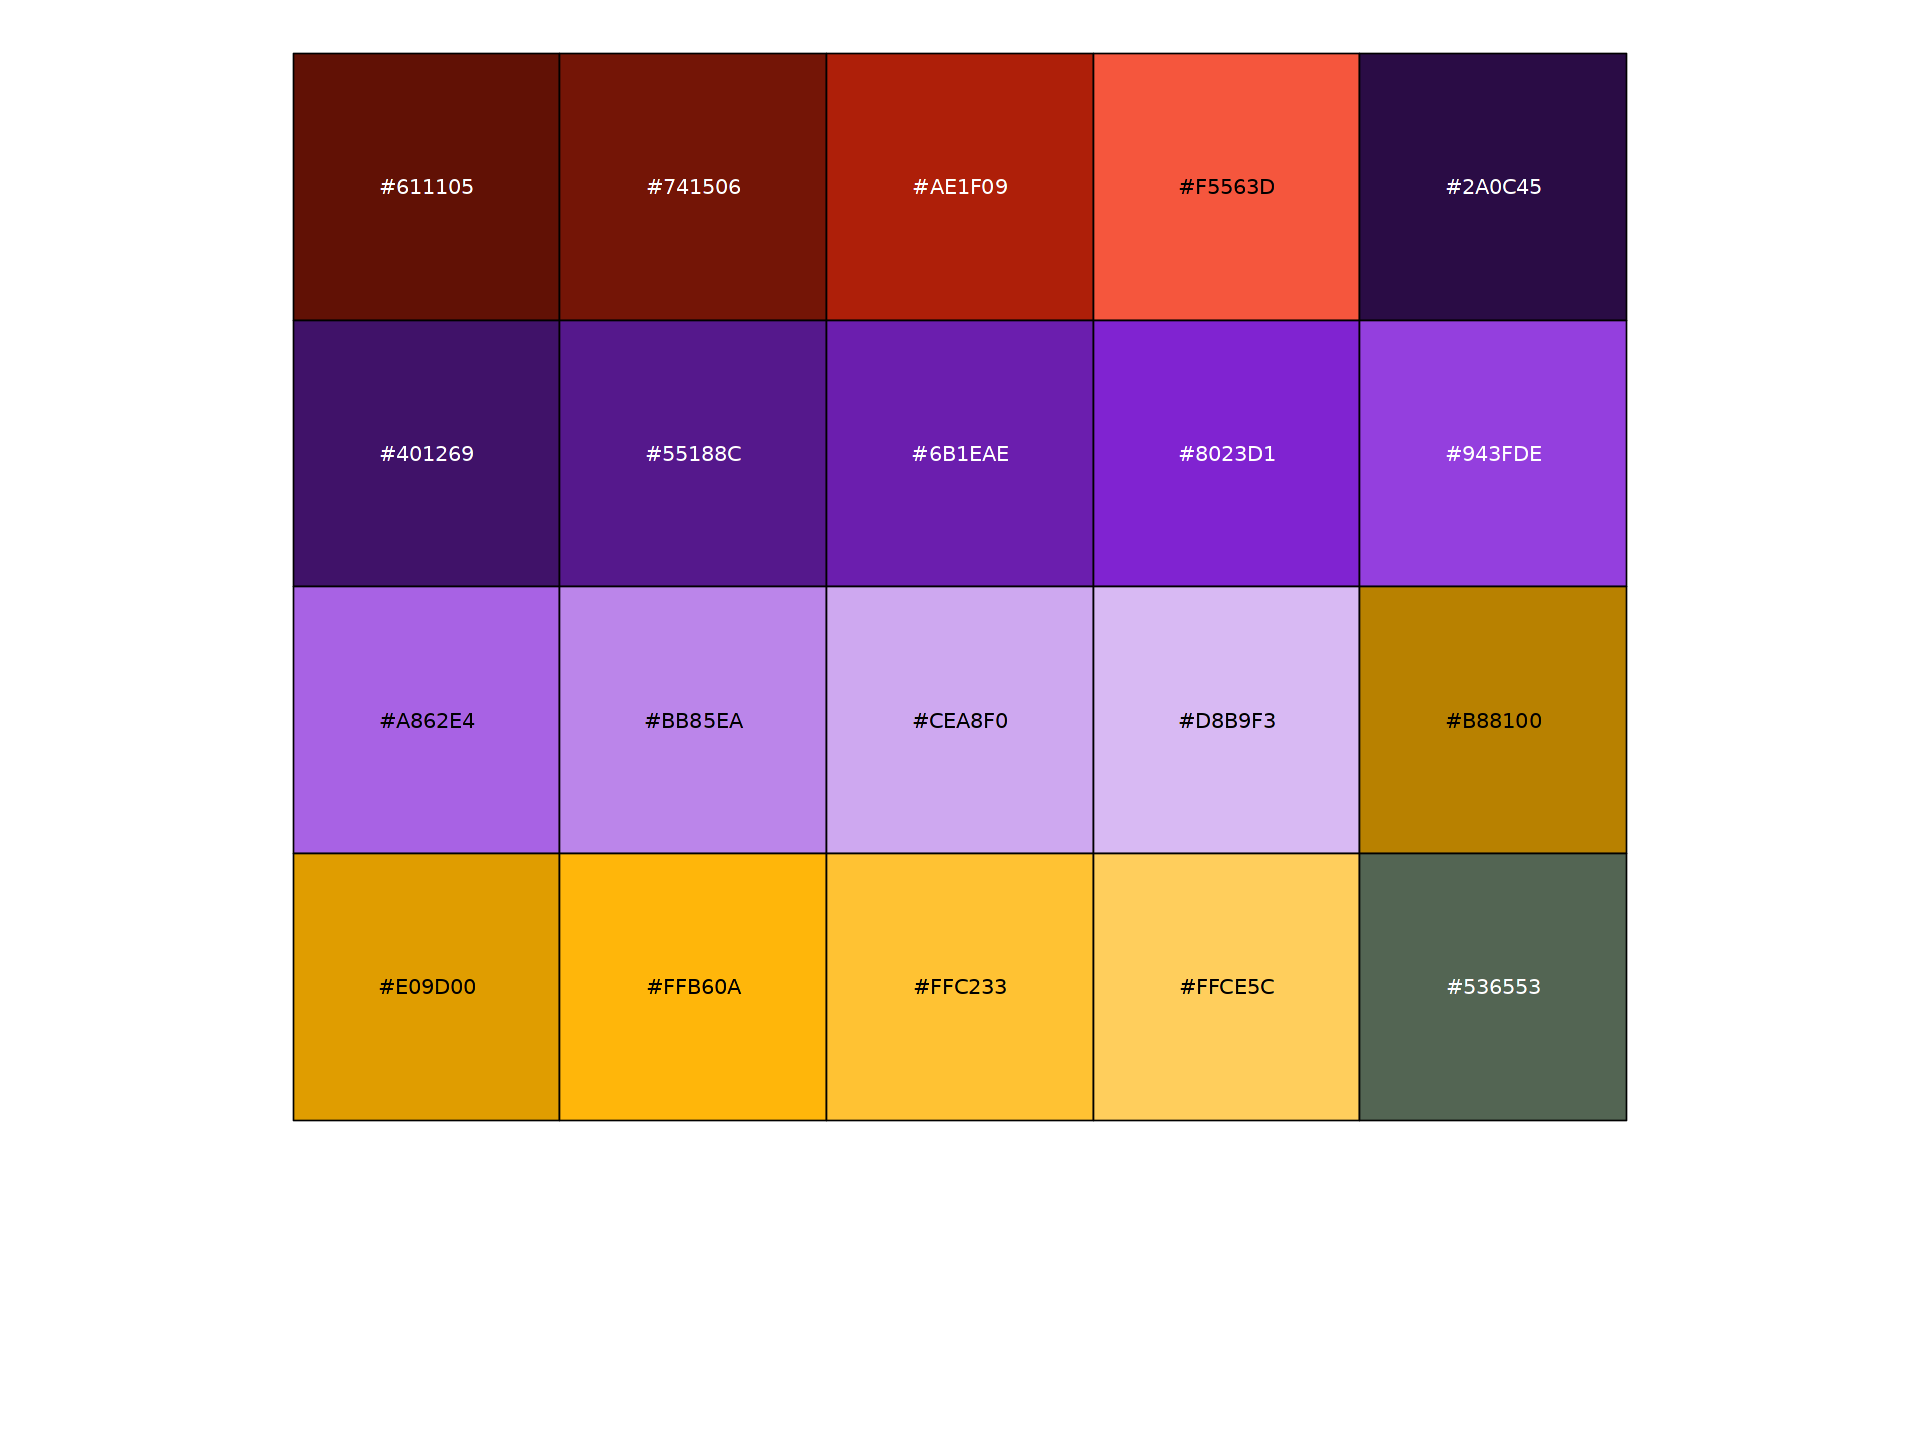

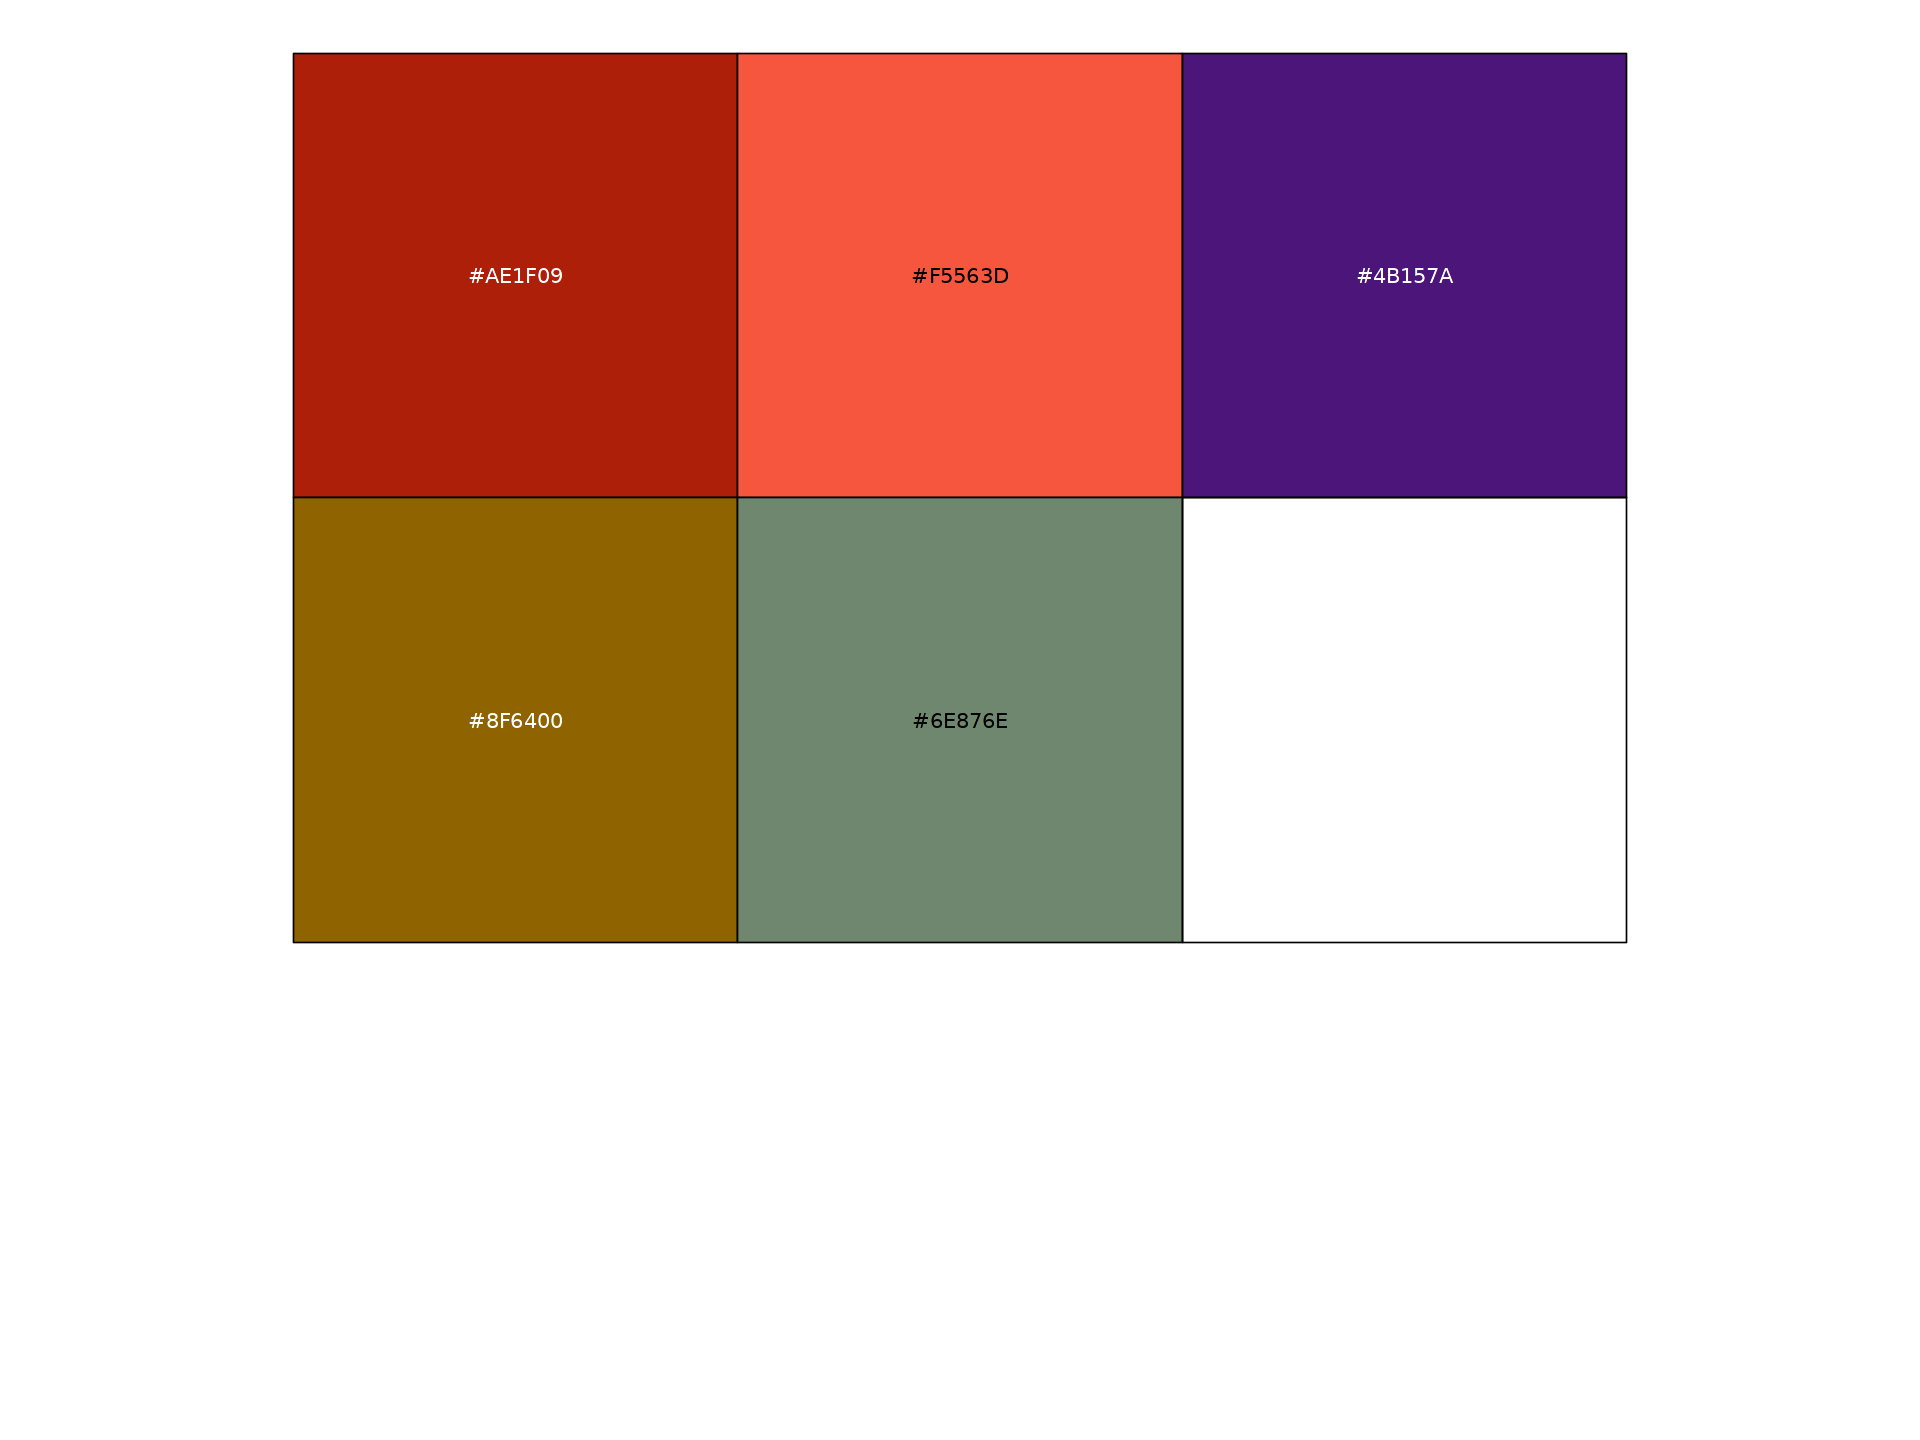

In [7]:
orig.ident_colors <- c("#2E382E", "#404F40", "#536553", "#657B65", "#789178", "#8FA38F", "#A5B6A5", "#D2DAD2", "#E9EDE9", 
                       "#7A5600", "#F5AB00", "#FFC233", "#FFD470", "#FFE7AD", "#FFF3D6",
                       "#AE1F09", "#E92A0C", "#F5563D", "#F88877", "#FDDDD8",
                       "#714947", "#97615E", "#B08482", "#C8A9A7", "#E0CECD", "#EFE7E6")
names(orig.ident_colors) <- c("EarlyCtrl2", "EarlyCtrl3", "EarlyCtrl4", "EarlyCtrlMale5", "EarlyCtrlFemale5", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3",
                              "Early1", "EarlyFemale3", "EarlyMale3", "Early4", "EarlyMale5", "EarlyFemale5",
                              "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Peak5",
                              "Late1", "Late2", "Late3", "LateMale4", "LateFemale4", "Late5")

orig.ident_colors_contrast <- c("#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485", "#C16200", "#2A75CB", "#5B1865", "#E54F6D",
                                "#97615E", "#F5AB00", "#6E876E", "#26C485", "#C16200", "#2A75CB",
                                "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485",
                                "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485", "#C16200")
names(orig.ident_colors_contrast) <- c("EarlyCtrl2", "EarlyCtrl3", "EarlyCtrl4", "EarlyCtrlMale5", "EarlyCtrlFemale5", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3",
                              "Early1", "EarlyFemale3", "EarlyMale3", "Early4", "EarlyMale5", "EarlyFemale5",
                              "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Peak5",
                              "Late1", "Late2", "Late3", "LateMale4", "LateFemale4", "Late5")

orig.ident_merge_colors <- c("#6E876E", "#F5AB00", "#E92A0C", "#97615E")
names(orig.ident_merge_colors) <- c("Ctrl", "Early", "Peak", "Late")

batch_colors <- c("#2A75CB", "#6E876E", "#F5AB00", "#E92A0C", "#97615E", "#98CE00", "#E54F6D")
names(batch_colors) <- c("B1", "B2", "B3", "B4", "B5", "B6", "B8")

model_colors <- c("#6E876E", "#E92A0C")
names(model_colors) <- c("Ctrl", "EAE")
show_col(model_colors)

duo_colors <- c("#E92A0C", "#2A75CB")
show_col(duo_colors)

sex_colors <- duo_colors
names(sex_colors) <- c("F", "M")

immune_colors <- c("#A9DFBF", "#FF000080")
names(immune_colors) <- c("NonImmune", "Immune")
#show_col(immune_colors)

immuneAll_colors <- c("lightgrey", "blue", "orange", "red")
names(immuneAll_colors) <- c("None", "RNA", "GenePromAcc", "Both")
#show_col(immuneAll_colors)

doublets_colors <- c("#A9DFBF", "#FF000080")
names(doublets_colors) <- c("Singlet", "Doublet")
#show_col(doublets_colors)

debris_colors <- duo_colors
names(debris_colors) <- c("Percoll", "Debris")

date_tissue_coll_colors <- scales::viridis_pal()(17)
names(date_tissue_coll_colors) <- c('2021_04_30','2021_05_03','2021_05_31','2021_09_30','2021_10_06','2021_11_26','2022_03_09','2022_03_10','2022_08_03','2022_08_24','2023_01_23','2023_02_15','2023_03_22','2023_06_15','2023_06_14','2022_05_12','2022_05_16')
#show_col(date_tissue_coll_colors)

date_exp_colors <- scales::viridis_pal()(7)
names(date_exp_colors) <- c('2021_04_20','2021_09_22','2021_11_17','2022_01_31','2022_07_18','2023_01_09','2023_06_05')
#show_col(date_exp_colors)

EAE_score_mean_colors <- scales::viridis_pal()(7)
names(EAE_score_mean_colors) <- c(0,0.5,2,2.25,2.33,2.5,3)
#show_col(EAE_score_mean_colors)

cellType_OL_colors <- c("#611105", "#741506", "#AE1F09", "#F5563D", "#2A0C45","#401269","#55188C","#6B1EAE","#8023D1","#943FDE","#A862E4","#BB85EA","#CEA8F0","#D8B9F3","#B88100","#E09D00","#FFB60A","#FFC233","#FFCE5C","#536553")
names(cellType_OL_colors) <- c("OPC-α", "OPC-β", "OPC-γ", "COP", "MOL56-α","MOL56-β","MOL56-γ","MOL56-δ","MOL56-ε","MOL56-ζ","MOL56-η","MOL56-θ","MOL56-ι","MOL56-κ","MOL2-α","MOL2-β","MOL2-γ","MOL2-δ","MOL2-ε","MOL1")
show_col(cellType_OL_colors)

cellType_OL_merge_colors <- c("#AE1F09","#F5563D","#4B157A","#8F6400", "#6E876E")
names(cellType_OL_merge_colors) <- c("OPC", "COP", "MOL56", "MOL2", "MOL1")
show_col(cellType_OL_merge_colors)

In [8]:
#Set up ATAC annotation
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose =FALSE)
ucsc.levels <- str_replace(string=paste("chr",seqlevels(annotations),sep=""), pattern="chrMT", replacement="chrM")
seqlevels(annotations) <- ucsc.levels
genome(annotations) <- "mm10"

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

## 2. Loading datasets

In [10]:
MORNAATACCOL <- readRDS(paste0(OS_path_outputs, "MORNAATACCOL.rds"))

In [9]:
MORNAATACCOL <- readRDS(paste0(OS_path_outputs, "MORNAATACCOL_DORCs.rds"))

In [10]:
MORNAATACCOL@meta.data <- readRDS(paste0(OS_path_outputs, "MORNAATACCOL_annot_updated.rds"))

## 3. OL dynamics

### 3.2 Gene ontology (DORCs)

In [10]:
DefaultAssay(MORNAATACCOL) <- "DORCs"

In [11]:
ensembl = useMart("ensembl",dataset="mmusculus_gene_ensembl")
attributes = listAttributes(ensembl)
Biomart_gencode_ensembl84_biotypes <- getBM(attributes=c("mgi_symbol","ensembl_gene_id","entrezgene_id","gene_biotype"), filters = "", values = "", ensembl)
Biomart_gencode_ensembl84_biotypes[, 'gene_biotype'] <- as.factor(Biomart_gencode_ensembl84_biotypes[,'gene_biotype'])

In [12]:
#Filter for only our genes
Biotype_All_dataset <- subset(Biomart_gencode_ensembl84_biotypes, mgi_symbol %in% rownames(MORNAATACCOL))
entrezID <- subset(Biotype_All_dataset, Biotype_All_dataset$mgi_symbol %in% rownames(MORNAATACCOL))

In [13]:
threshold_nb_genes <- 50

#### 3.2.1 MOL56

In [14]:
df_dynamics <- readRDS(paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_MOL56.rds"))

In [15]:
df_dynamics_scaled <- df_dynamics/do.call(pmax, df_dynamics)

##### Category 1

In [17]:
highest_cat <- "Ctrl"

In [18]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [19]:
length(gene_list)

[1] 0

##### Category 2

In [16]:
highest_cat <- "Early"

In [17]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [18]:
length(gene_list)

[1] 2

In [19]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [20]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [21]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [22]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [23]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [24]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [25]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [26]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:2] "12661" "72258"
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...6 enriched terms found
'data.frame':	6 obs. of  9 variables:
 $ ID         : chr  "R-MMU-1296346" "R-MMU-5576886" "R-MMU-1296071" "R-MMU-5576891" ...
 $ Description: chr  "Tandem pore domain potassium channels" "Phase 4 - resting membrane potential" "Potassium Channels" "Cardiac conduction" ...
 $ GeneRatio  : chr  "1/1" "1/1" "1/1" "1/1" ...
 $ BgRatio    : chr  "11/8582" "17/8582" "97/8582" "98/8582" ...
 $ pvalue     : num  0.00128 0.00198 0.0113 0.01142 0.01783 ...
 $ p.adjust   : num  0.00594 0.00594 0.01713 0.01713 0.02139 ...
 $ qvalue     : logi  NA NA NA NA NA NA
 $ geneID     : chr  "Kcnk10" "Kcnk10" "Kcnk10" "Kcnk10" ...
 $ Count      : int  1 1 1 1 1 1
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization.

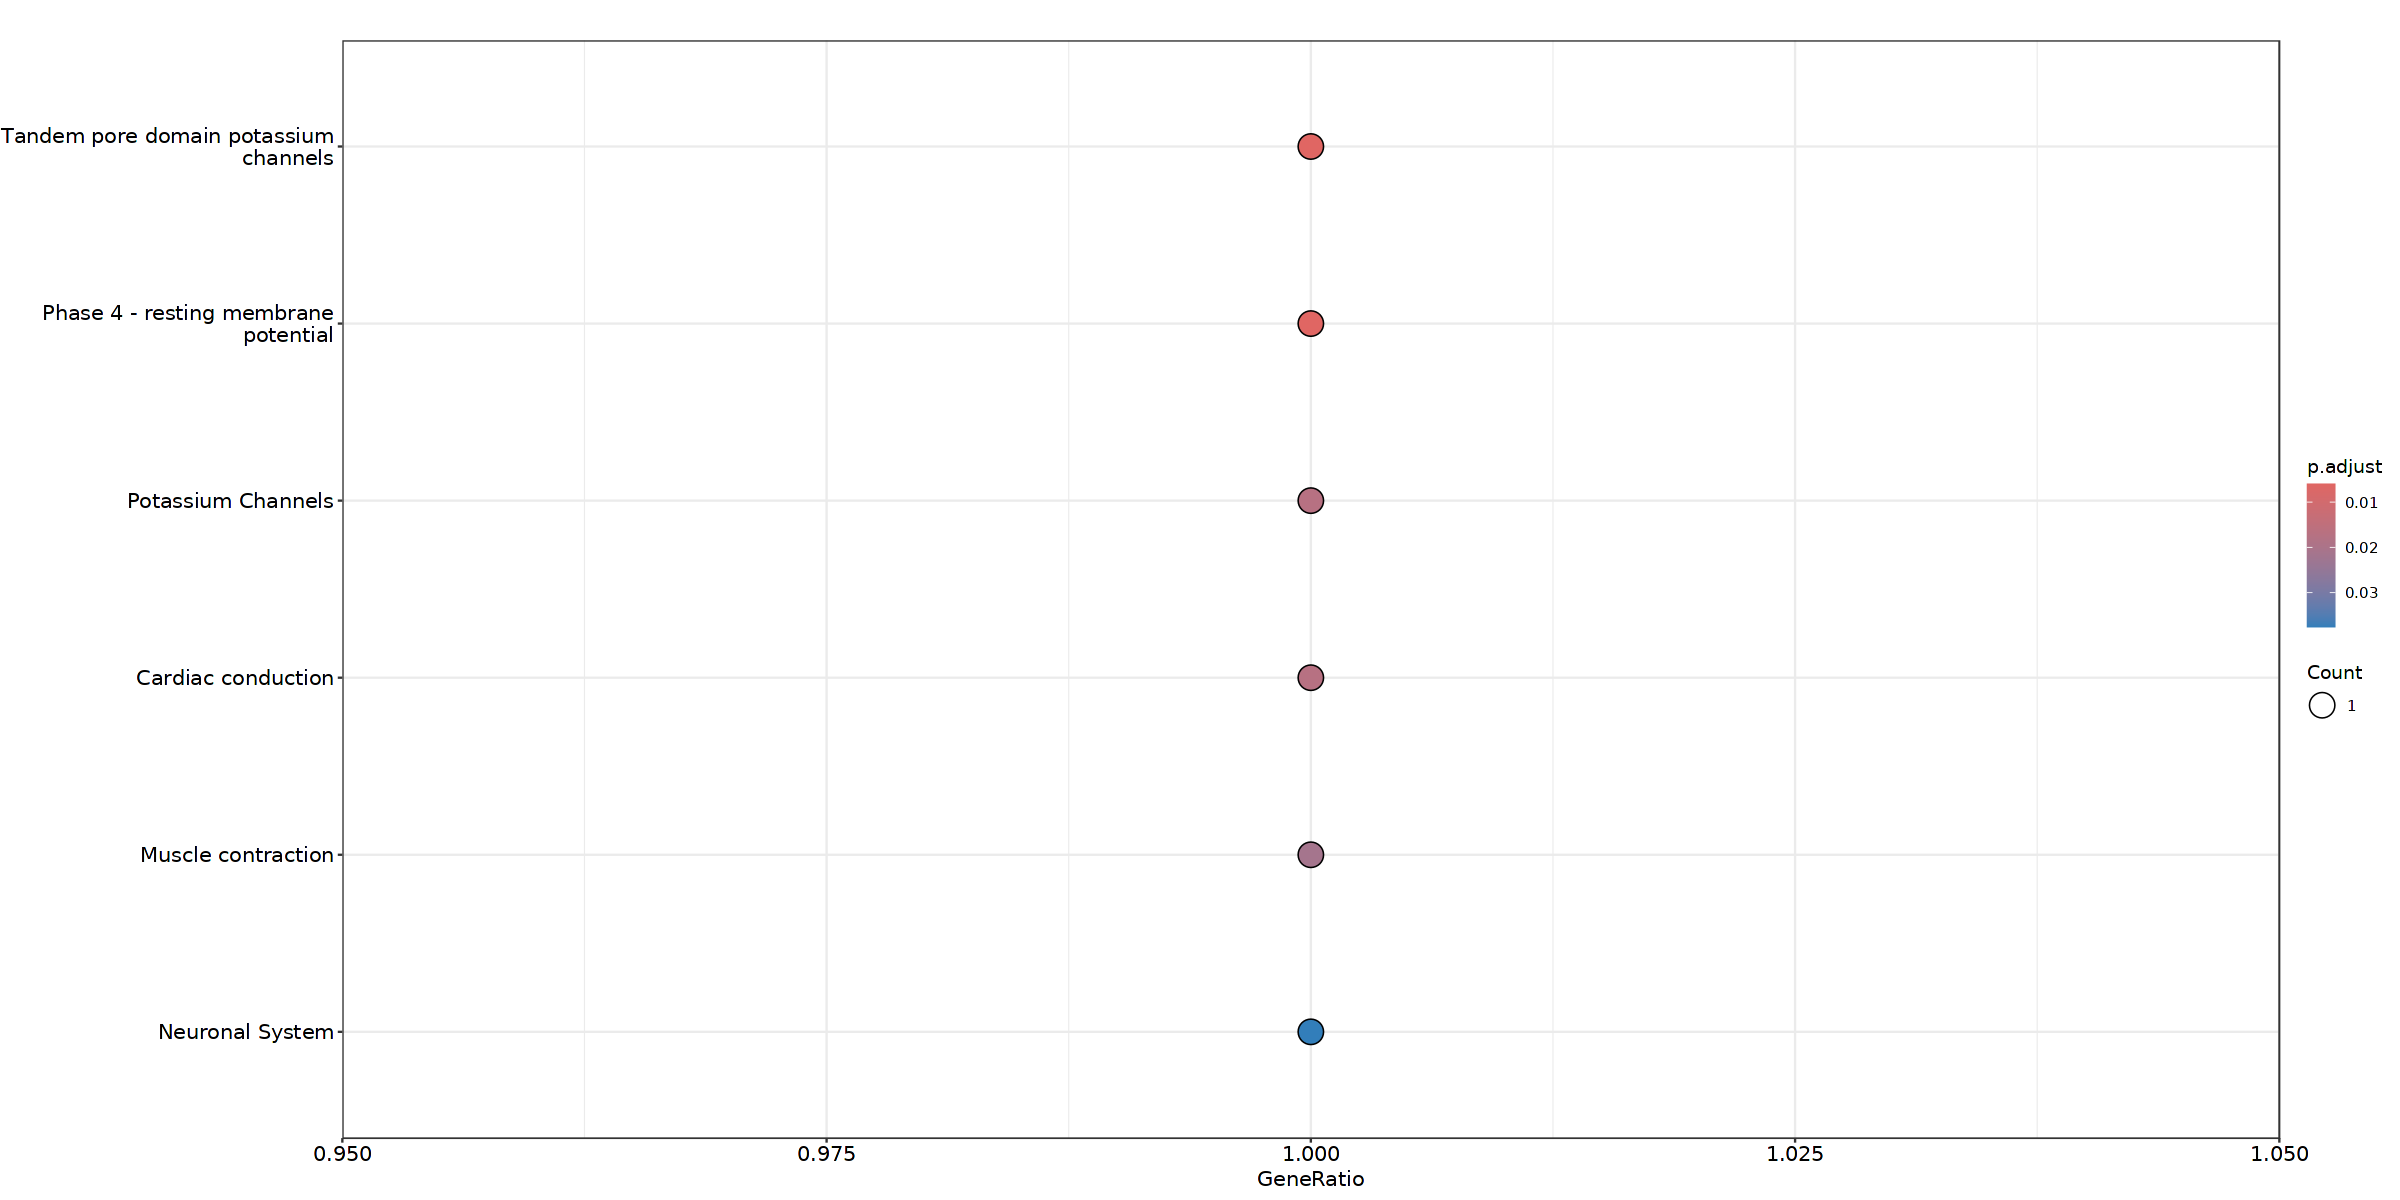

In [27]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [28]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

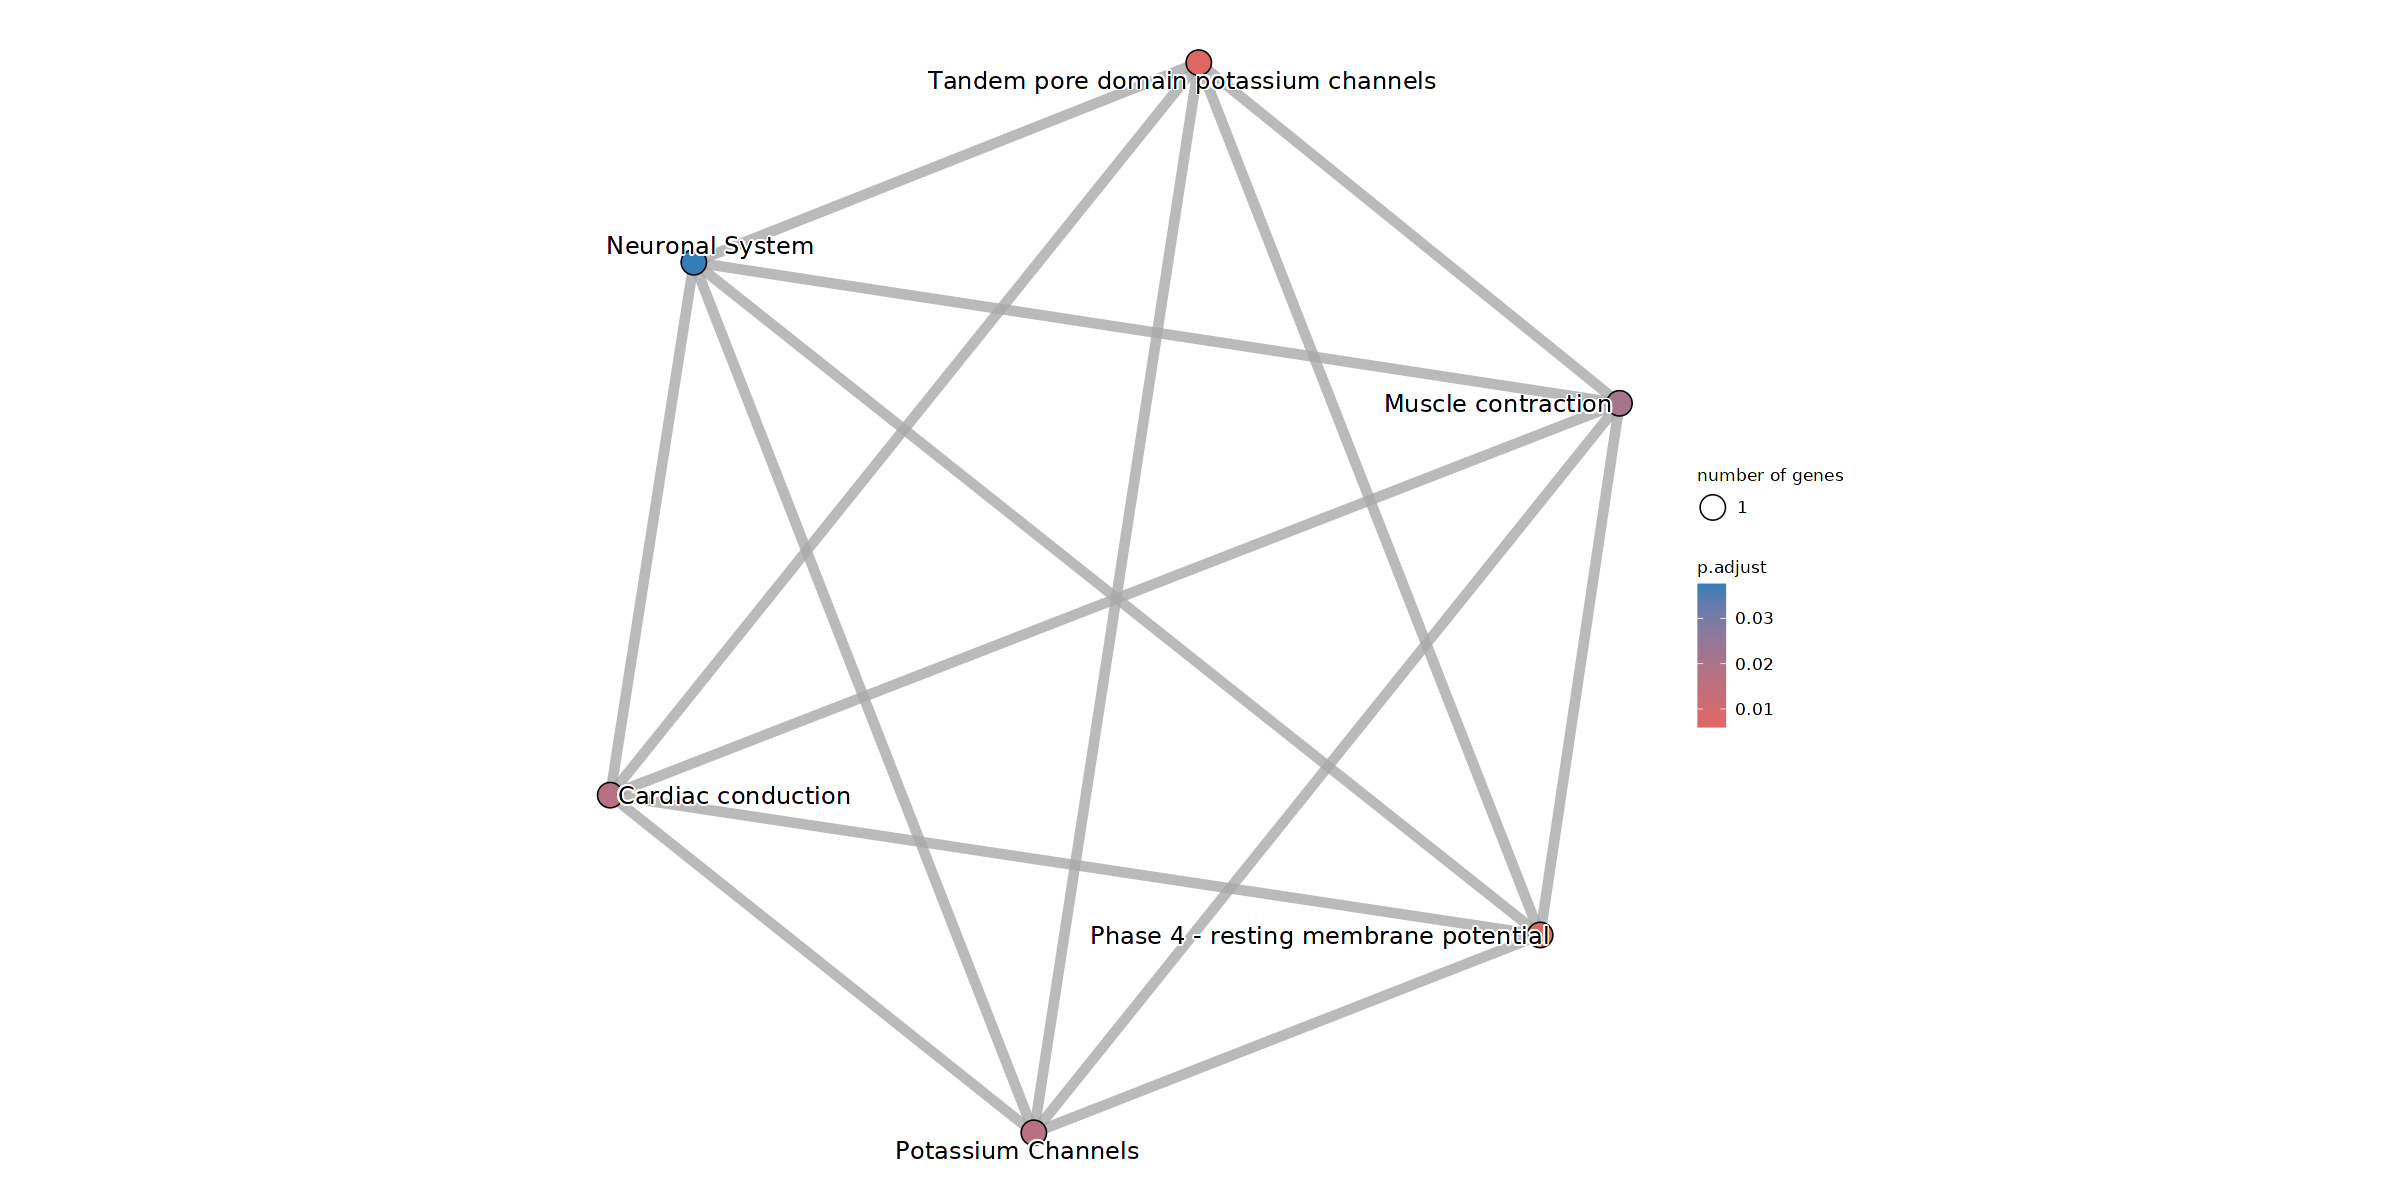

In [29]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

In [30]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [31]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:2] "12661" "72258"
#...pvalues adjusted by 'fdr' with cutoff <1 
#...6 enriched terms found
'data.frame':	6 obs. of  9 variables:
 $ ID         : chr  "R-MMU-1296346" "R-MMU-5576886" "R-MMU-1296071" "R-MMU-5576891" ...
 $ Description: chr  "Tandem pore domain potassium channels" "Phase 4 - resting membrane potential" "Potassium Channels" "Cardiac conduction" ...
 $ GeneRatio  : chr  "1/1" "1/1" "1/1" "1/1" ...
 $ BgRatio    : chr  "11/8582" "17/8582" "97/8582" "98/8582" ...
 $ pvalue     : num  0.00128 0.00198 0.0113 0.01142 0.01783 ...
 $ p.adjust   : num  0.00594 0.00594 0.01713 0.01713 0.02139 ...
 $ qvalue     : logi  NA NA NA NA NA NA
 $ geneID     : chr  "Kcnk10" "Kcnk10" "Kcnk10" "Kcnk10" ...
 $ Count      : int  1 1 1 1 1 1
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Mo

In [32]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL56_",highest_cat,".csv"), row.names=FALSE)

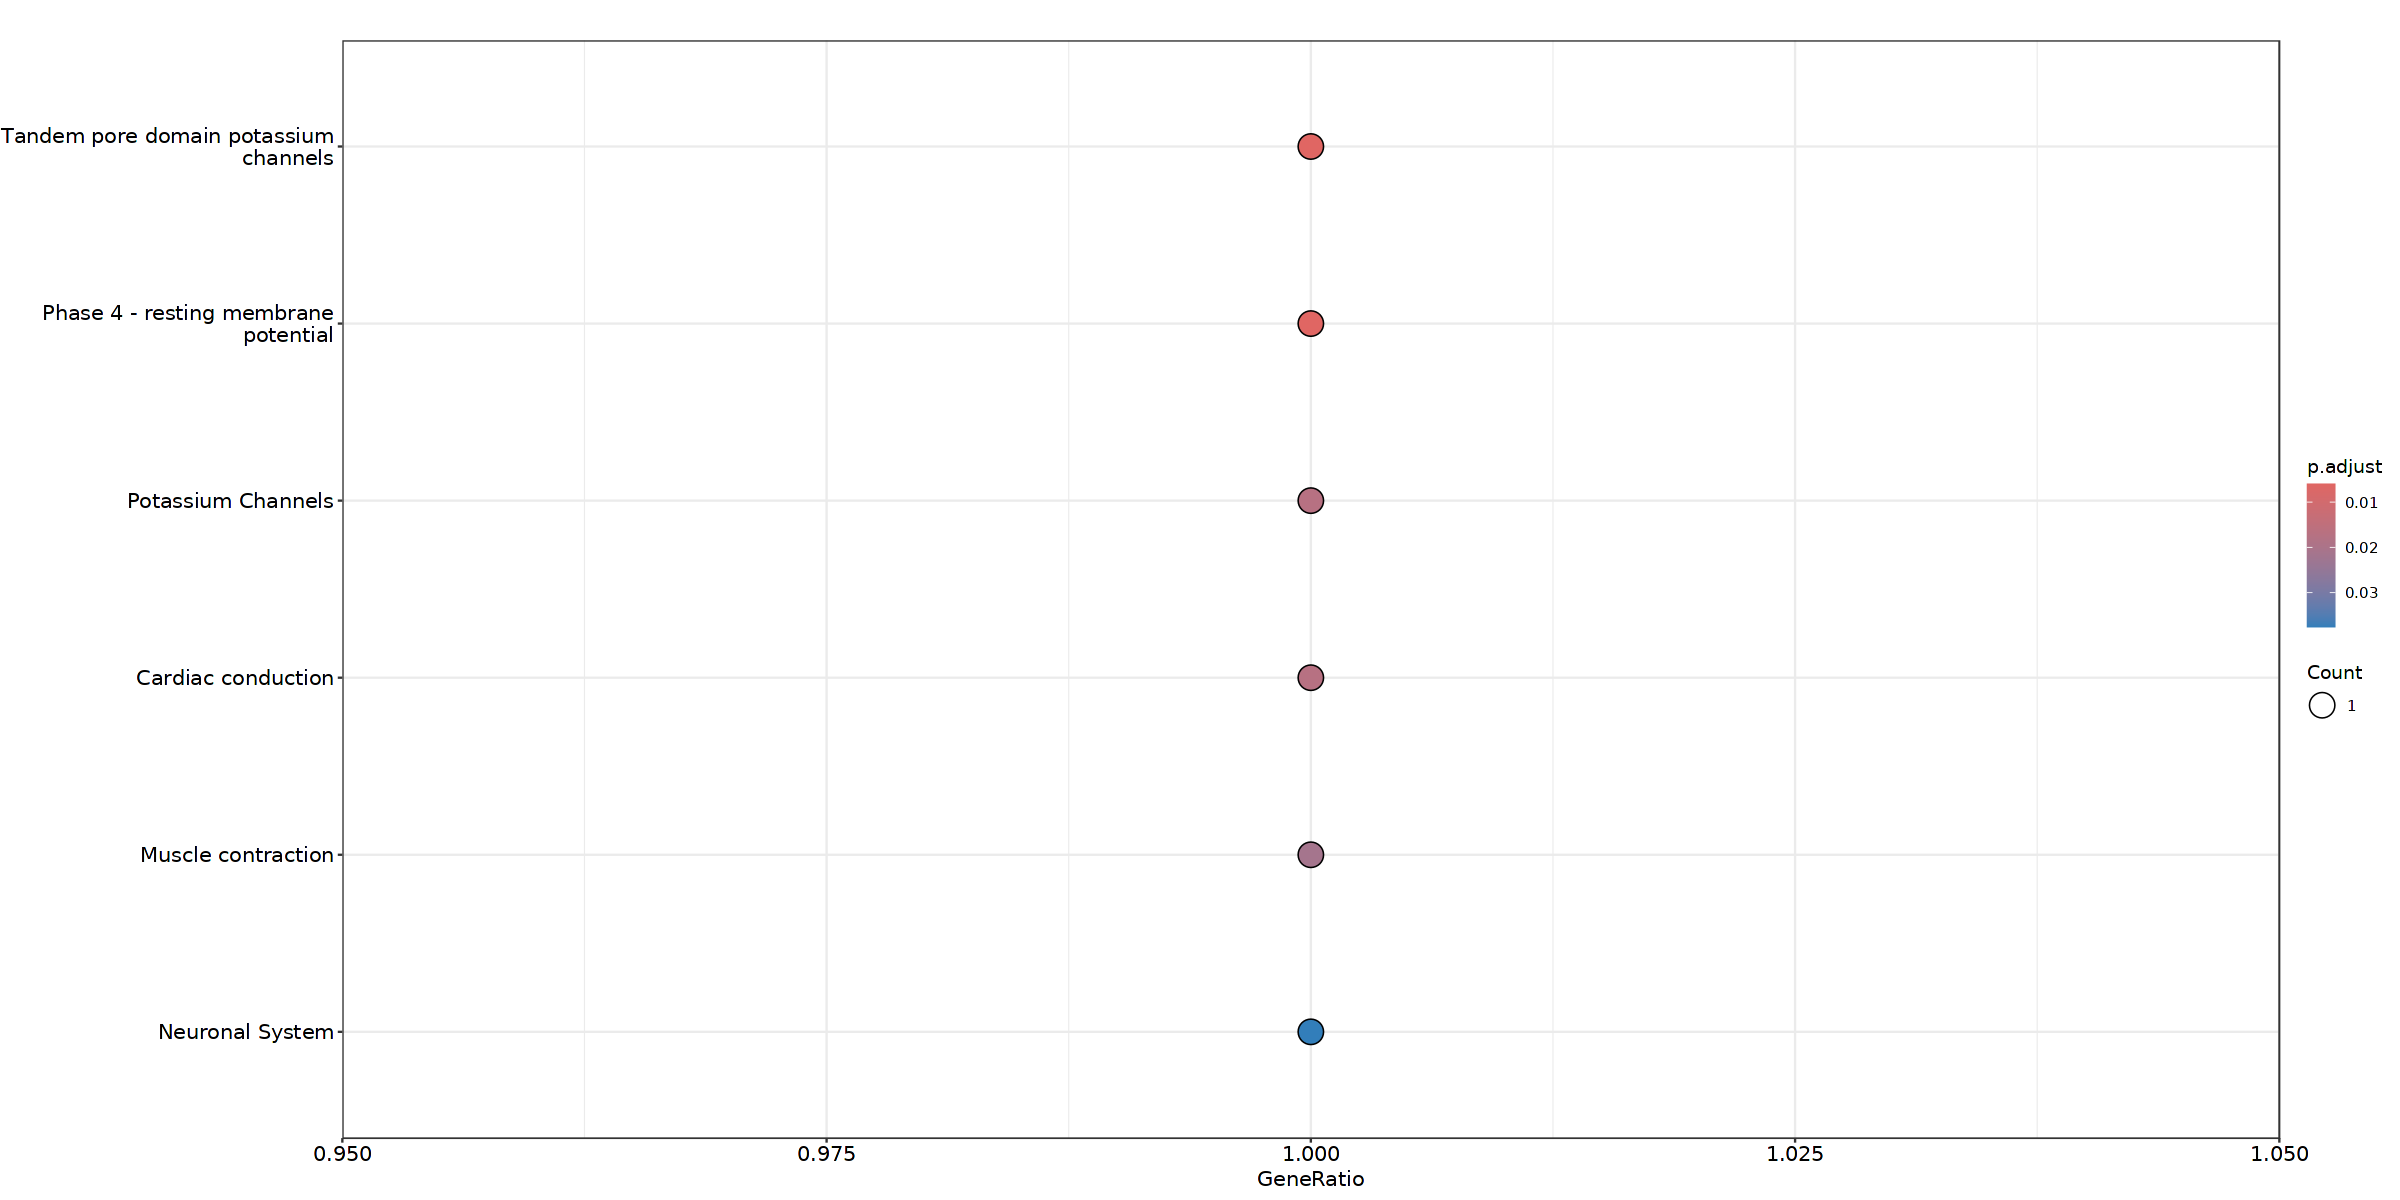

In [41]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [42]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

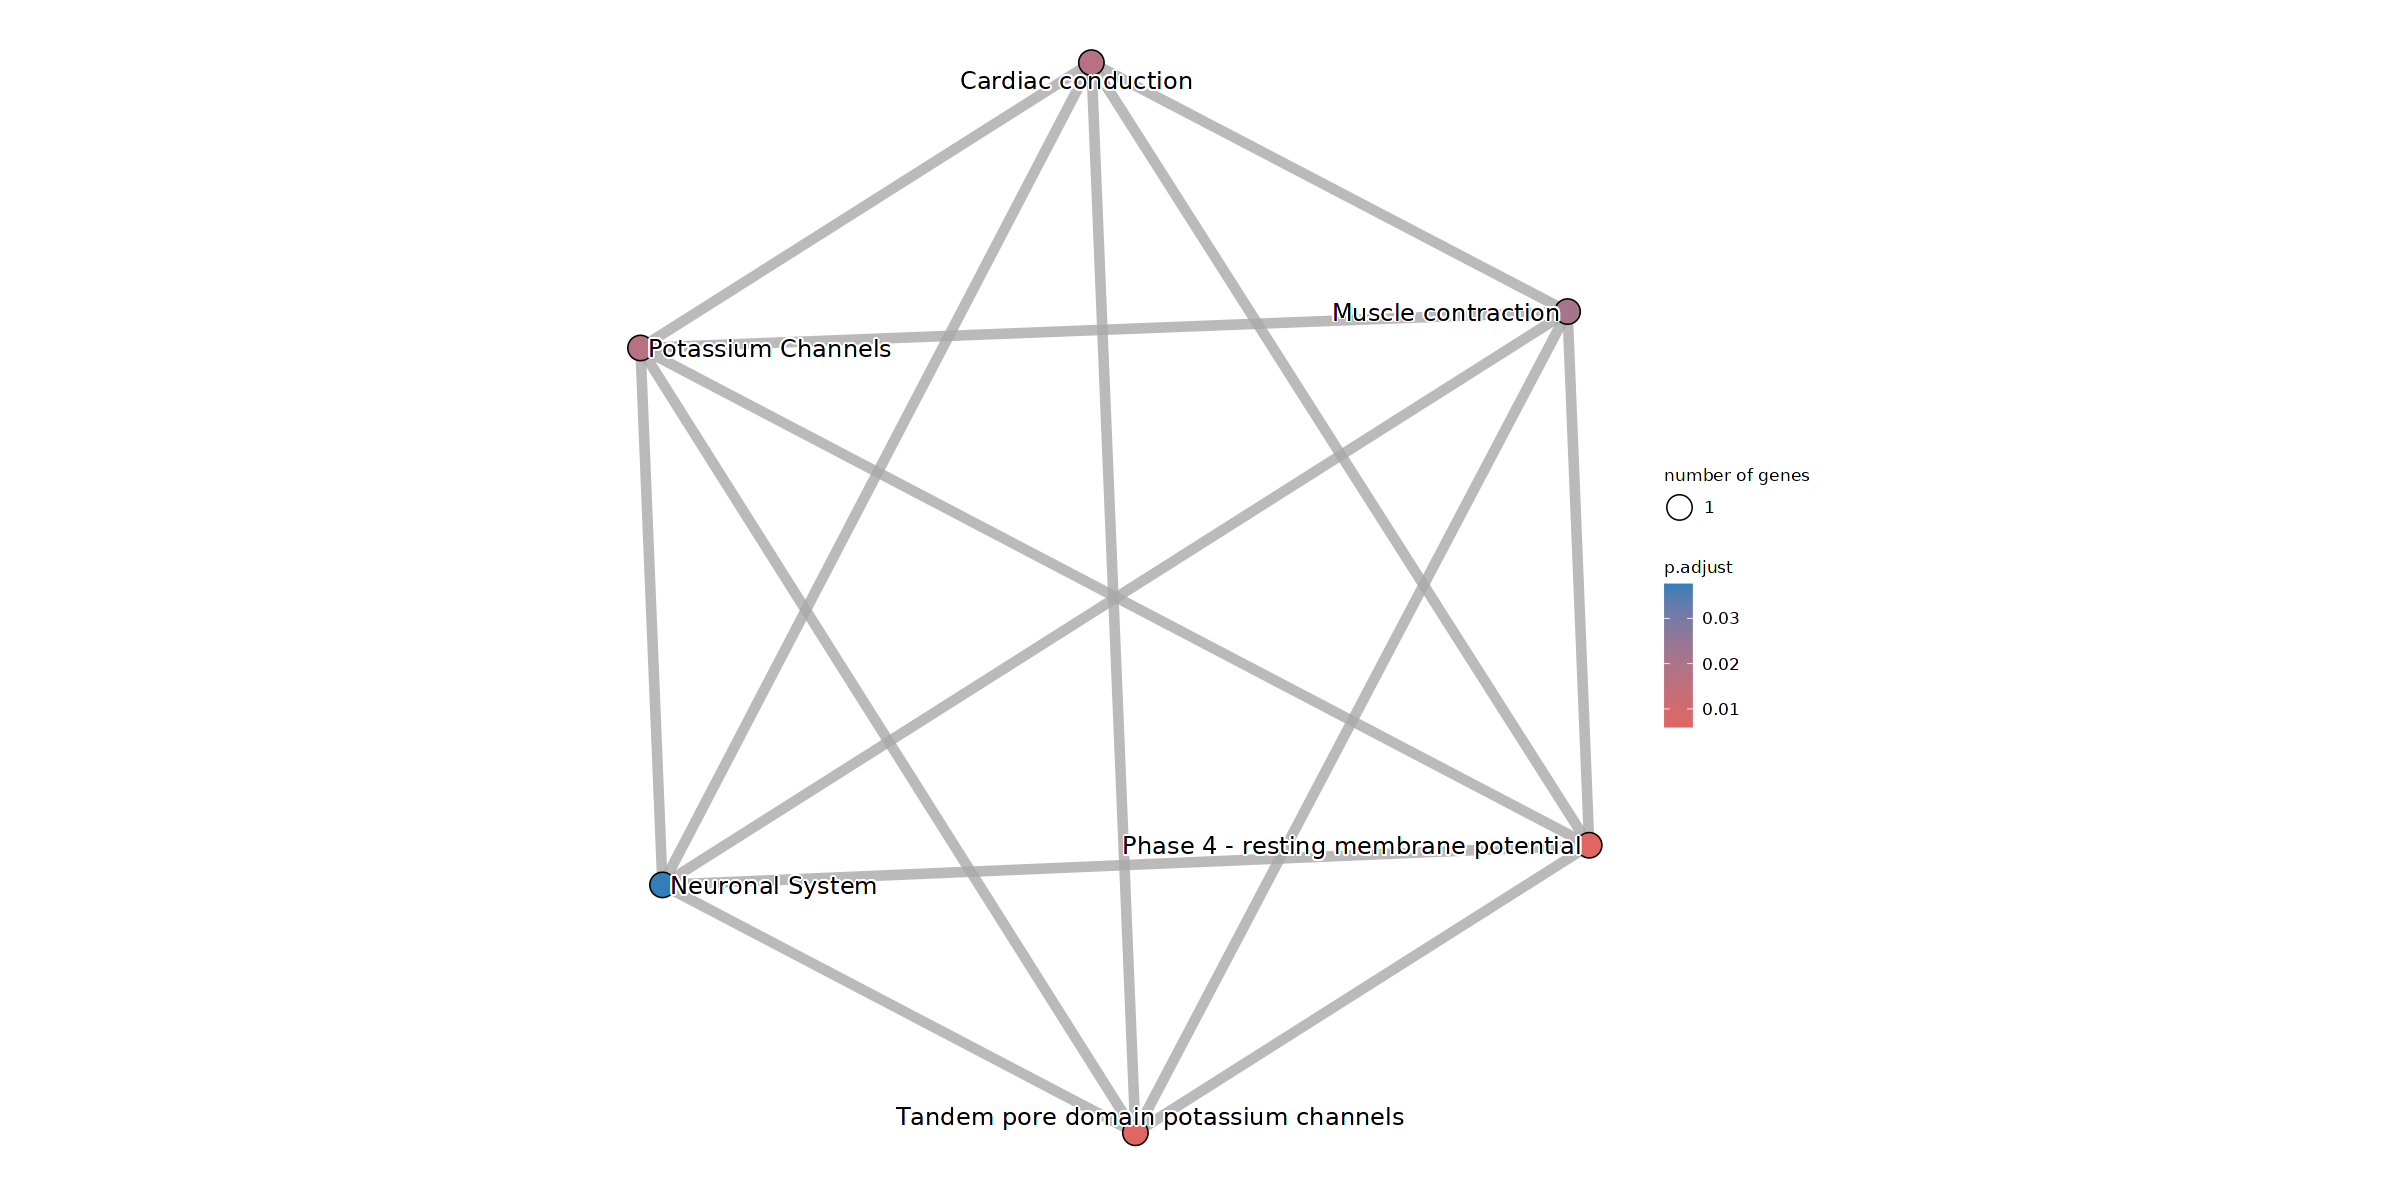

In [43]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Category 3

In [33]:
highest_cat <- "Peak"

In [34]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [35]:
length(gene_list)

[1] 49

In [36]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [37]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [38]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [39]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [40]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [41]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [42]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [43]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:48] "234311" "76681" "17069" "94094" "238393" "100039796" "15953" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...0 enriched terms found
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


In [44]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [45]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:48] "234311" "76681" "17069" "94094" "238393" "100039796" "15953" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...94 enriched terms found
'data.frame':	94 obs. of  9 variables:
 $ ID         : chr  "R-MMU-197264" "R-MMU-196807" "R-MMU-3371378" "R-MMU-5218900" ...
 $ Description: chr  "Nicotinamide salvaging" "Nicotinate metabolism" "Regulation by c-FLIP" "CASP8 activity is inhibited" ...
 $ GeneRatio  : chr  "2/22" "2/22" "1/22" "1/22" ...
 $ BgRatio    : chr  "18/8582" "30/8582" "10/8582" "10/8582" ...
 $ pvalue     : num  0.000936 0.002613 0.025354 0.025354 0.025354 ...
 $ p.adjust   : num  0.088 0.123 0.262 0.262 0.262 ...
 $ qvalue     : num  0.0769 0.1073 0.2285 0.2285 0.2285 ...
 $ geneID     : chr  "Parp9/Parp14" "Parp9/Parp14" "Fas" "Fas" ...
 $ Count      : int  2 2 1 1 1 1 1 2 1 1 ...
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioc

In [46]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL56_",highest_cat,".csv"), row.names=FALSE)

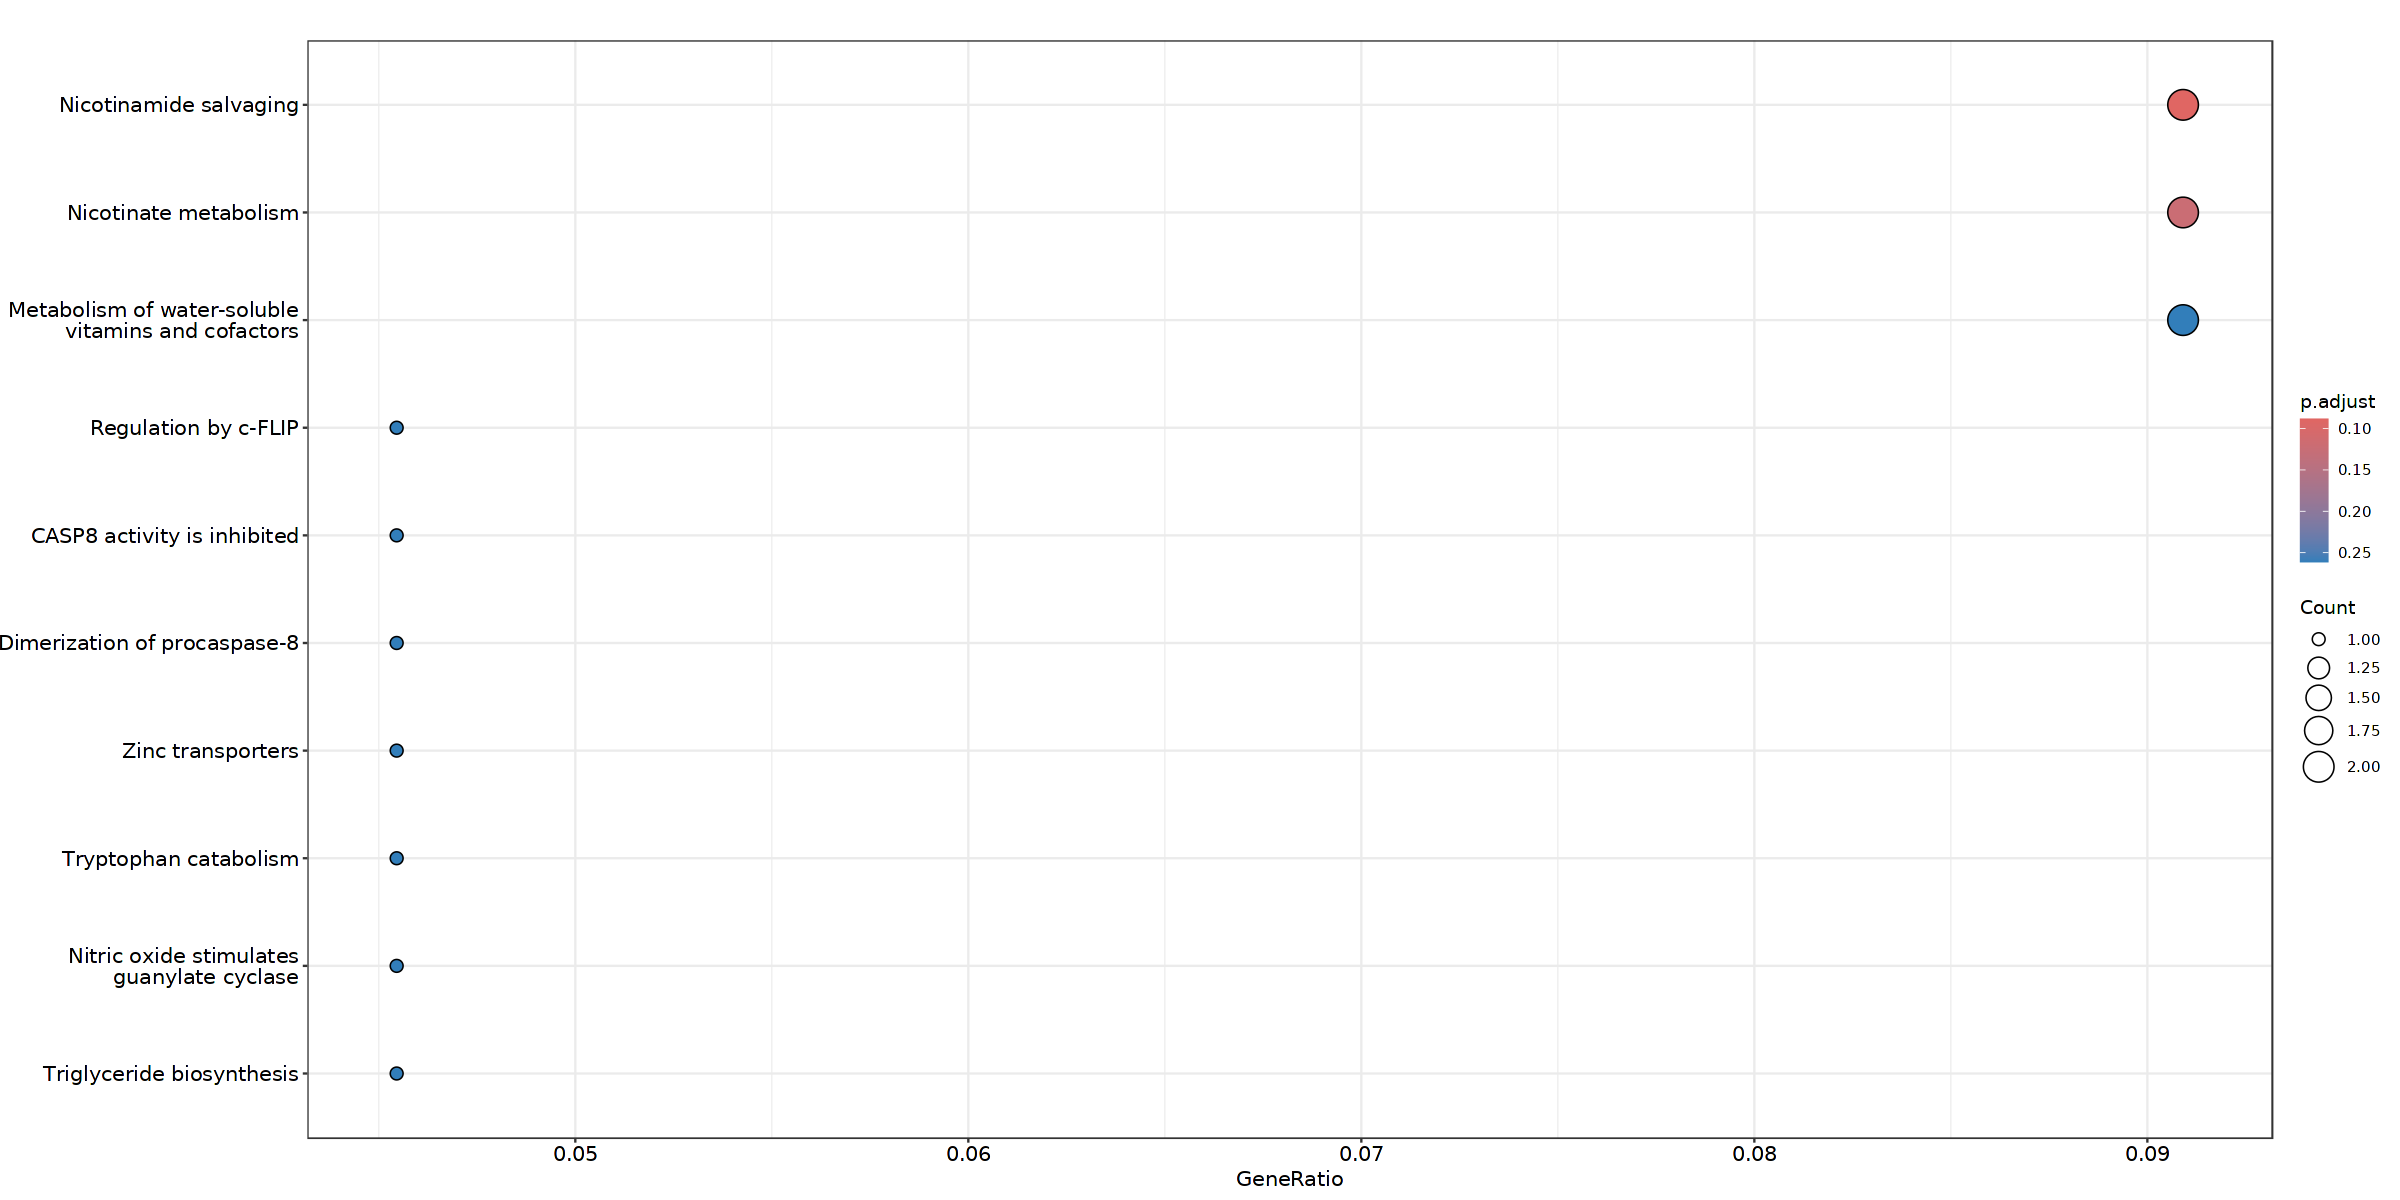

In [57]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [58]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

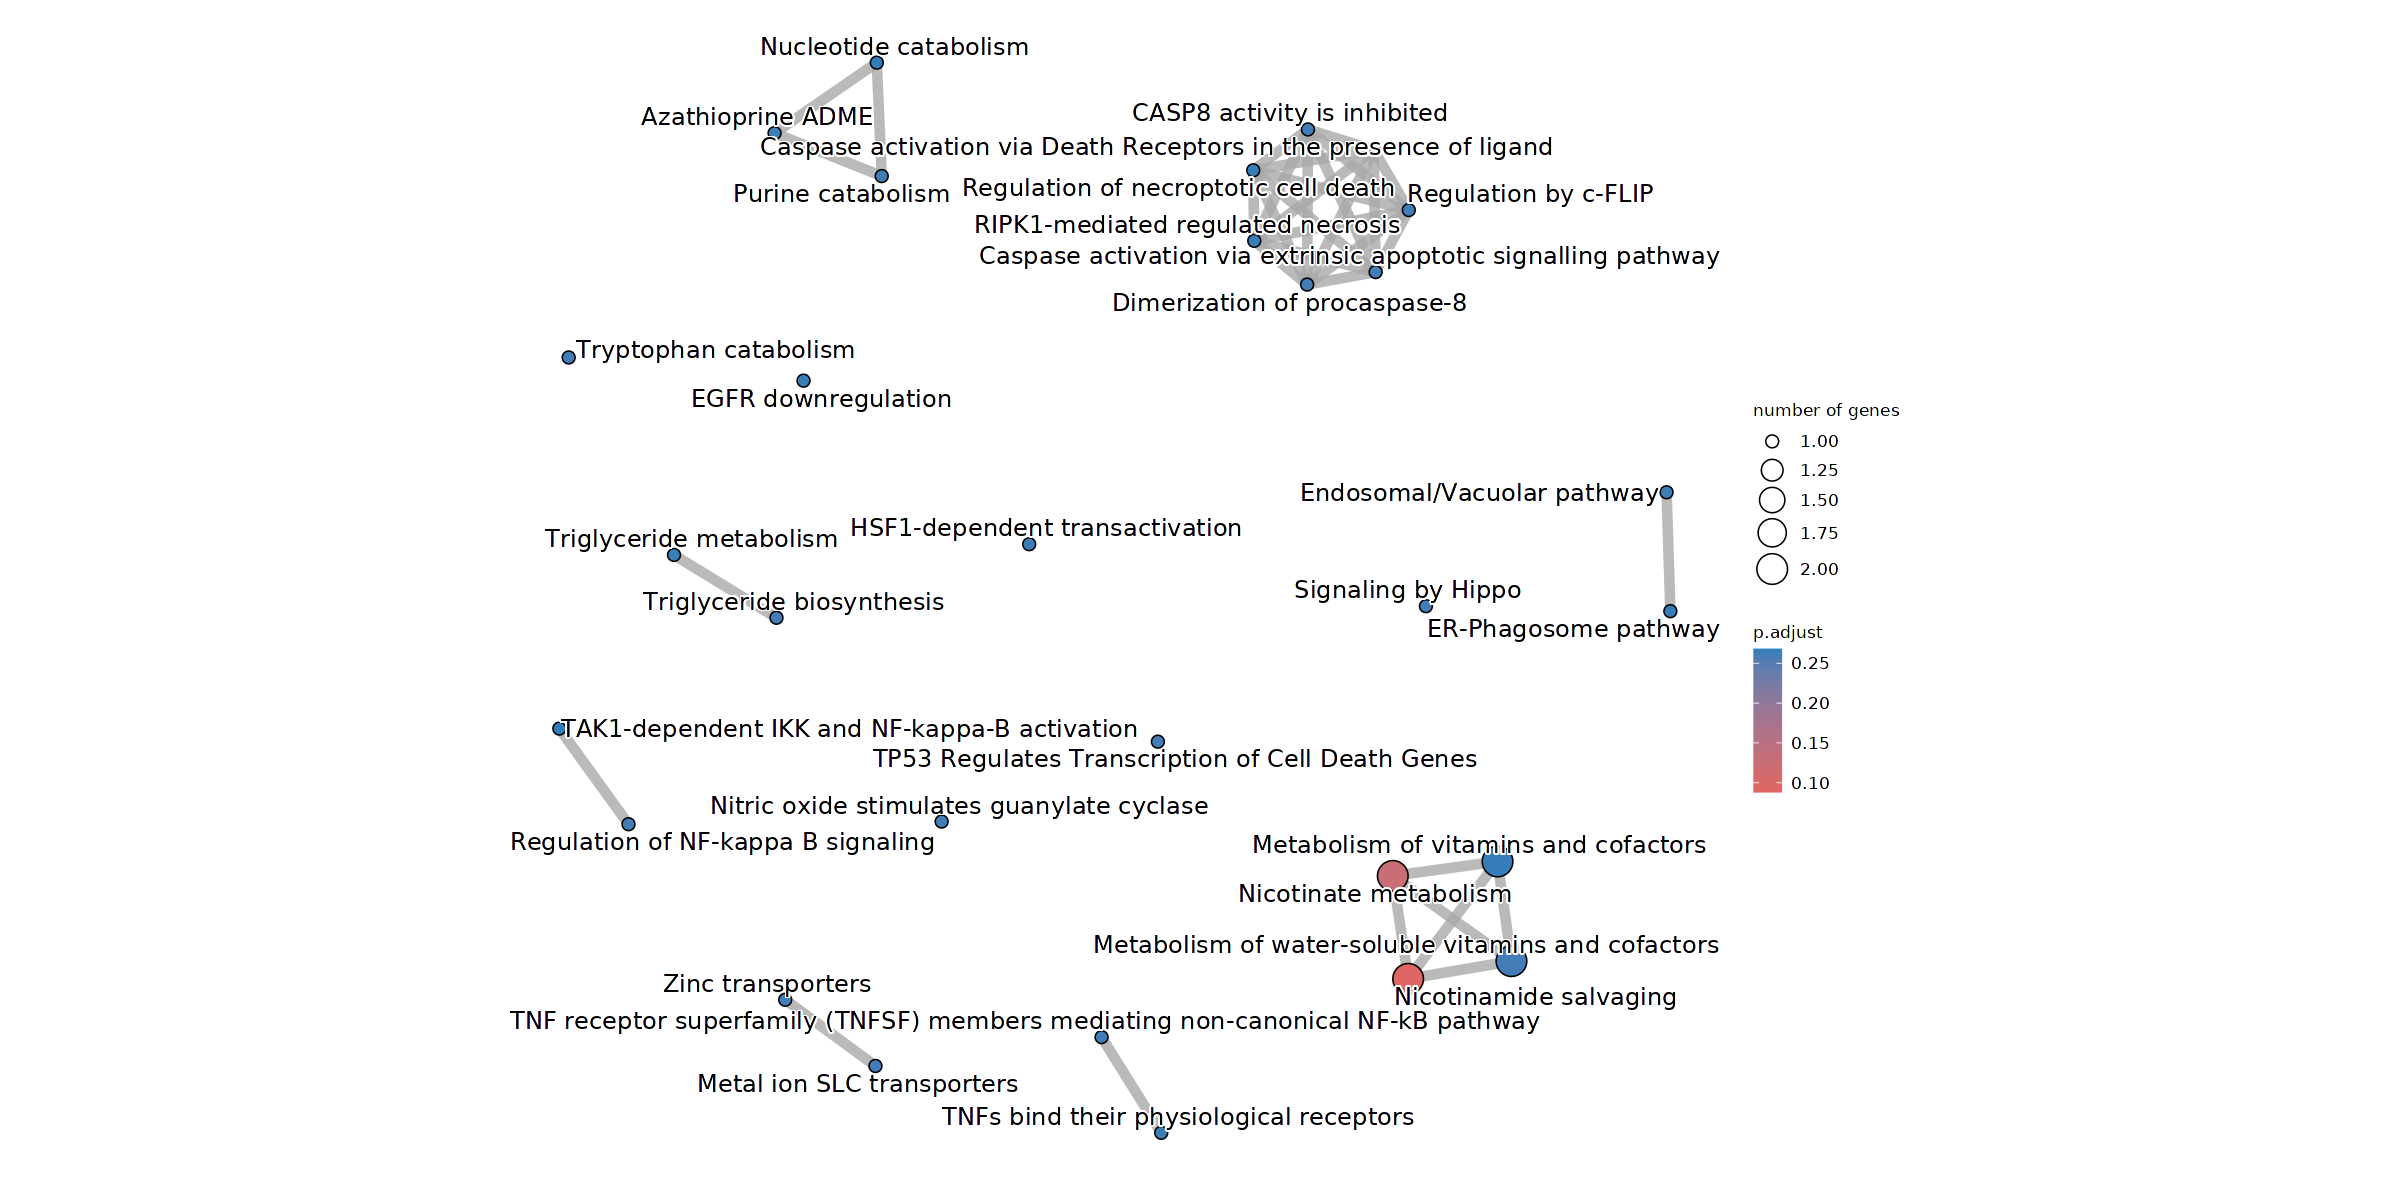

In [59]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Category 4

In [47]:
highest_cat <- "Late"

In [48]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [49]:
length(gene_list)

[1] 24

In [50]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [51]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [52]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [53]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [54]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [55]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [56]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [57]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:24] "15446" "83398" "667742" "20666" "57257" "16777" "75426" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...0 enriched terms found
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


In [58]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [59]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:24] "15446" "83398" "667742" "20666" "57257" "16777" "75426" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...48 enriched terms found
'data.frame':	48 obs. of  9 variables:
 $ ID         : chr  "R-MMU-9018677" "R-MMU-9018678" "R-MMU-71387" "R-MMU-5669034" ...
 $ Description: chr  "Biosynthesis of DHA-derived SPMs" "Biosynthesis of specialized proresolving mediators (SPMs)" "Metabolism of carbohydrates" "TNFs bind their physiological receptors" ...
 $ GeneRatio  : chr  "1/7" "1/7" "2/7" "1/7" ...
 $ BgRatio    : chr  "17/8582" "18/8582" "263/8582" "25/8582" ...
 $ pvalue     : num  0.0138 0.0146 0.0177 0.0202 0.021 ...
 $ p.adjust   : num  0.11 0.11 0.11 0.11 0.11 ...
 $ qvalue     : num  0.0673 0.0673 0.0673 0.0673 0.0673 ...
 $ geneID     : chr  "Hpgd" "Hpgd" "Ndst3/Pfkfb4" "Tnfrsf1b" ...
 $ Count      : int  1 1 2 1 1 1 1 1 1 1 ...
#...Citation
  Guangchuan

In [60]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL56_",highest_cat,".csv"), row.names=FALSE)

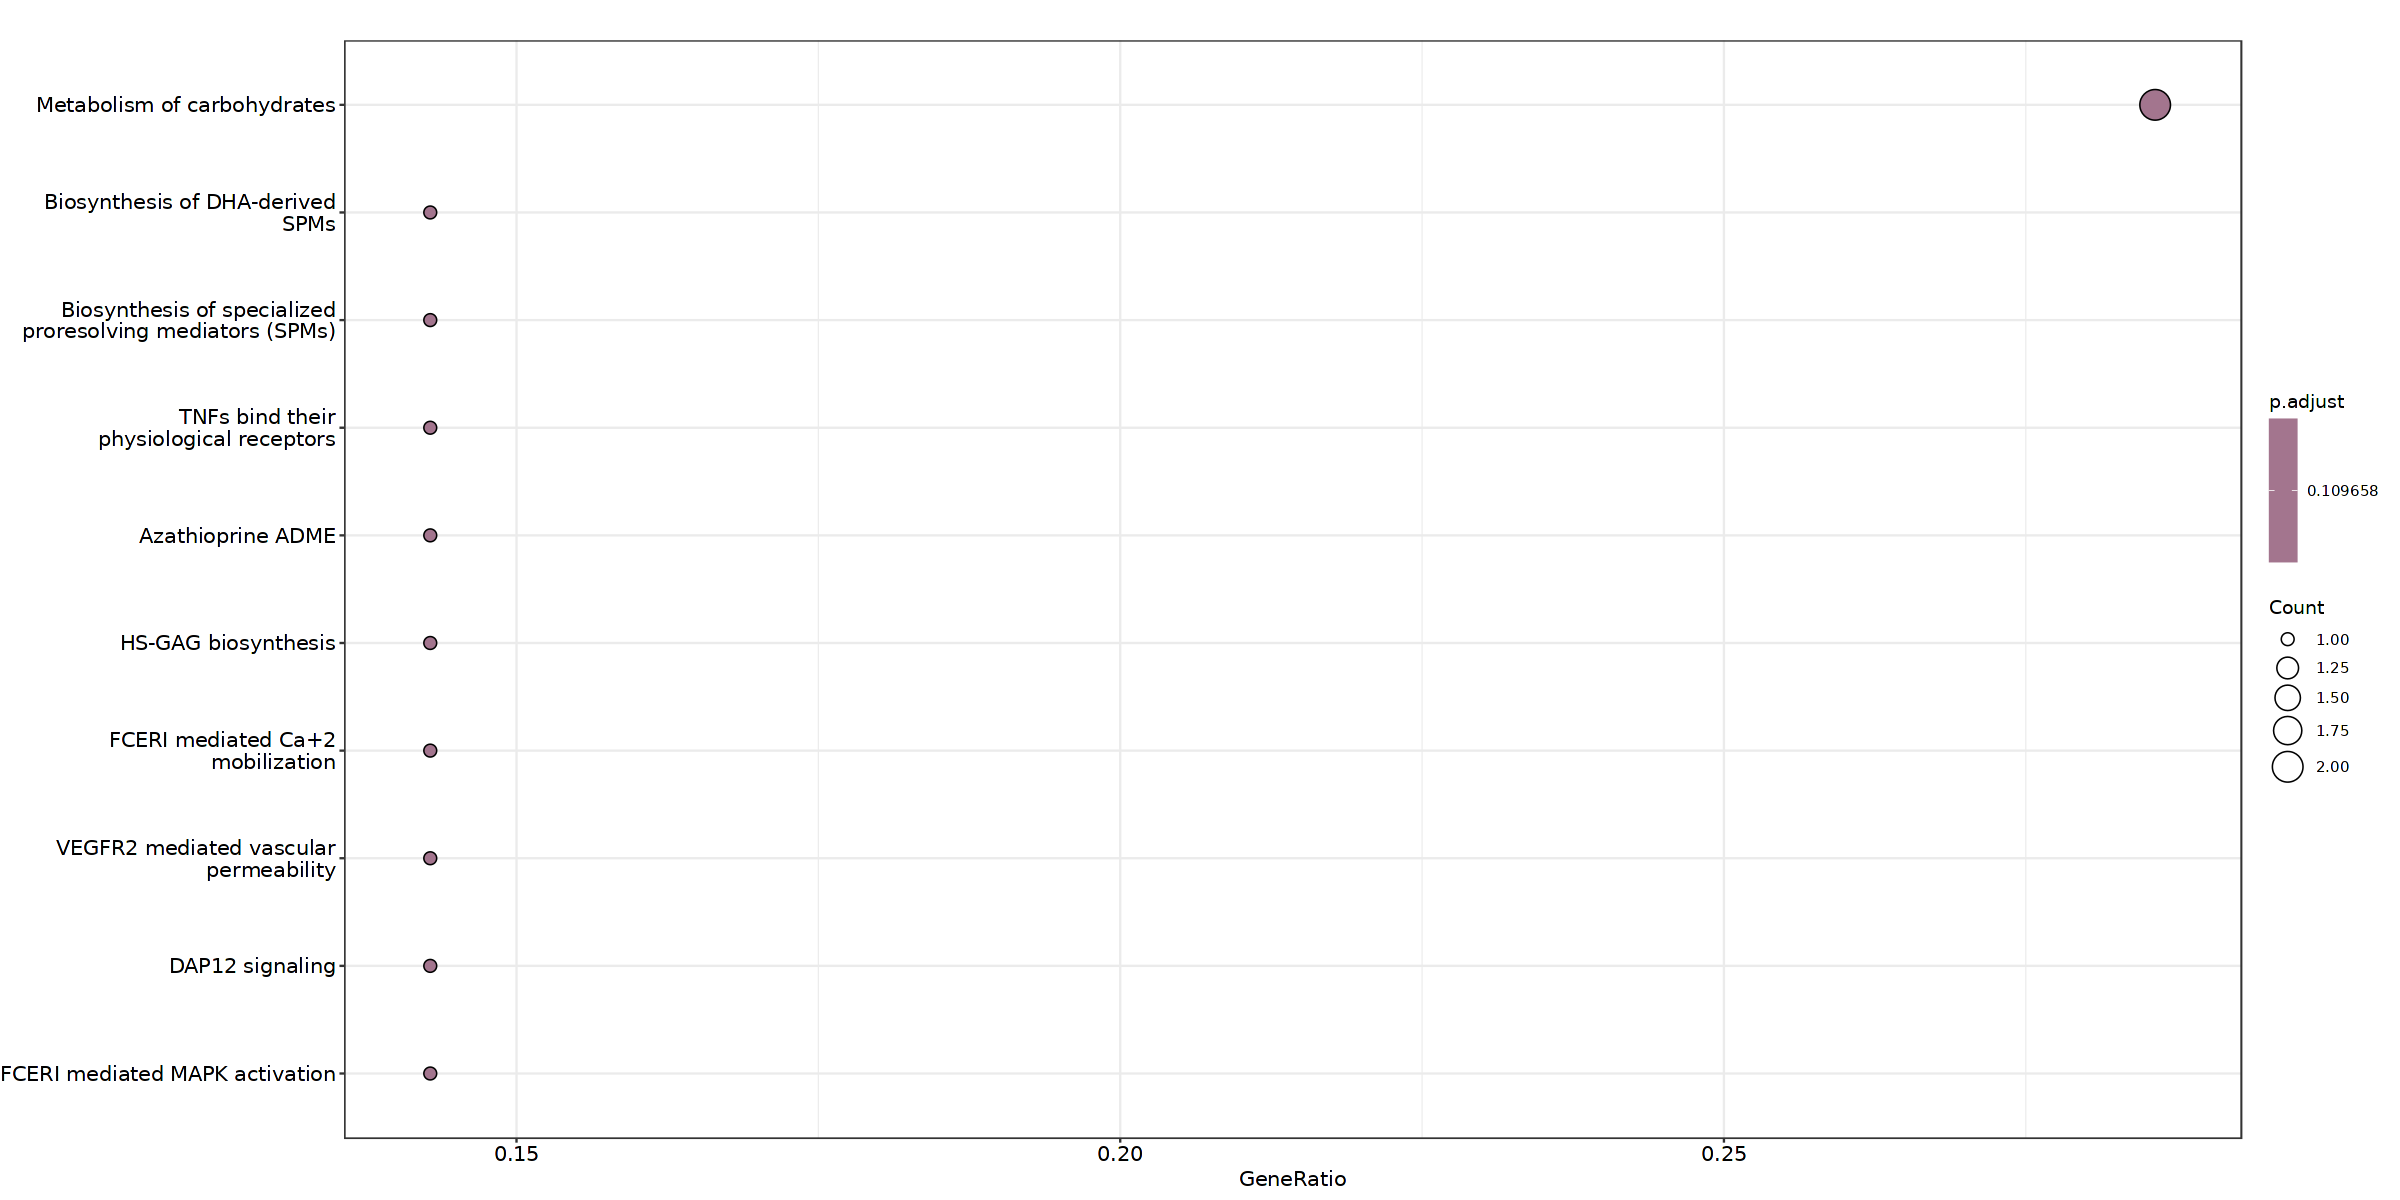

In [75]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [76]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

Warning message:
"ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


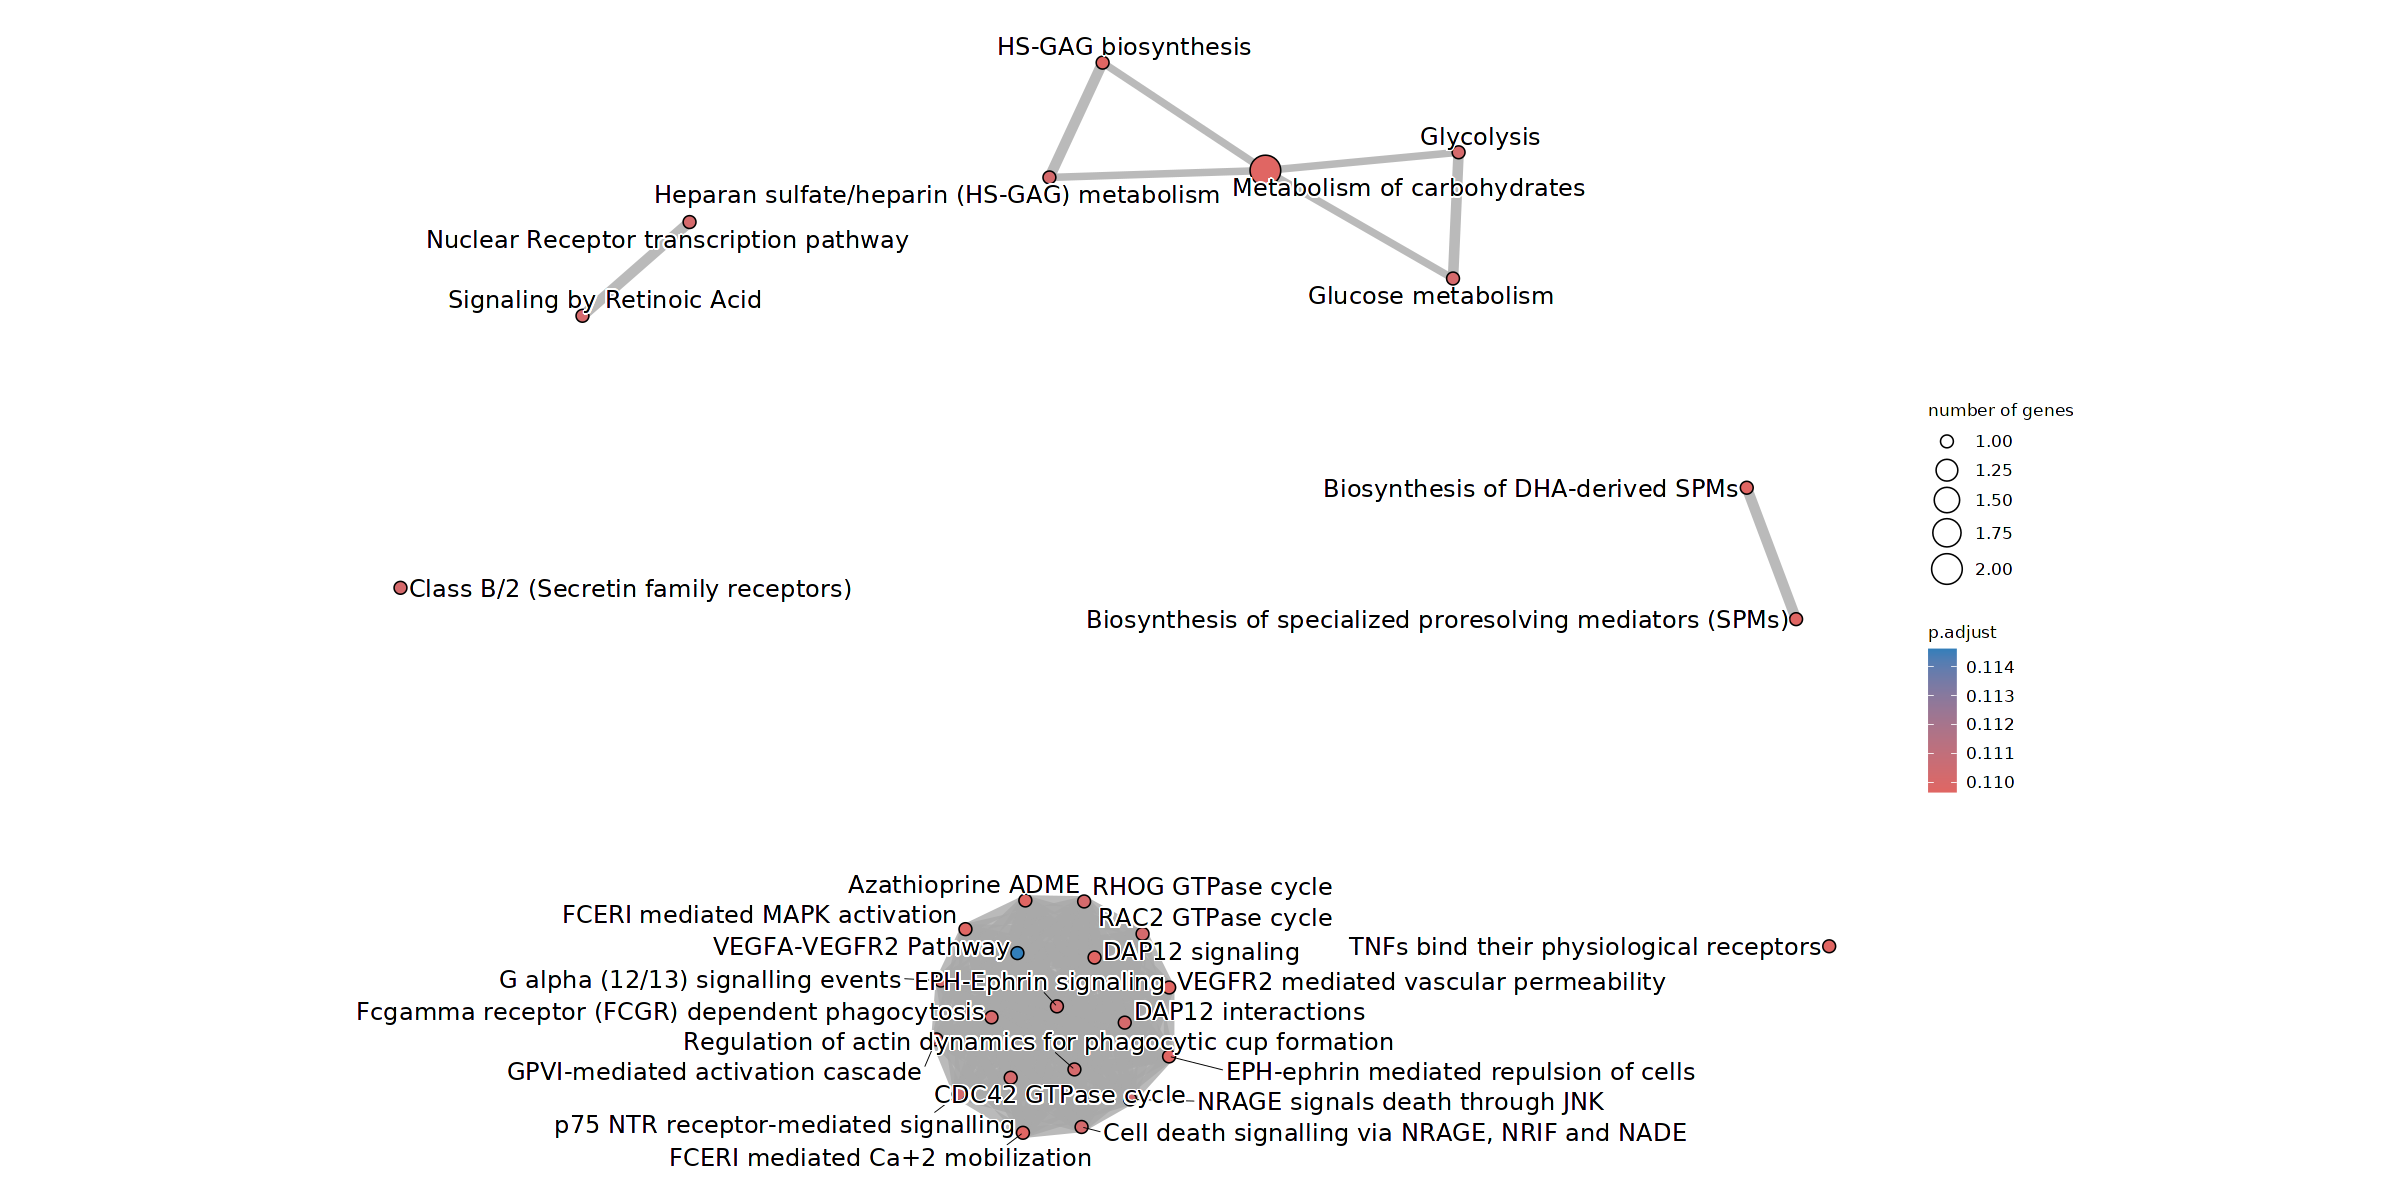

In [77]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Sub category 1

In [78]:
highest_cat <- "Ctrl"
second_highest_cat <- "Early"

In [79]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [80]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [81]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [82]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [83]:
length(gene_list)

[1] 0

##### Sub category 2

In [84]:
highest_cat <- "Ctrl"
second_highest_cat <- "Peak"

In [85]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [86]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [87]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [88]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [89]:
length(gene_list)

[1] 0

##### Sub category 3

In [90]:
highest_cat <- "Ctrl"
second_highest_cat <- "Late"

In [91]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [92]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [93]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [94]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [95]:
length(gene_list)

[1] 0

##### Sub category 4

In [96]:
highest_cat <- "Early"
second_highest_cat <- "Ctrl"

In [97]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [98]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [99]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [100]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [101]:
length(gene_list)

[1] 0

##### Sub category 5

In [61]:
highest_cat <- "Early"
second_highest_cat <- "Peak"

In [62]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [63]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [64]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [65]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [66]:
length(gene_list)

[1] 2

In [67]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [68]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [69]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [70]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [71]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [72]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [73]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [74]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:2] "12661" "72258"
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...6 enriched terms found
'data.frame':	6 obs. of  9 variables:
 $ ID         : chr  "R-MMU-1296346" "R-MMU-5576886" "R-MMU-1296071" "R-MMU-5576891" ...
 $ Description: chr  "Tandem pore domain potassium channels" "Phase 4 - resting membrane potential" "Potassium Channels" "Cardiac conduction" ...
 $ GeneRatio  : chr  "1/1" "1/1" "1/1" "1/1" ...
 $ BgRatio    : chr  "11/8582" "17/8582" "97/8582" "98/8582" ...
 $ pvalue     : num  0.00128 0.00198 0.0113 0.01142 0.01783 ...
 $ p.adjust   : num  0.00594 0.00594 0.01713 0.01713 0.02139 ...
 $ qvalue     : logi  NA NA NA NA NA NA
 $ geneID     : chr  "Kcnk10" "Kcnk10" "Kcnk10" "Kcnk10" ...
 $ Count      : int  1 1 1 1 1 1
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization.

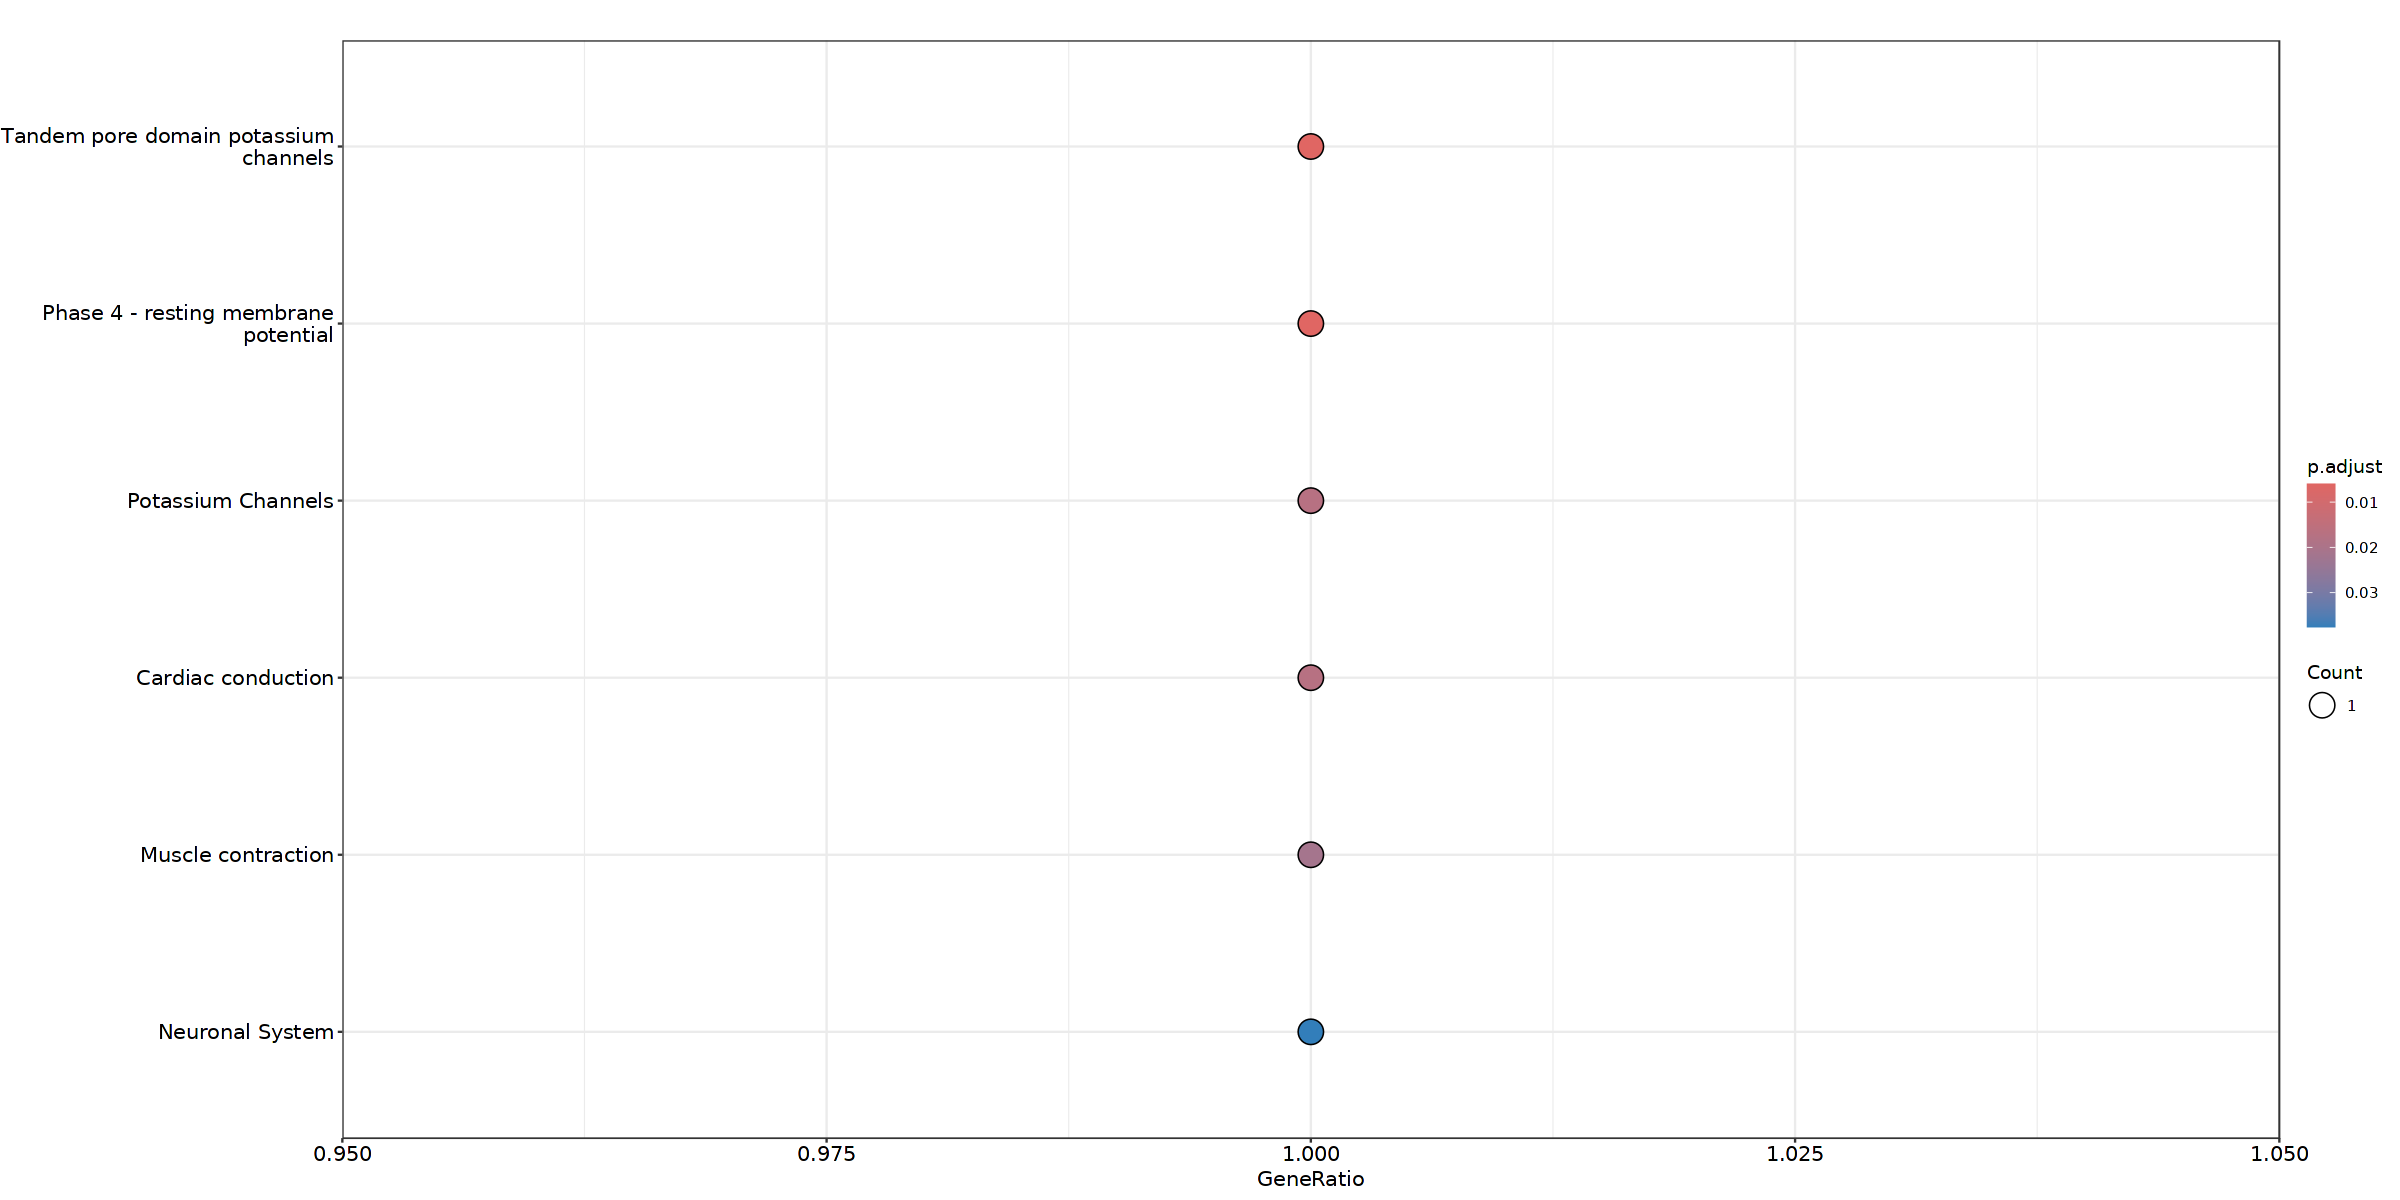

In [75]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [76]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

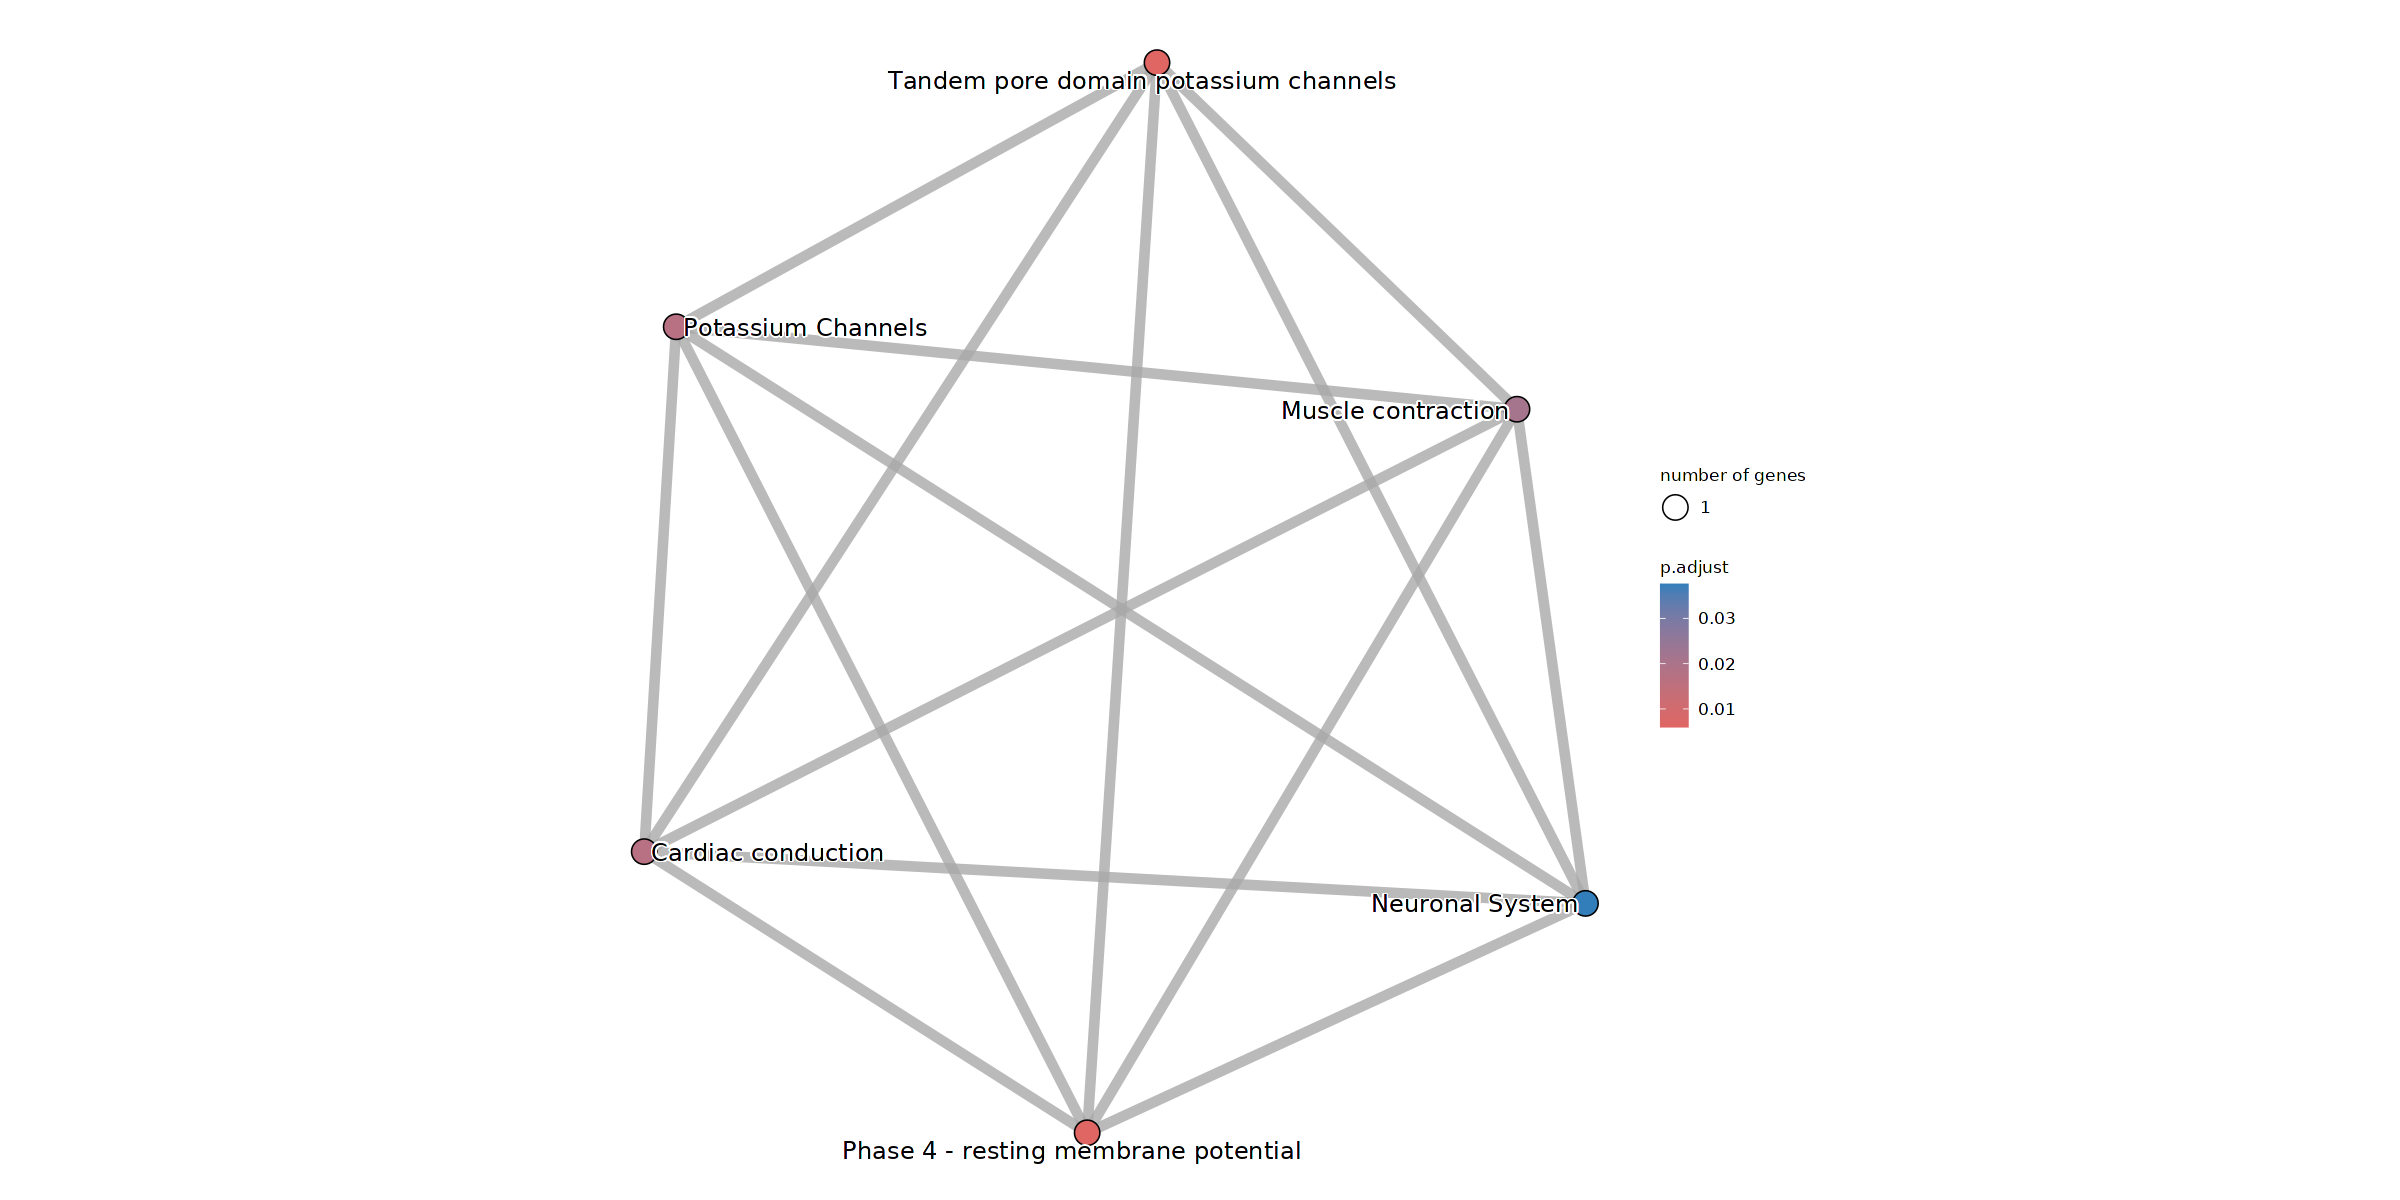

In [77]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

In [78]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [79]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:2] "12661" "72258"
#...pvalues adjusted by 'fdr' with cutoff <1 
#...6 enriched terms found
'data.frame':	6 obs. of  9 variables:
 $ ID         : chr  "R-MMU-1296346" "R-MMU-5576886" "R-MMU-1296071" "R-MMU-5576891" ...
 $ Description: chr  "Tandem pore domain potassium channels" "Phase 4 - resting membrane potential" "Potassium Channels" "Cardiac conduction" ...
 $ GeneRatio  : chr  "1/1" "1/1" "1/1" "1/1" ...
 $ BgRatio    : chr  "11/8582" "17/8582" "97/8582" "98/8582" ...
 $ pvalue     : num  0.00128 0.00198 0.0113 0.01142 0.01783 ...
 $ p.adjust   : num  0.00594 0.00594 0.01713 0.01713 0.02139 ...
 $ qvalue     : logi  NA NA NA NA NA NA
 $ geneID     : chr  "Kcnk10" "Kcnk10" "Kcnk10" "Kcnk10" ...
 $ Count      : int  1 1 1 1 1 1
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Mo

In [80]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL56_",highest_cat,"_",second_highest_cat,".csv"), row.names=FALSE)

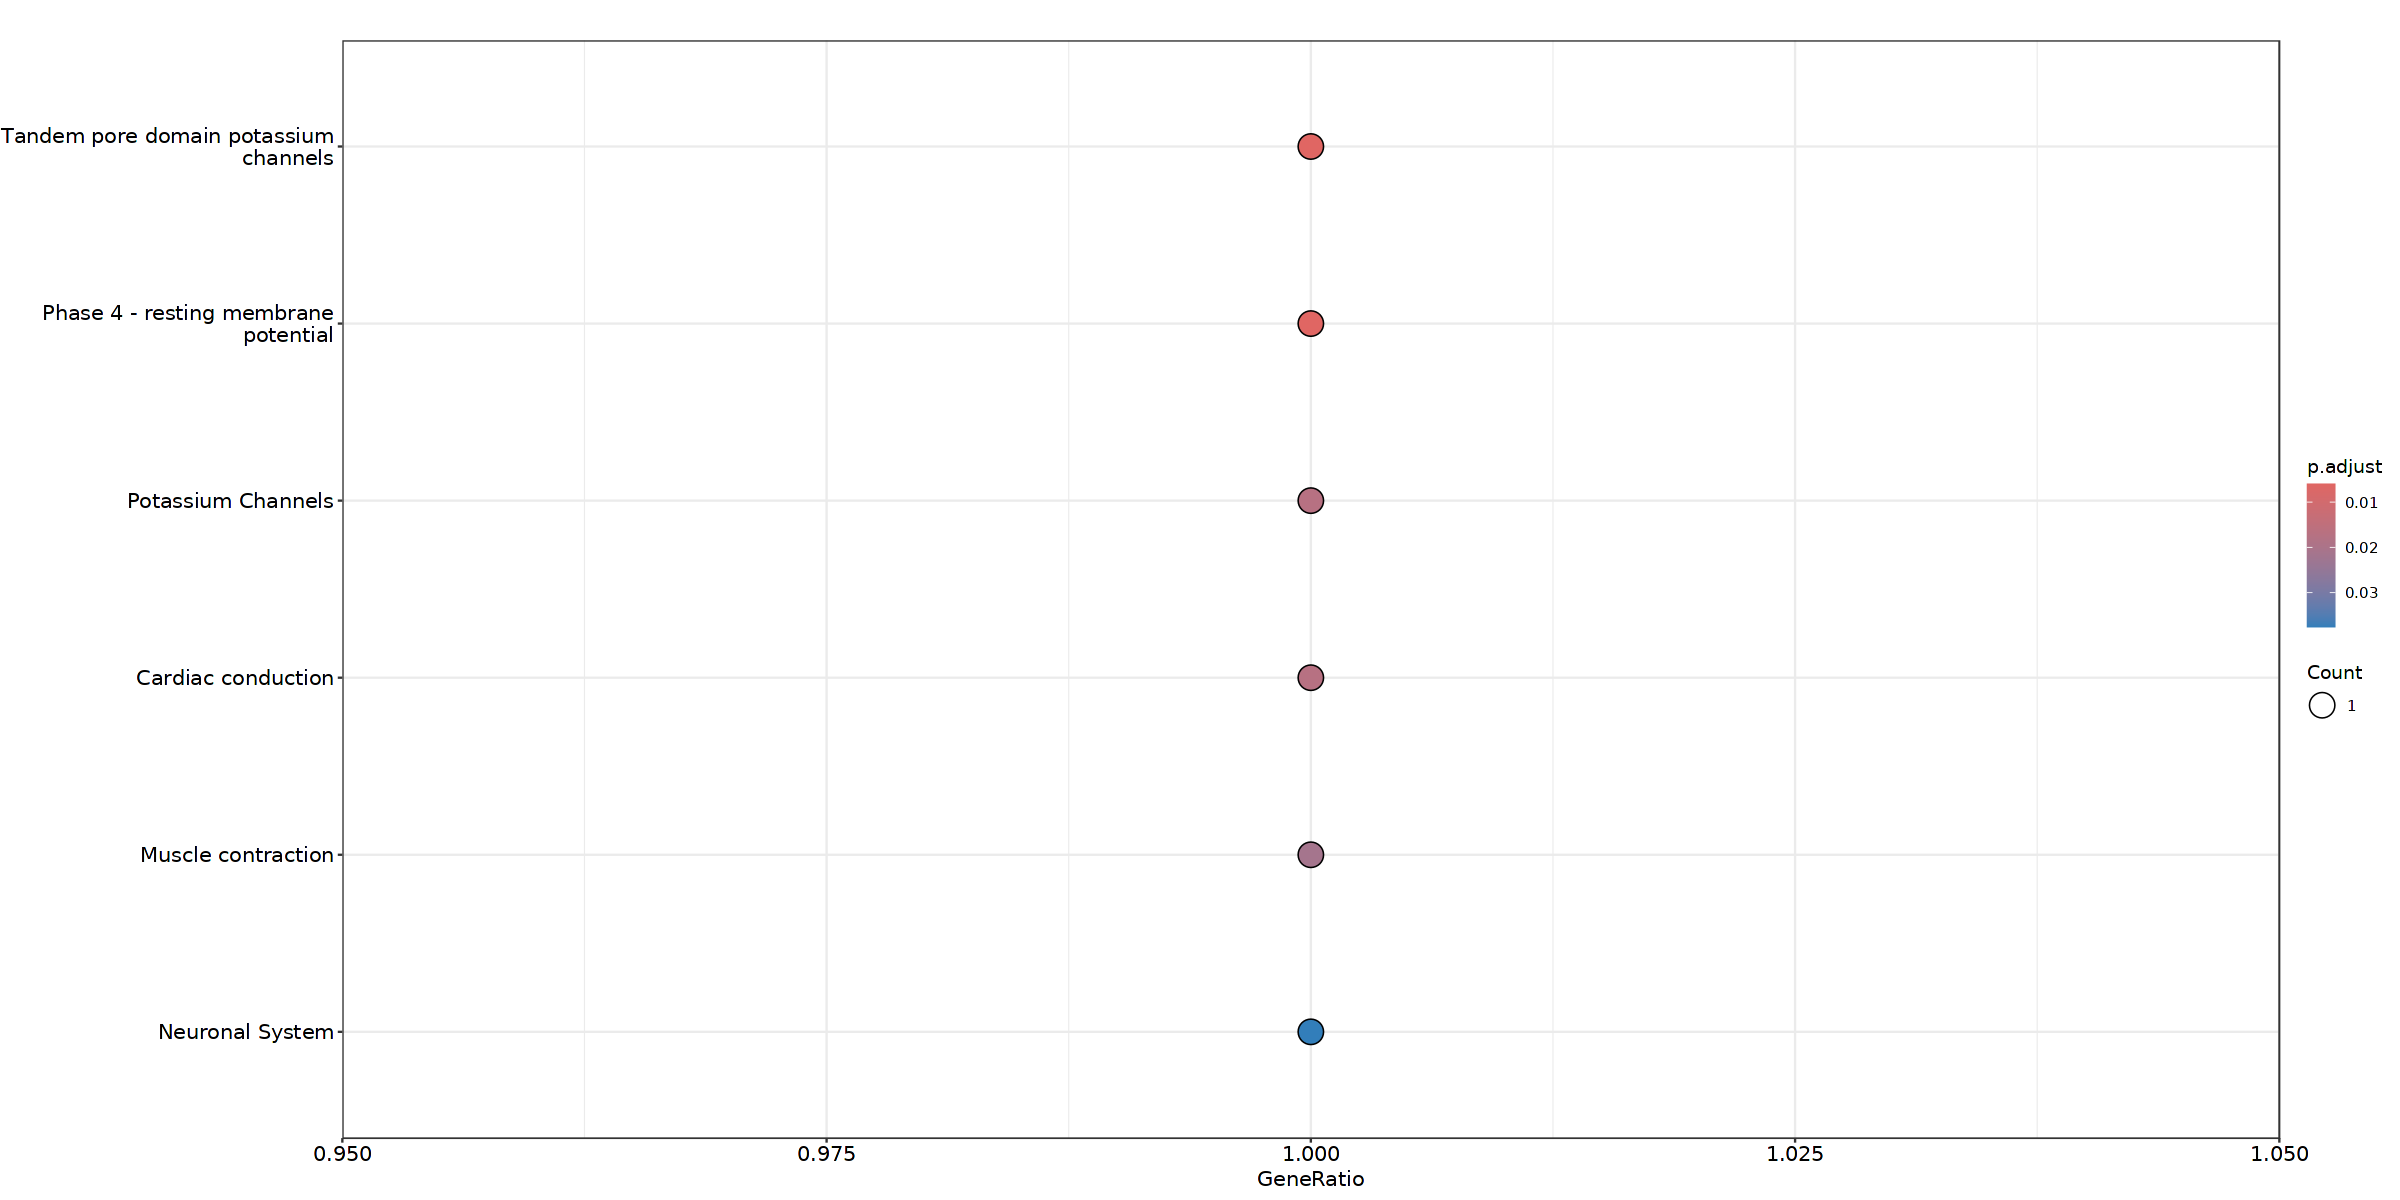

In [121]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [122]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

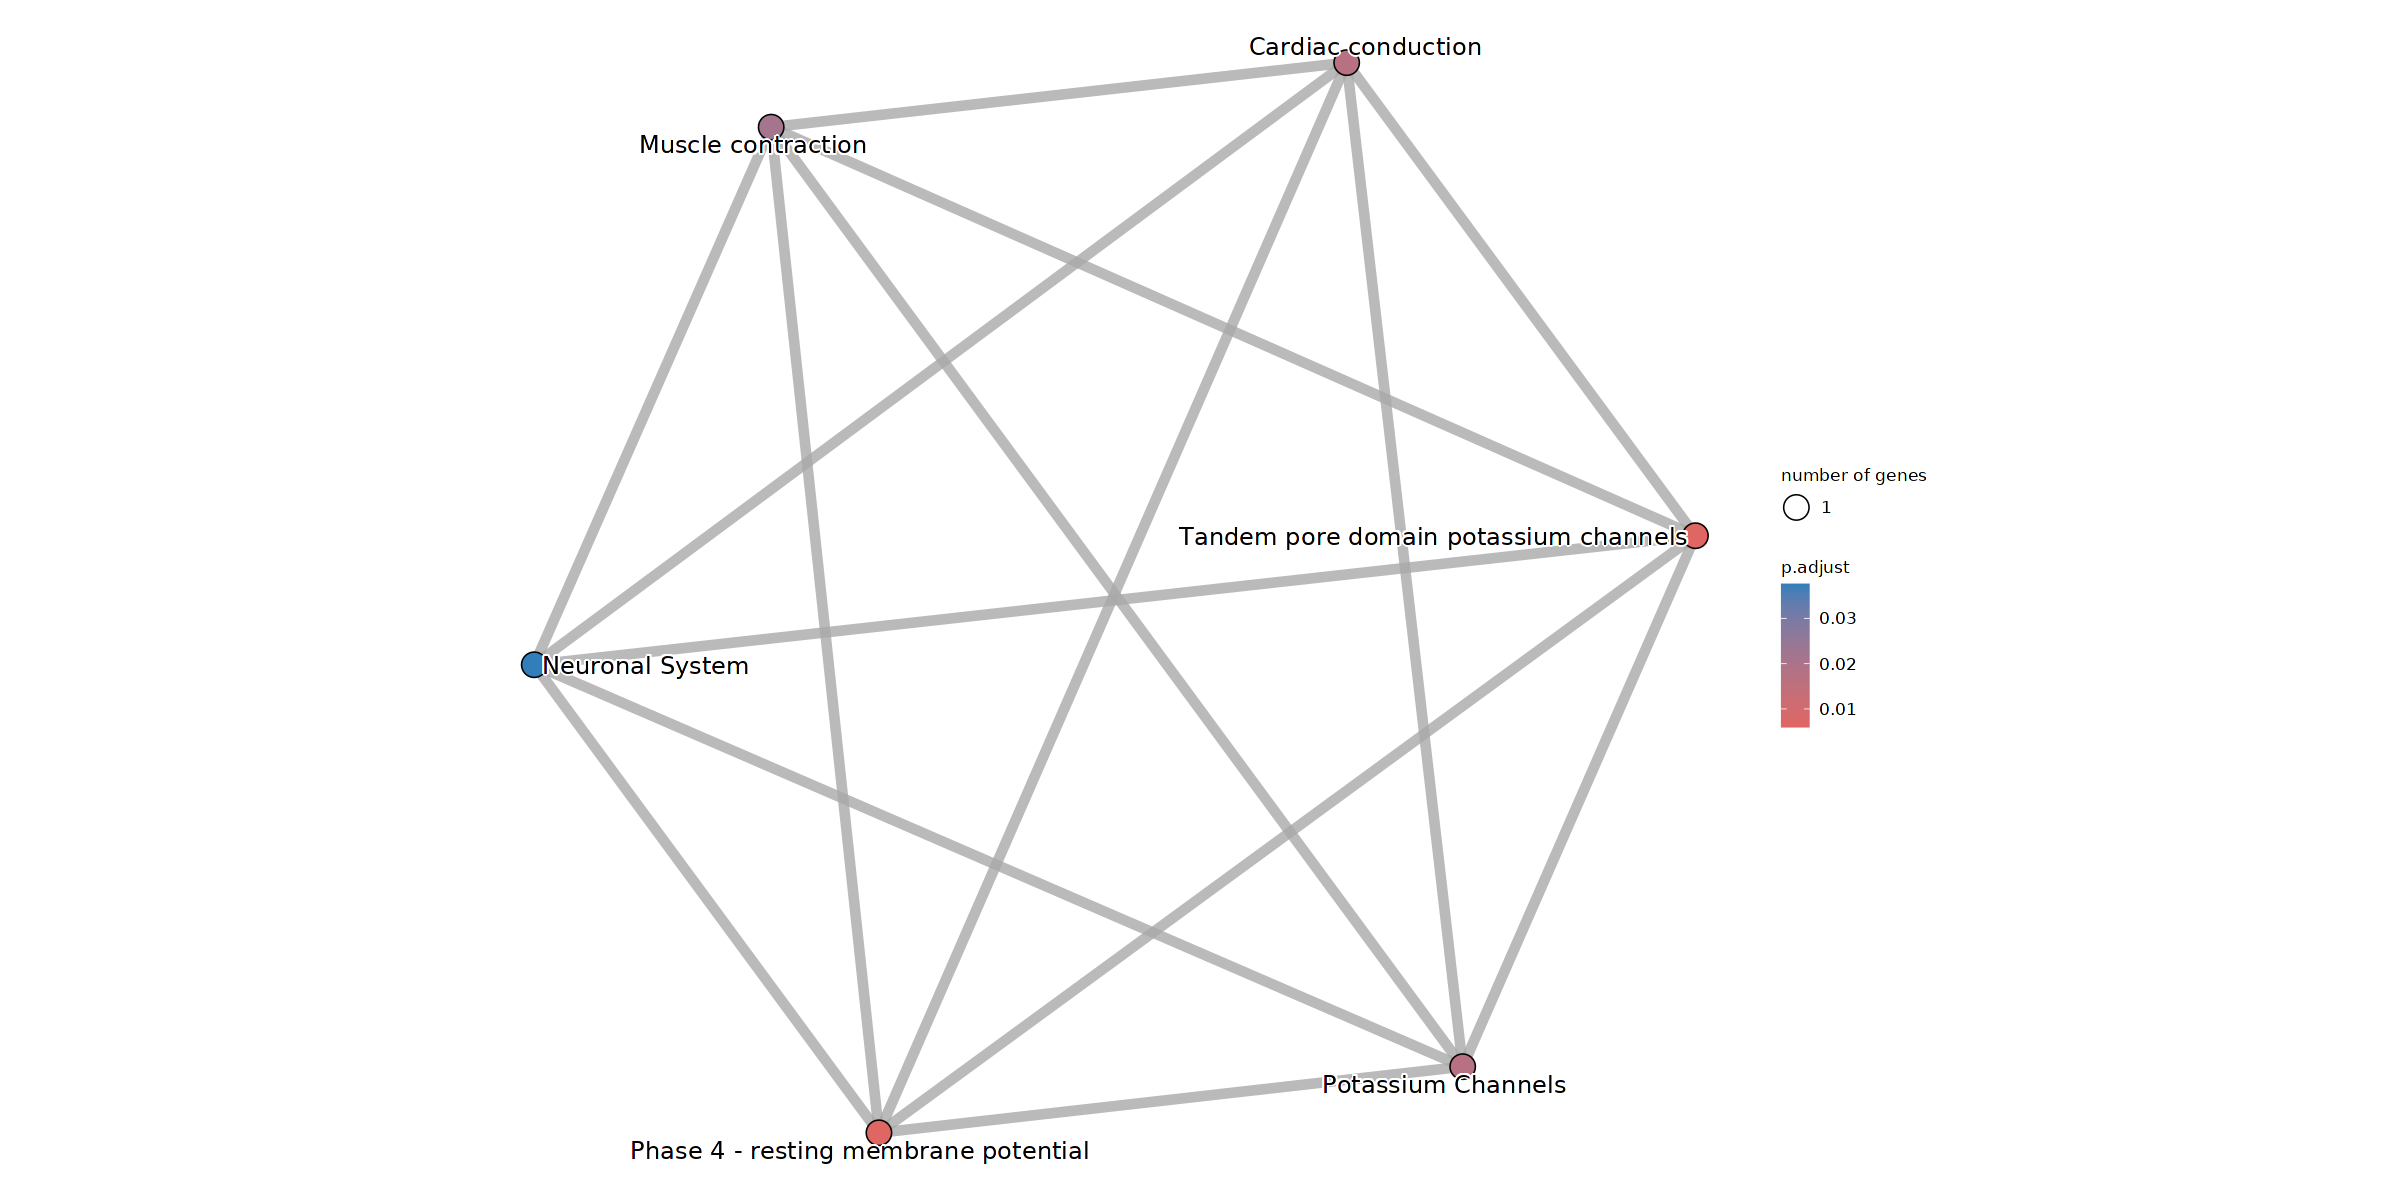

In [123]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Sub category 6

In [124]:
highest_cat <- "Early"
second_highest_cat <- "Late"

In [125]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [126]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [127]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [128]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [129]:
length(gene_list)

[1] 0

##### Sub category 7

In [130]:
highest_cat <- "Peak"
second_highest_cat <- "Ctrl"

In [131]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [132]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [133]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [134]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [135]:
length(gene_list)

[1] 0

##### Sub category 8

In [81]:
highest_cat <- "Peak"
second_highest_cat <- "Early"

In [82]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [83]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [84]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [85]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [86]:
length(gene_list)

[1] 24

In [87]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [88]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [89]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [90]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [91]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [92]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [93]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [94]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:24] "17069" "242523" "224860" "14469" "229898" "229900" "55932" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...0 enriched terms found
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


In [95]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [96]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:24] "17069" "242523" "224860" "14469" "229898" "229900" "55932" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...39 enriched terms found
'data.frame':	39 obs. of  9 variables:
 $ ID         : chr  "R-MMU-435354" "R-MMU-71240" "R-MMU-392154" "R-MMU-75109" ...
 $ Description: chr  "Zinc transporters" "Tryptophan catabolism" "Nitric oxide stimulates guanylate cyclase" "Triglyceride biosynthesis" ...
 $ GeneRatio  : chr  "1/11" "1/11" "1/11" "1/11" ...
 $ BgRatio    : chr  "11/8582" "11/8582" "13/8582" "13/8582" ...
 $ pvalue     : num  0.014 0.014 0.0165 0.0165 0.0178 ...
 $ p.adjust   : num  0.123 0.123 0.123 0.123 0.123 ...
 $ qvalue     : num  0.0865 0.0865 0.0865 0.0865 0.0865 ...
 $ geneID     : chr  "Slc39a14" "Ido2" "Nos2" "Agmo" ...
 $ Count      : int  1 1 1 1 1 1 1 1 1 1 ...
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor packa

In [97]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL56_",highest_cat,"_",second_highest_cat,".csv"), row.names=FALSE)

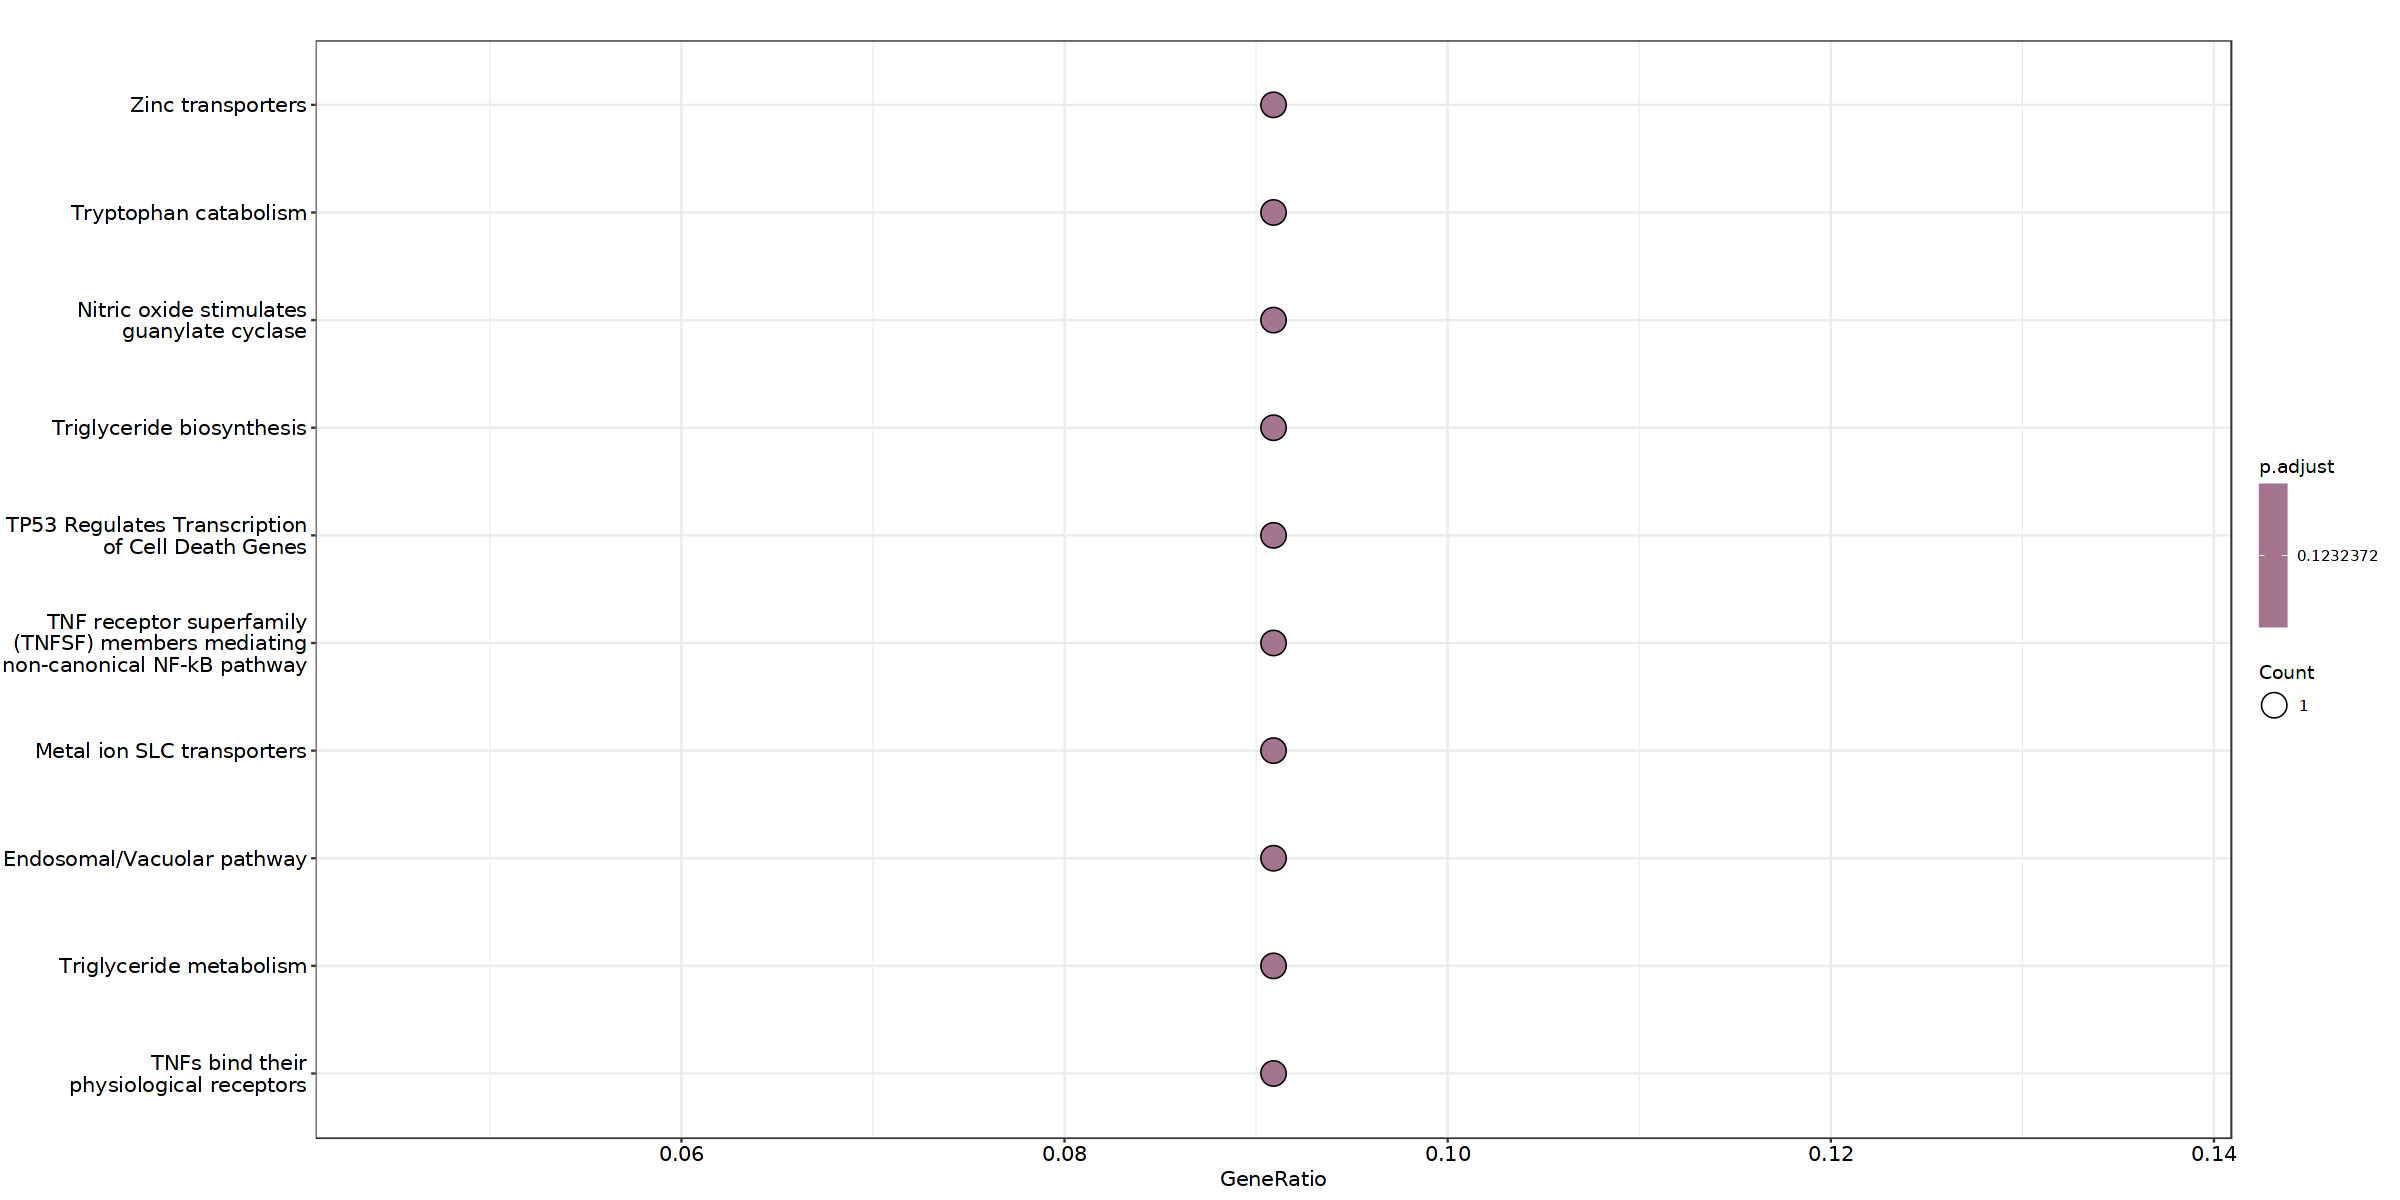

In [152]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [153]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

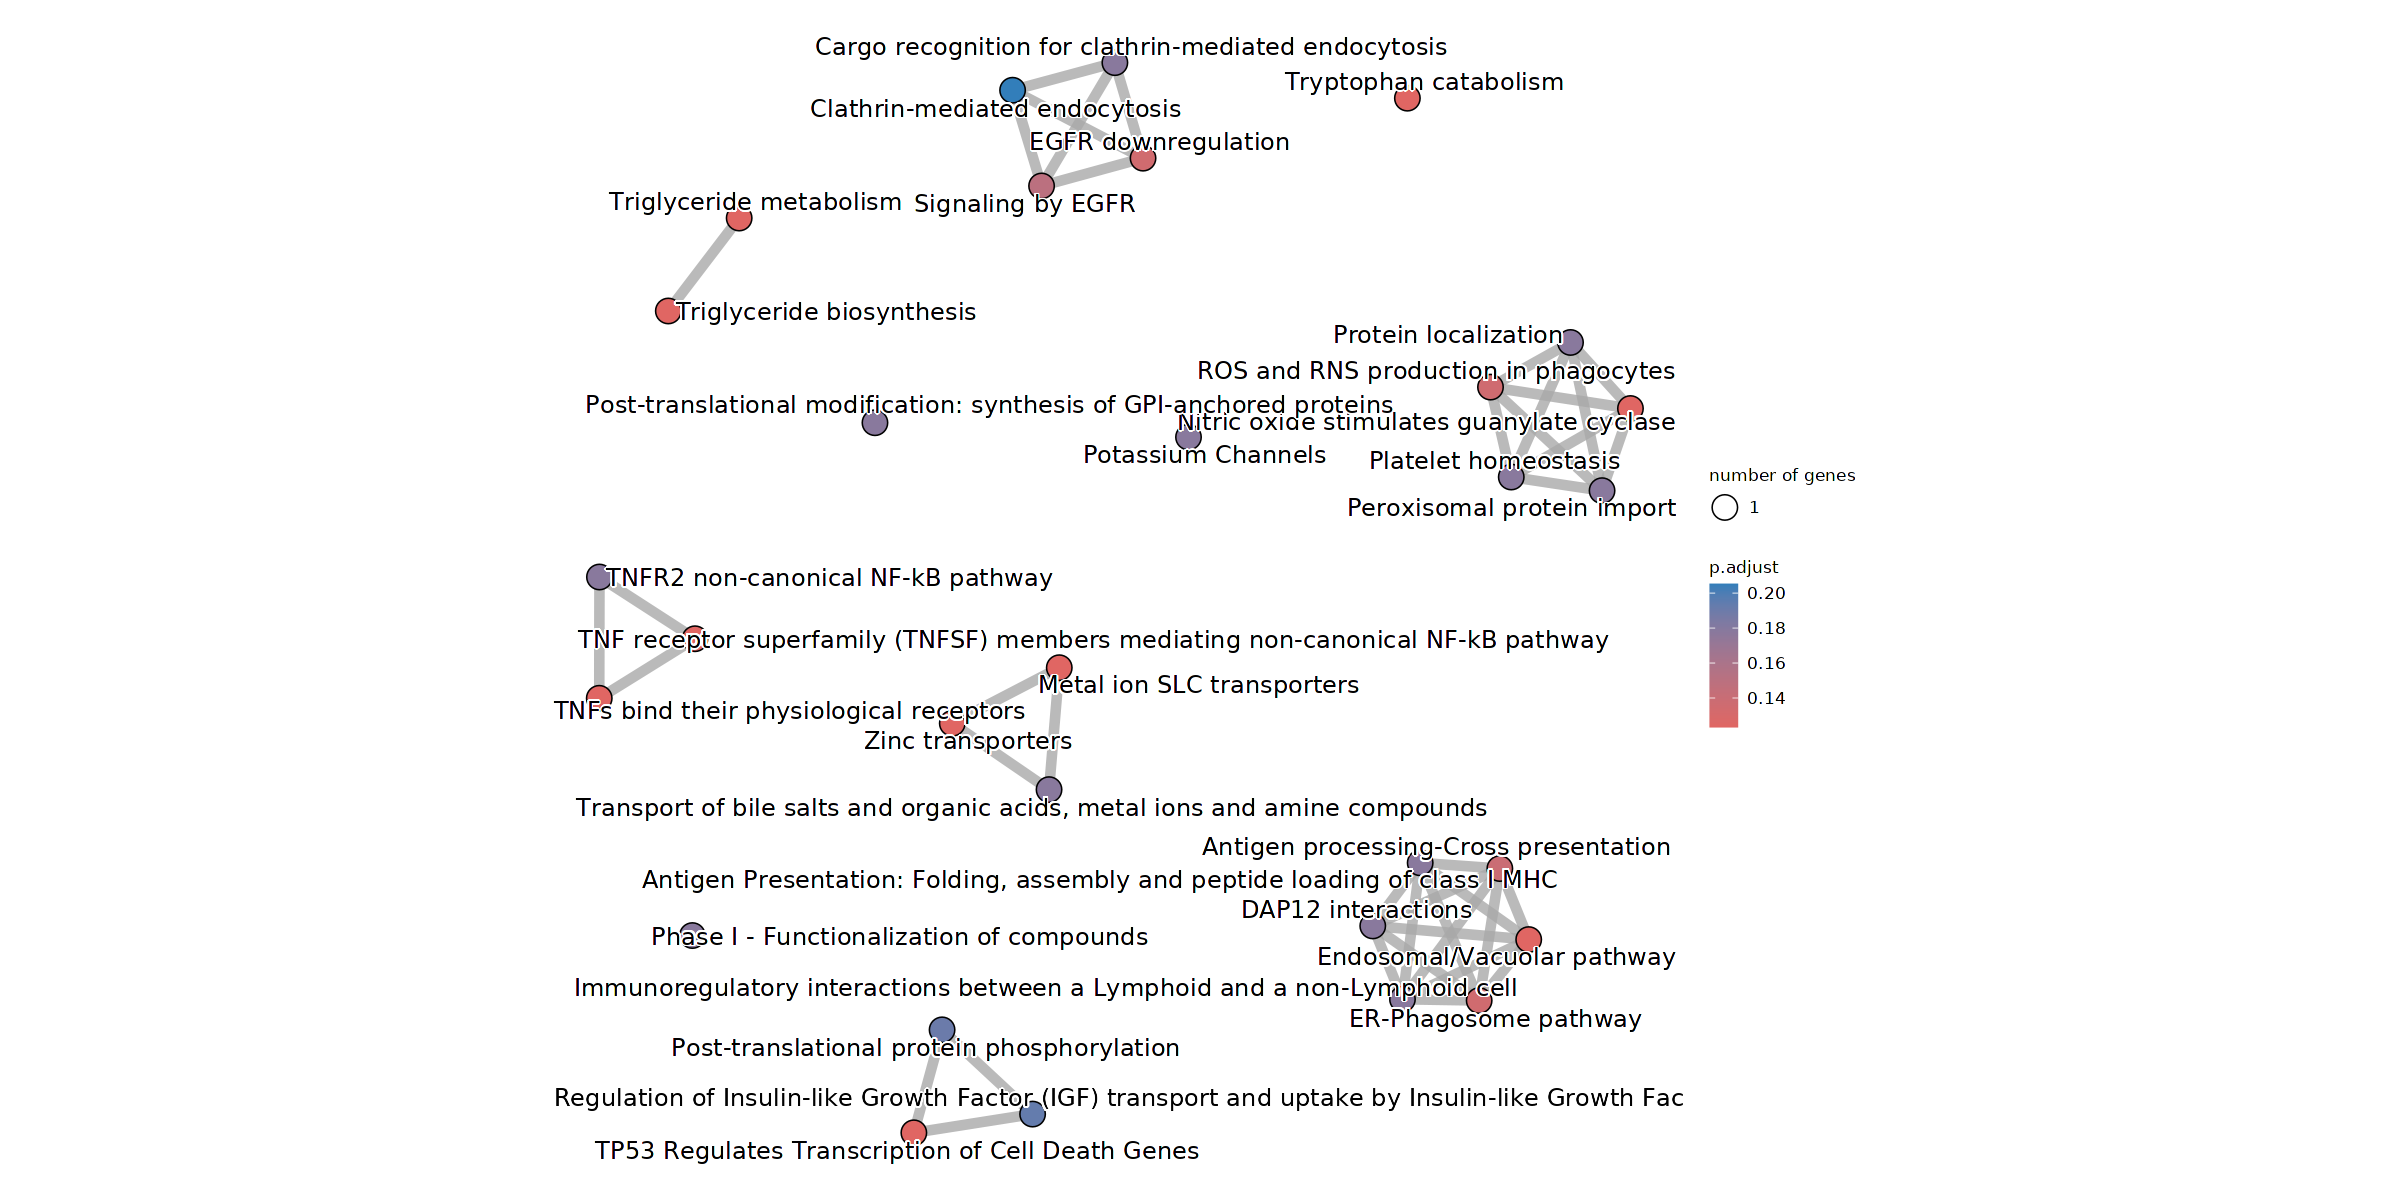

In [154]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Sub category 9

In [98]:
highest_cat <- "Peak"
second_highest_cat <- "Late"

In [99]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [100]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [101]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [102]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [103]:
length(gene_list)

[1] 25

In [104]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [105]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [106]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [107]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [108]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [109]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [110]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [111]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:24] "234311" "76681" "94094" "238393" "100039796" "15953" "15944" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...2 enriched terms found
'data.frame':	2 obs. of  9 variables:
 $ ID         : chr  "R-MMU-197264" "R-MMU-196807"
 $ Description: chr  "Nicotinamide salvaging" "Nicotinate metabolism"
 $ GeneRatio  : chr  "2/11" "2/11"
 $ BgRatio    : chr  "18/8582" "30/8582"
 $ pvalue     : num  0.000226 0.000637
 $ p.adjust   : num  0.0127 0.0178
 $ qvalue     : num  0.00904 0.01274
 $ geneID     : chr  "Parp9/Parp14" "Parp9/Parp14"
 $ Count      : int  2 2
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


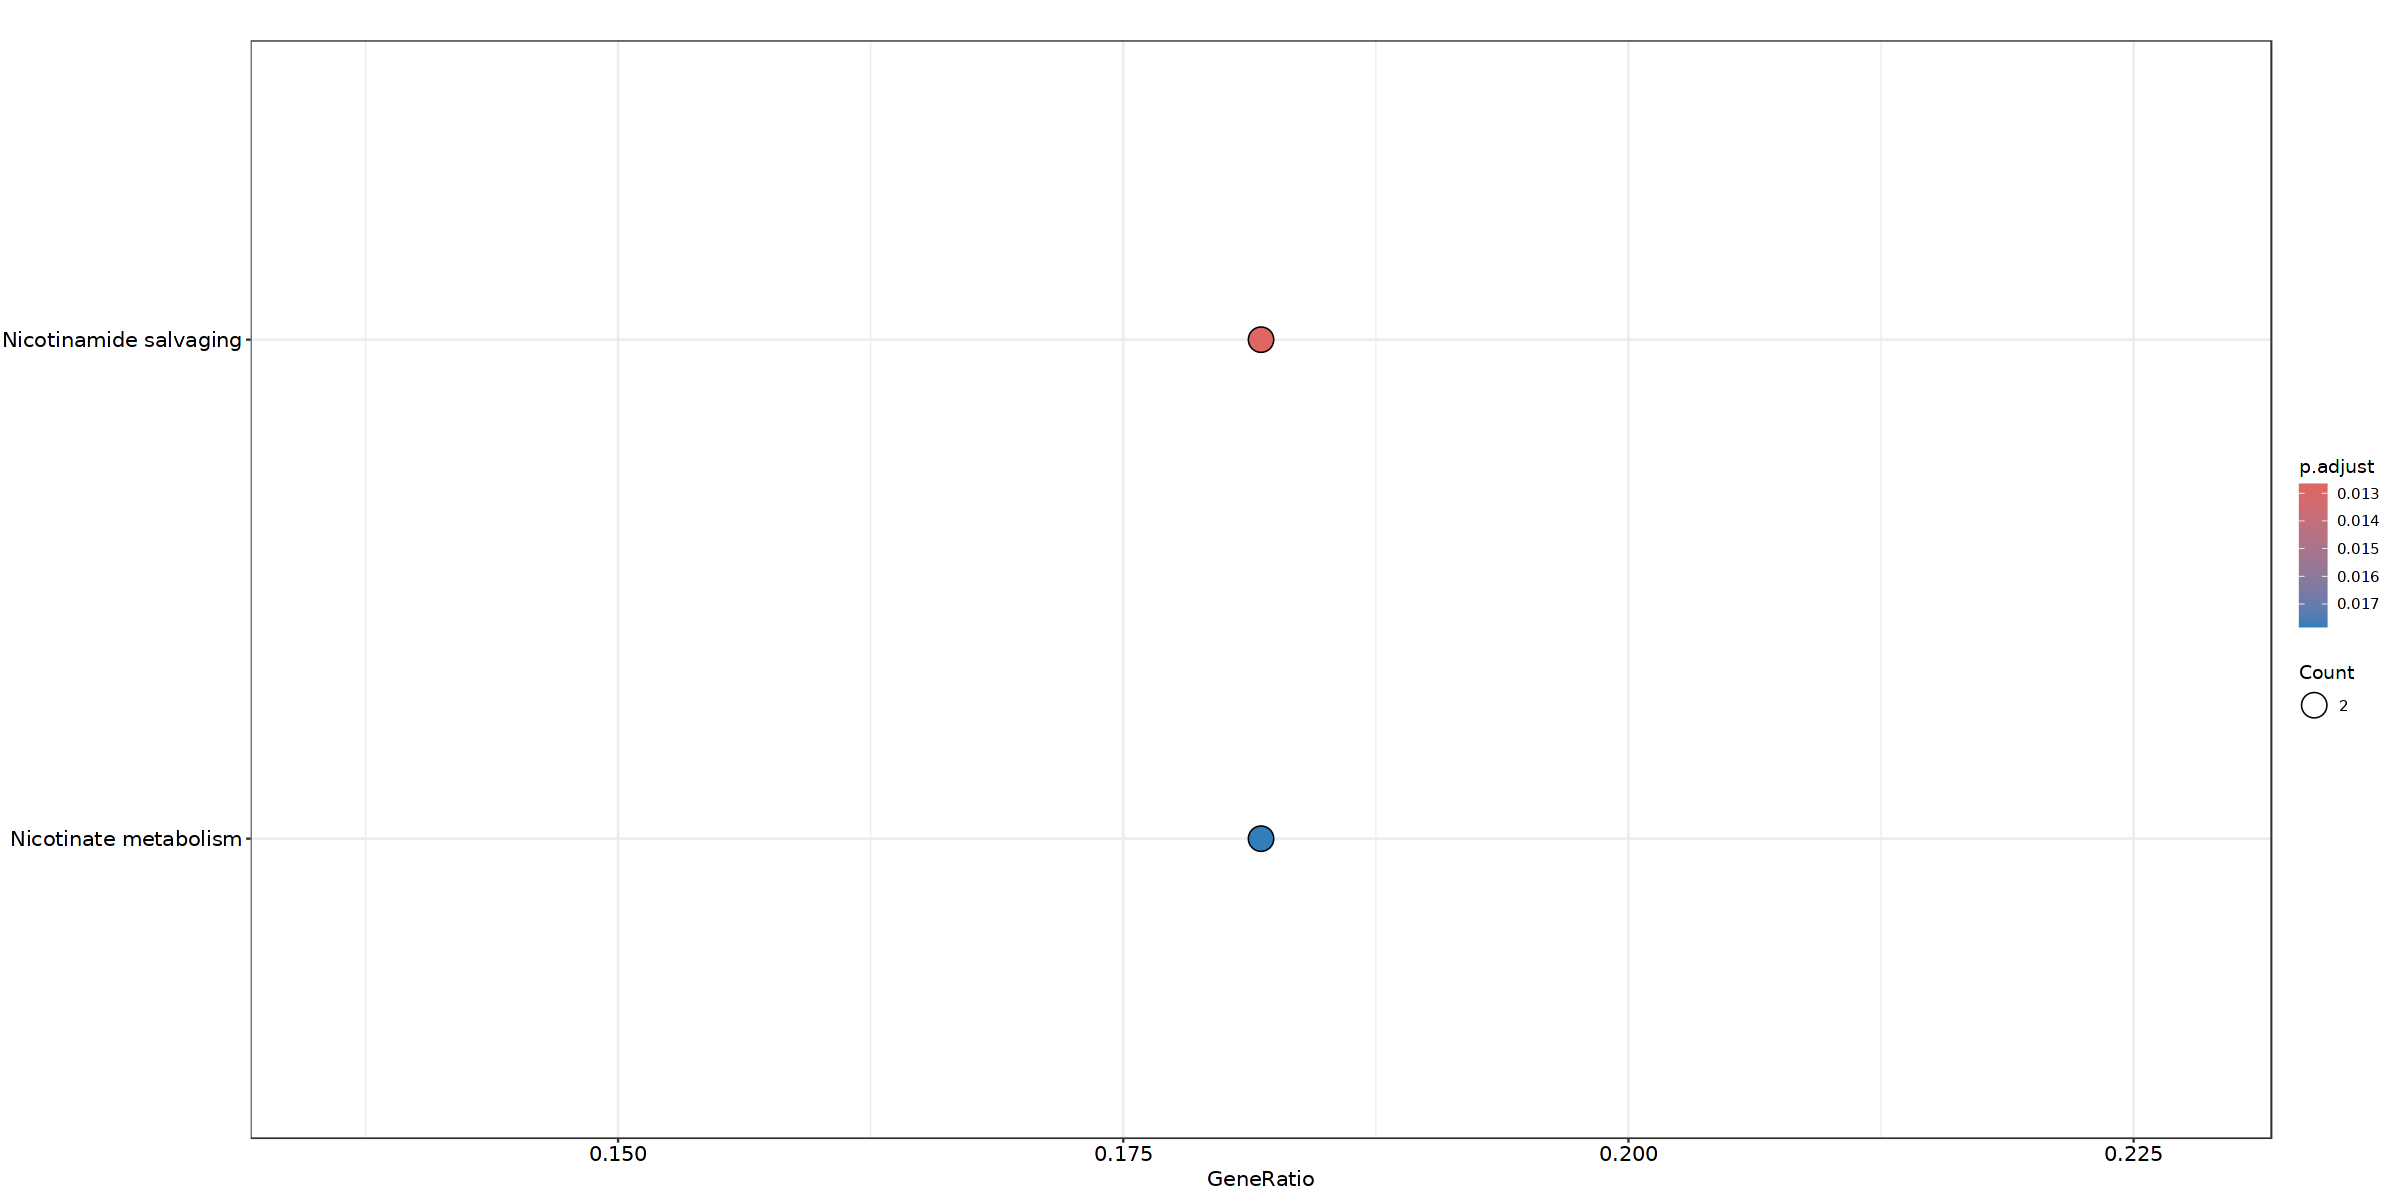

In [112]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [113]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

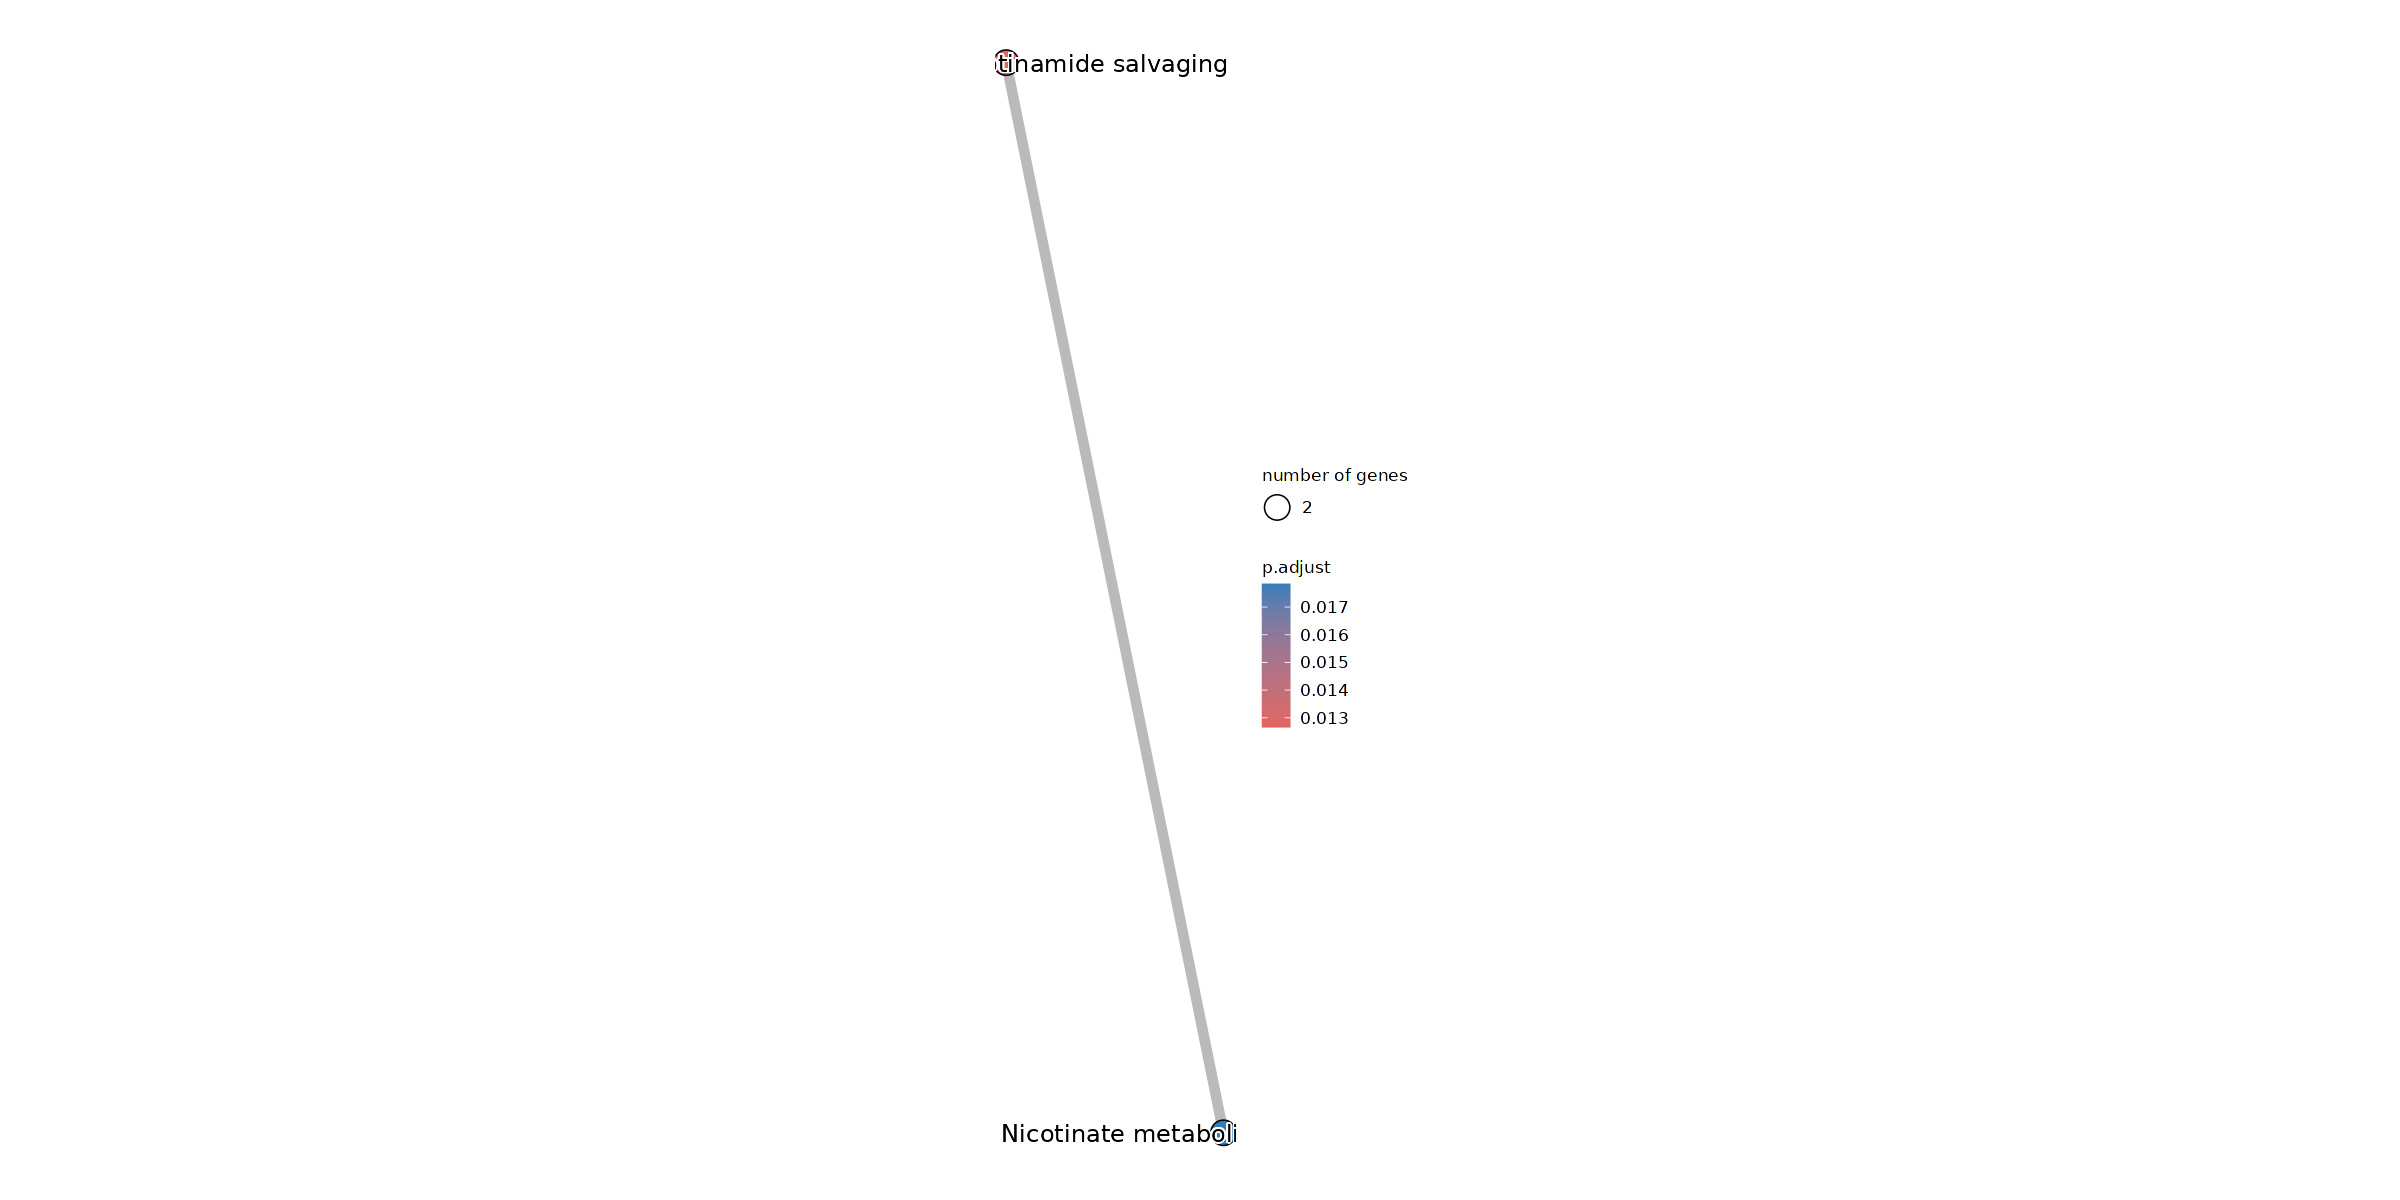

In [114]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

In [115]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [116]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:24] "234311" "76681" "94094" "238393" "100039796" "15953" "15944" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...56 enriched terms found
'data.frame':	56 obs. of  9 variables:
 $ ID         : chr  "R-MMU-197264" "R-MMU-196807" "R-MMU-196849" "R-MMU-3371378" ...
 $ Description: chr  "Nicotinamide salvaging" "Nicotinate metabolism" "Metabolism of water-soluble vitamins and cofactors" "Regulation by c-FLIP" ...
 $ GeneRatio  : chr  "2/11" "2/11" "2/11" "1/11" ...
 $ BgRatio    : chr  "18/8582" "30/8582" "110/8582" "10/8582" ...
 $ pvalue     : num  0.000226 0.000637 0.008303 0.01275 0.01275 ...
 $ p.adjust   : num  0.0127 0.0178 0.1183 0.1183 0.1183 ...
 $ qvalue     : num  0.00904 0.01274 0.08451 0.08451 0.08451 ...
 $ geneID     : chr  "Parp9/Parp14" "Parp9/Parp14" "Parp9/Parp14" "Fas" ...
 $ Count      : int  2 2 2 1 1 1 2 1 1 1 ...
#...Citation
  Guangchua

In [117]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL56_",highest_cat,"_",second_highest_cat,".csv"), row.names=FALSE)

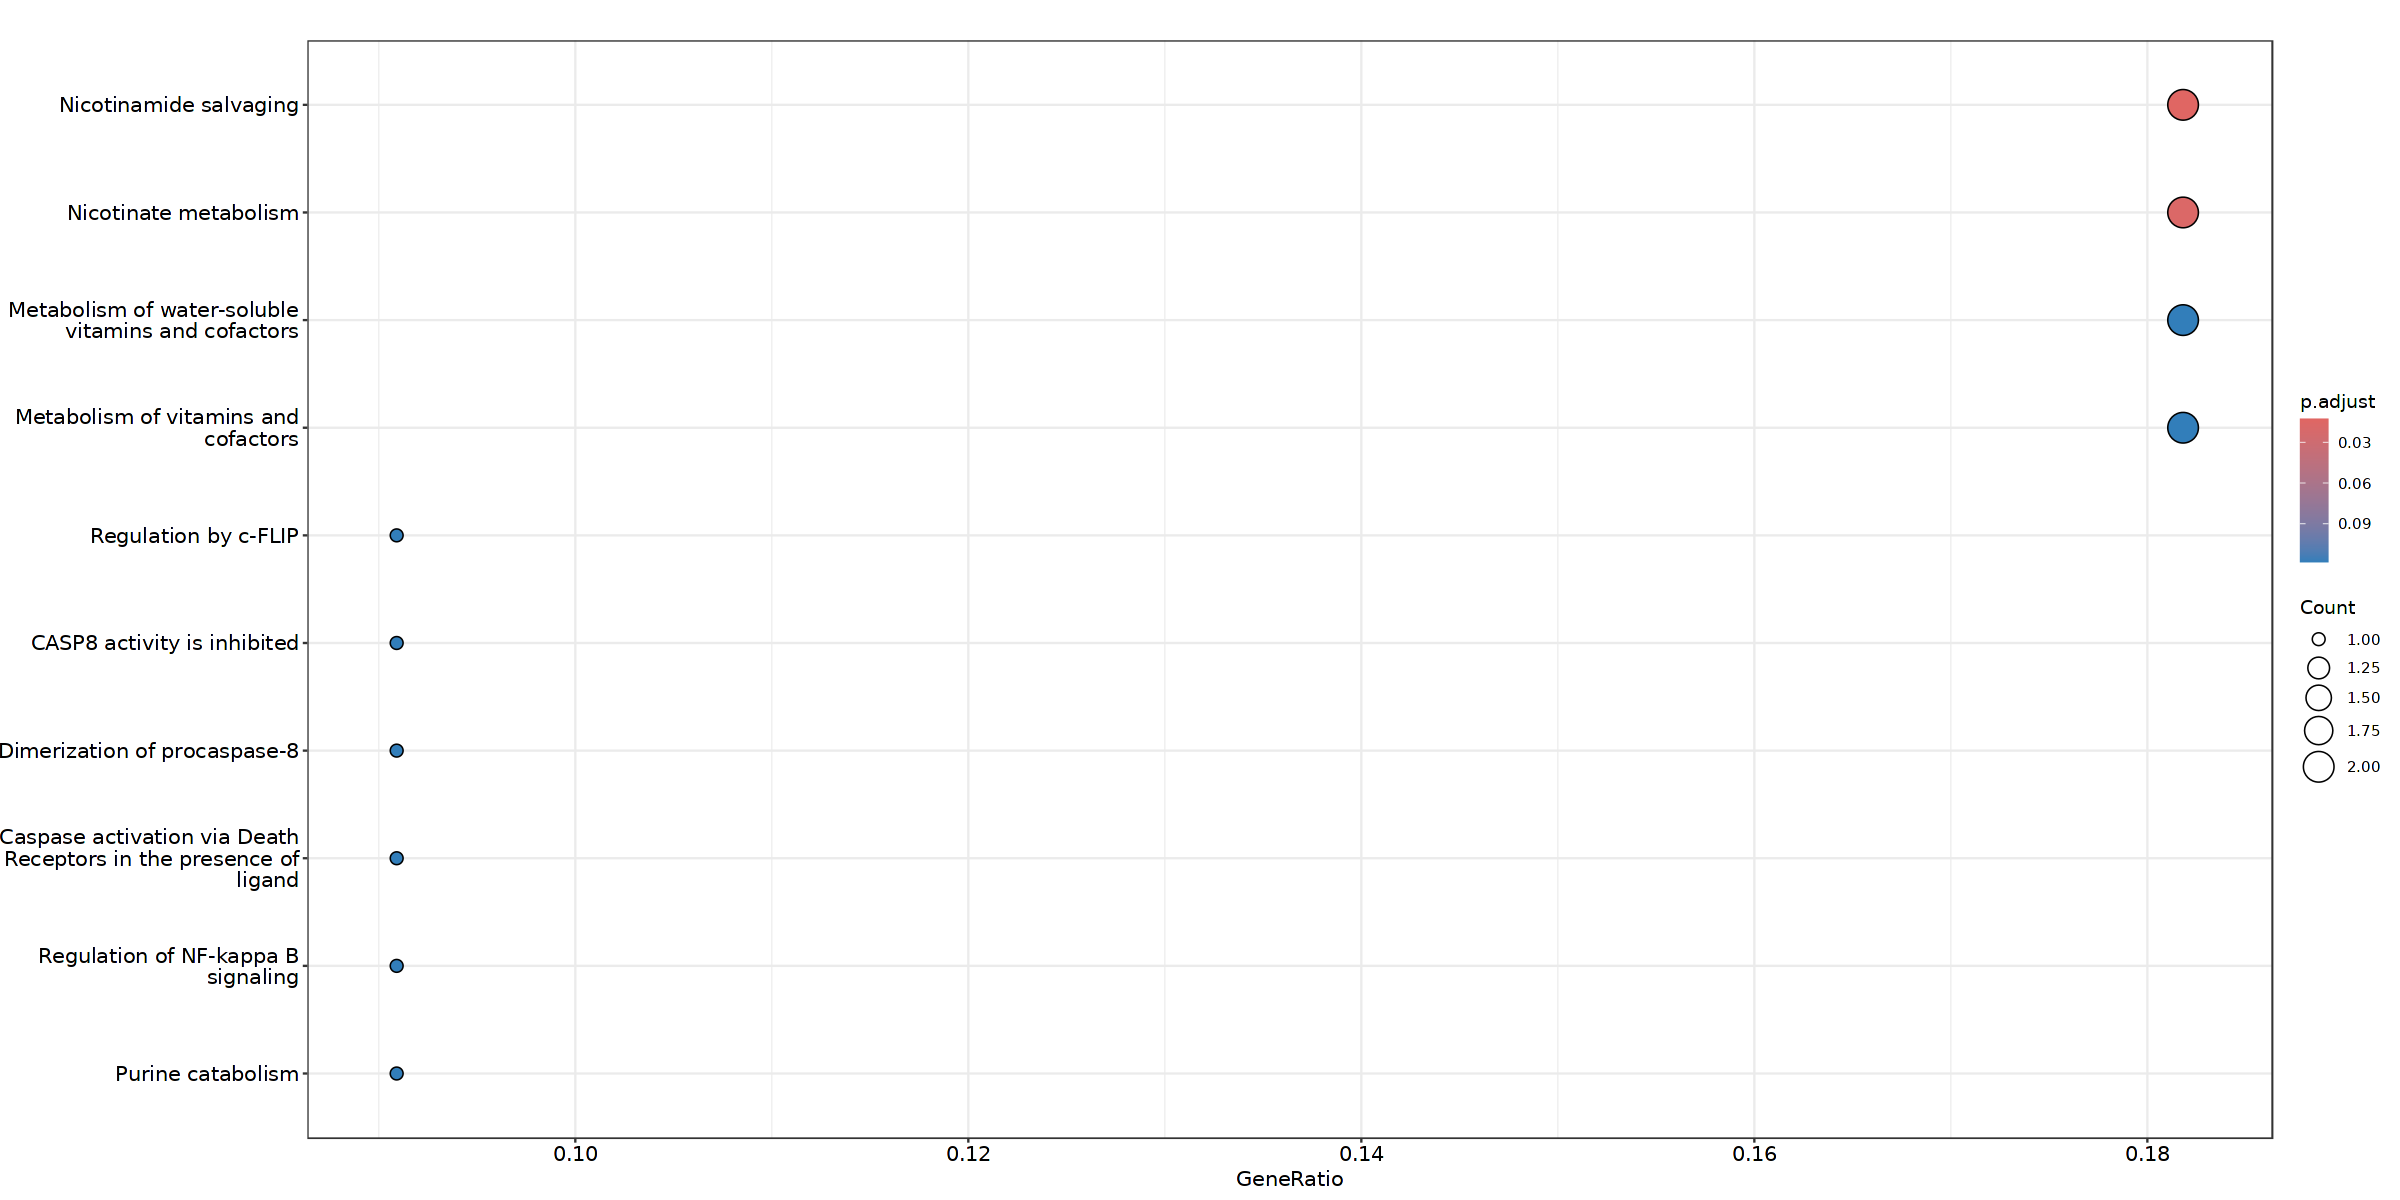

In [174]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [175]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


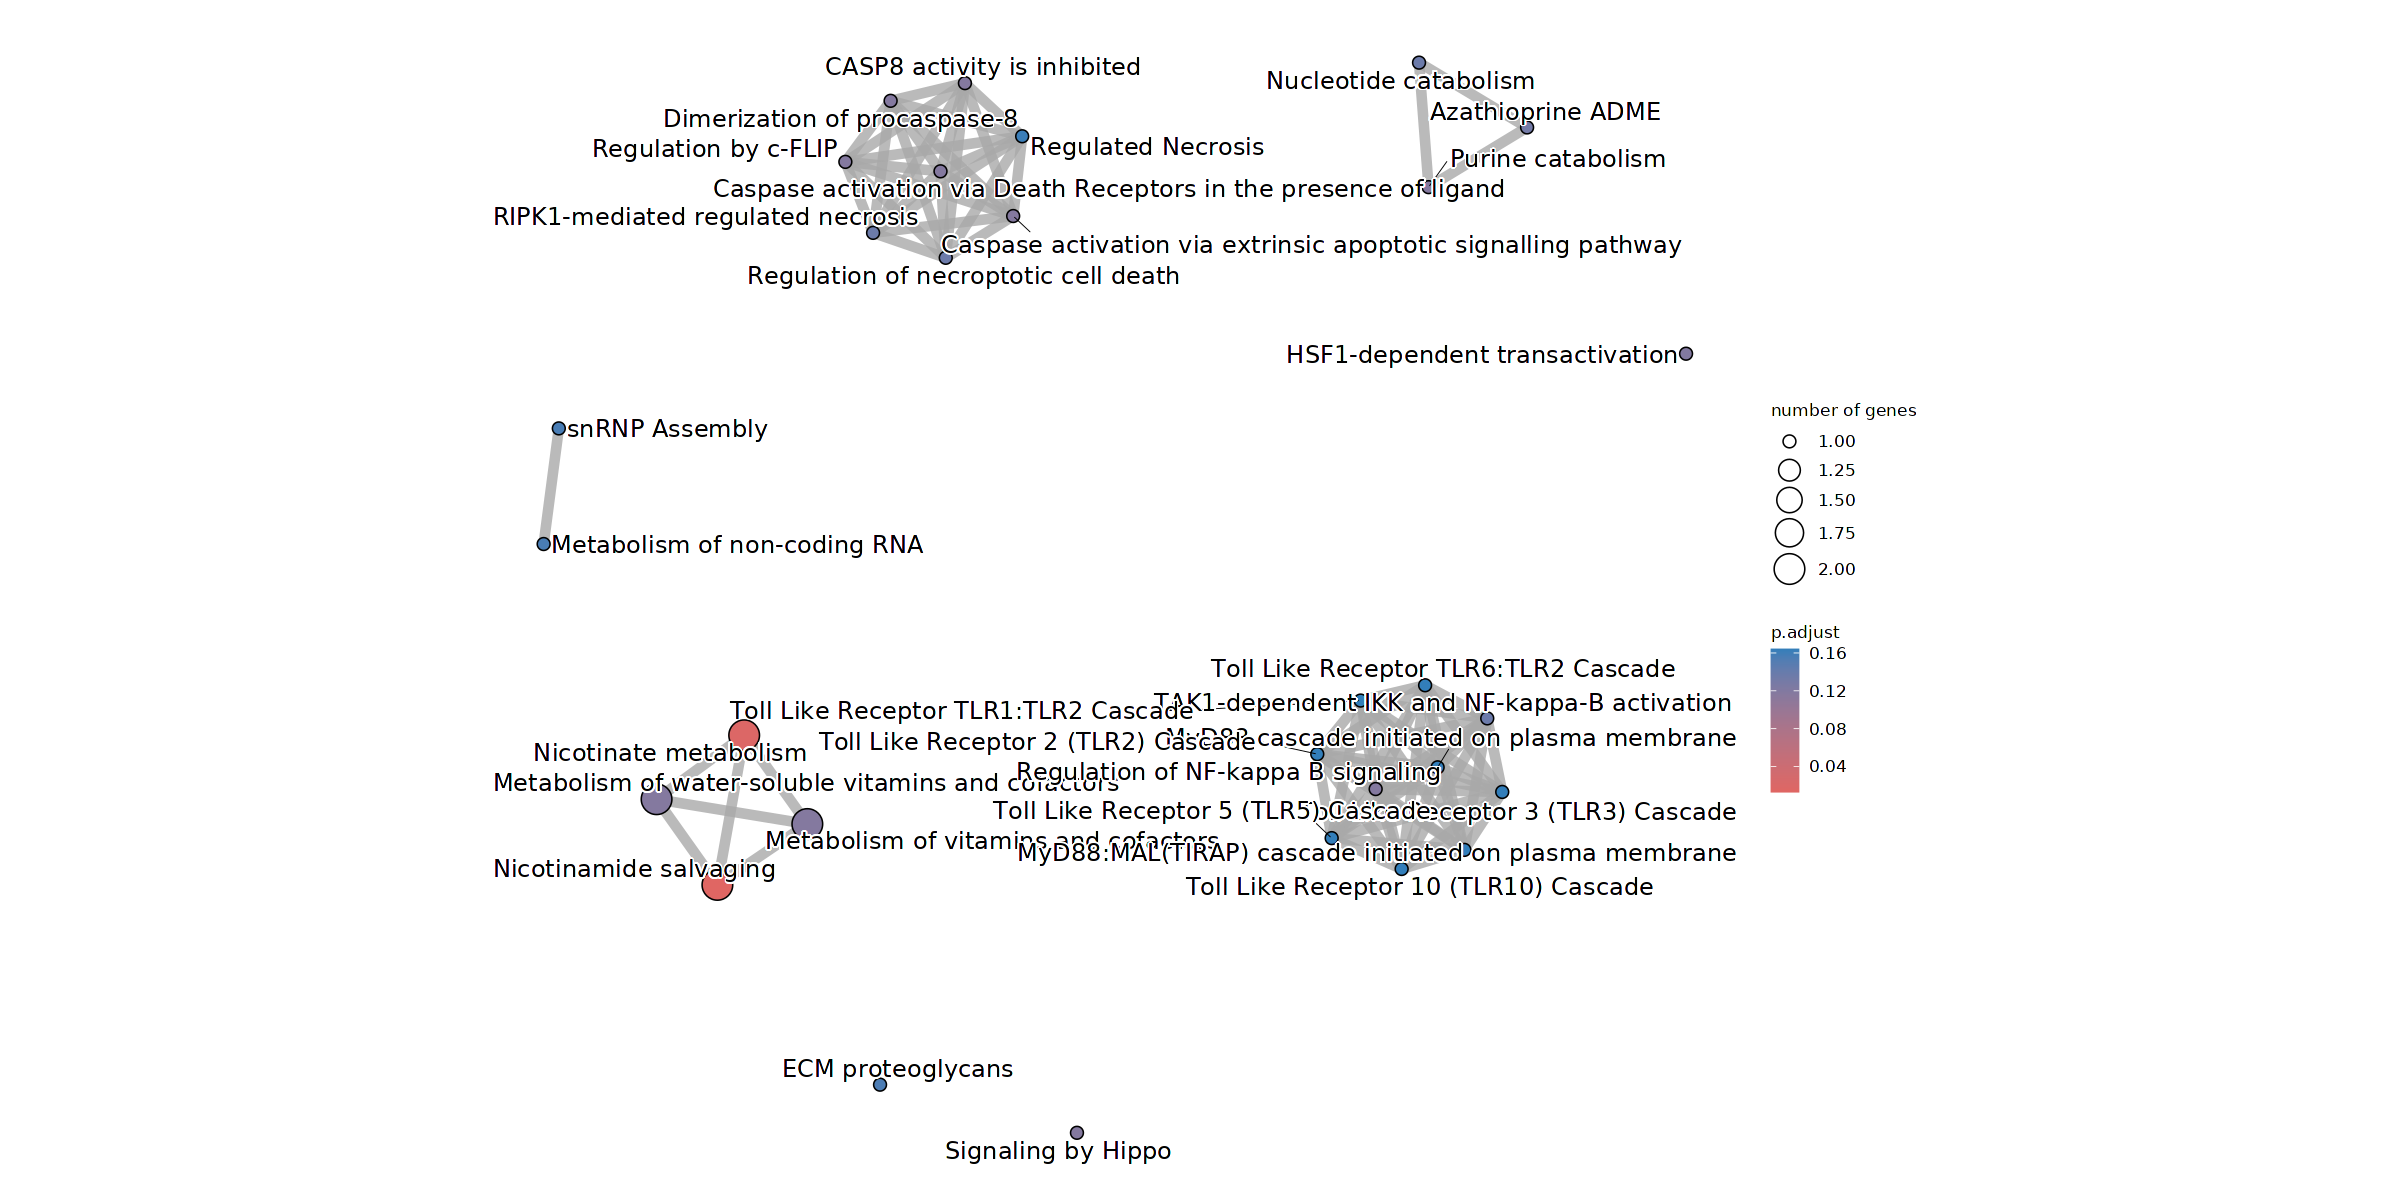

In [176]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Sub category 10

In [177]:
highest_cat <- "Late"
second_highest_cat <- "Ctrl"

In [178]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [179]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [180]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [181]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [182]:
length(gene_list)

[1] 5

In [183]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [184]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [185]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [186]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [187]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [188]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [189]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

--> No gene can be mapped....

--> Expected input gene ID: 56189,170718,101488143,14704,30924,66576

--> return NULL...



In [191]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

--> No gene can be mapped....

--> Expected input gene ID: 16694,66447,67876,116852,223917,114874

--> return NULL...



##### Sub category 11

In [193]:
highest_cat <- "Late"
second_highest_cat <- "Early"

In [194]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [195]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [196]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [197]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [198]:
length(gene_list)

[1] 0

##### Sub category 12

In [118]:
highest_cat <- "Late"
second_highest_cat <- "Peak"

In [119]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [120]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [121]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [122]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [123]:
length(gene_list)

[1] 19

In [124]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [125]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [126]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [127]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [128]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [129]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [130]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [131]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:19] "15446" "83398" "667742" "20666" "57257" "16777" "75426" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...0 enriched terms found
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


In [132]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [133]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:19] "15446" "83398" "667742" "20666" "57257" "16777" "75426" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...48 enriched terms found
'data.frame':	48 obs. of  9 variables:
 $ ID         : chr  "R-MMU-9018677" "R-MMU-9018678" "R-MMU-71387" "R-MMU-5669034" ...
 $ Description: chr  "Biosynthesis of DHA-derived SPMs" "Biosynthesis of specialized proresolving mediators (SPMs)" "Metabolism of carbohydrates" "TNFs bind their physiological receptors" ...
 $ GeneRatio  : chr  "1/7" "1/7" "2/7" "1/7" ...
 $ BgRatio    : chr  "17/8582" "18/8582" "263/8582" "25/8582" ...
 $ pvalue     : num  0.0138 0.0146 0.0177 0.0202 0.021 ...
 $ p.adjust   : num  0.11 0.11 0.11 0.11 0.11 ...
 $ qvalue     : num  0.0673 0.0673 0.0673 0.0673 0.0673 ...
 $ geneID     : chr  "Hpgd" "Hpgd" "Ndst3/Pfkfb4" "Tnfrsf1b" ...
 $ Count      : int  1 1 2 1 1 1 1 1 1 1 ...
#...Citation
  Guangchuan

In [134]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL56_",highest_cat,"_",second_highest_cat,".csv"), row.names=FALSE)

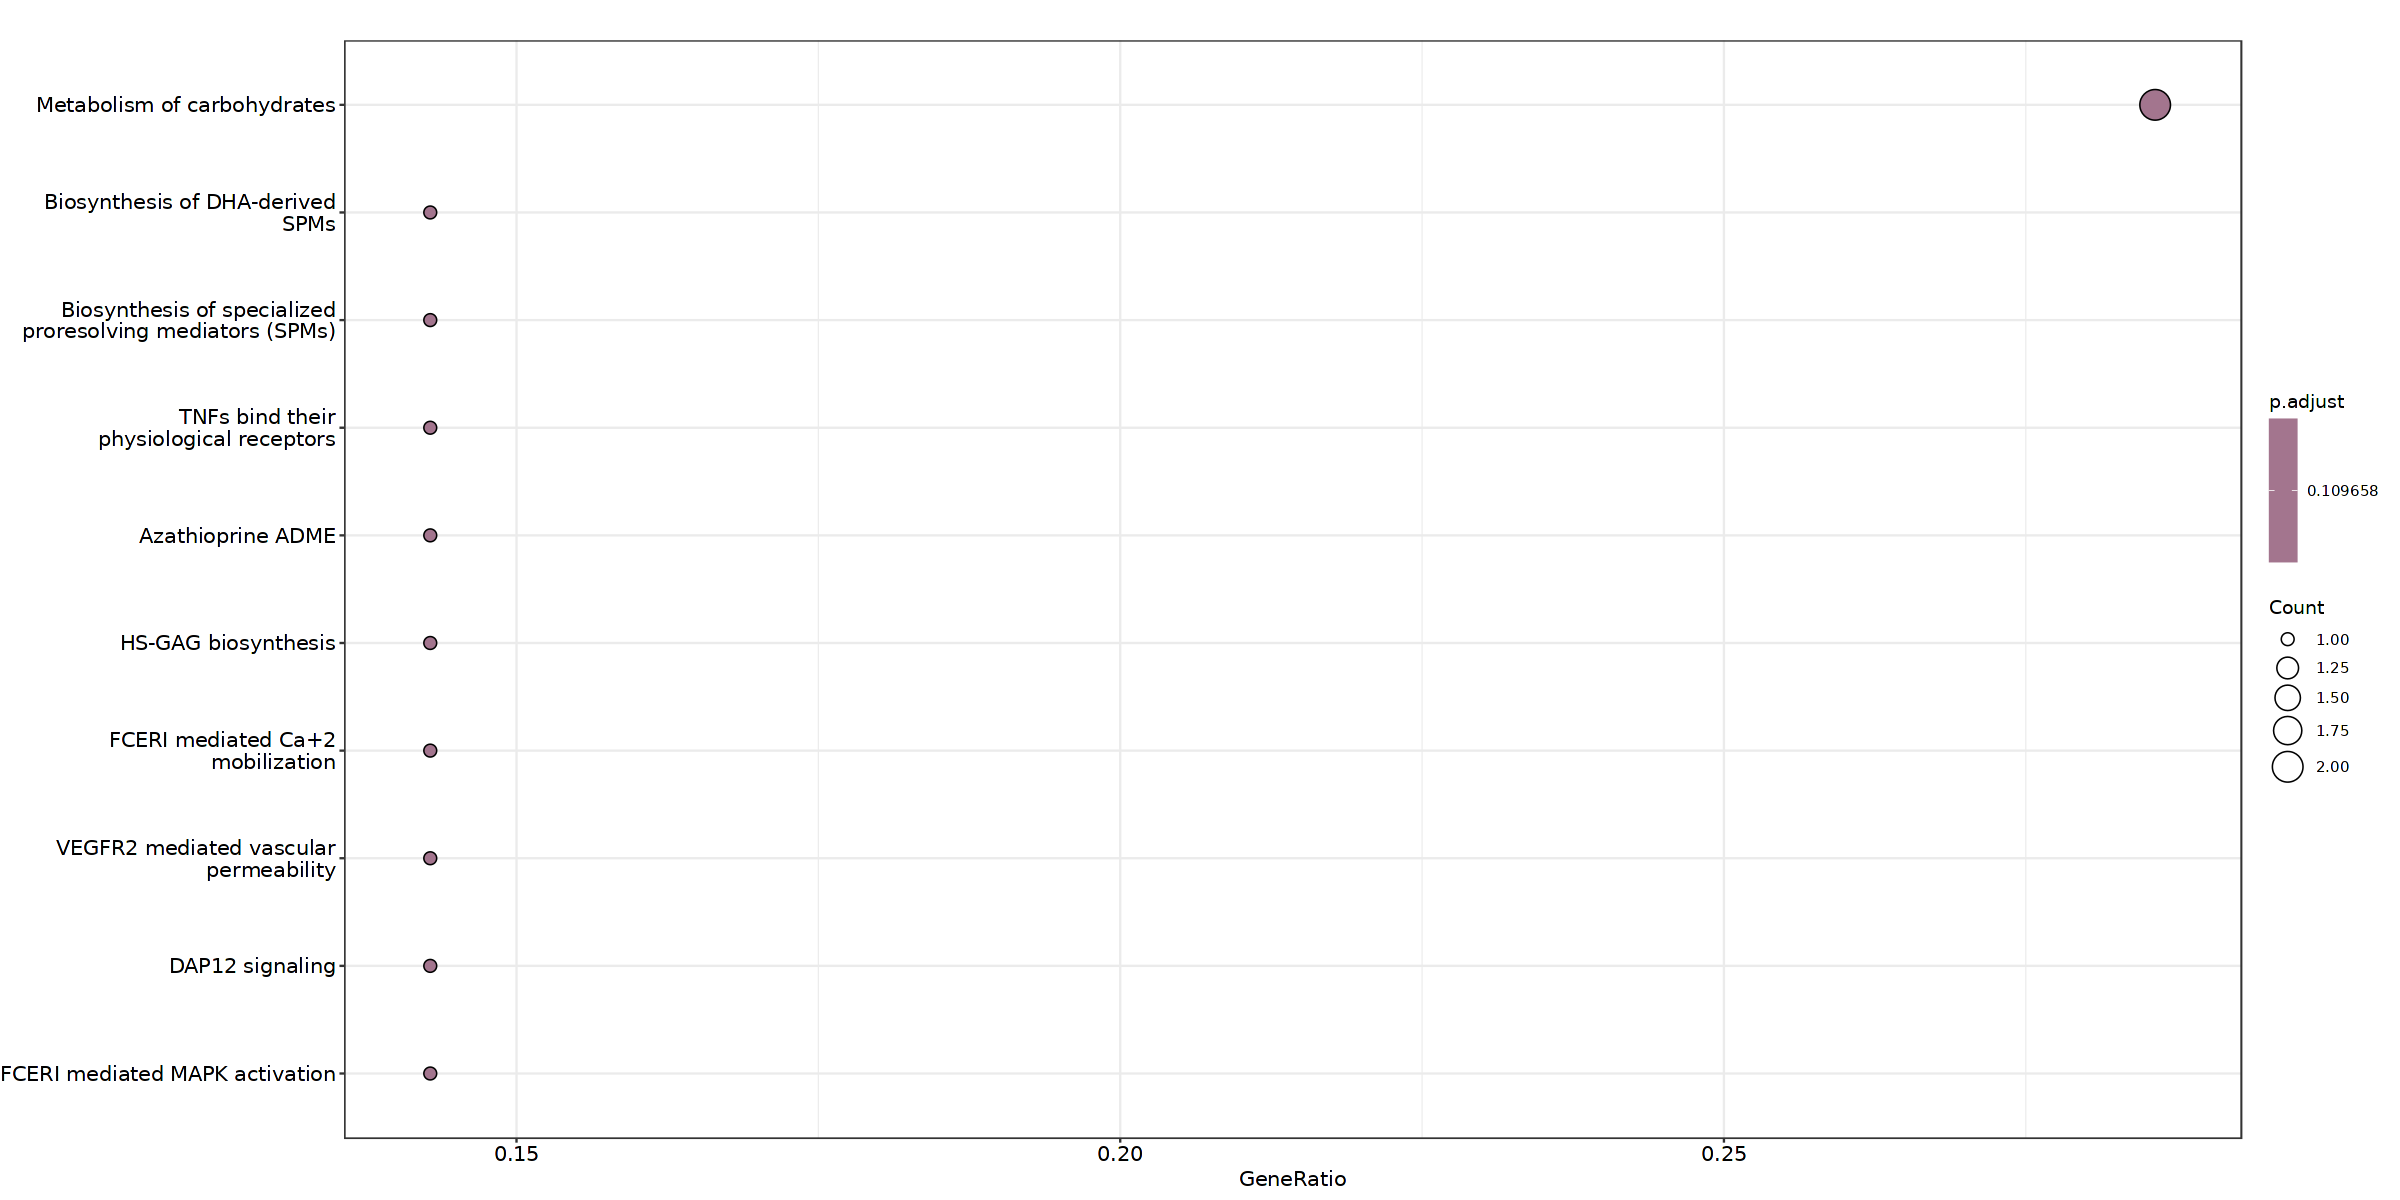

In [215]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [216]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

Warning message:
"ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


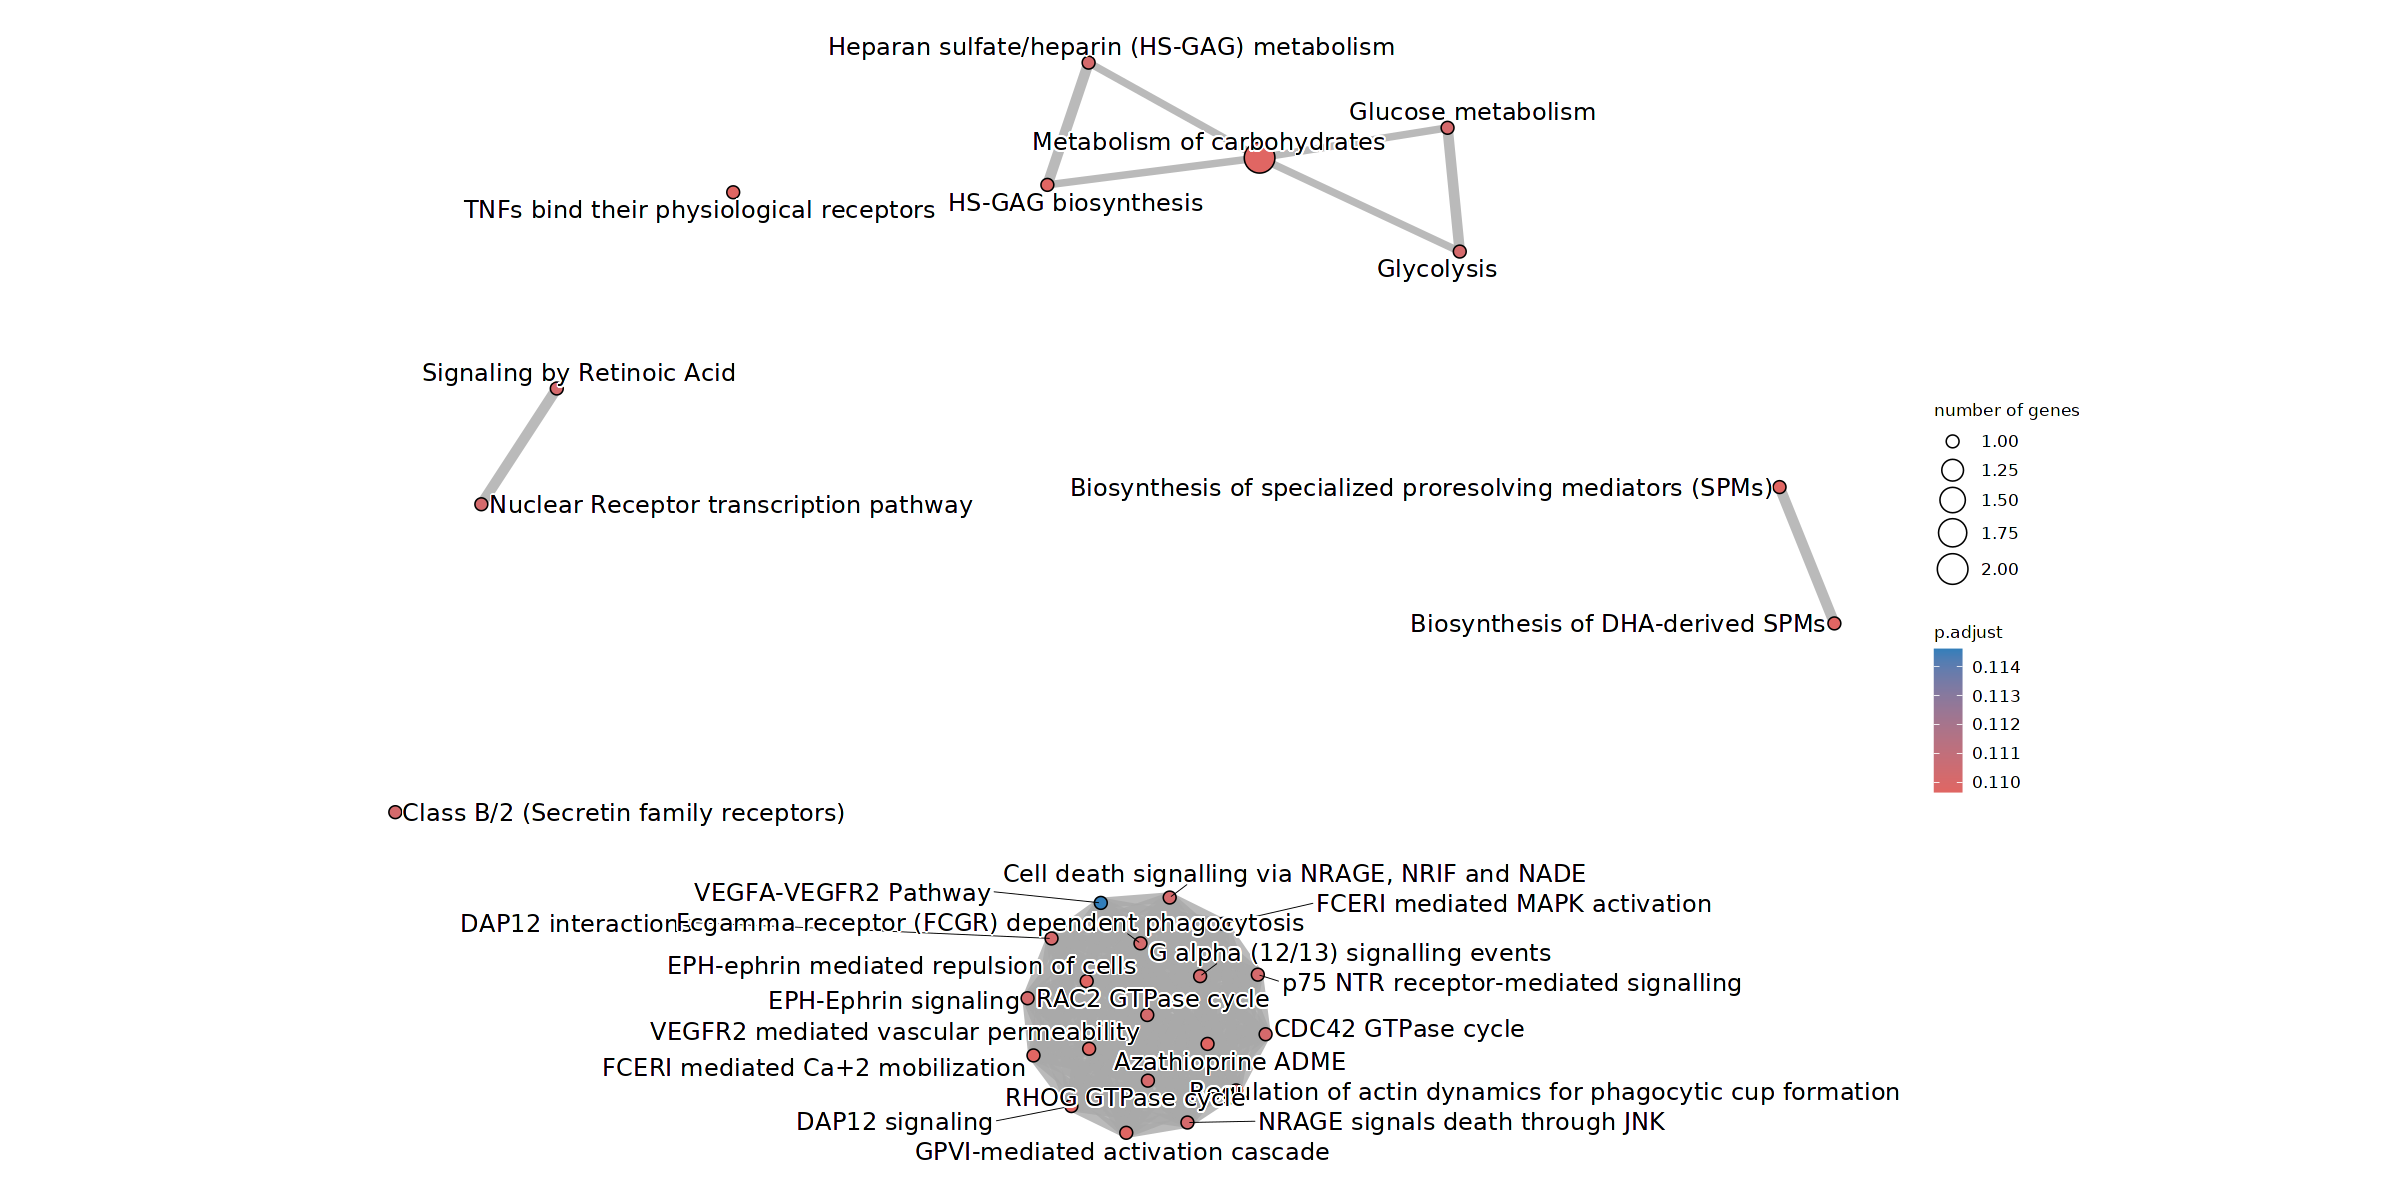

In [217]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

#### 3.2.2 MOL2

In [135]:
df_dynamics <- readRDS(paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_MOL2.rds"))

In [136]:
df_dynamics_scaled <- df_dynamics/do.call(pmax, df_dynamics)

##### Category 1

In [220]:
highest_cat <- "Ctrl"

In [221]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [222]:
length(gene_list)

[1] 0

##### Category 2

In [223]:
highest_cat <- "Early"

In [224]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [225]:
length(gene_list)

[1] 0

##### Category 3

In [137]:
highest_cat <- "Peak"

In [138]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [139]:
length(gene_list)

[1] 124

In [140]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [141]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [142]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [143]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [144]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [145]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [146]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [147]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:49] "17069" "76681" "100039796" "15953" "15944" "245240" "234311" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...0 enriched terms found
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


In [148]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [149]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:49] "17069" "76681" "100039796" "15953" "15944" "245240" "234311" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...118 enriched terms found
'data.frame':	118 obs. of  9 variables:
 $ ID         : chr  "R-MMU-197264" "R-MMU-196807" "R-MMU-3371378" "R-MMU-5218900" ...
 $ Description: chr  "Nicotinamide salvaging" "Nicotinate metabolism" "Regulation by c-FLIP" "CASP8 activity is inhibited" ...
 $ GeneRatio  : chr  "2/22" "2/22" "1/22" "1/22" ...
 $ BgRatio    : chr  "18/8582" "30/8582" "10/8582" "10/8582" ...
 $ pvalue     : num  0.000936 0.002613 0.025354 0.025354 0.025354 ...
 $ p.adjust   : num  0.11 0.154 0.299 0.299 0.299 ...
 $ qvalue     : num  0.0995 0.1389 0.2694 0.2694 0.2694 ...
 $ geneID     : chr  "Parp9/Parp14" "Parp9/Parp14" "Fas" "Fas" ...
 $ Count      : int  2 2 1 1 1 1 1 1 2 1 ...
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bio

In [150]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL2_",highest_cat,".csv"), row.names=FALSE)

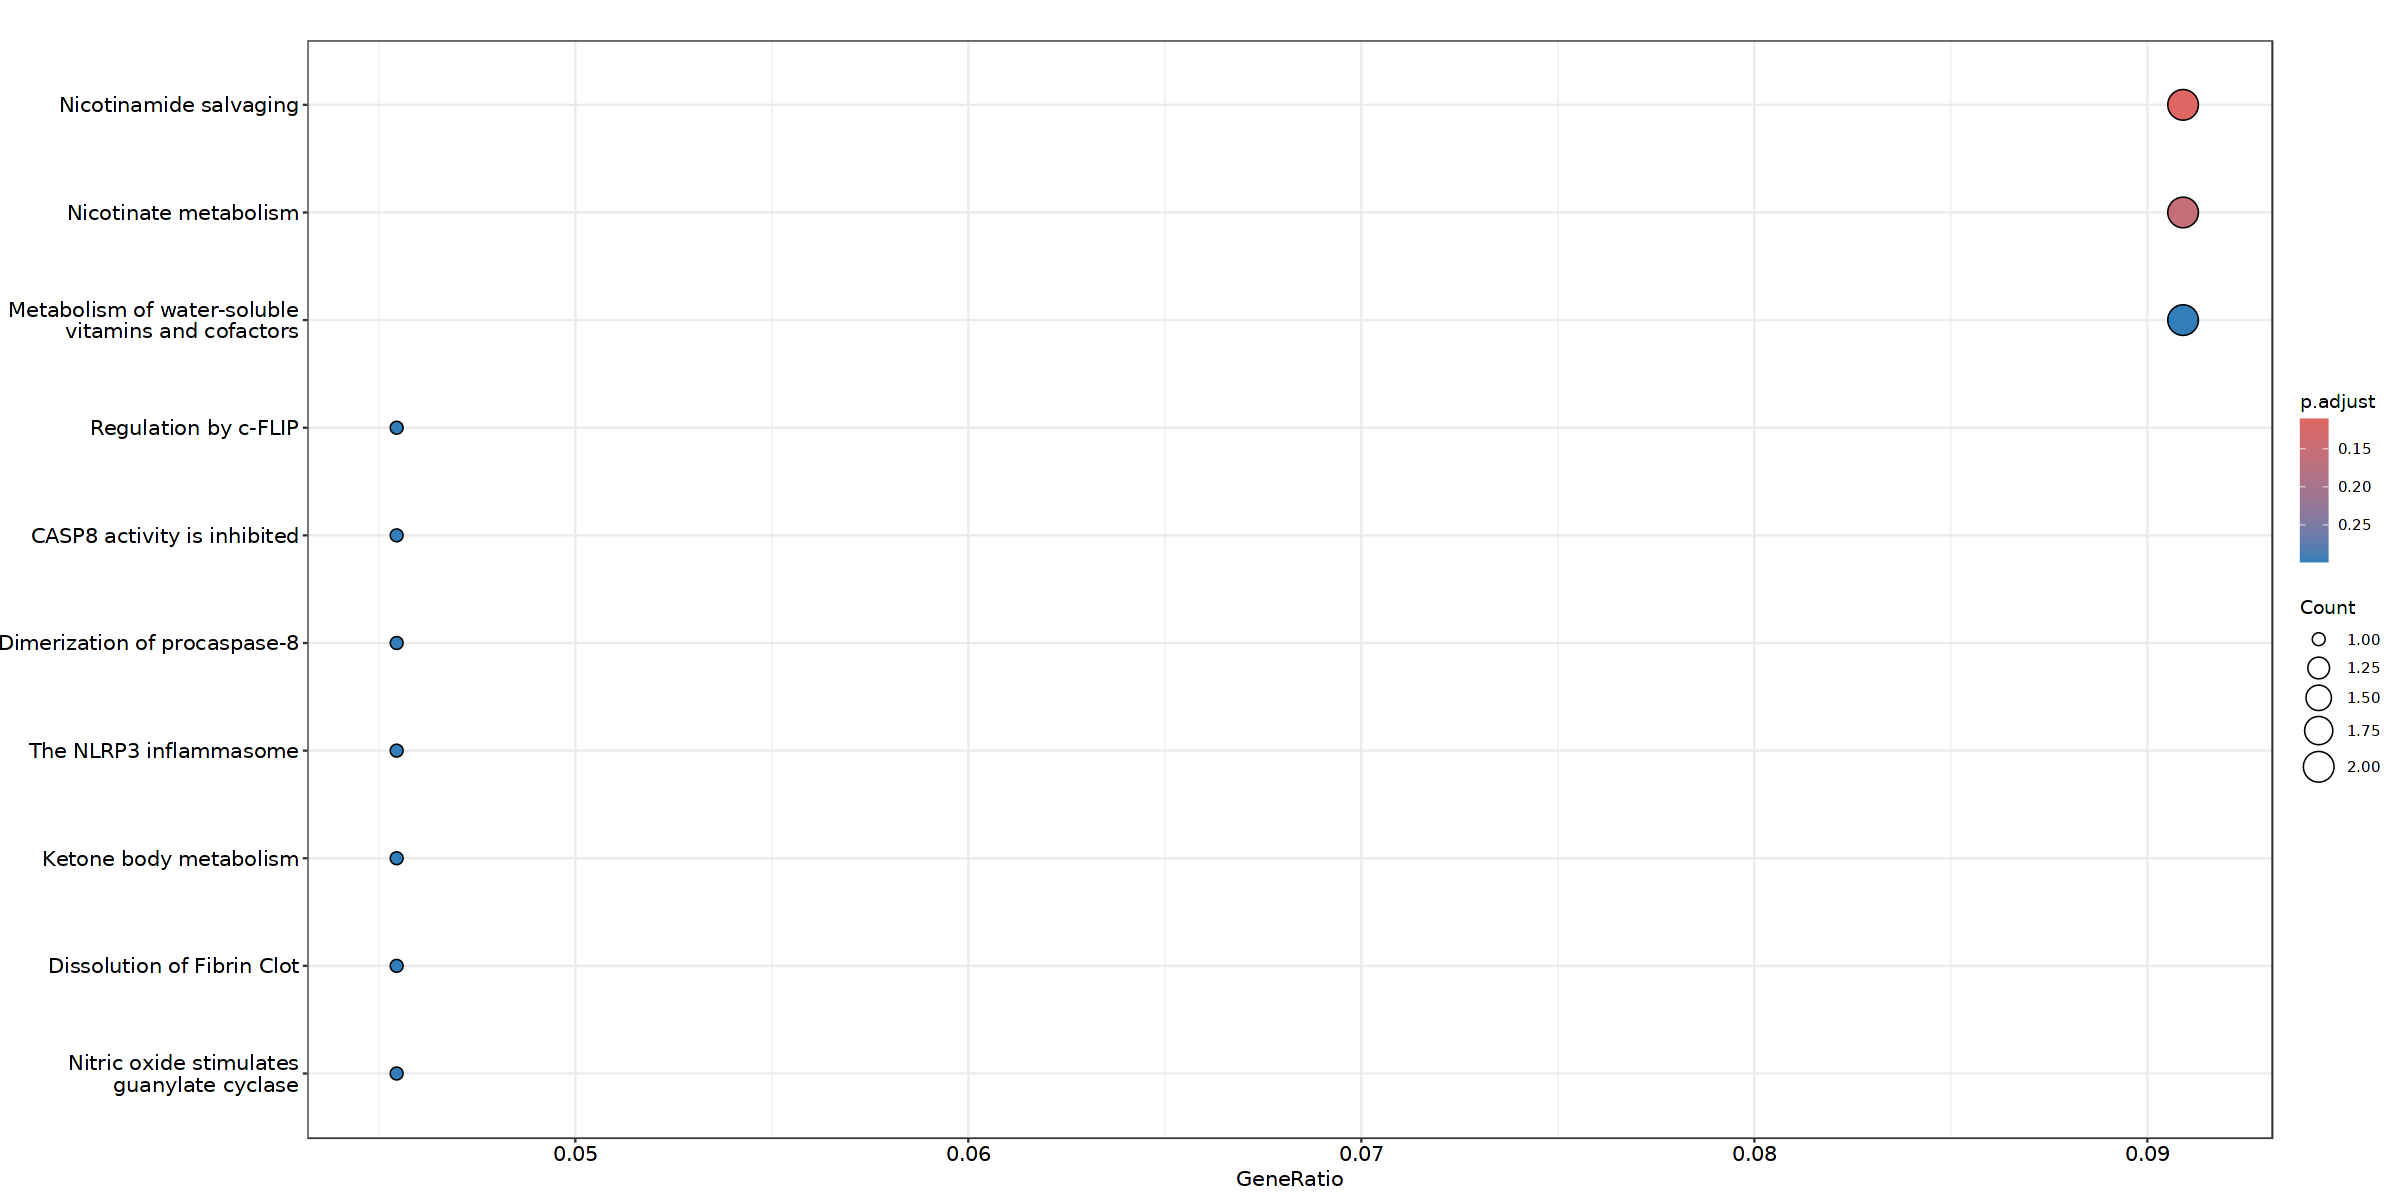

In [239]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [240]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

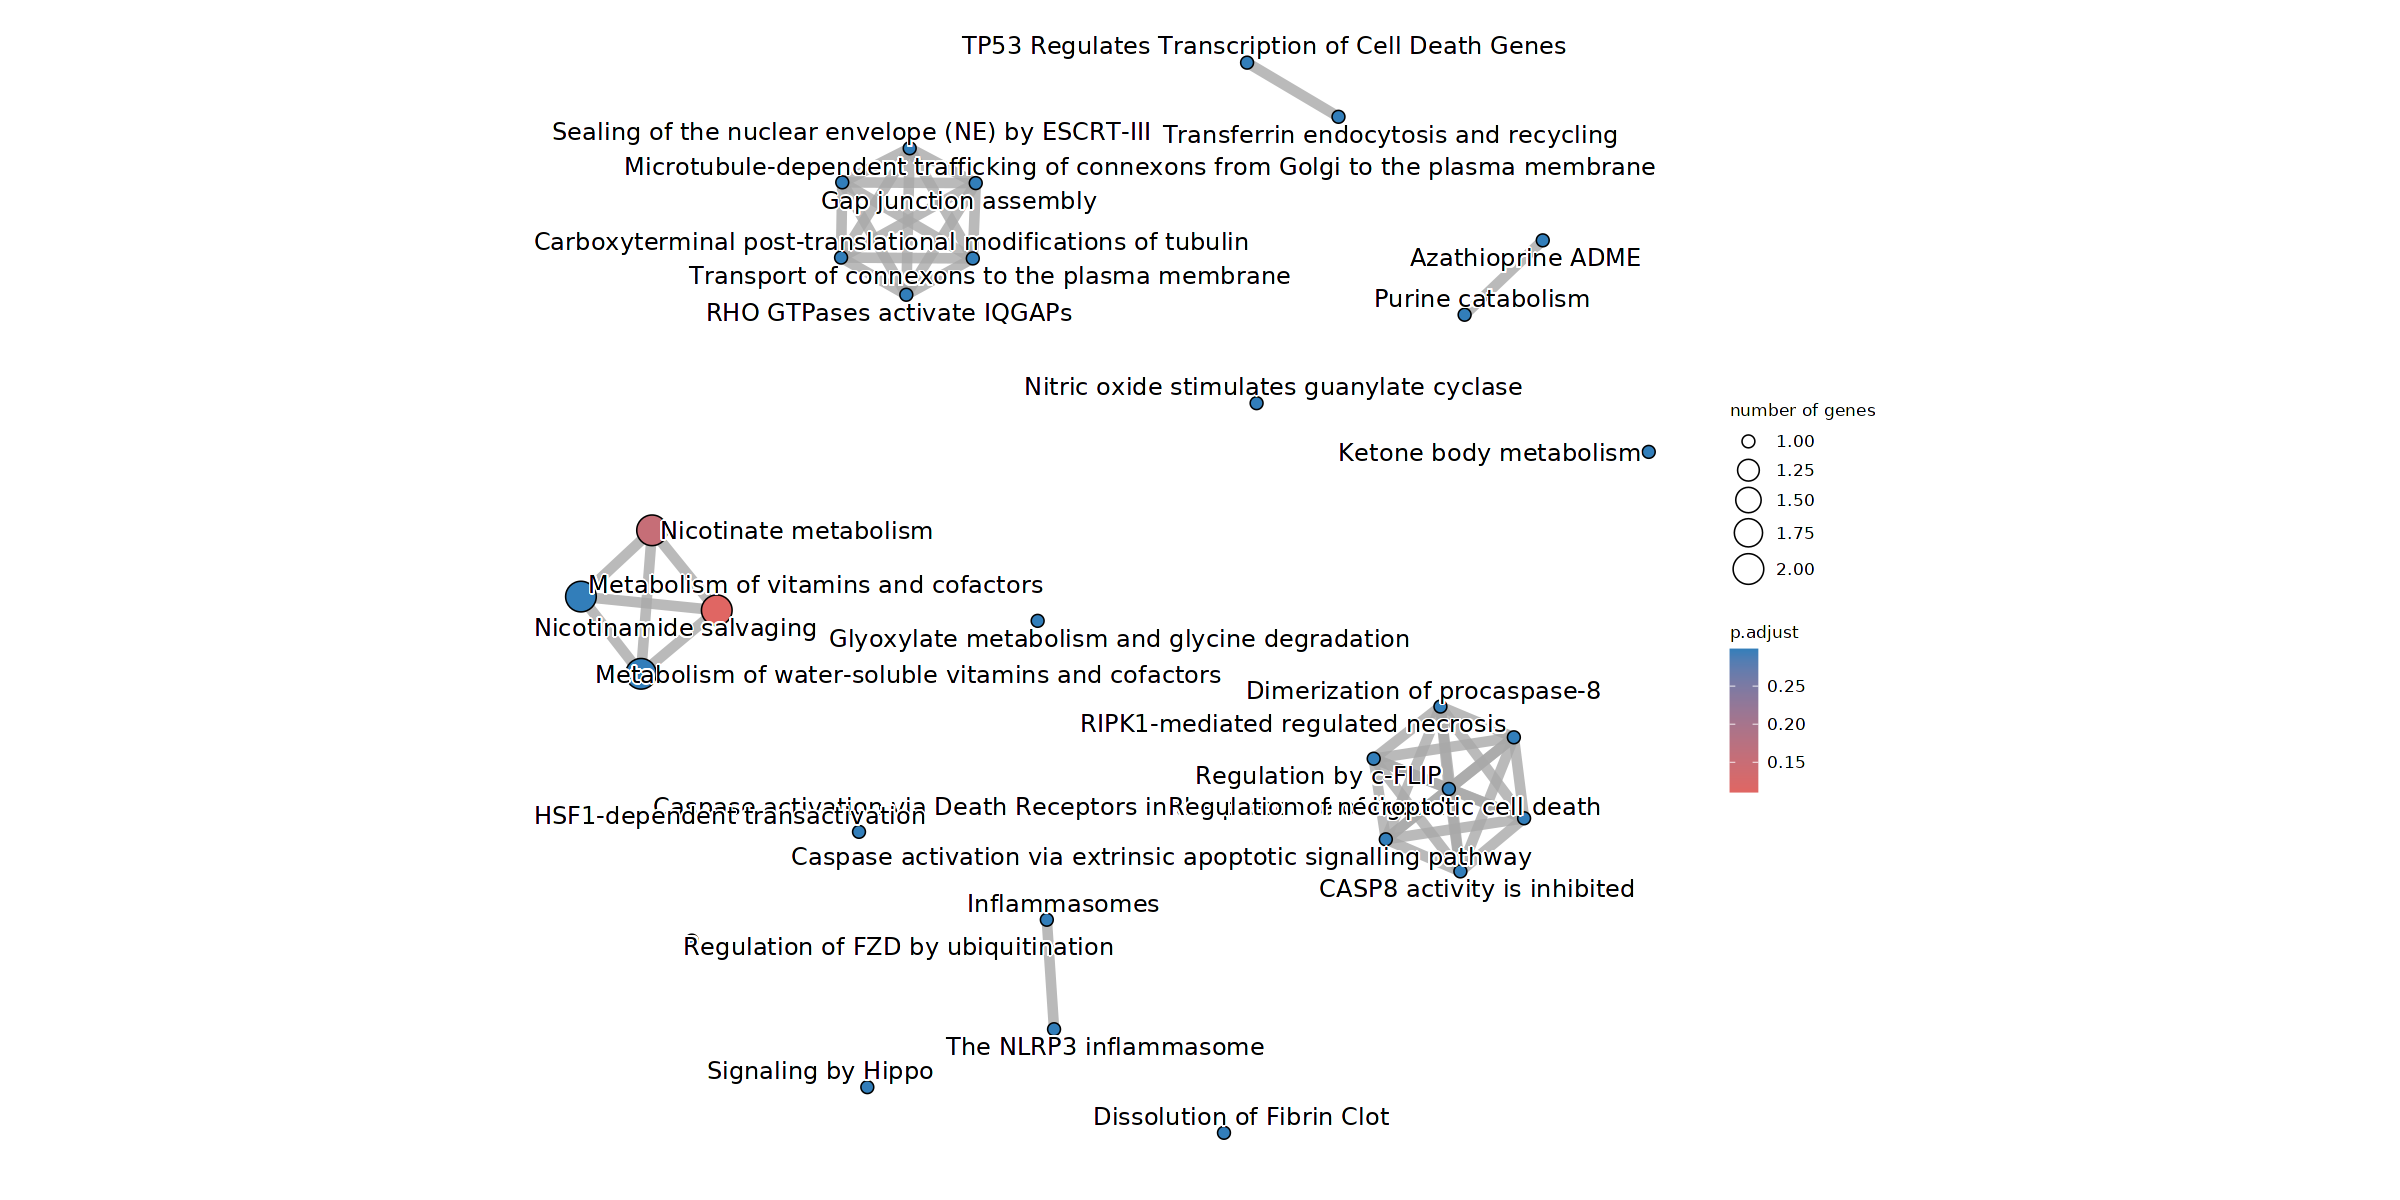

In [241]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Category 4

In [242]:
highest_cat <- "Late"

In [243]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [244]:
length(gene_list)

[1] 0

##### Sub category 1

In [245]:
highest_cat <- "Ctrl"
second_highest_cat <- "Early"

In [246]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [247]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [248]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [249]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [250]:
length(gene_list)

[1] 0

##### Sub category 2

In [251]:
highest_cat <- "Ctrl"
second_highest_cat <- "Peak"

In [252]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [253]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [254]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [255]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [256]:
length(gene_list)

[1] 0

##### Sub category 3

In [257]:
highest_cat <- "Ctrl"
second_highest_cat <- "Late"

In [258]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [259]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [260]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [261]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [262]:
length(gene_list)

[1] 0

##### Sub category 4

In [263]:
highest_cat <- "Early"
second_highest_cat <- "Ctrl"

In [264]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [265]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [266]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [267]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [268]:
length(gene_list)

[1] 0

##### Sub category 5

In [269]:
highest_cat <- "Early"
second_highest_cat <- "Peak"

In [270]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [271]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [272]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [273]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [274]:
length(gene_list)

[1] 0

##### Sub category 6

In [275]:
highest_cat <- "Early"
second_highest_cat <- "Late"

In [276]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [277]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [278]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [279]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [280]:
length(gene_list)

[1] 0

##### Sub category 7

In [281]:
highest_cat <- "Peak"
second_highest_cat <- "Ctrl"

In [282]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [283]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [284]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [285]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [286]:
length(gene_list)

[1] 0

##### Sub category 8

In [151]:
highest_cat <- "Peak"
second_highest_cat <- "Early"

In [152]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [153]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [154]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [155]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [156]:
length(gene_list)

[1] 16

In [157]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [158]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [159]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [160]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [161]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [162]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [163]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [164]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:16] "72258" "12661" "224860" "114301" "16372" "60361" "66607" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...5 enriched terms found
'data.frame':	5 obs. of  9 variables:
 $ ID         : chr  "R-MMU-1296346" "R-MMU-5576886" "R-MMU-181429" "R-MMU-112316" ...
 $ Description: chr  "Tandem pore domain potassium channels" "Phase 4 - resting membrane potential" "Serotonin Neurotransmitter Release Cycle" "Neuronal System" ...
 $ GeneRatio  : chr  "1/5" "1/5" "1/5" "2/5" ...
 $ BgRatio    : chr  "11/8582" "17/8582" "18/8582" "323/8582" ...
 $ pvalue     : num  0.00639 0.00987 0.01045 0.0131 0.01333
 $ p.adjust   : num  0.0453 0.0453 0.0453 0.0453 0.0453
 $ qvalue     : num  0.0225 0.0225 0.0225 0.0225 0.0225
 $ geneID     : chr  "Kcnk10" "Kcnk10" "Syn2" "Kcnk10/Syn2" ...
 $ Count      : int  1 1 1 2 1
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bi

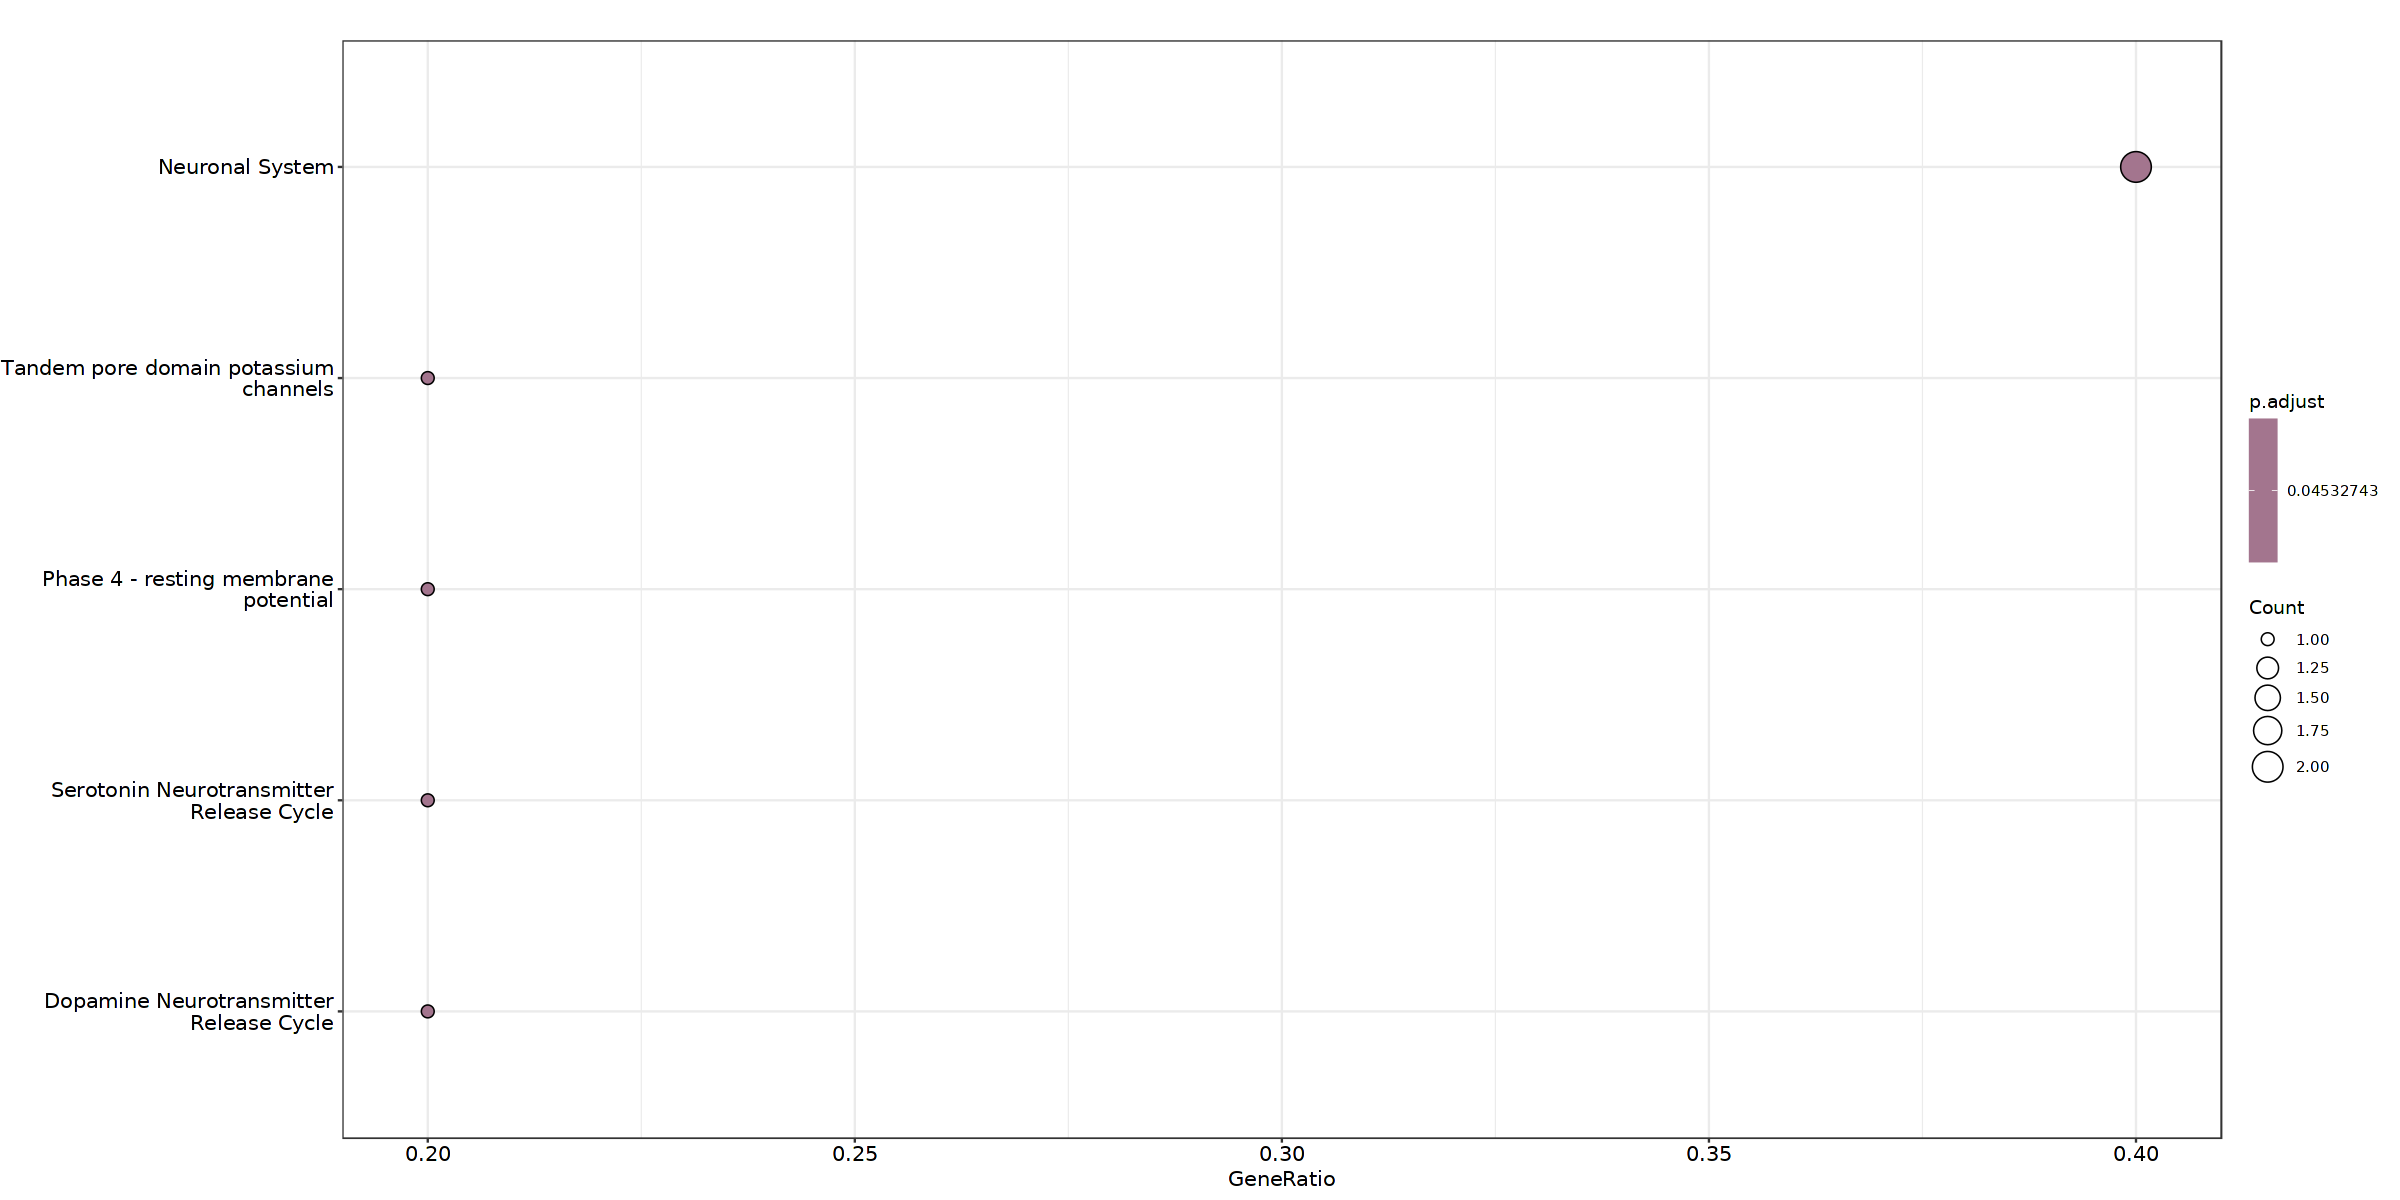

In [165]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [166]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

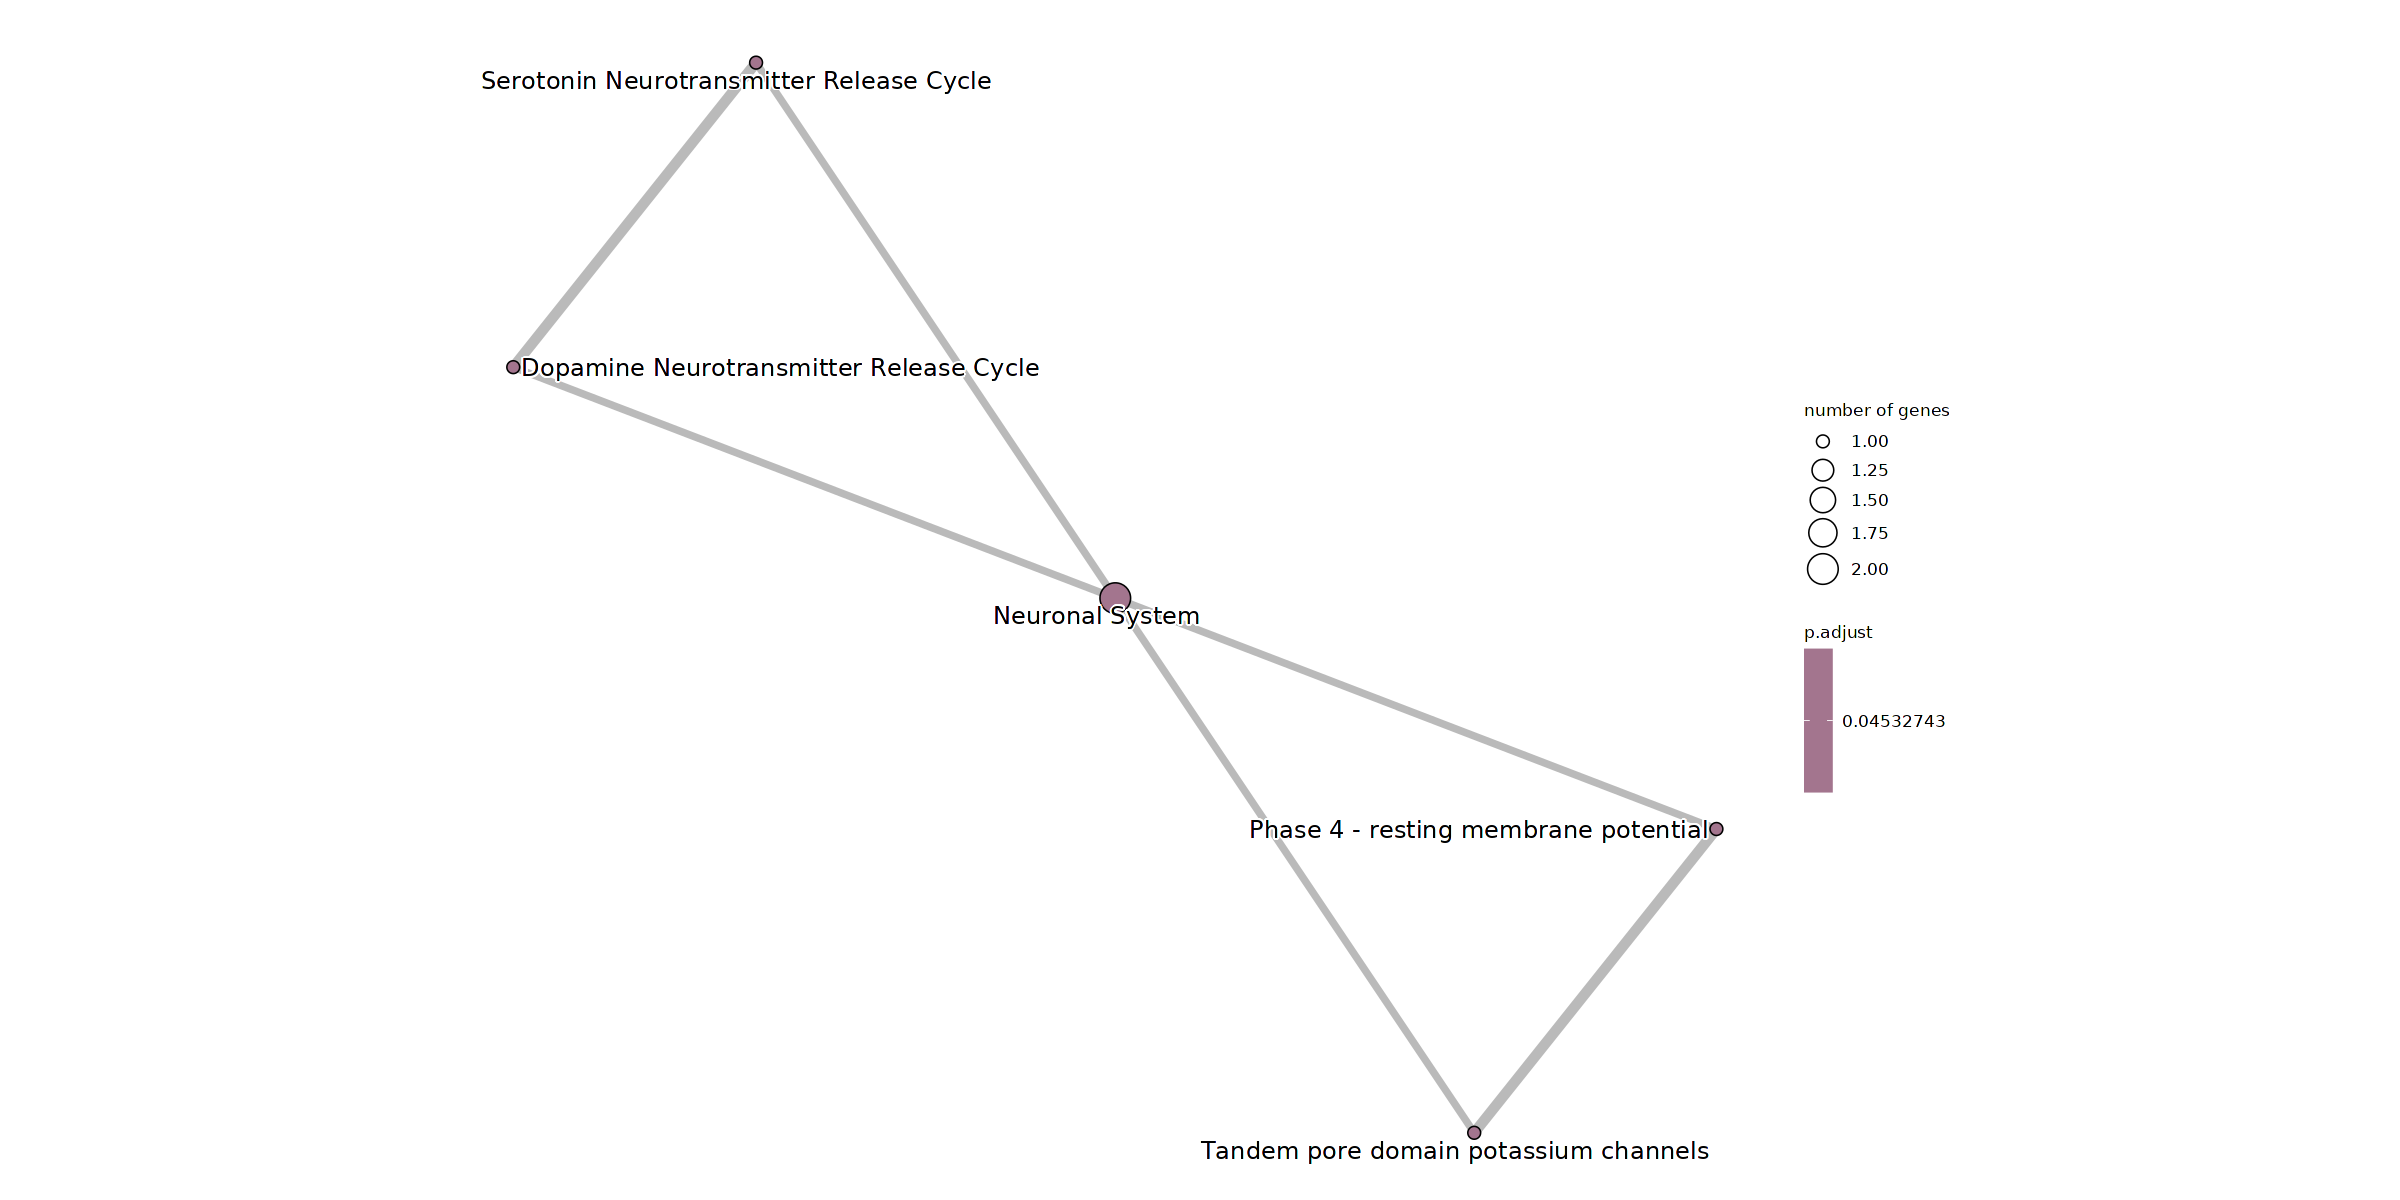

In [167]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

In [168]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [169]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:16] "72258" "12661" "224860" "114301" "16372" "60361" "66607" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...17 enriched terms found
'data.frame':	17 obs. of  9 variables:
 $ ID         : chr  "R-MMU-1296346" "R-MMU-5576886" "R-MMU-181429" "R-MMU-112316" ...
 $ Description: chr  "Tandem pore domain potassium channels" "Phase 4 - resting membrane potential" "Serotonin Neurotransmitter Release Cycle" "Neuronal System" ...
 $ GeneRatio  : chr  "1/5" "1/5" "1/5" "2/5" ...
 $ BgRatio    : chr  "11/8582" "17/8582" "18/8582" "323/8582" ...
 $ pvalue     : num  0.00639 0.00987 0.01045 0.0131 0.01333 ...
 $ p.adjust   : num  0.0453 0.0453 0.0453 0.0453 0.0453 ...
 $ qvalue     : num  0.0225 0.0225 0.0225 0.0225 0.0225 ...
 $ geneID     : chr  "Kcnk10" "Kcnk10" "Syn2" "Kcnk10/Syn2" ...
 $ Count      : int  1 1 1 2 1 1 1 1 1 1 ...
#...Citation
  Guangchuang Yu, Qing-Y

In [170]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL2_",highest_cat,"_",second_highest_cat,".csv"), row.names=FALSE)

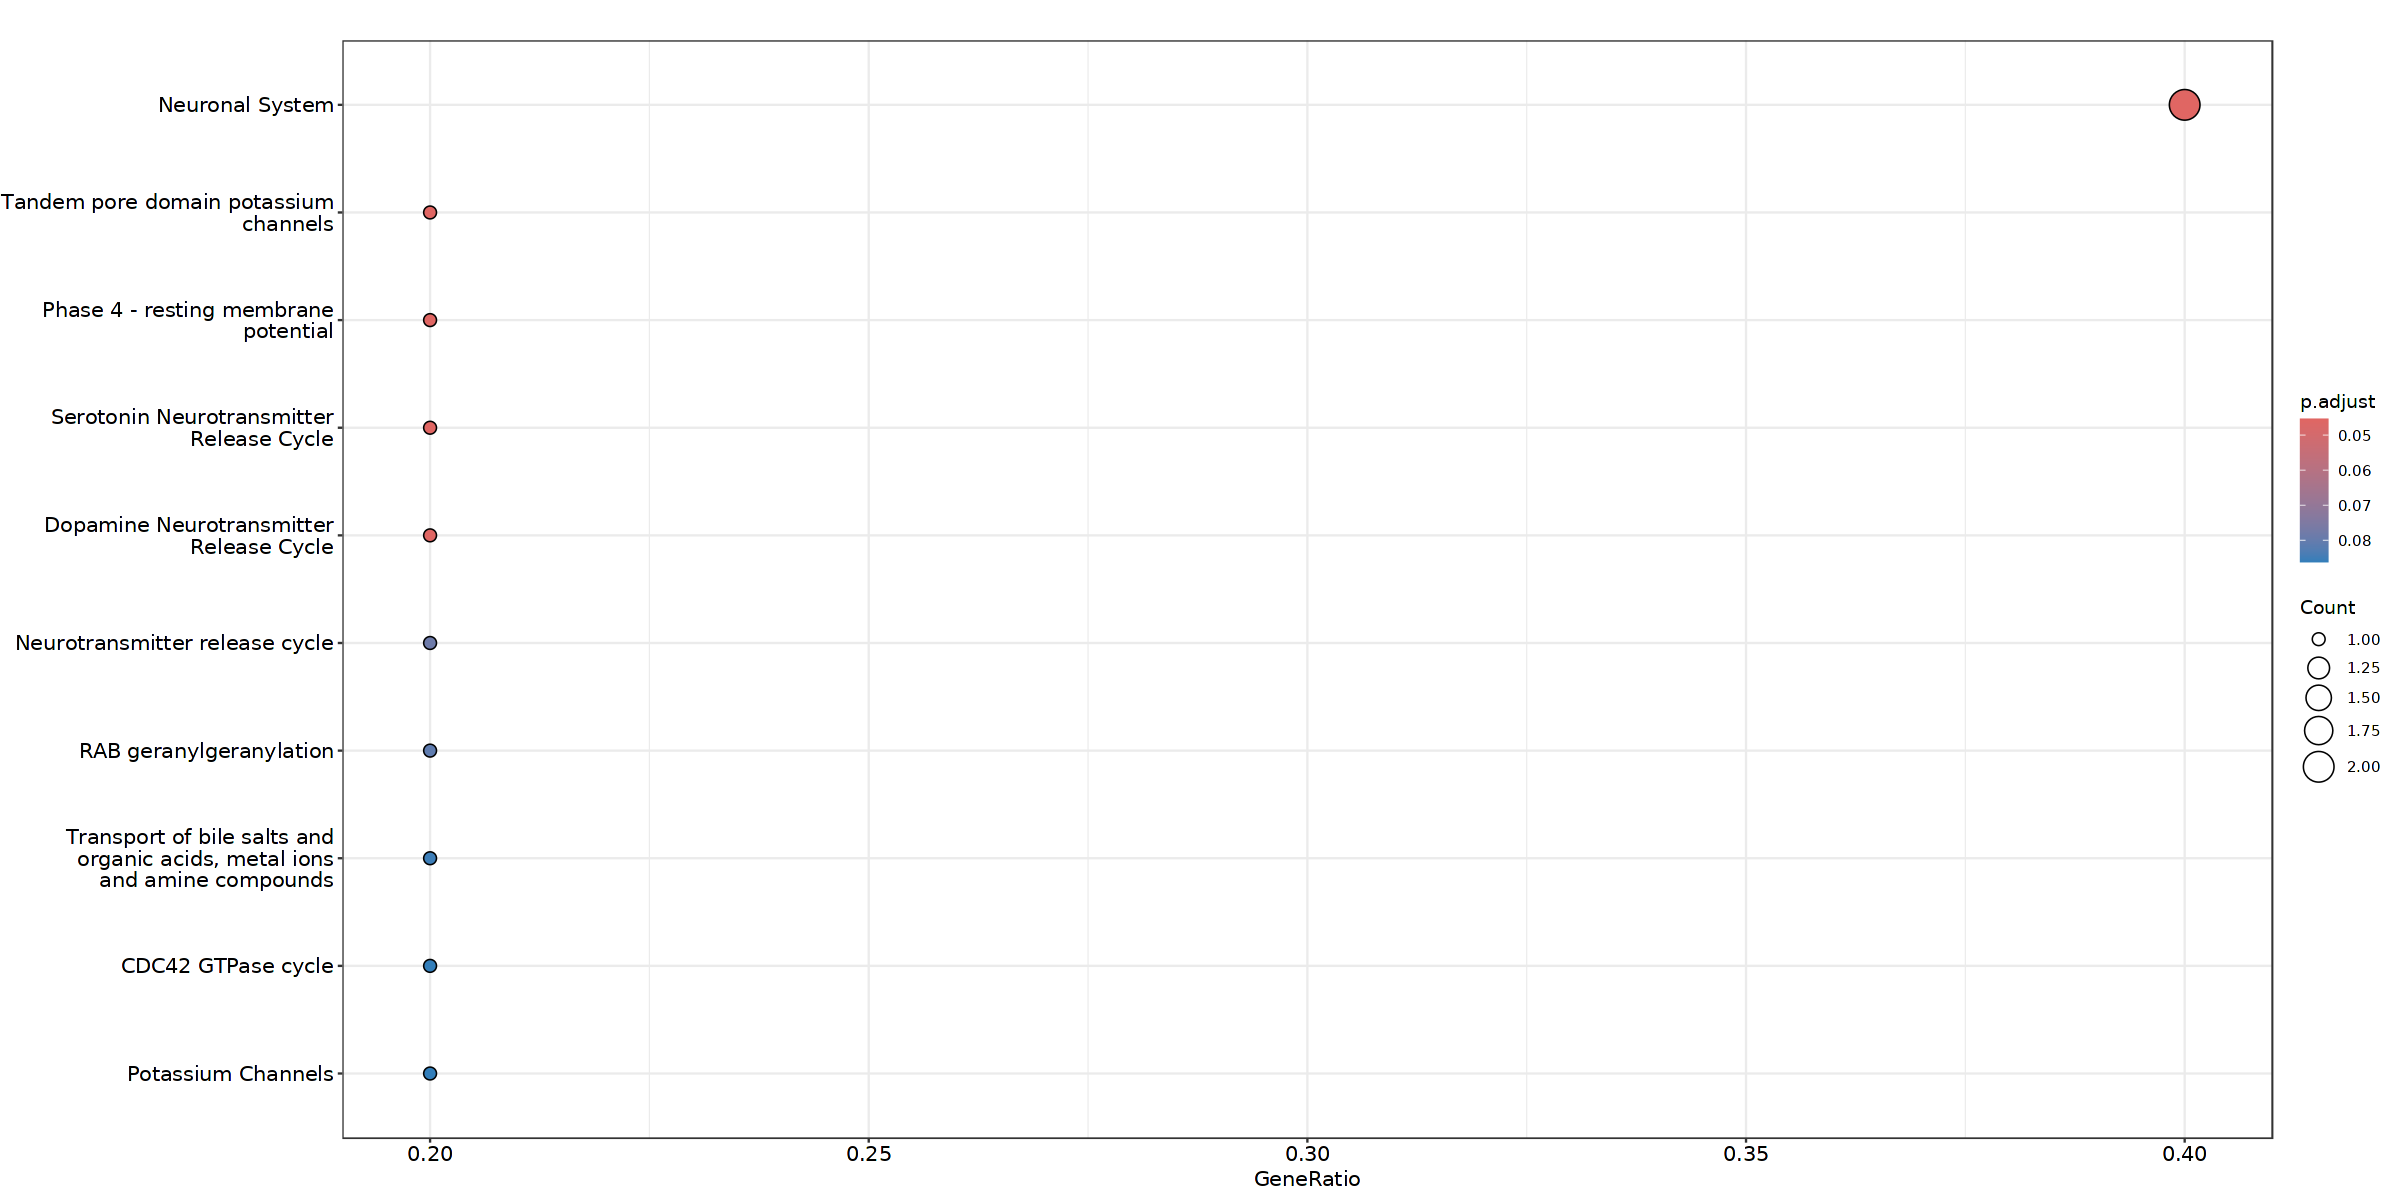

In [308]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [309]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

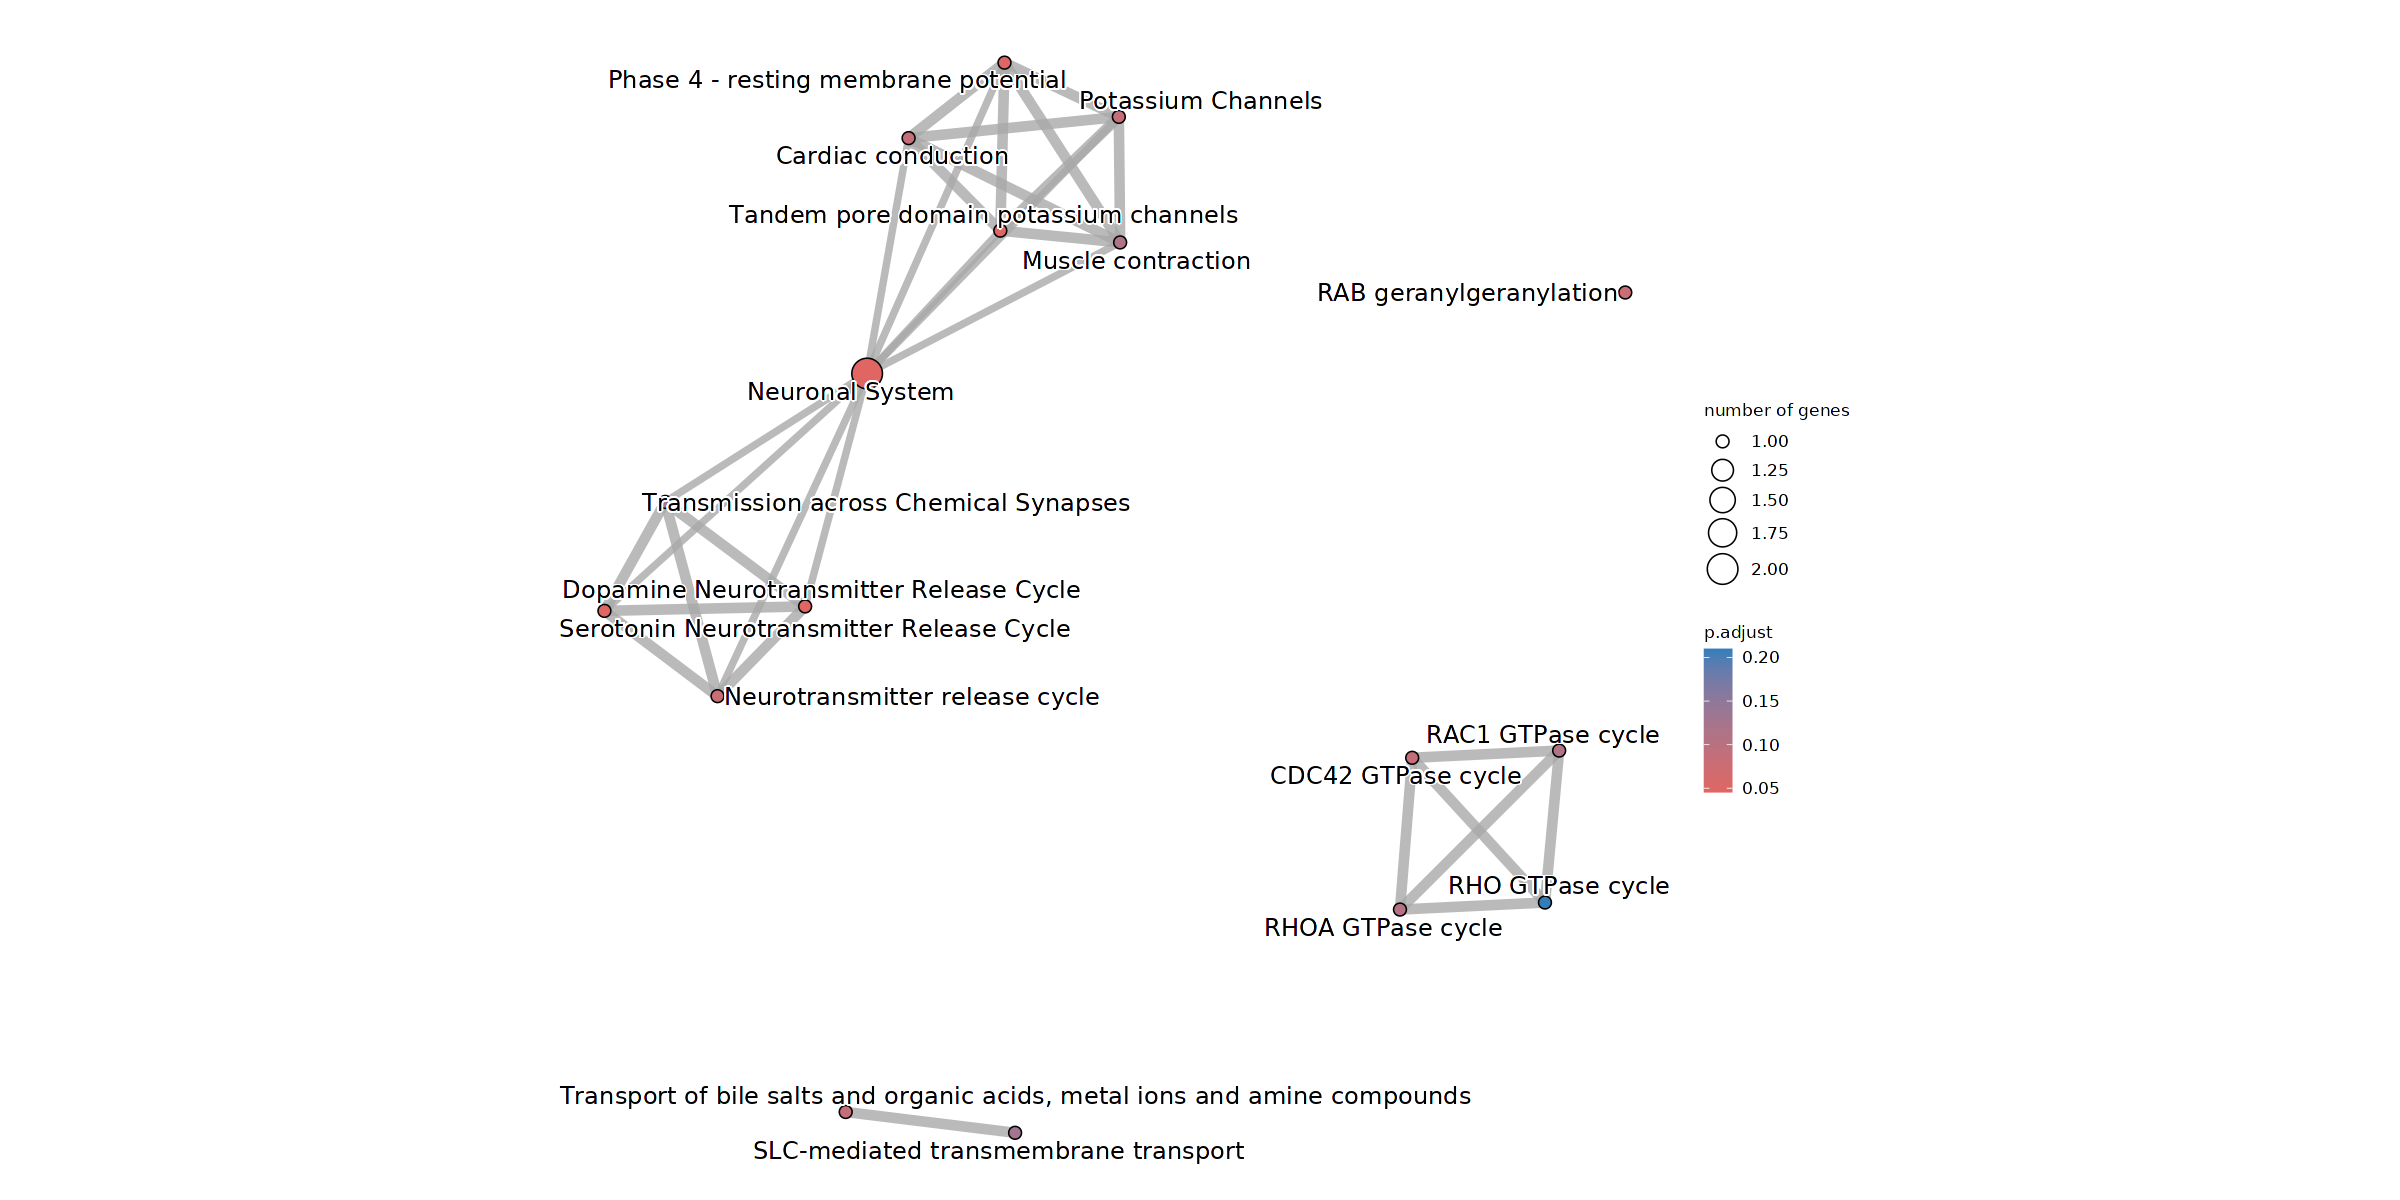

In [310]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Sub category 9

In [171]:
highest_cat <- "Peak"
second_highest_cat <- "Late"

In [172]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [173]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [174]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [175]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [176]:
length(gene_list)

[1] 108

In [177]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [178]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [179]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [180]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [181]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [182]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [183]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [184]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:49] "17069" "76681" "100039796" "15953" "15944" "245240" "234311" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...0 enriched terms found
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


In [185]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [186]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:49] "17069" "76681" "100039796" "15953" "15944" "245240" "234311" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...118 enriched terms found
'data.frame':	118 obs. of  9 variables:
 $ ID         : chr  "R-MMU-197264" "R-MMU-196807" "R-MMU-3371378" "R-MMU-5218900" ...
 $ Description: chr  "Nicotinamide salvaging" "Nicotinate metabolism" "Regulation by c-FLIP" "CASP8 activity is inhibited" ...
 $ GeneRatio  : chr  "2/22" "2/22" "1/22" "1/22" ...
 $ BgRatio    : chr  "18/8582" "30/8582" "10/8582" "10/8582" ...
 $ pvalue     : num  0.000936 0.002613 0.025354 0.025354 0.025354 ...
 $ p.adjust   : num  0.11 0.154 0.299 0.299 0.299 ...
 $ qvalue     : num  0.0995 0.1389 0.2694 0.2694 0.2694 ...
 $ geneID     : chr  "Parp9/Parp14" "Parp9/Parp14" "Fas" "Fas" ...
 $ Count      : int  2 2 1 1 1 1 1 1 2 1 ...
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bio

In [187]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_MOL2_",highest_cat,"_",second_highest_cat,".csv"), row.names=FALSE)

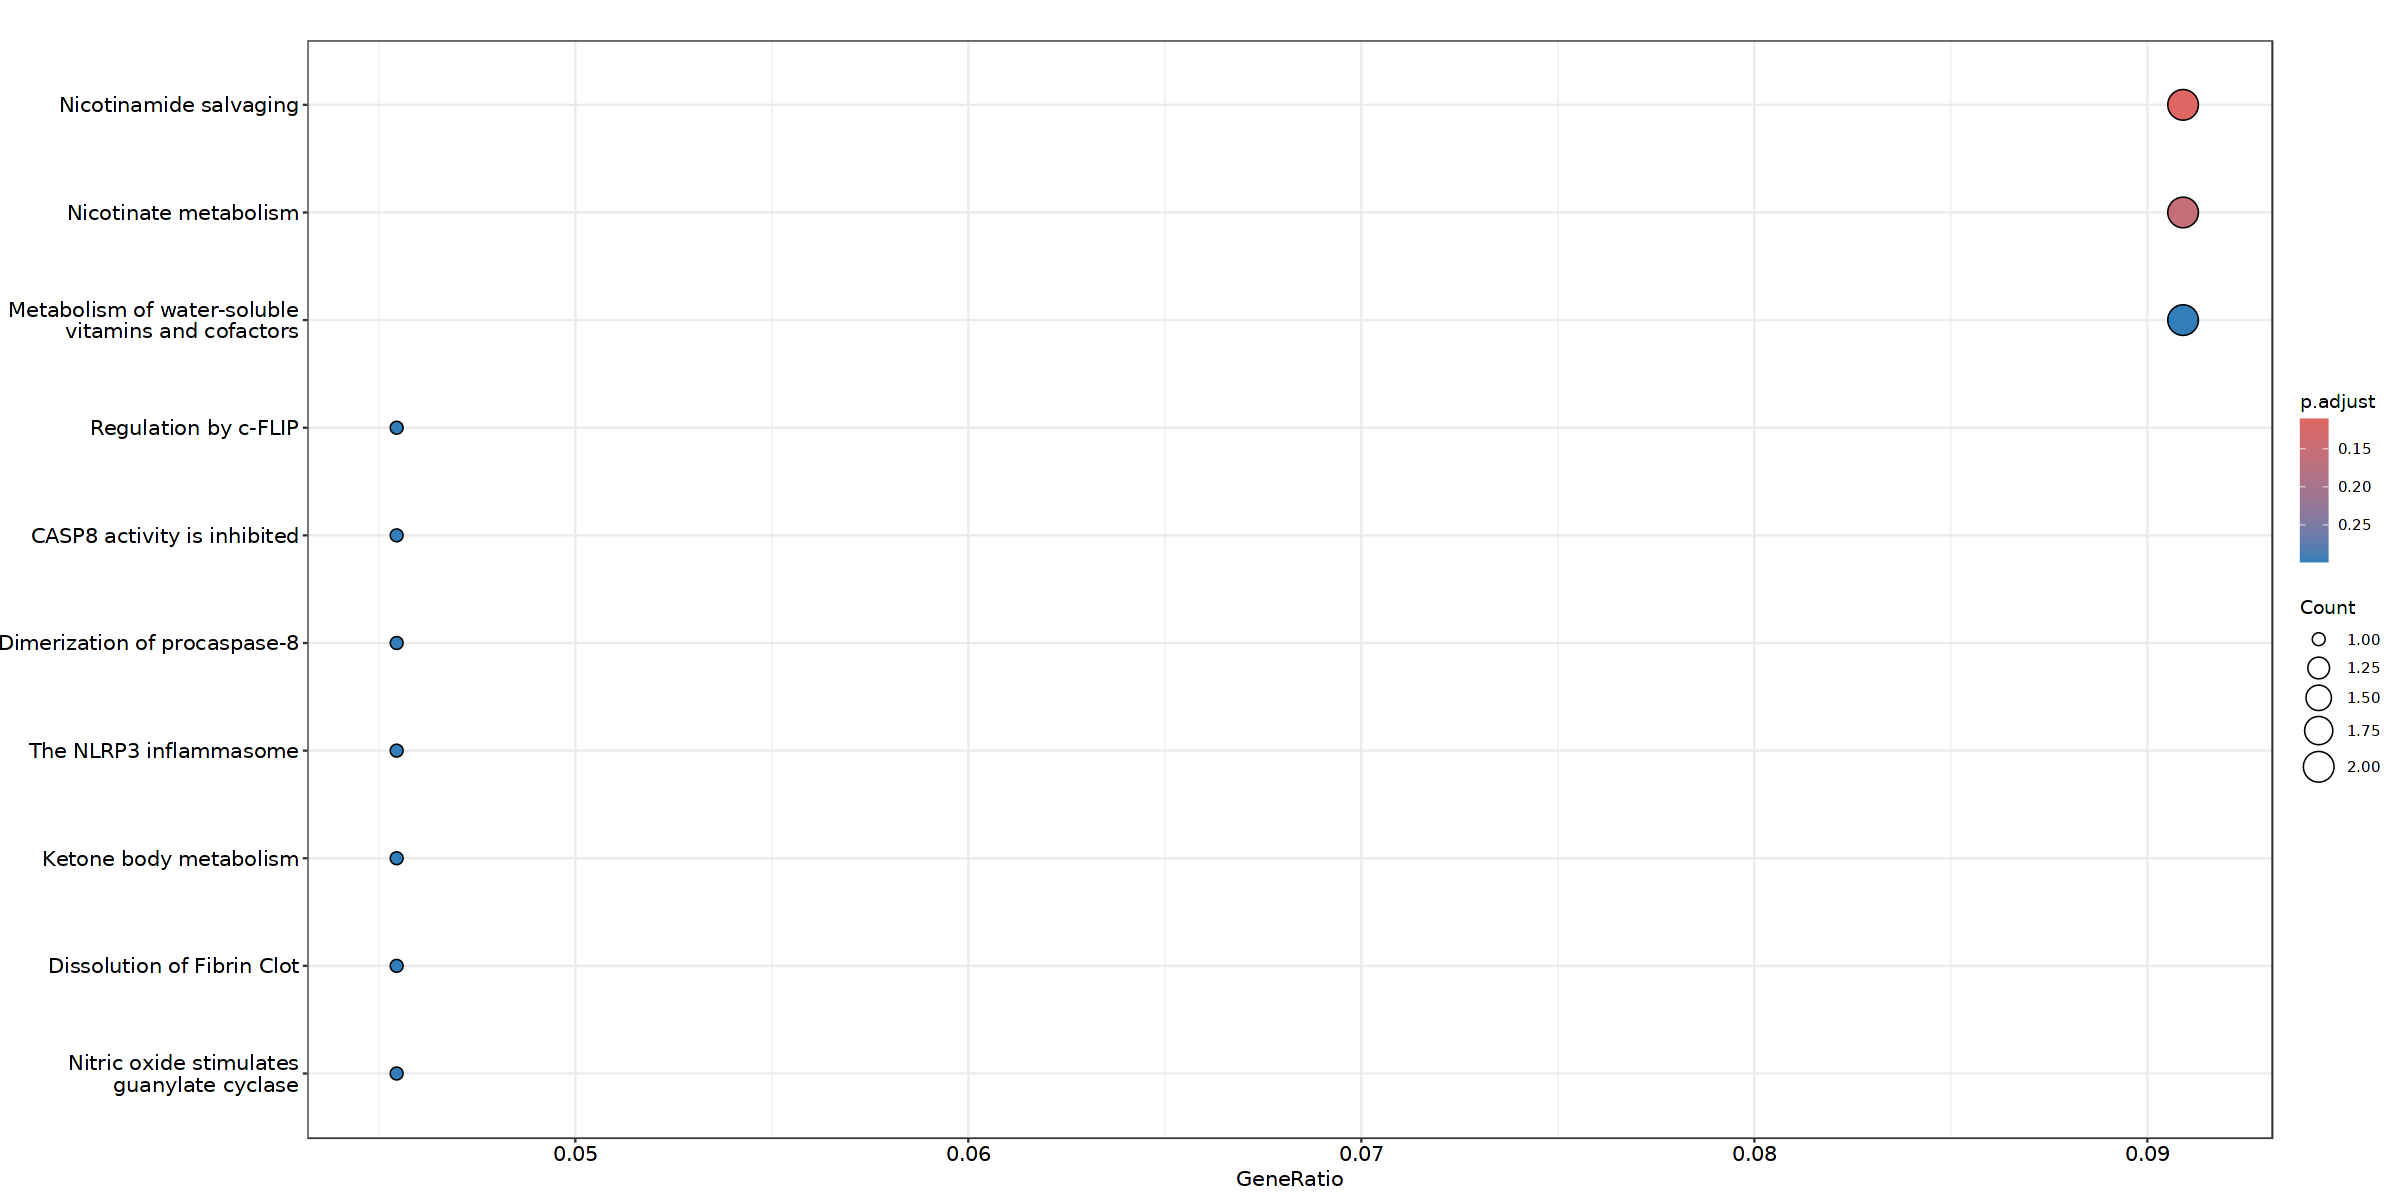

In [327]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [328]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

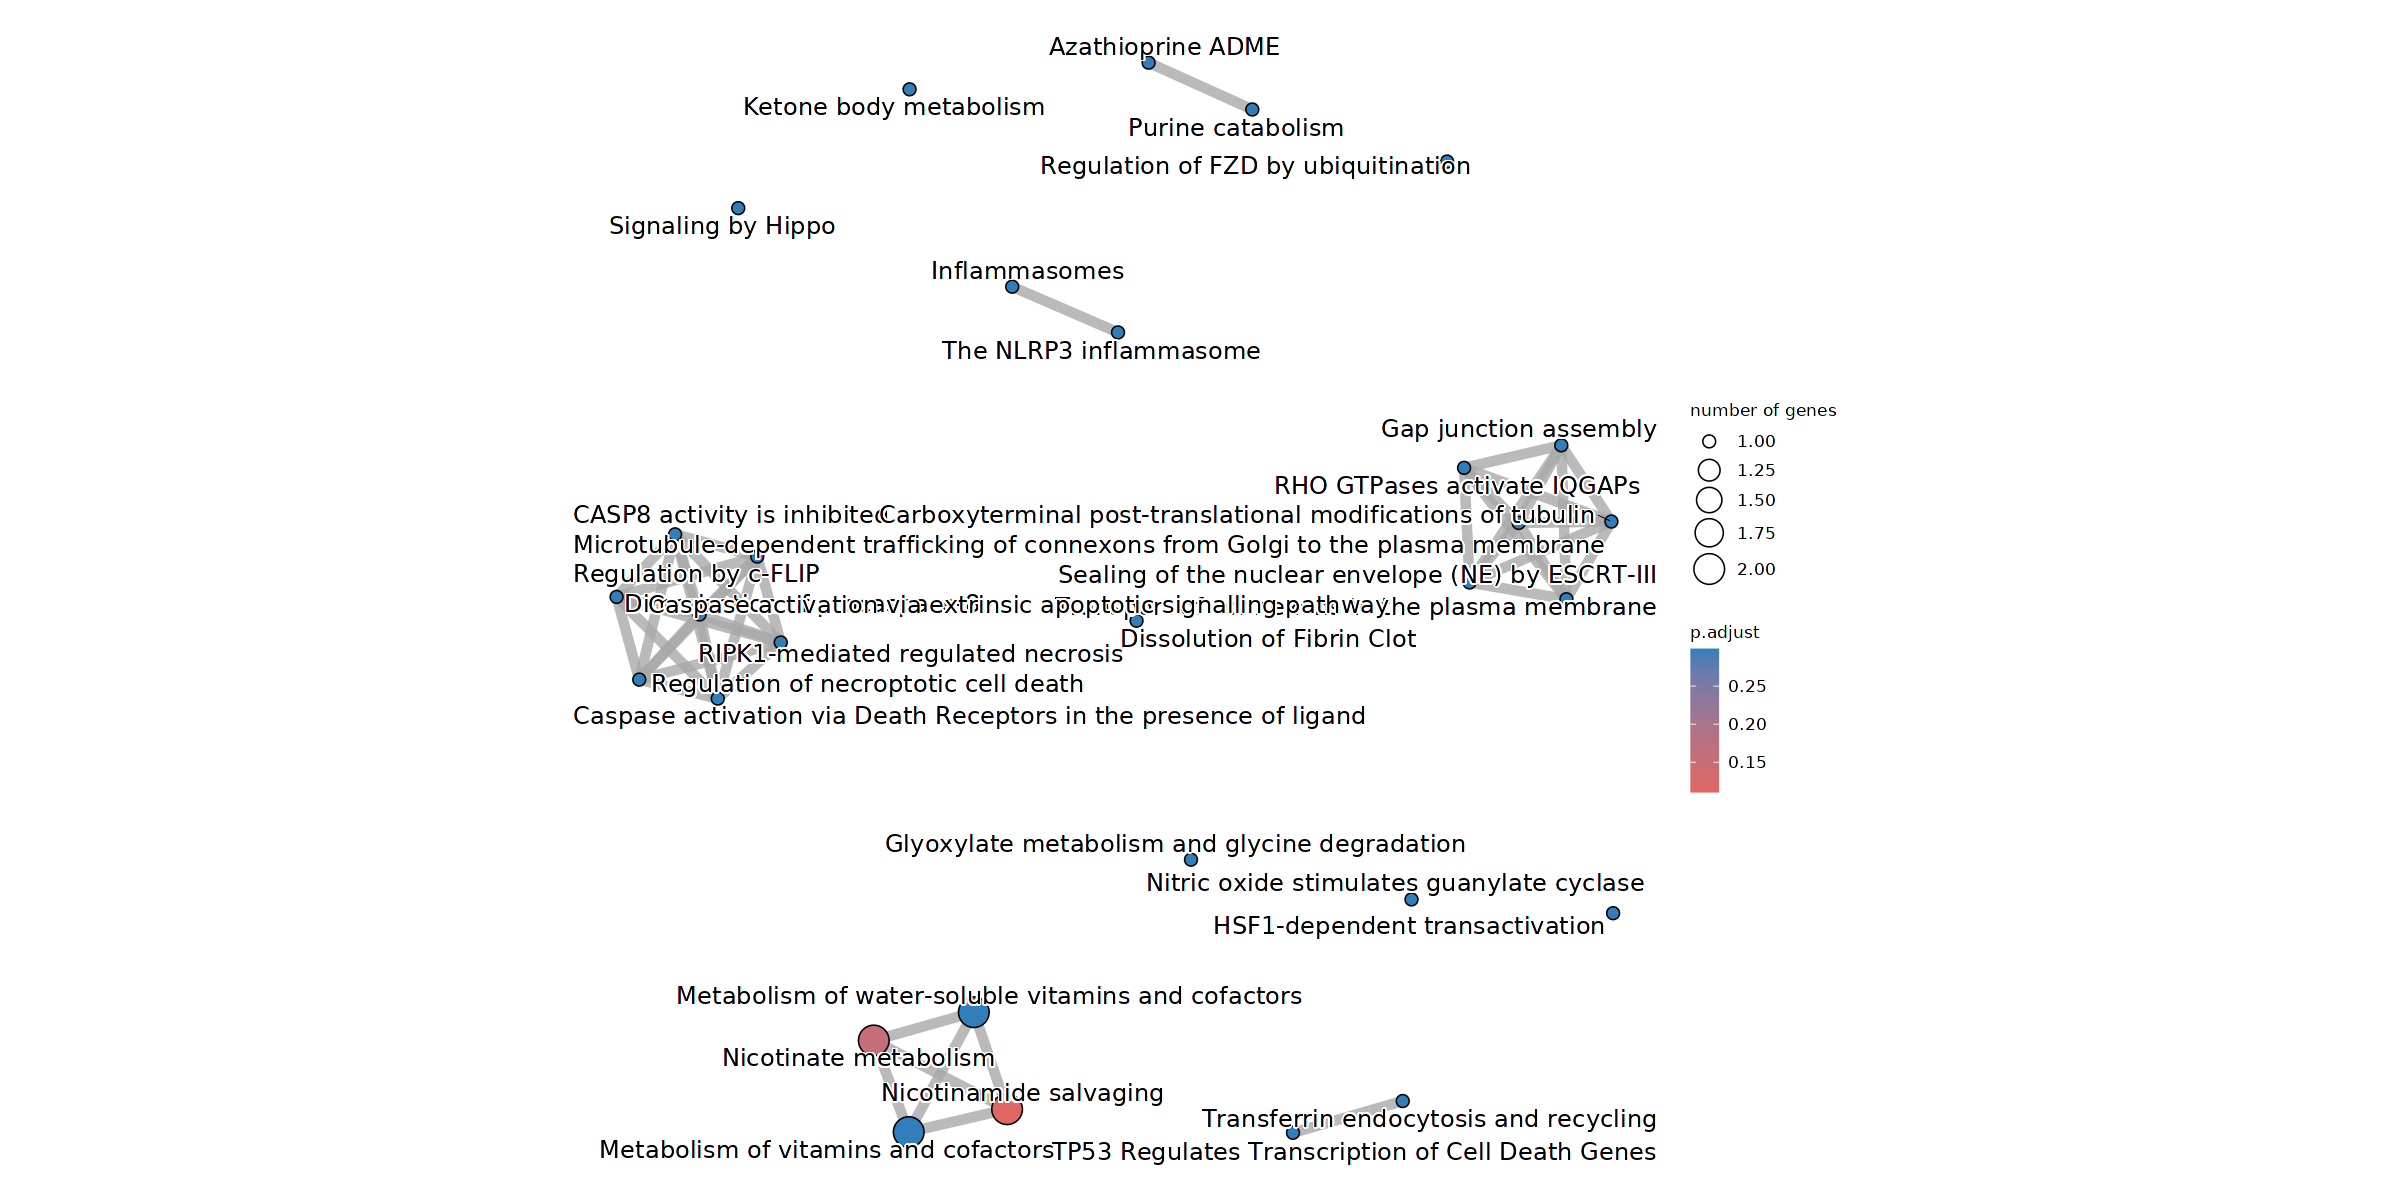

In [329]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Sub category 10

In [330]:
highest_cat <- "Late"
second_highest_cat <- "Ctrl"

In [331]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [332]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [333]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [334]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [335]:
length(gene_list)

[1] 0

##### Sub category 11

In [336]:
highest_cat <- "Late"
second_highest_cat <- "Early"

In [337]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [338]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [339]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [340]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [341]:
length(gene_list)

[1] 0

##### Sub category 12

In [342]:
highest_cat <- "Late"
second_highest_cat <- "Peak"

In [343]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [344]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [345]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [346]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [347]:
length(gene_list)

[1] 0

#### 3.2.3 OPC

In [188]:
df_dynamics <- readRDS(paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_OPC.rds"))

In [189]:
df_dynamics_scaled <- df_dynamics/do.call(pmax, df_dynamics)

##### Category 1

In [350]:
highest_cat <- "Ctrl"

In [351]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [352]:
length(gene_list)

[1] 0

##### Category 2

In [190]:
highest_cat <- "Early"

In [191]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [192]:
length(gene_list)

[1] 3

In [193]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [194]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [195]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [196]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [197]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [198]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [199]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [200]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:3] "16369" "22779" "20423"
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...4 enriched terms found
'data.frame':	4 obs. of  9 variables:
 $ ID         : chr  "R-MMU-5635838" "R-MMU-5358346" "R-MMU-5632684" "R-MMU-5358351"
 $ Description: chr  "Activation of SMO" "Hedgehog ligand biogenesis" "Hedgehog 'on' state" "Signaling by Hedgehog"
 $ GeneRatio  : chr  "1/1" "1/1" "1/1" "1/1"
 $ BgRatio    : chr  "13/8582" "63/8582" "81/8582" "138/8582"
 $ pvalue     : num  0.00151 0.00734 0.00944 0.01608
 $ p.adjust   : num  0.00606 0.01258 0.01258 0.01608
 $ qvalue     : logi  NA NA NA NA
 $ geneID     : chr  "Shh" "Shh" "Shh" "Shh"
 $ Count      : int  1 1 1 1
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


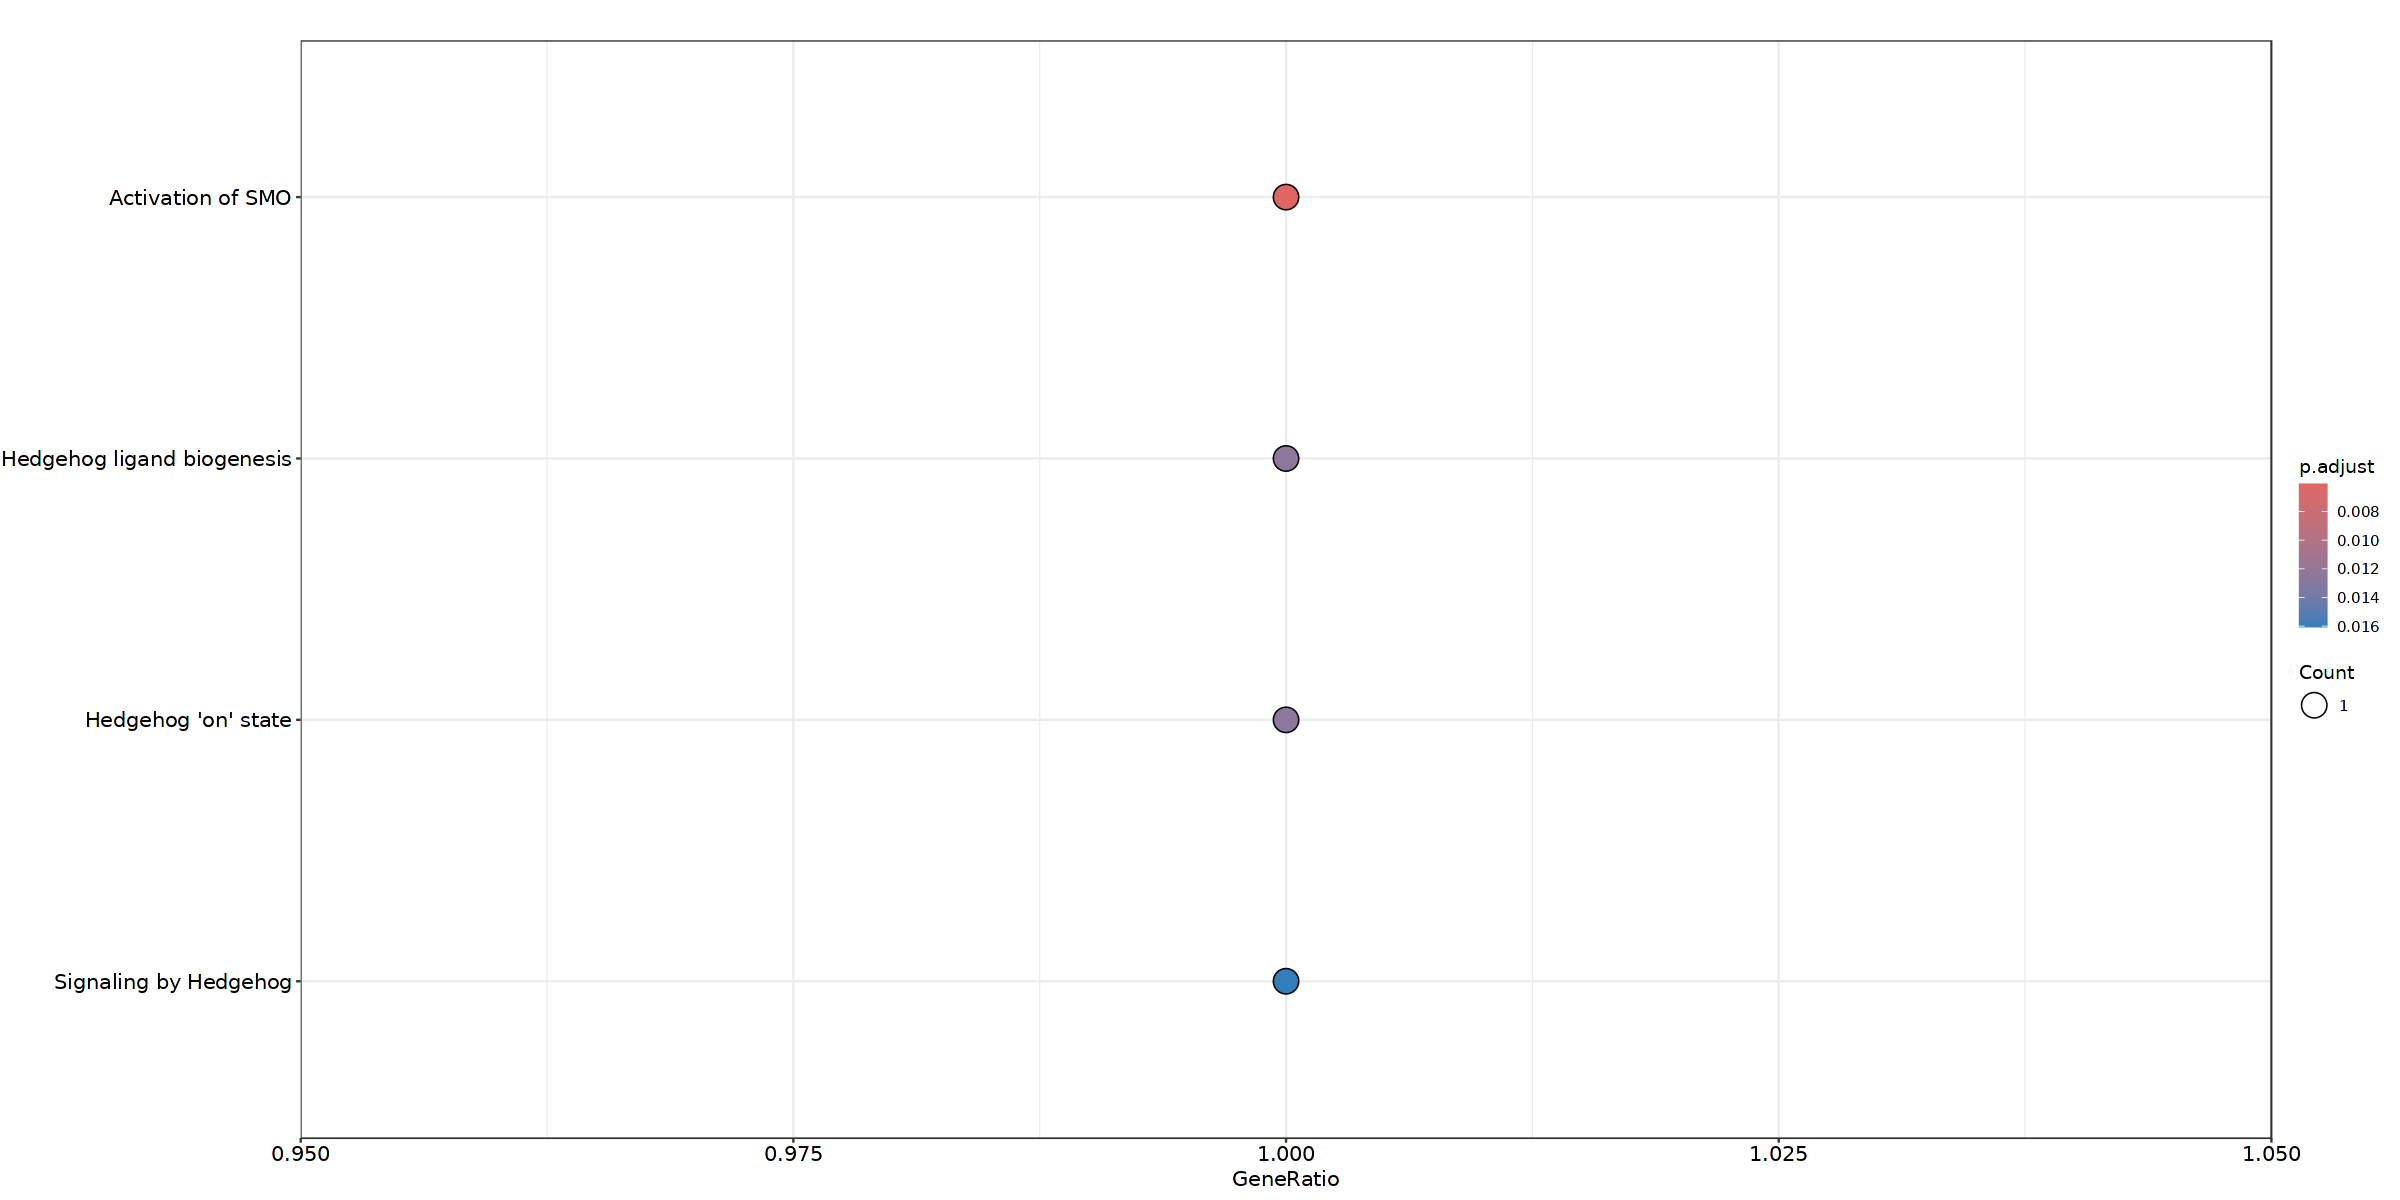

In [201]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [202]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

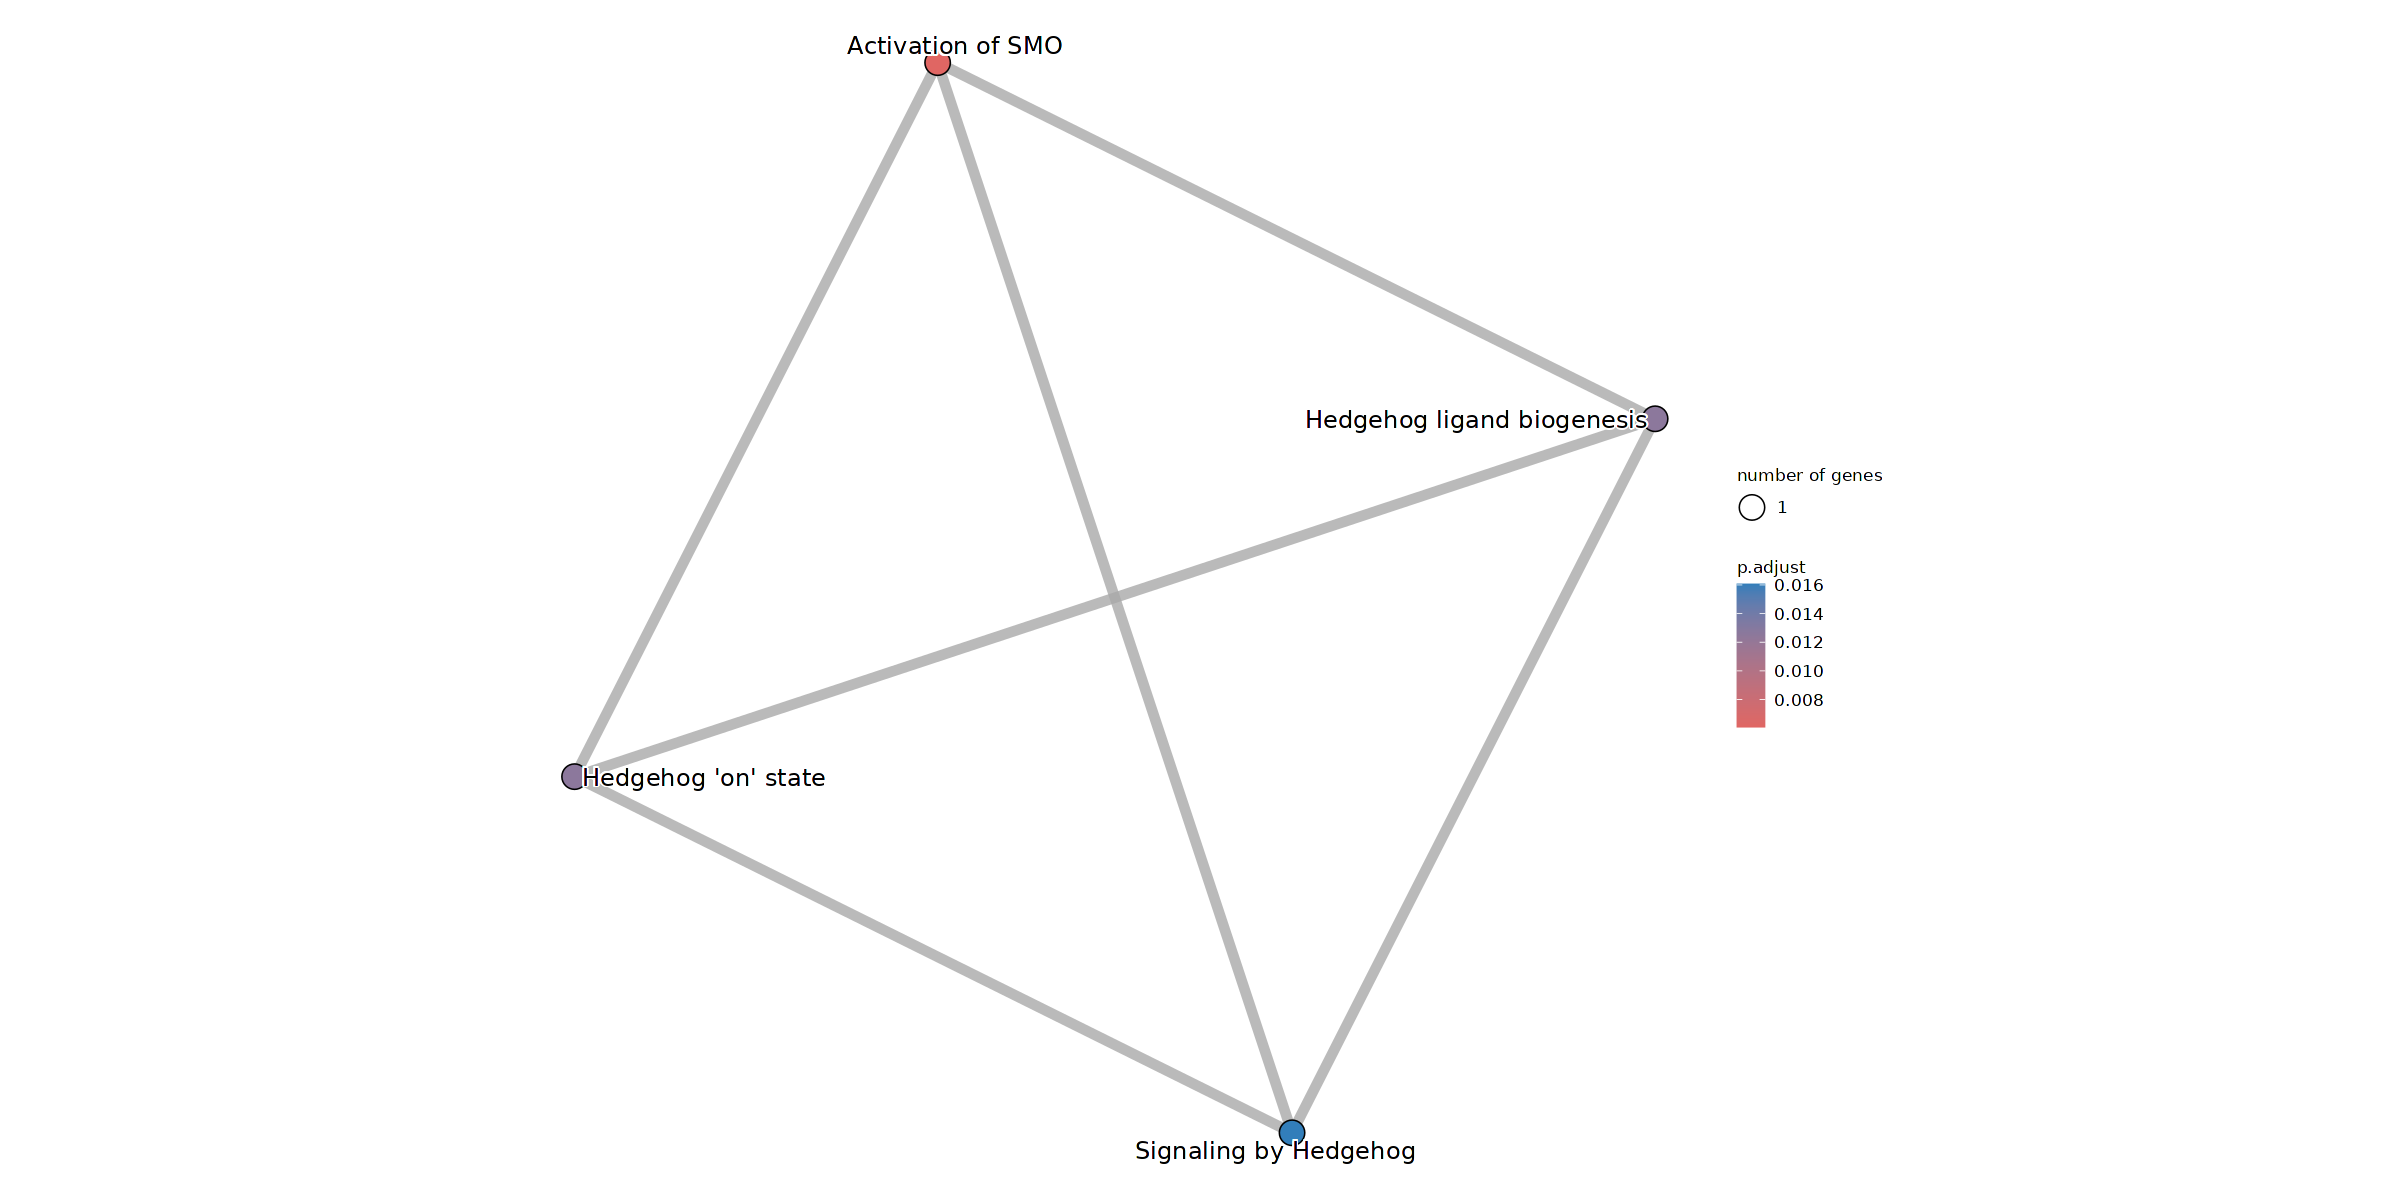

In [203]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

In [204]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [205]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:3] "16369" "22779" "20423"
#...pvalues adjusted by 'fdr' with cutoff <1 
#...4 enriched terms found
'data.frame':	4 obs. of  9 variables:
 $ ID         : chr  "R-MMU-5635838" "R-MMU-5358346" "R-MMU-5632684" "R-MMU-5358351"
 $ Description: chr  "Activation of SMO" "Hedgehog ligand biogenesis" "Hedgehog 'on' state" "Signaling by Hedgehog"
 $ GeneRatio  : chr  "1/1" "1/1" "1/1" "1/1"
 $ BgRatio    : chr  "13/8582" "63/8582" "81/8582" "138/8582"
 $ pvalue     : num  0.00151 0.00734 0.00944 0.01608
 $ p.adjust   : num  0.00606 0.01258 0.01258 0.01608
 $ qvalue     : logi  NA NA NA NA
 $ geneID     : chr  "Shh" "Shh" "Shh" "Shh"
 $ Count      : int  1 1 1 1
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


In [206]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_OPC_",highest_cat,".csv"), row.names=FALSE)

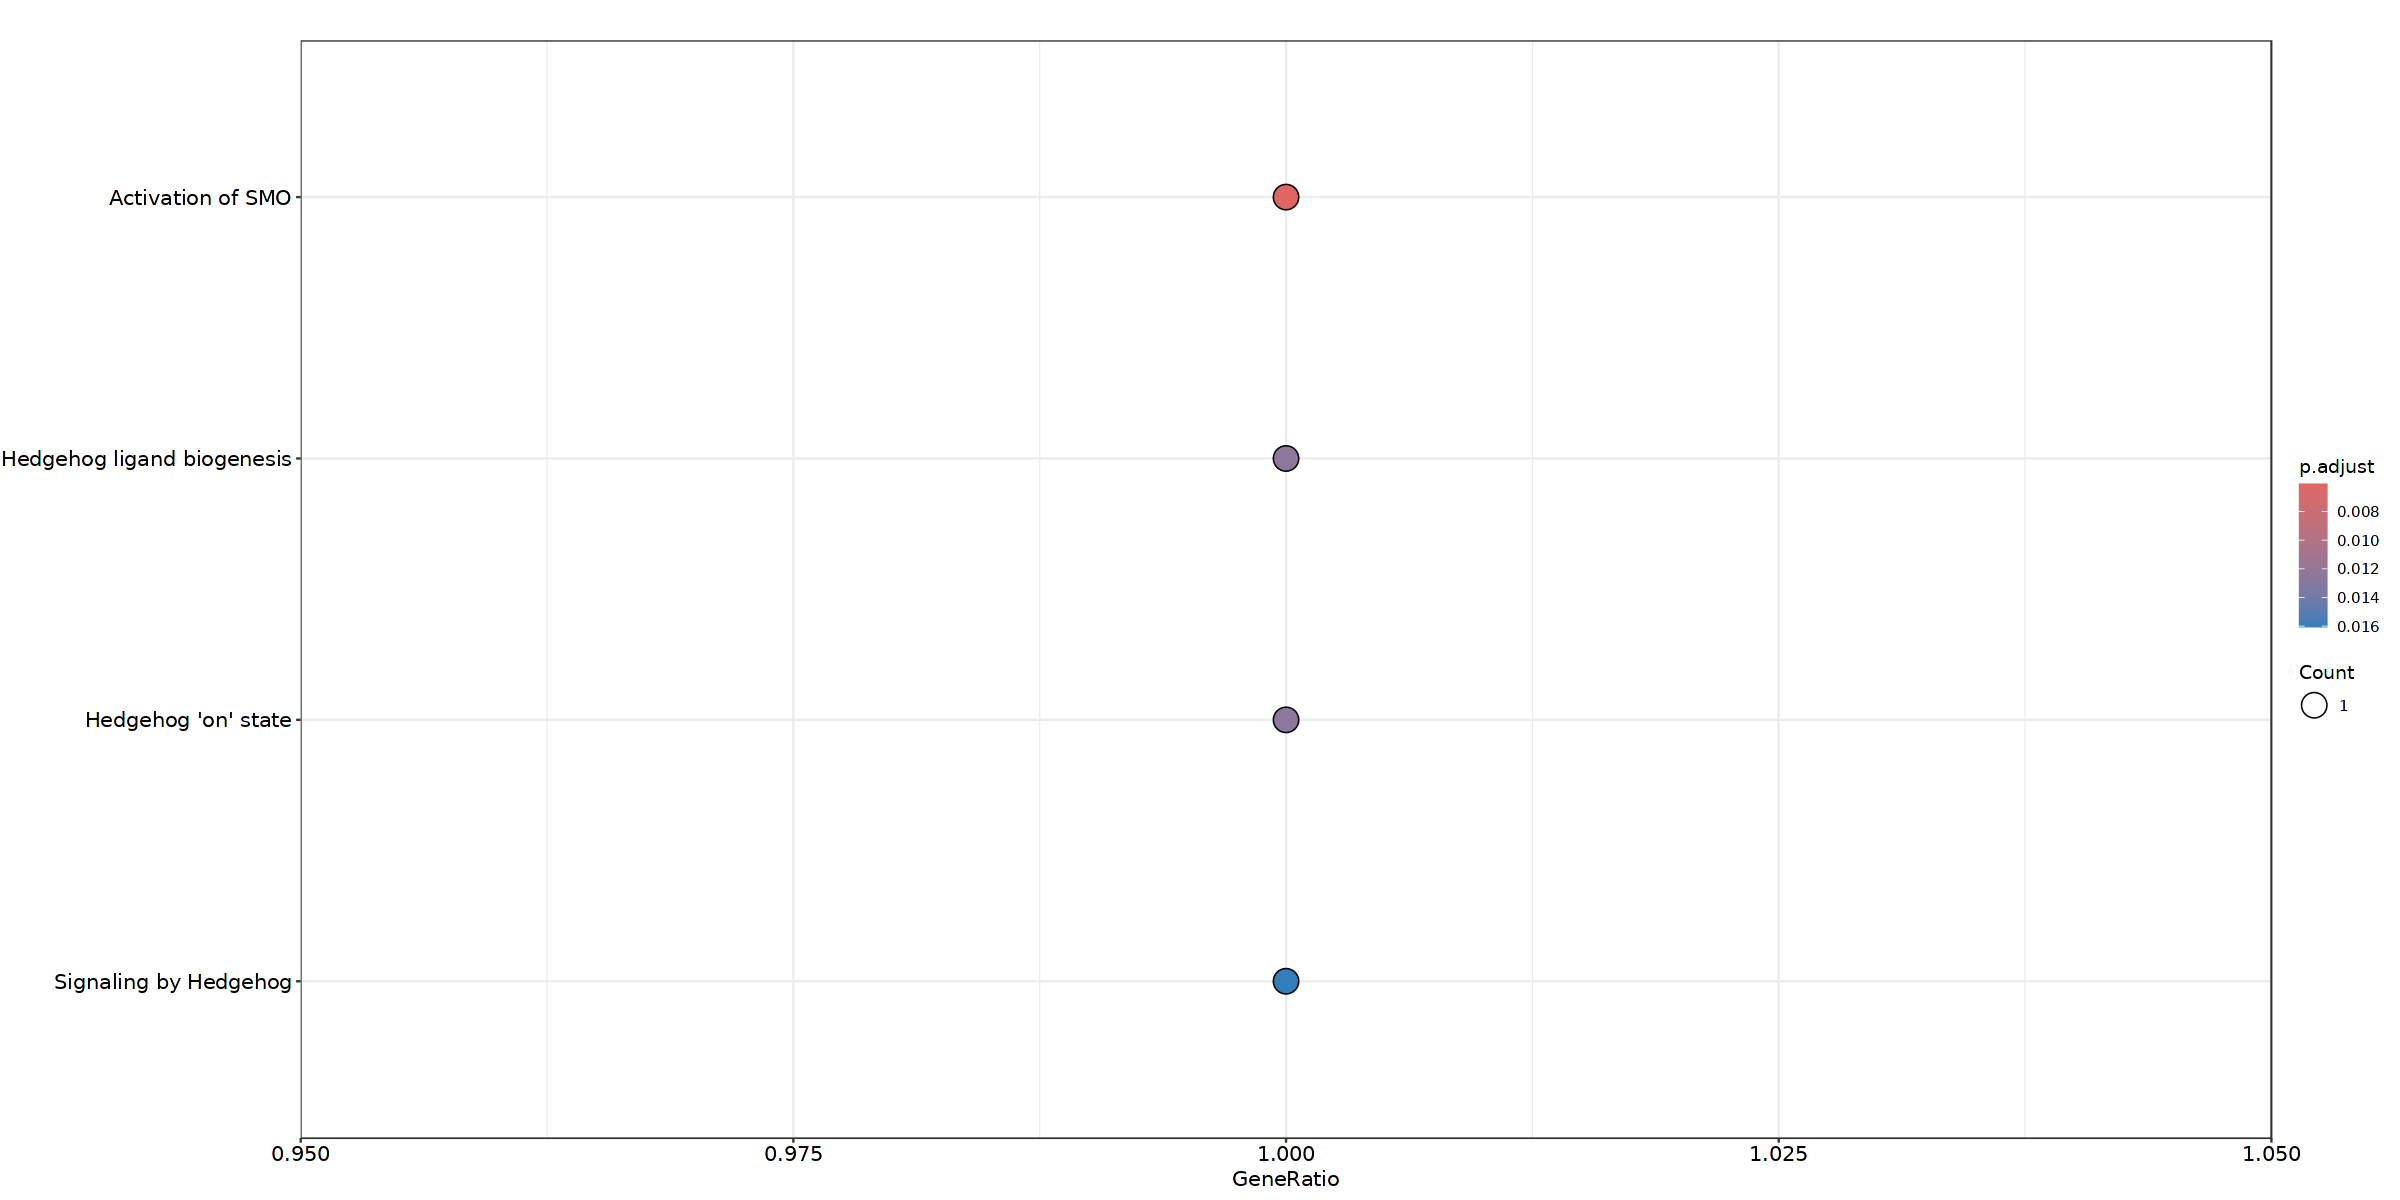

In [369]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [370]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

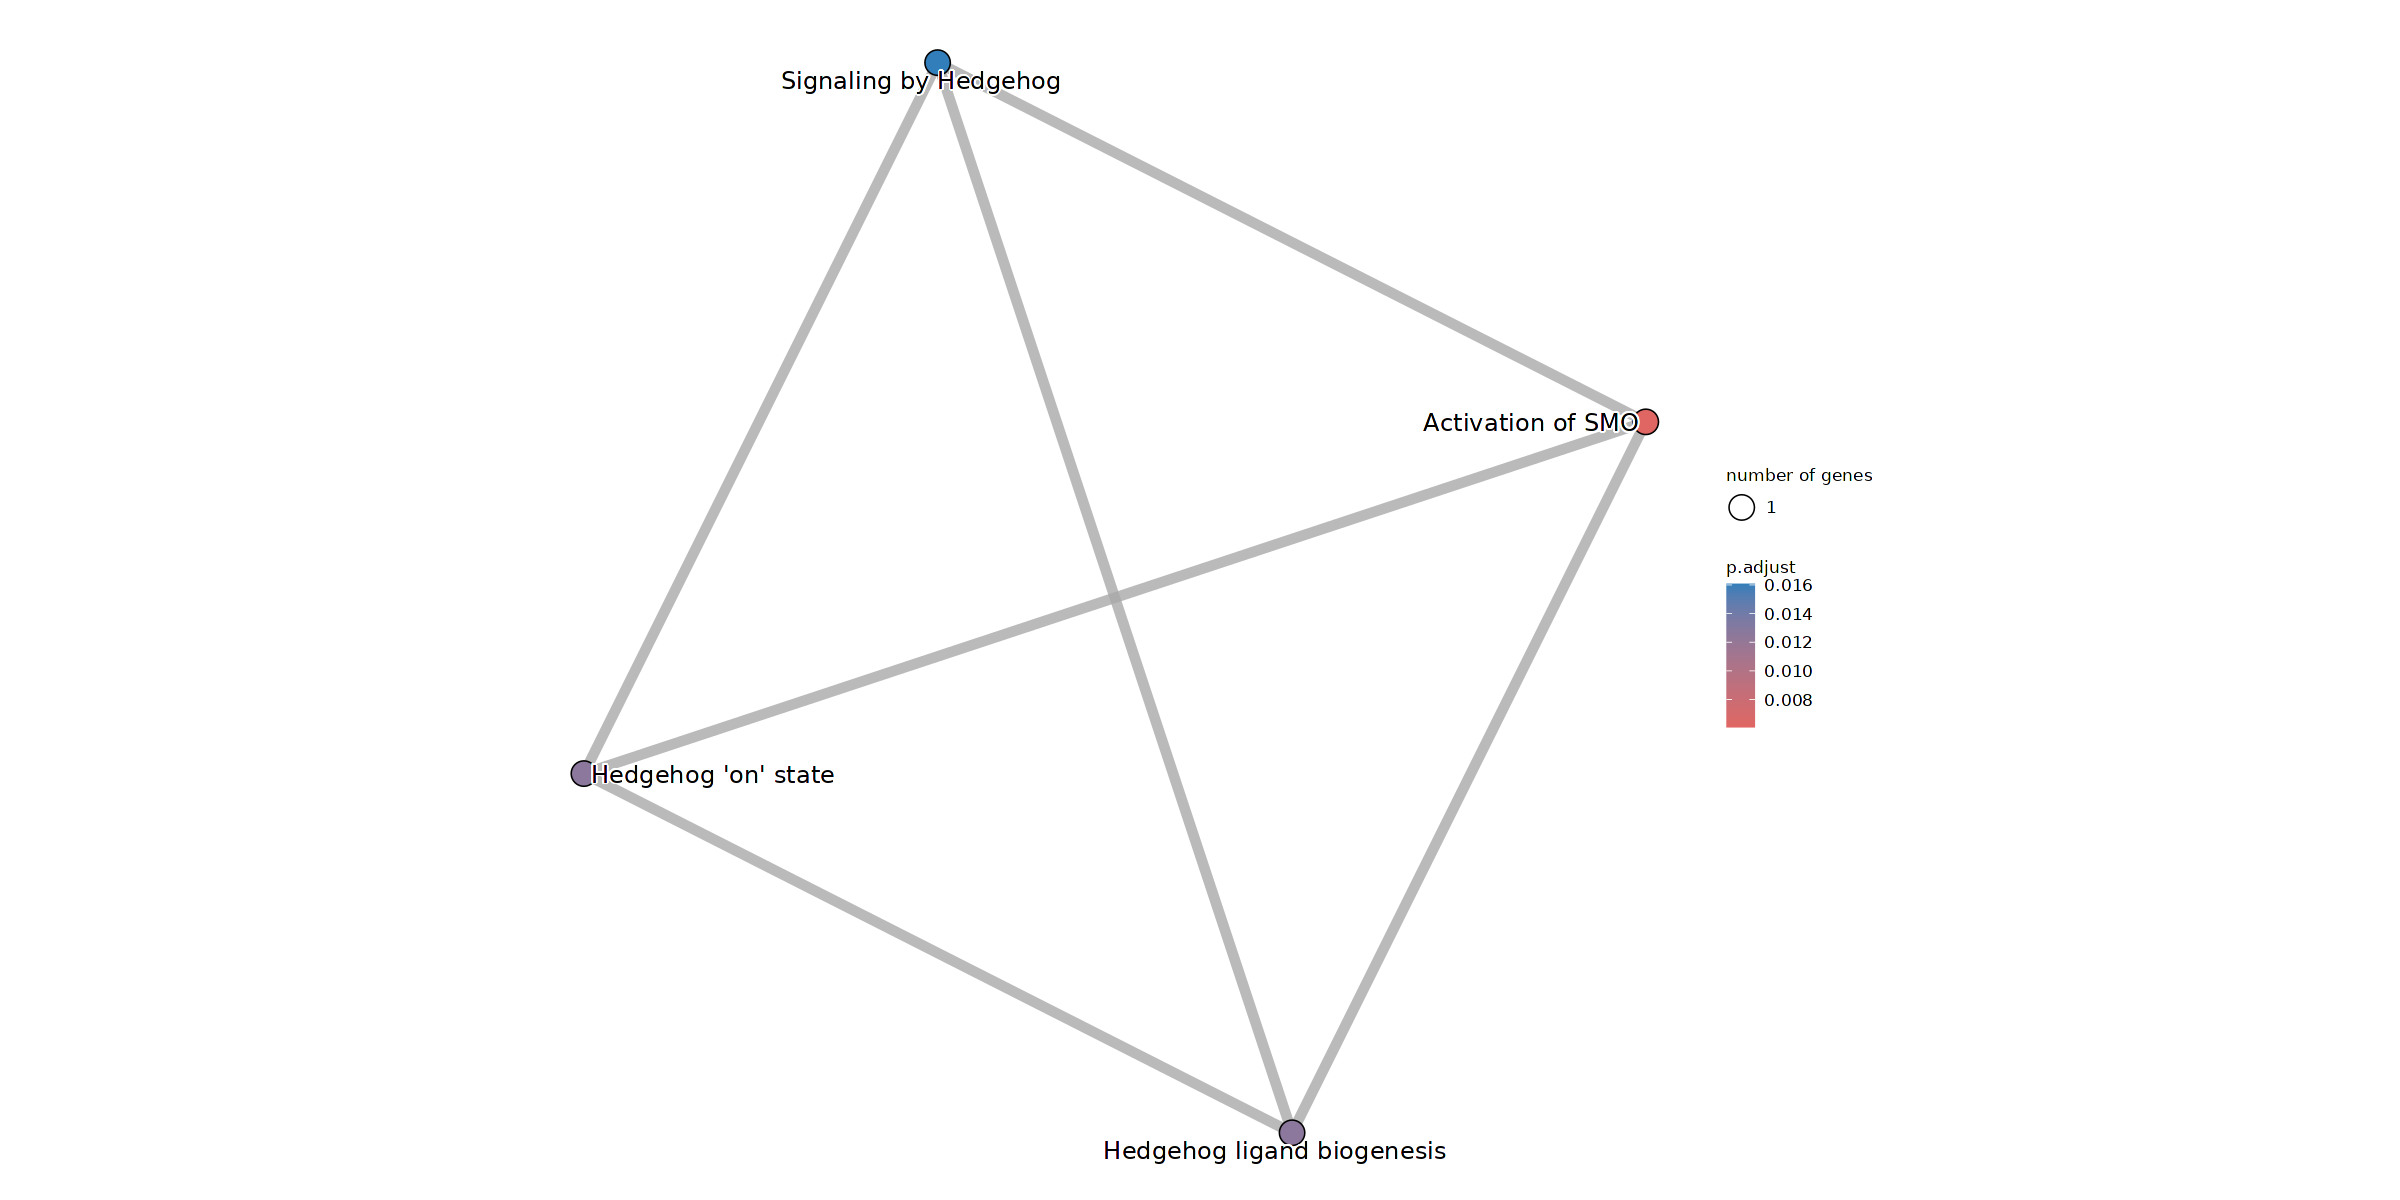

In [371]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Category 3

In [207]:
highest_cat <- "Peak"

In [208]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [209]:
length(gene_list)

[1] 49

In [210]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [211]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [212]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [213]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [214]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [215]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [216]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [217]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:48] "17472" "100702" "76074" "238393" "22436" "236573" "15446" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...3 enriched terms found
'data.frame':	3 obs. of  9 variables:
 $ ID         : chr  "R-MMU-2029481" "R-MMU-197264" "R-MMU-2029485"
 $ Description: chr  "FCGR activation" "Nicotinamide salvaging" "Role of phospholipids in phagocytosis"
 $ GeneRatio  : chr  "2/21" "2/21" "2/21"
 $ BgRatio    : chr  "13/8582" "18/8582" "21/8582"
 $ pvalue     : num  0.000438 0.000852 0.001165
 $ p.adjust   : num  0.0477 0.0477 0.0477
 $ qvalue     : num  0.0392 0.0392 0.0392
 $ geneID     : chr  "Fcgr2b/Syk" "Parp9/Parp14" "Fcgr2b/Syk"
 $ Count      : int  2 2 2
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


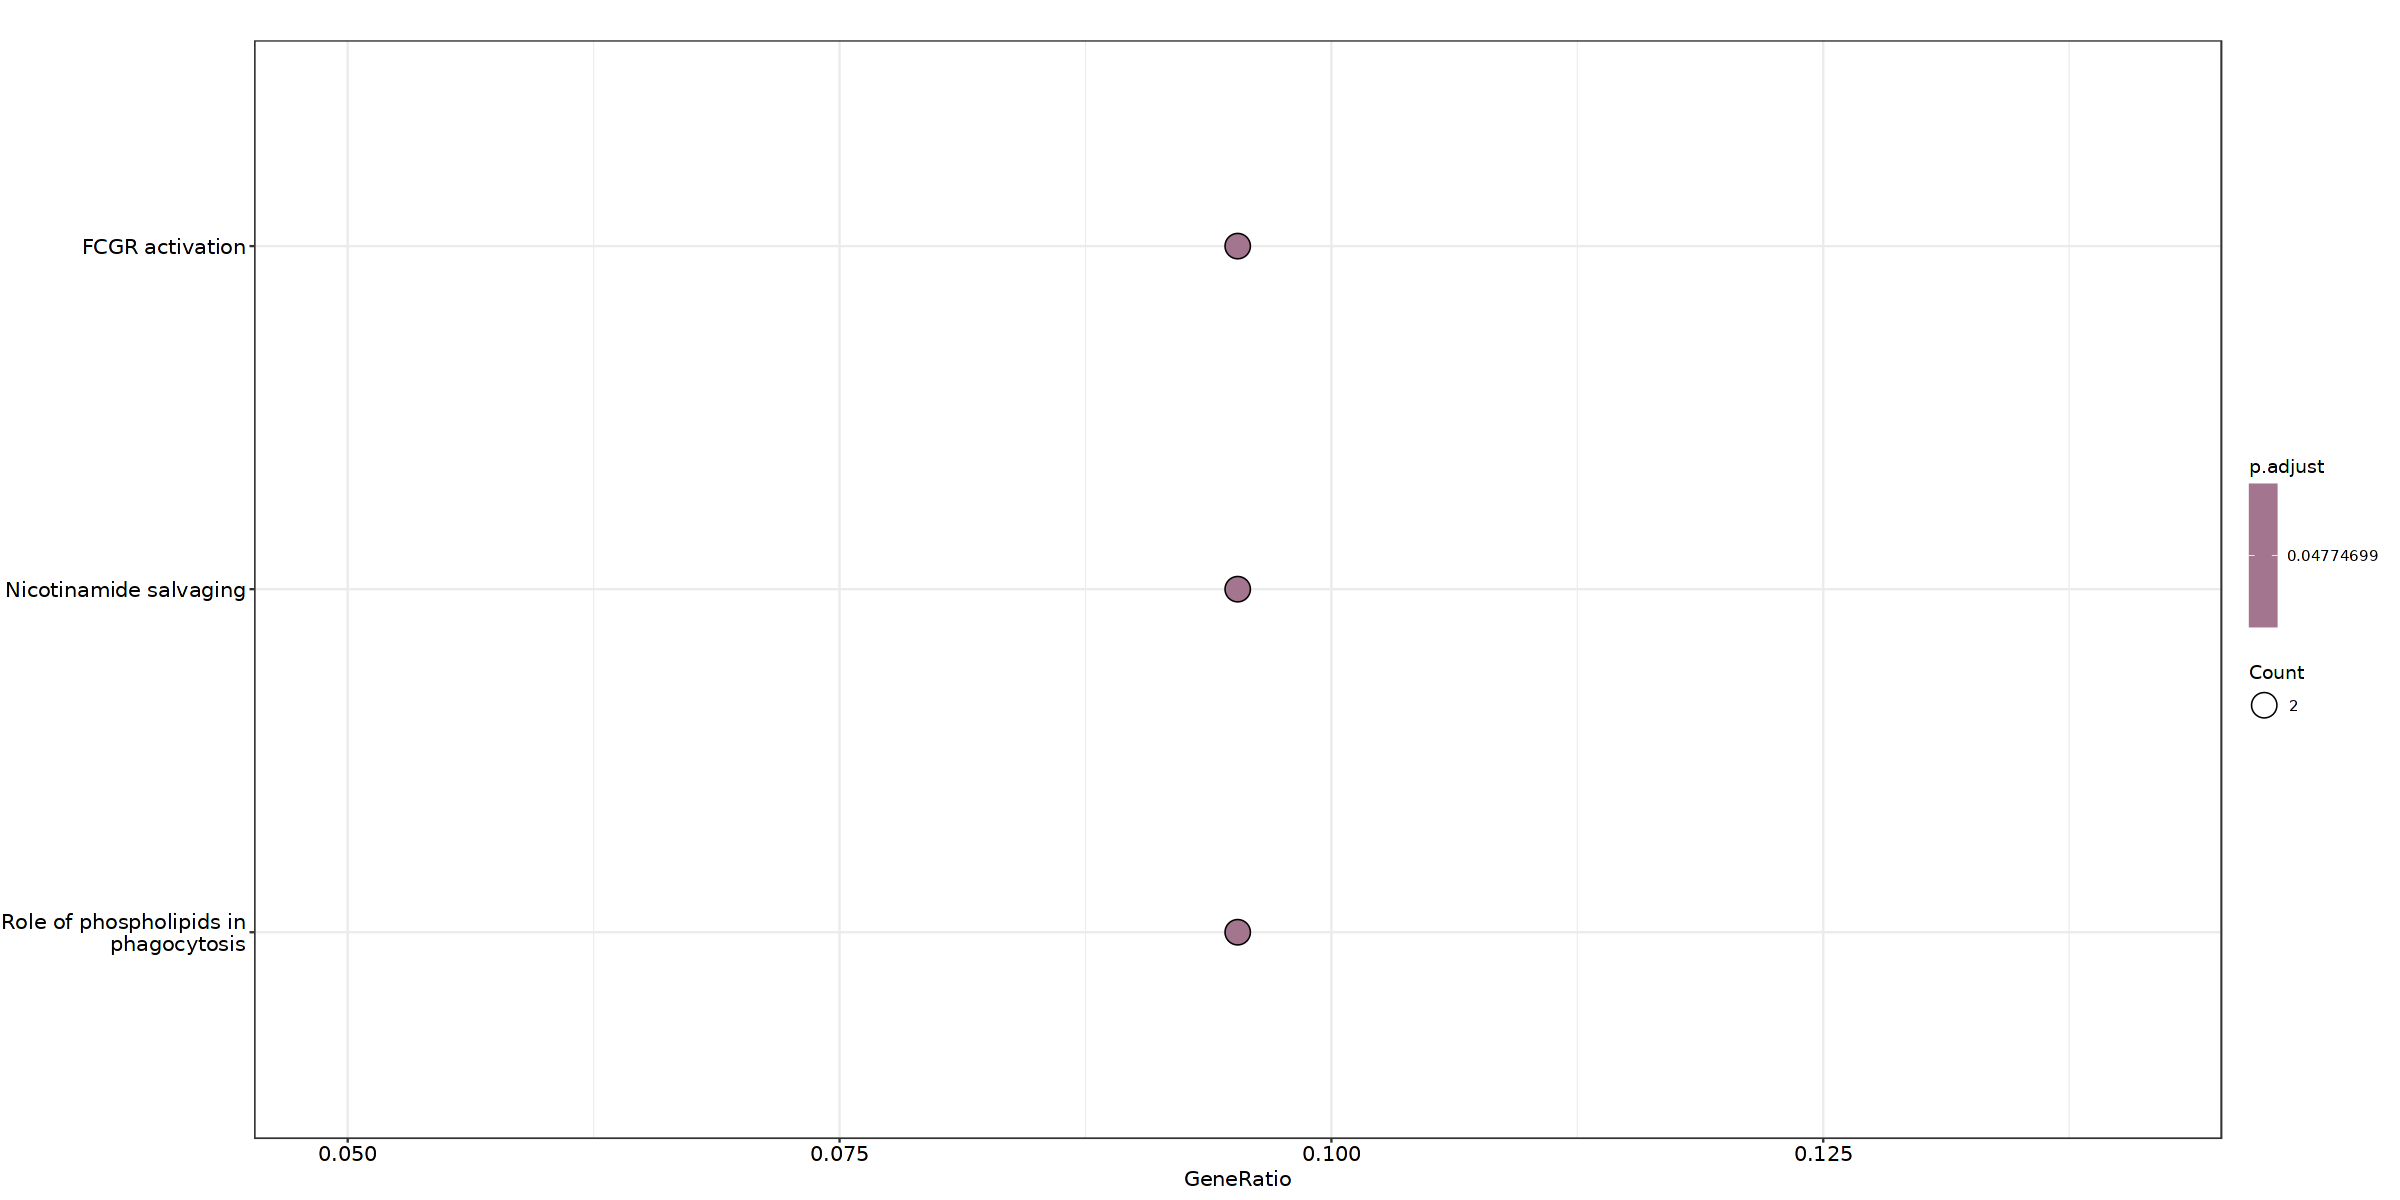

In [218]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [219]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

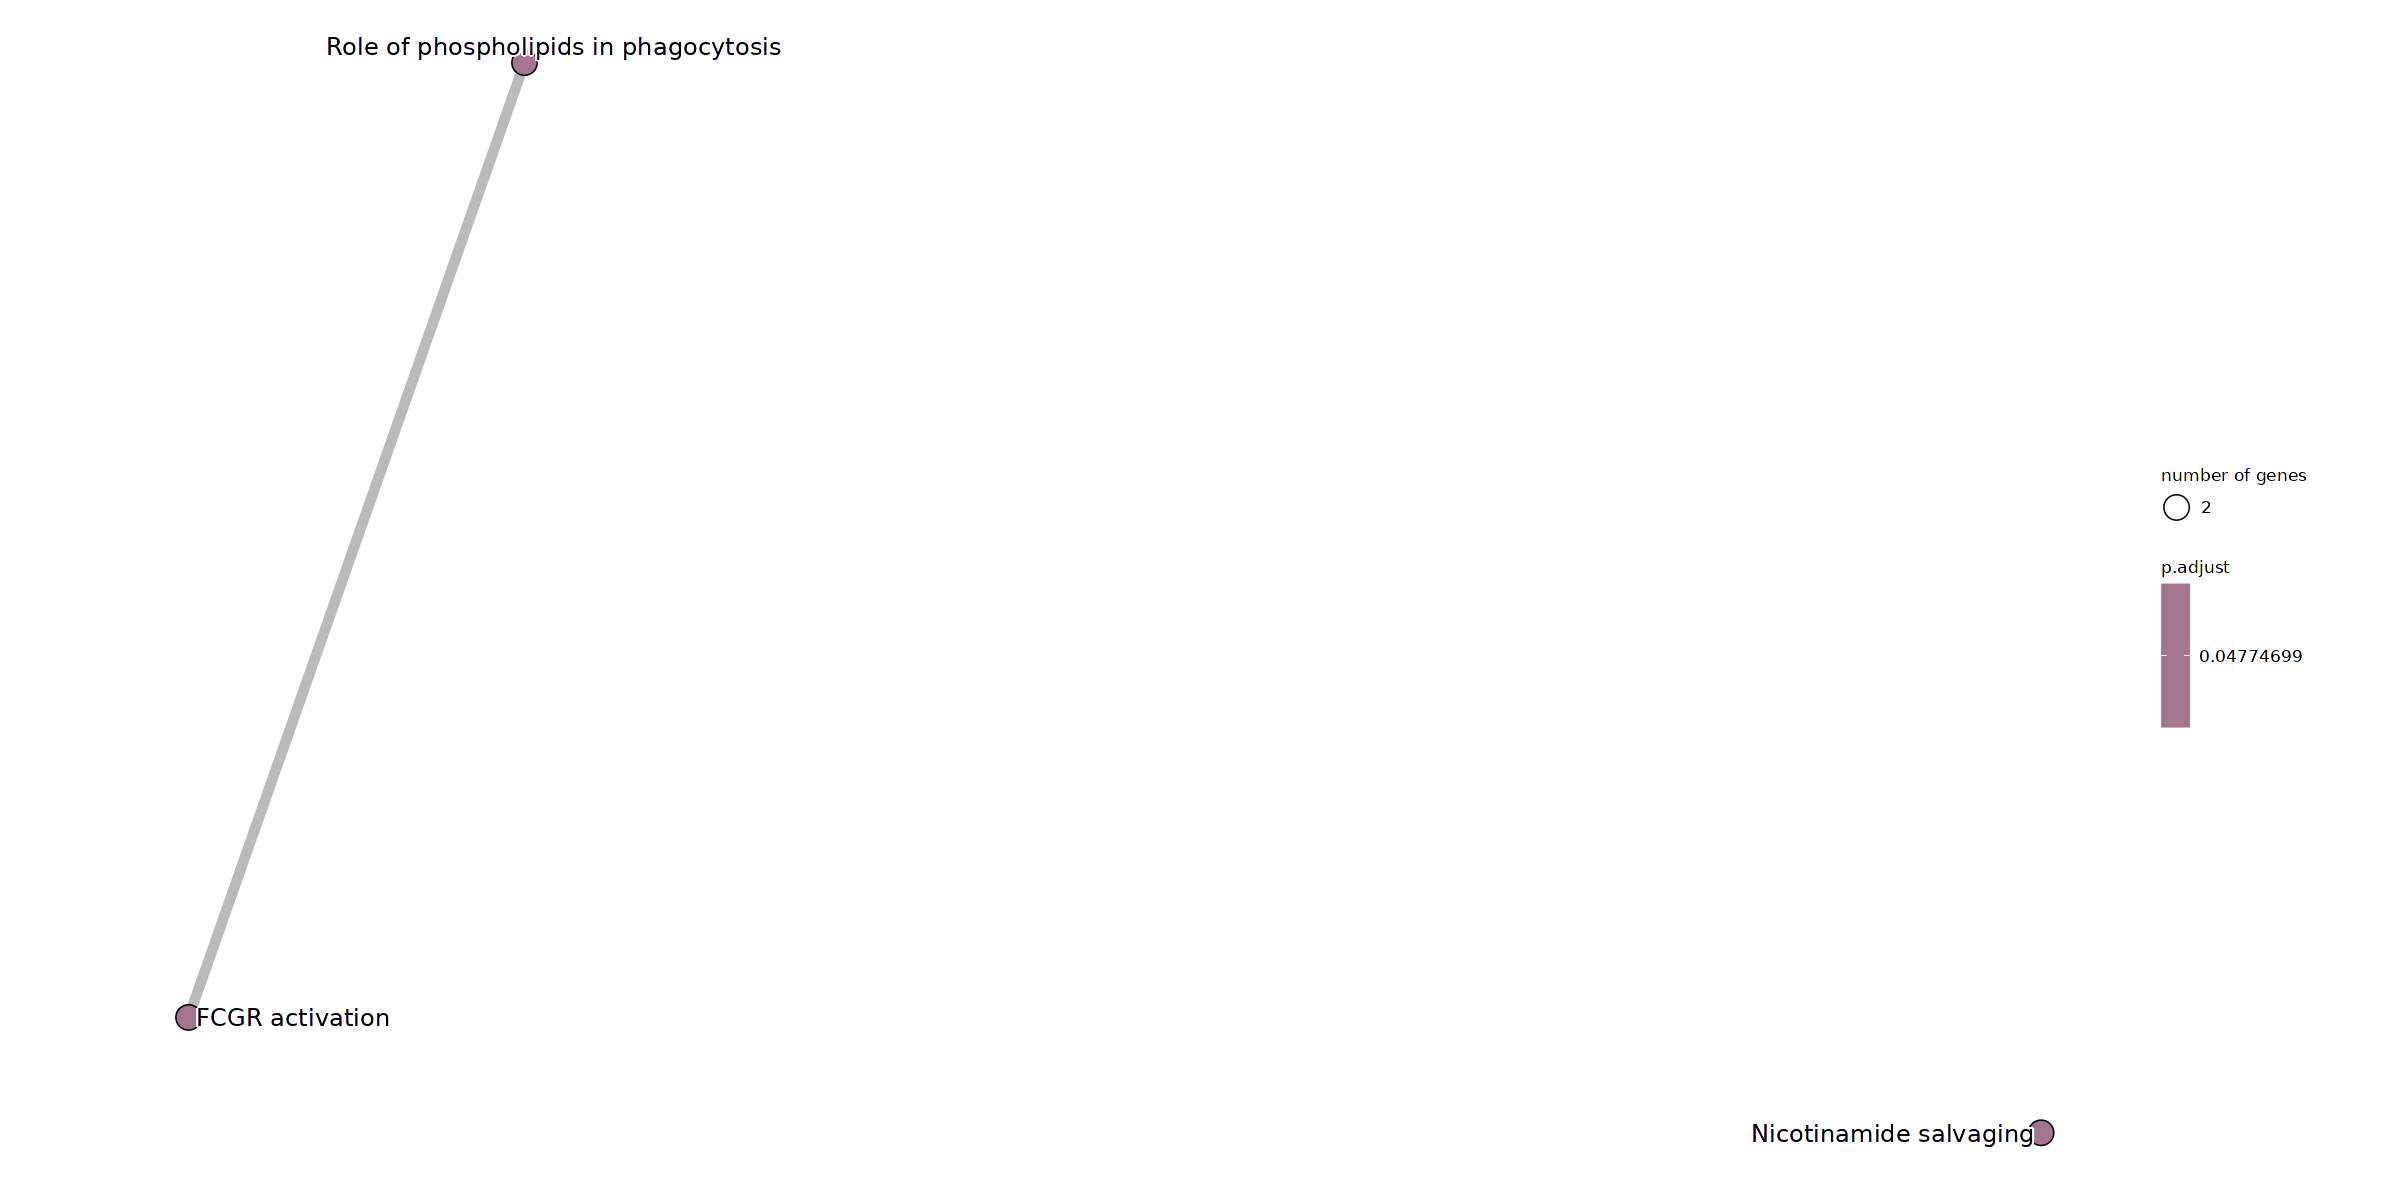

In [220]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

In [221]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [222]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:48] "17472" "100702" "76074" "238393" "22436" "236573" "15446" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...123 enriched terms found
'data.frame':	123 obs. of  9 variables:
 $ ID         : chr  "R-MMU-2029481" "R-MMU-197264" "R-MMU-2029485" "R-MMU-196807" ...
 $ Description: chr  "FCGR activation" "Nicotinamide salvaging" "Role of phospholipids in phagocytosis" "Nicotinate metabolism" ...
 $ GeneRatio  : chr  "2/21" "2/21" "2/21" "2/21" ...
 $ BgRatio    : chr  "13/8582" "18/8582" "21/8582" "30/8582" ...
 $ pvalue     : num  0.000438 0.000852 0.001165 0.002381 0.007833 ...
 $ p.adjust   : num  0.0477 0.0477 0.0477 0.0732 0.1927 ...
 $ qvalue     : num  0.0392 0.0392 0.0392 0.0601 0.1583 ...
 $ geneID     : chr  "Fcgr2b/Syk" "Parp9/Parp14" "Fcgr2b/Syk" "Parp9/Parp14" ...
 $ Count      : int  2 2 2 2 2 2 1 1 1 1 ...
#...Citation
  Guangchuang Yu, Qing-Yu He

In [223]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_OPC_",highest_cat,".csv"), row.names=FALSE)

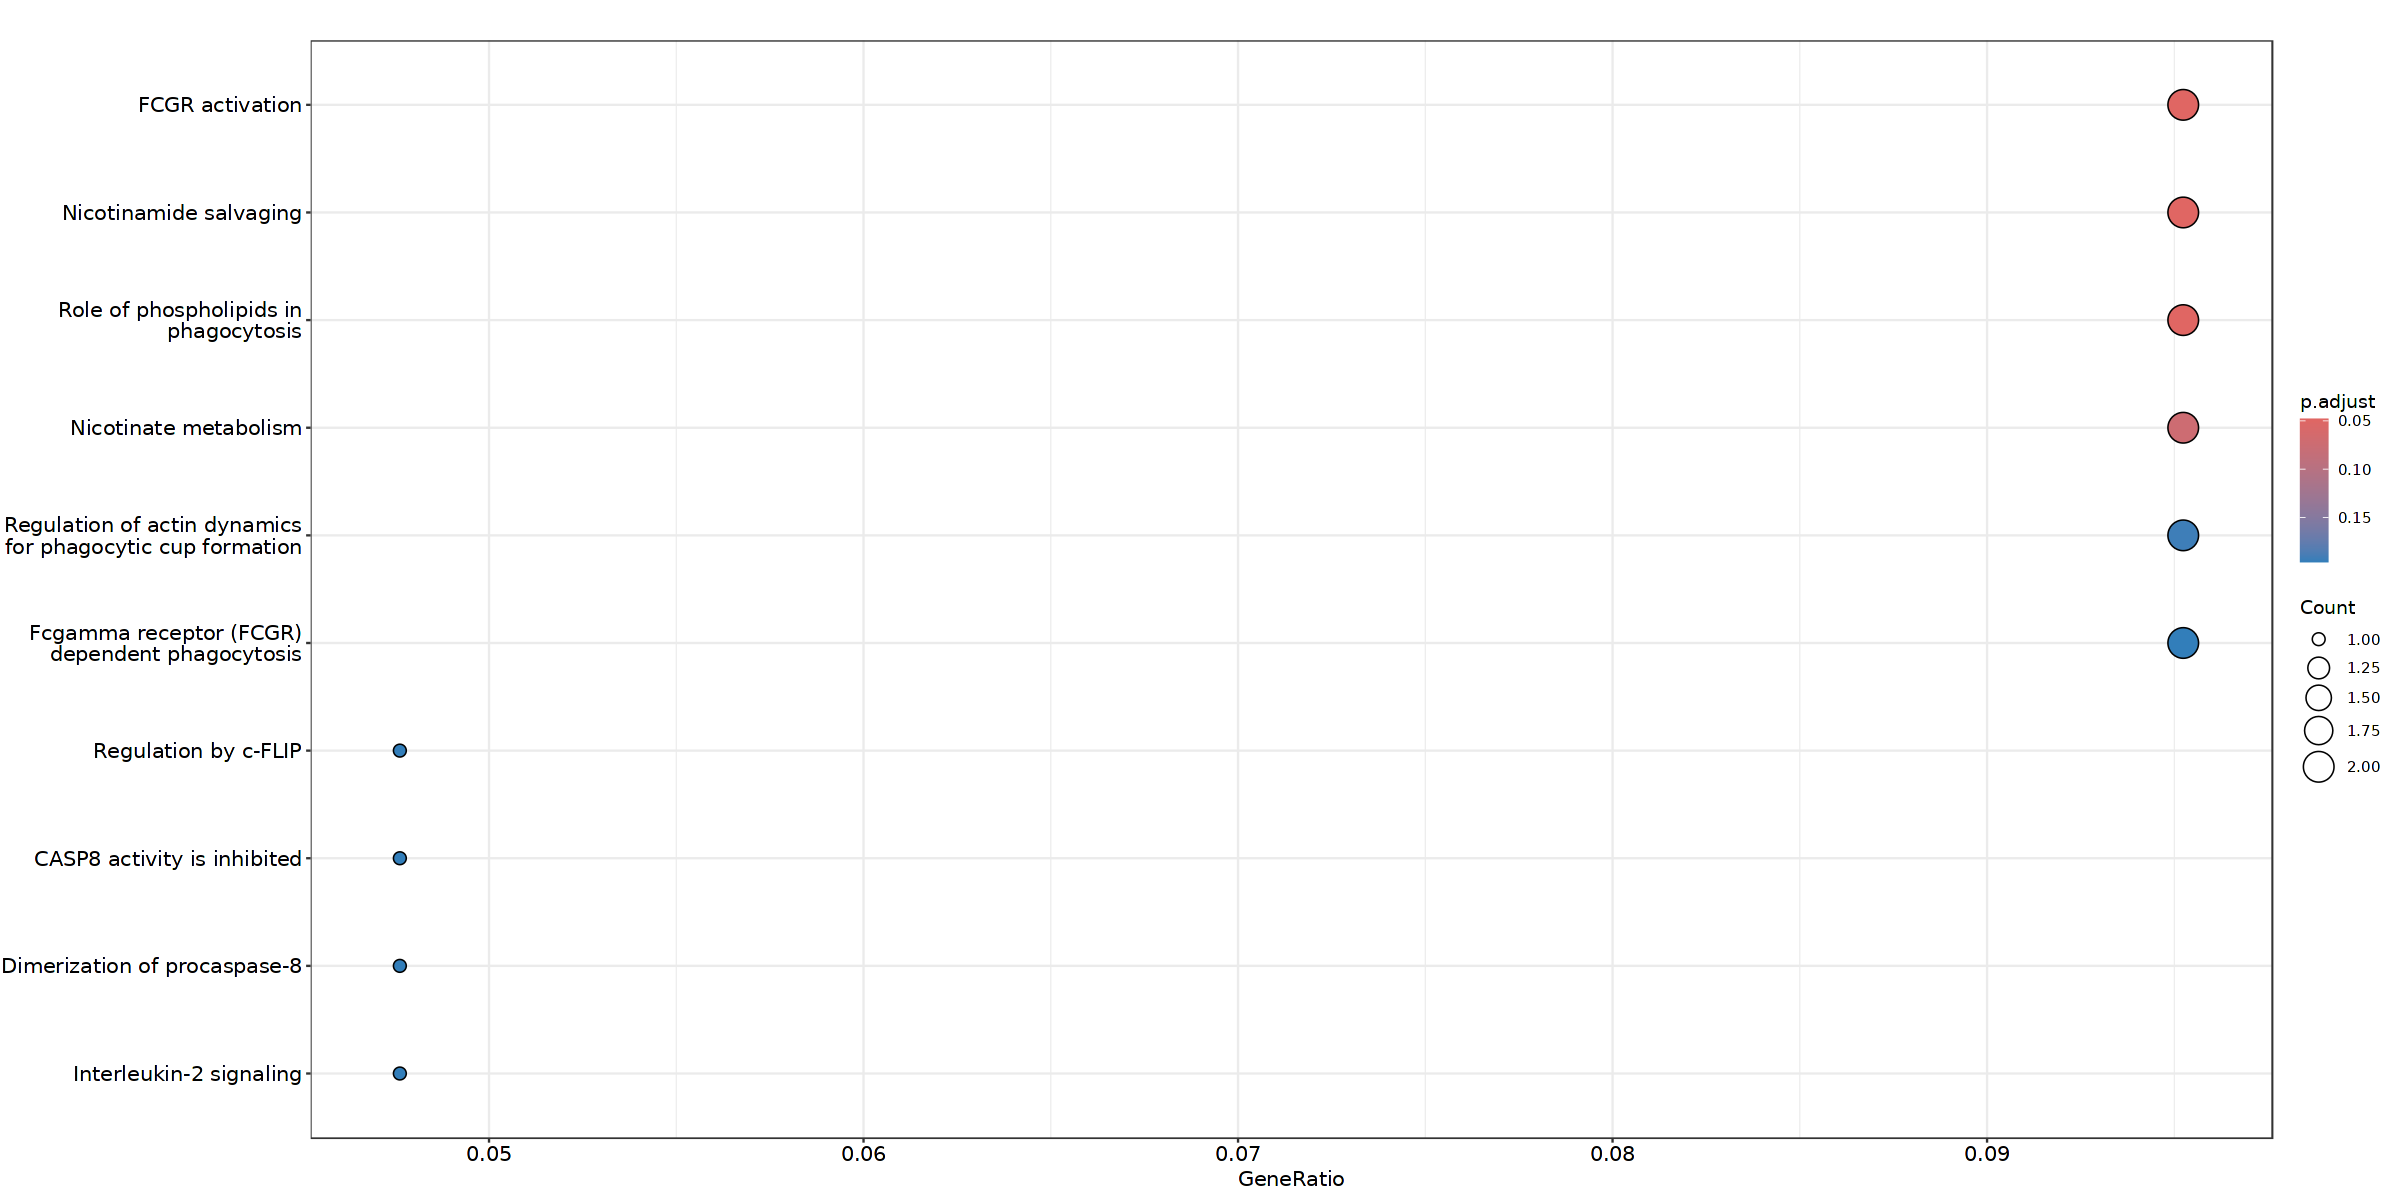

In [388]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [389]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

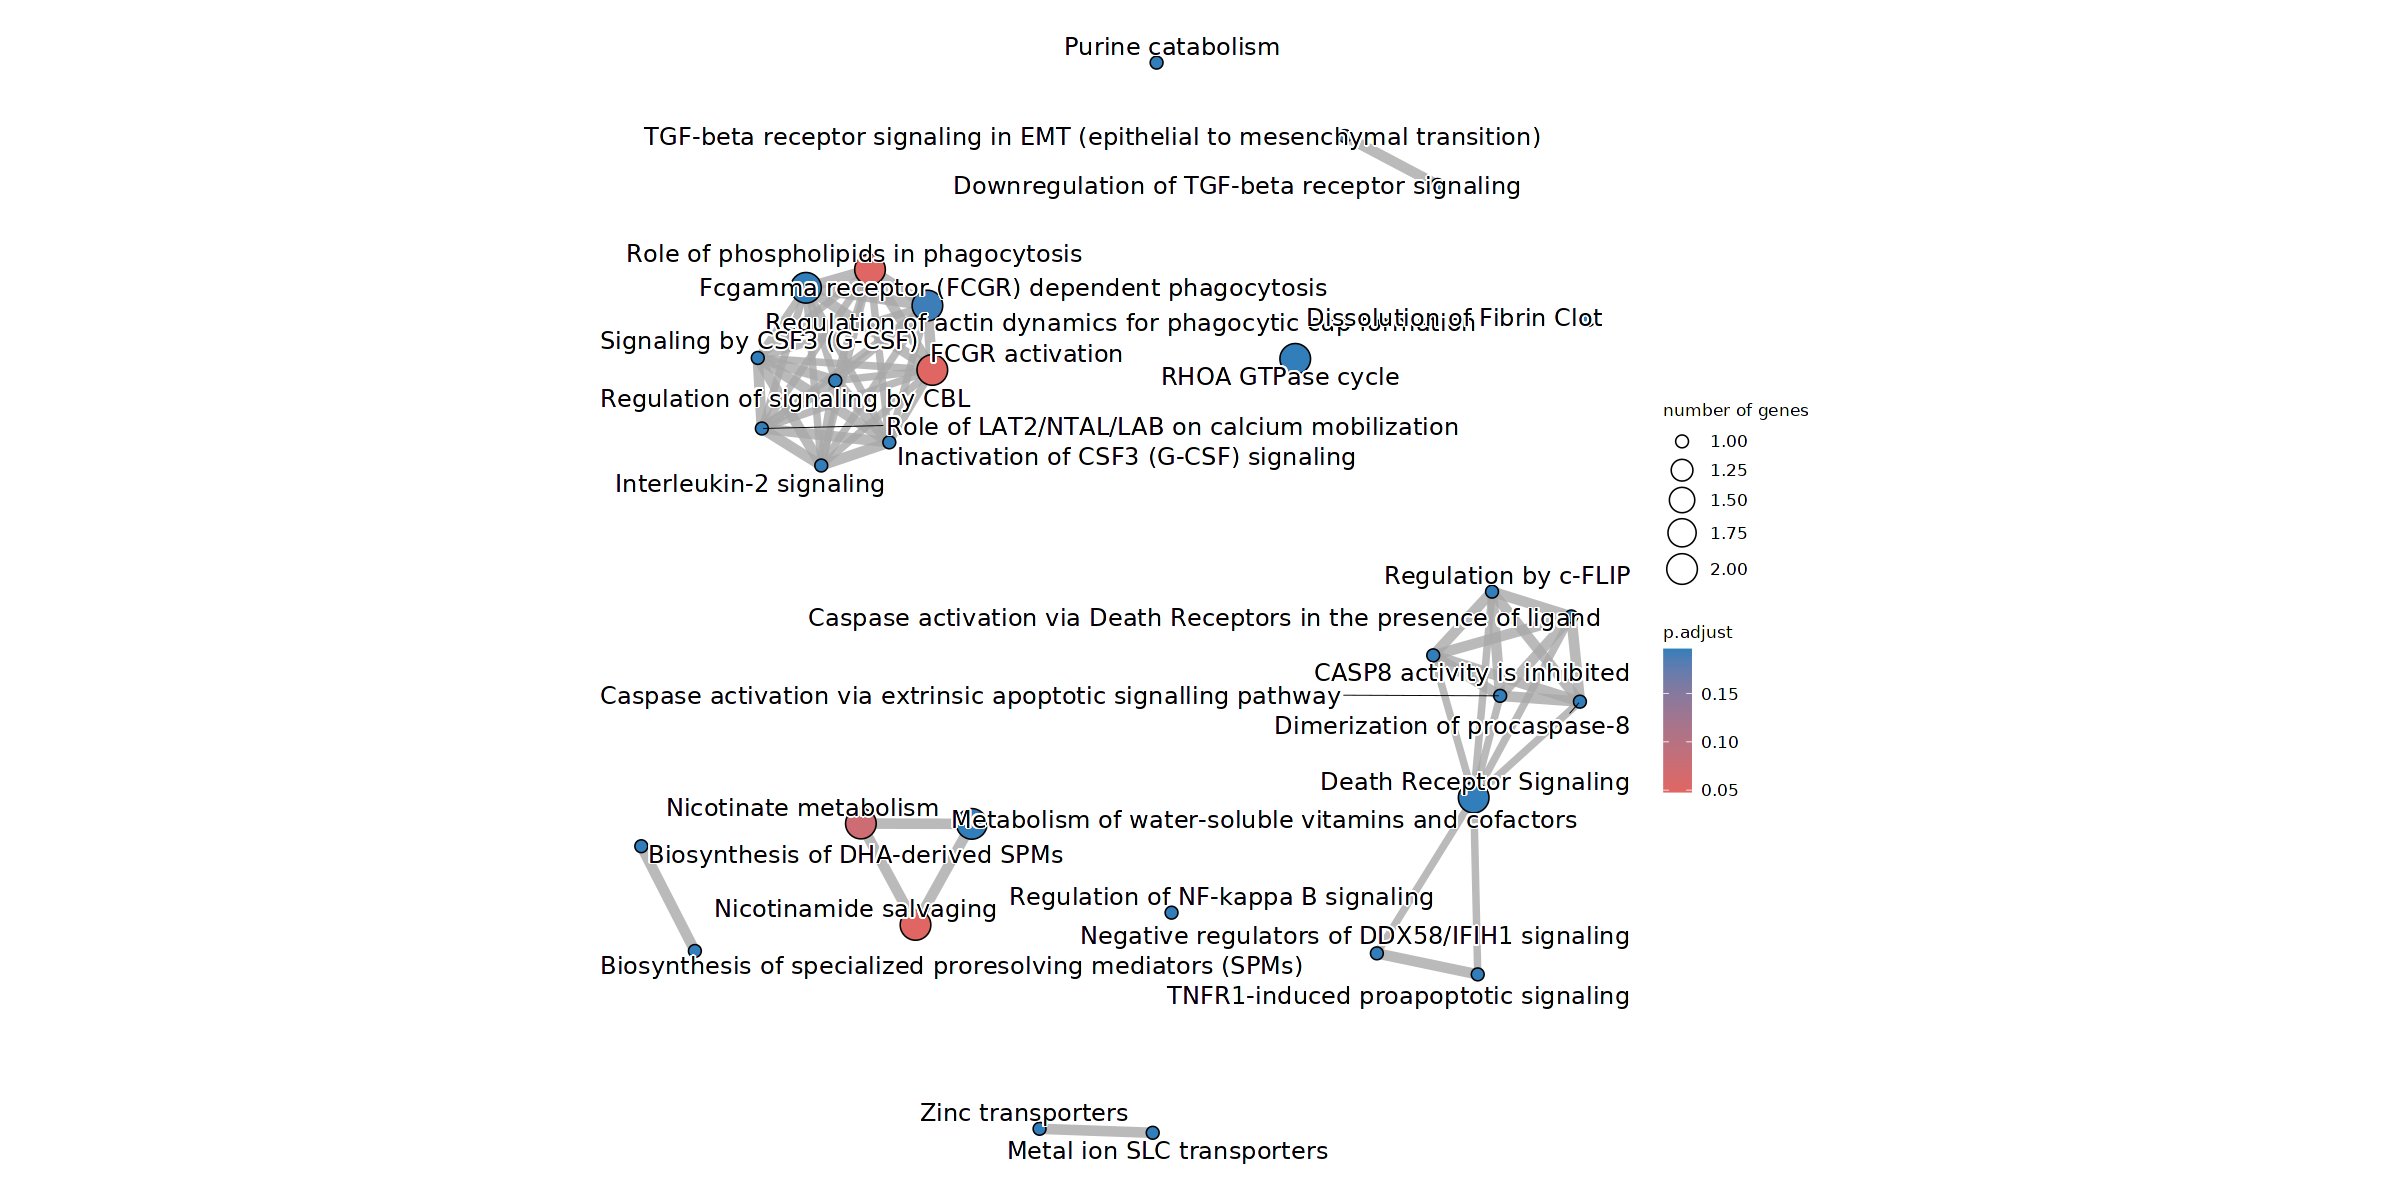

In [390]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Category 4

In [391]:
highest_cat <- "Late"

In [392]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [393]:
length(gene_list)

[1] 0

##### Sub category 1

In [394]:
highest_cat <- "Ctrl"
second_highest_cat <- "Early"

In [395]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [396]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [397]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [398]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [399]:
length(gene_list)

[1] 0

##### Sub category 2

In [400]:
highest_cat <- "Ctrl"
second_highest_cat <- "Peak"

In [401]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [402]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [403]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [404]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [405]:
length(gene_list)

[1] 0

##### Sub category 3

In [406]:
highest_cat <- "Ctrl"
second_highest_cat <- "Late"

In [407]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [408]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [409]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [410]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [411]:
length(gene_list)

[1] 0

##### Sub category 4

In [412]:
highest_cat <- "Early"
second_highest_cat <- "Ctrl"

In [413]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [414]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [415]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [416]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [417]:
length(gene_list)

[1] 0

##### Sub category 5

In [224]:
highest_cat <- "Early"
second_highest_cat <- "Peak"

In [225]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [226]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [227]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [228]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [229]:
length(gene_list)

[1] 3

In [230]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [231]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [232]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [233]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [234]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [235]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [236]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [237]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:3] "16369" "22779" "20423"
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...4 enriched terms found
'data.frame':	4 obs. of  9 variables:
 $ ID         : chr  "R-MMU-5635838" "R-MMU-5358346" "R-MMU-5632684" "R-MMU-5358351"
 $ Description: chr  "Activation of SMO" "Hedgehog ligand biogenesis" "Hedgehog 'on' state" "Signaling by Hedgehog"
 $ GeneRatio  : chr  "1/1" "1/1" "1/1" "1/1"
 $ BgRatio    : chr  "13/8582" "63/8582" "81/8582" "138/8582"
 $ pvalue     : num  0.00151 0.00734 0.00944 0.01608
 $ p.adjust   : num  0.00606 0.01258 0.01258 0.01608
 $ qvalue     : logi  NA NA NA NA
 $ geneID     : chr  "Shh" "Shh" "Shh" "Shh"
 $ Count      : int  1 1 1 1
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


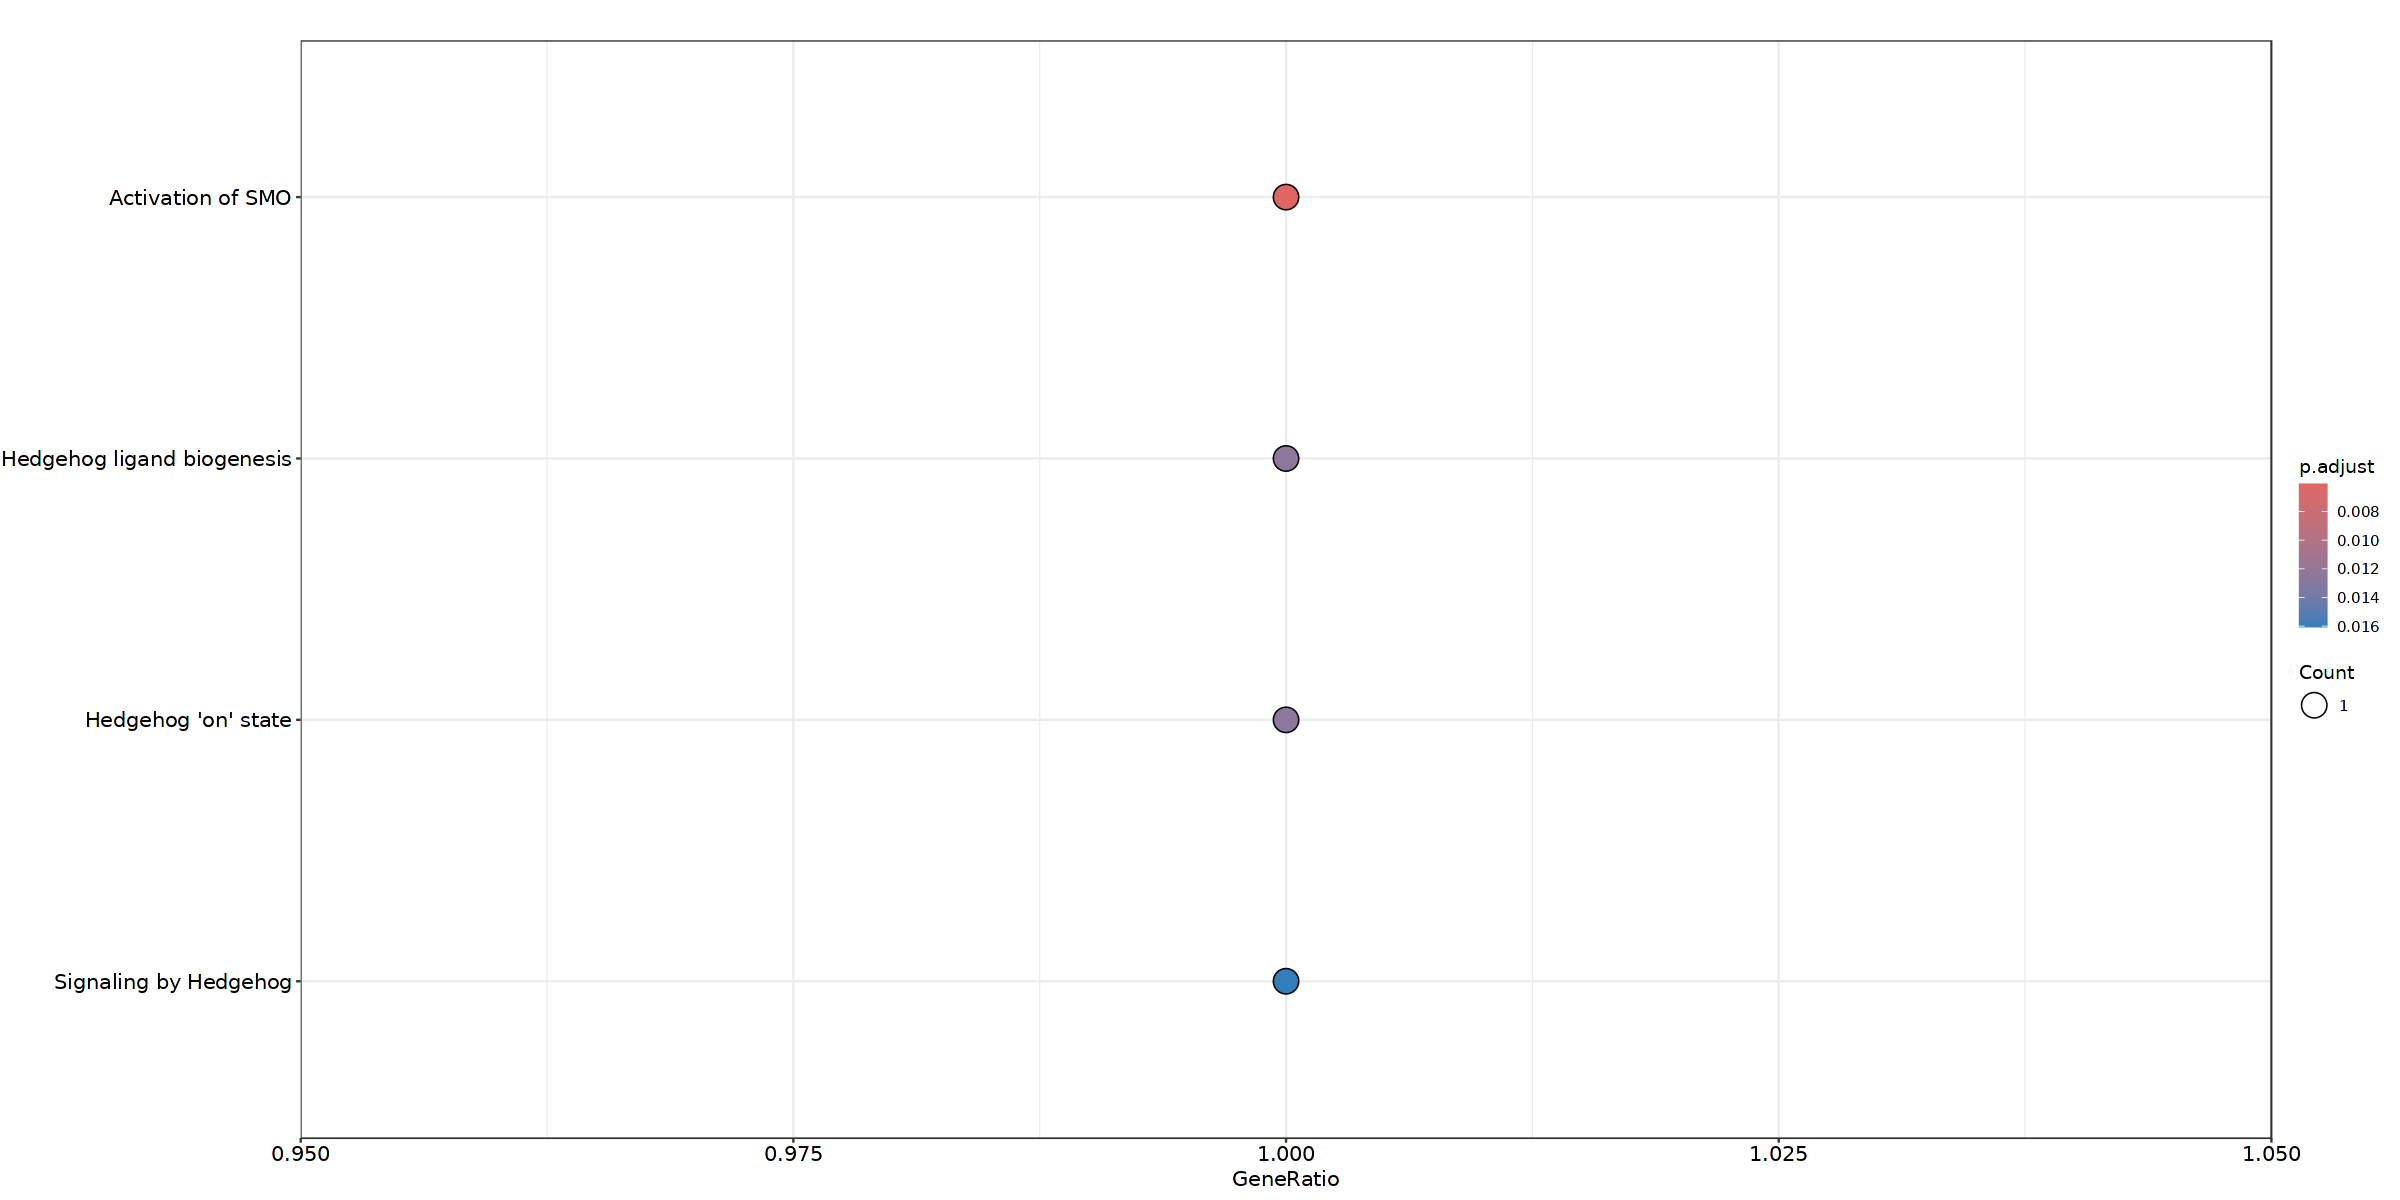

In [238]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [239]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

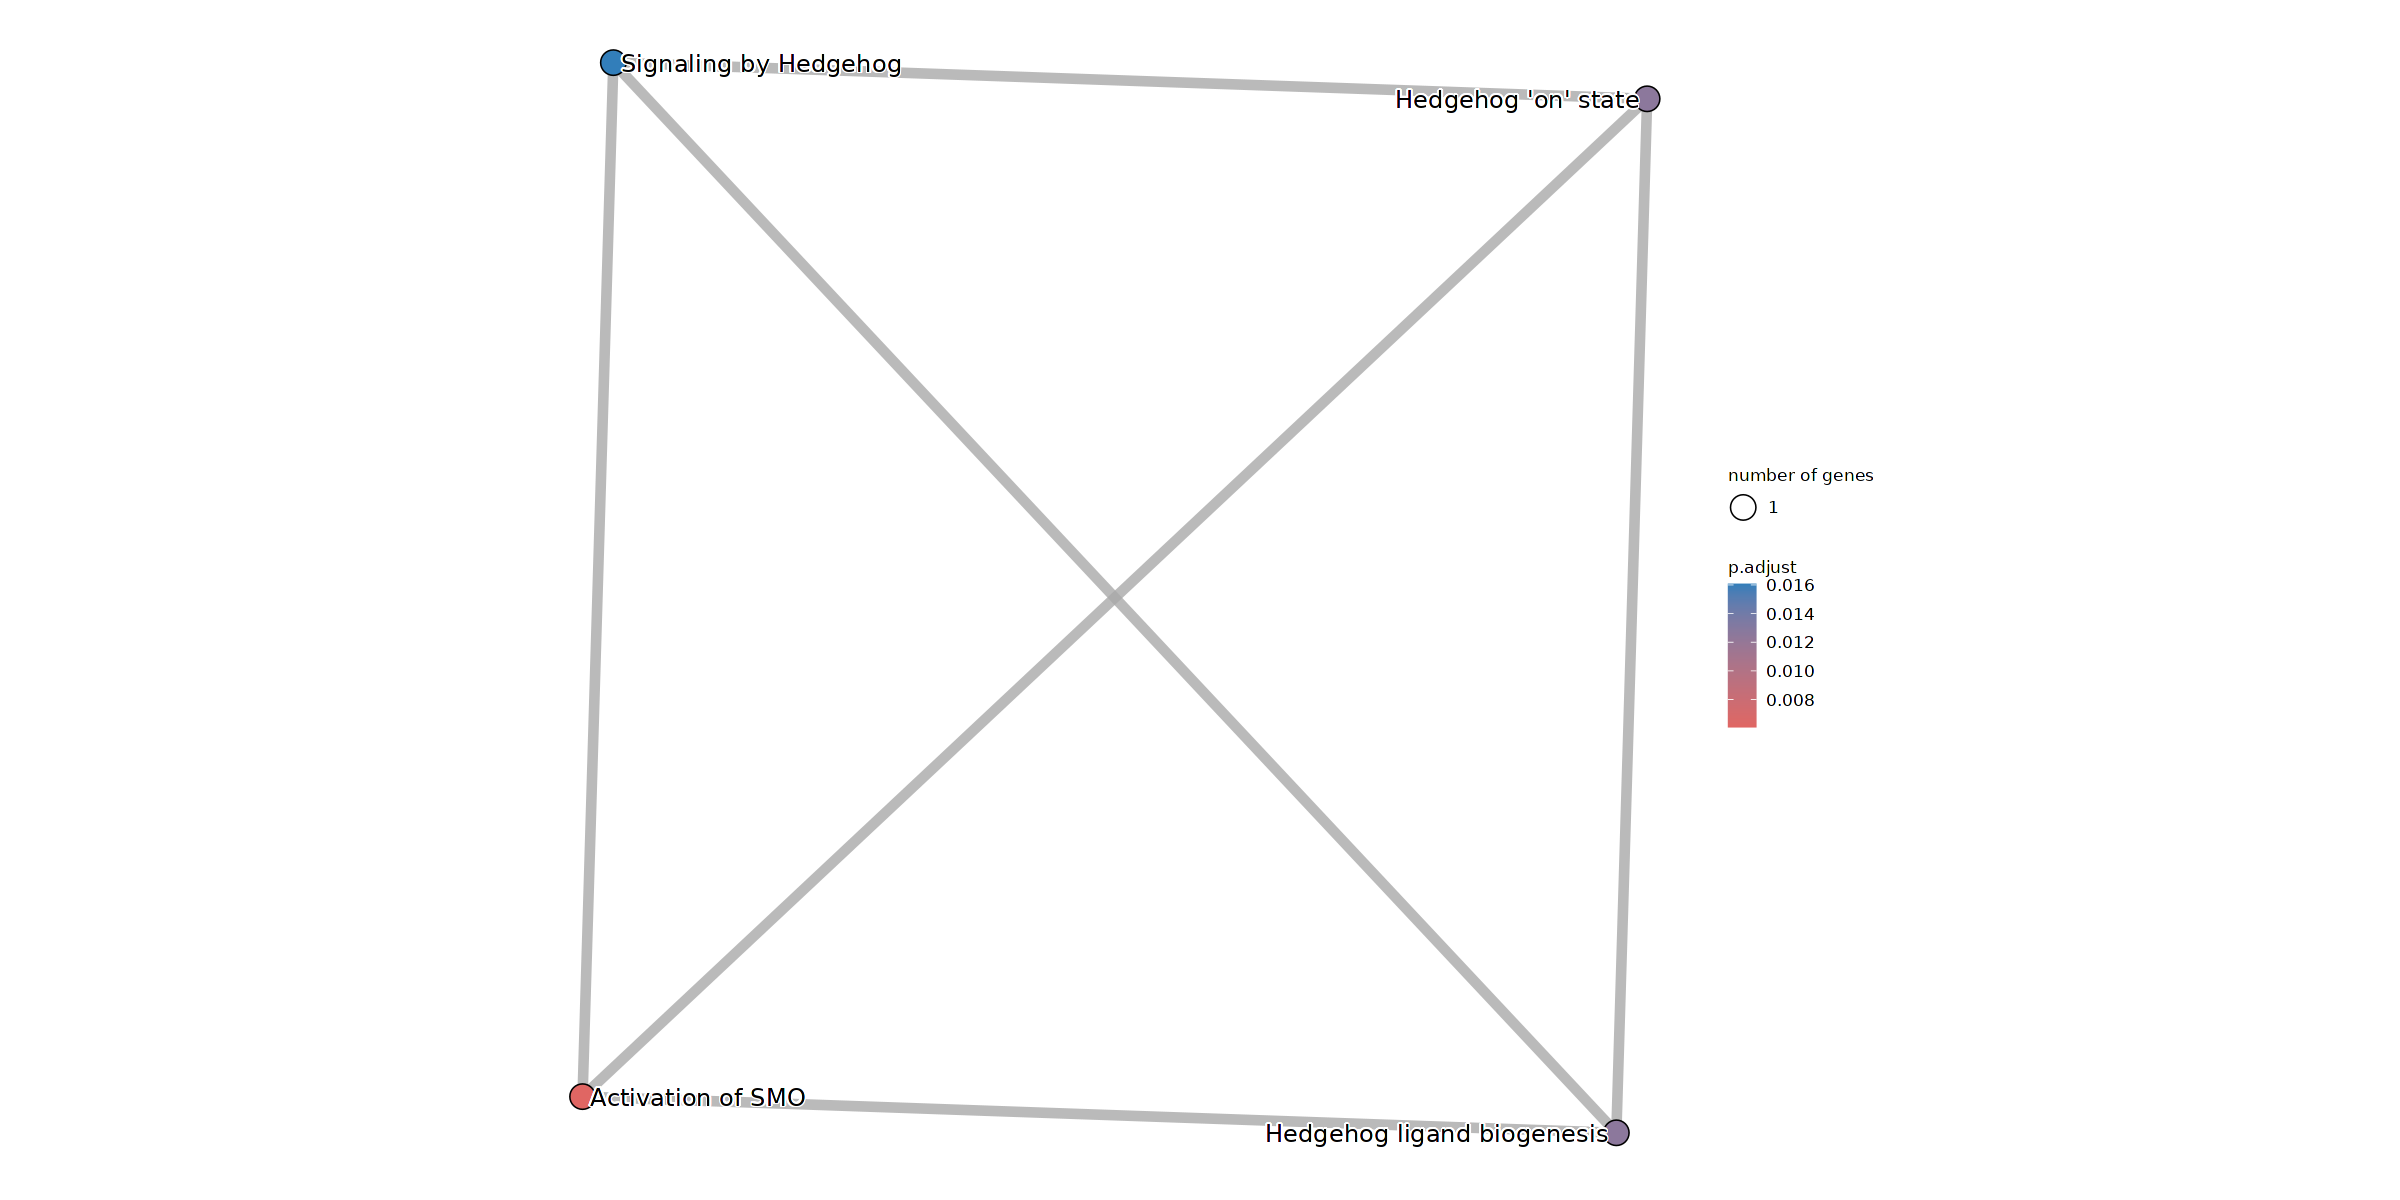

In [240]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

In [241]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [242]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:3] "16369" "22779" "20423"
#...pvalues adjusted by 'fdr' with cutoff <1 
#...4 enriched terms found
'data.frame':	4 obs. of  9 variables:
 $ ID         : chr  "R-MMU-5635838" "R-MMU-5358346" "R-MMU-5632684" "R-MMU-5358351"
 $ Description: chr  "Activation of SMO" "Hedgehog ligand biogenesis" "Hedgehog 'on' state" "Signaling by Hedgehog"
 $ GeneRatio  : chr  "1/1" "1/1" "1/1" "1/1"
 $ BgRatio    : chr  "13/8582" "63/8582" "81/8582" "138/8582"
 $ pvalue     : num  0.00151 0.00734 0.00944 0.01608
 $ p.adjust   : num  0.00606 0.01258 0.01258 0.01608
 $ qvalue     : logi  NA NA NA NA
 $ geneID     : chr  "Shh" "Shh" "Shh" "Shh"
 $ Count      : int  1 1 1 1
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


In [243]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_OPC_",highest_cat,"_",second_highest_cat,".csv"), row.names=FALSE)

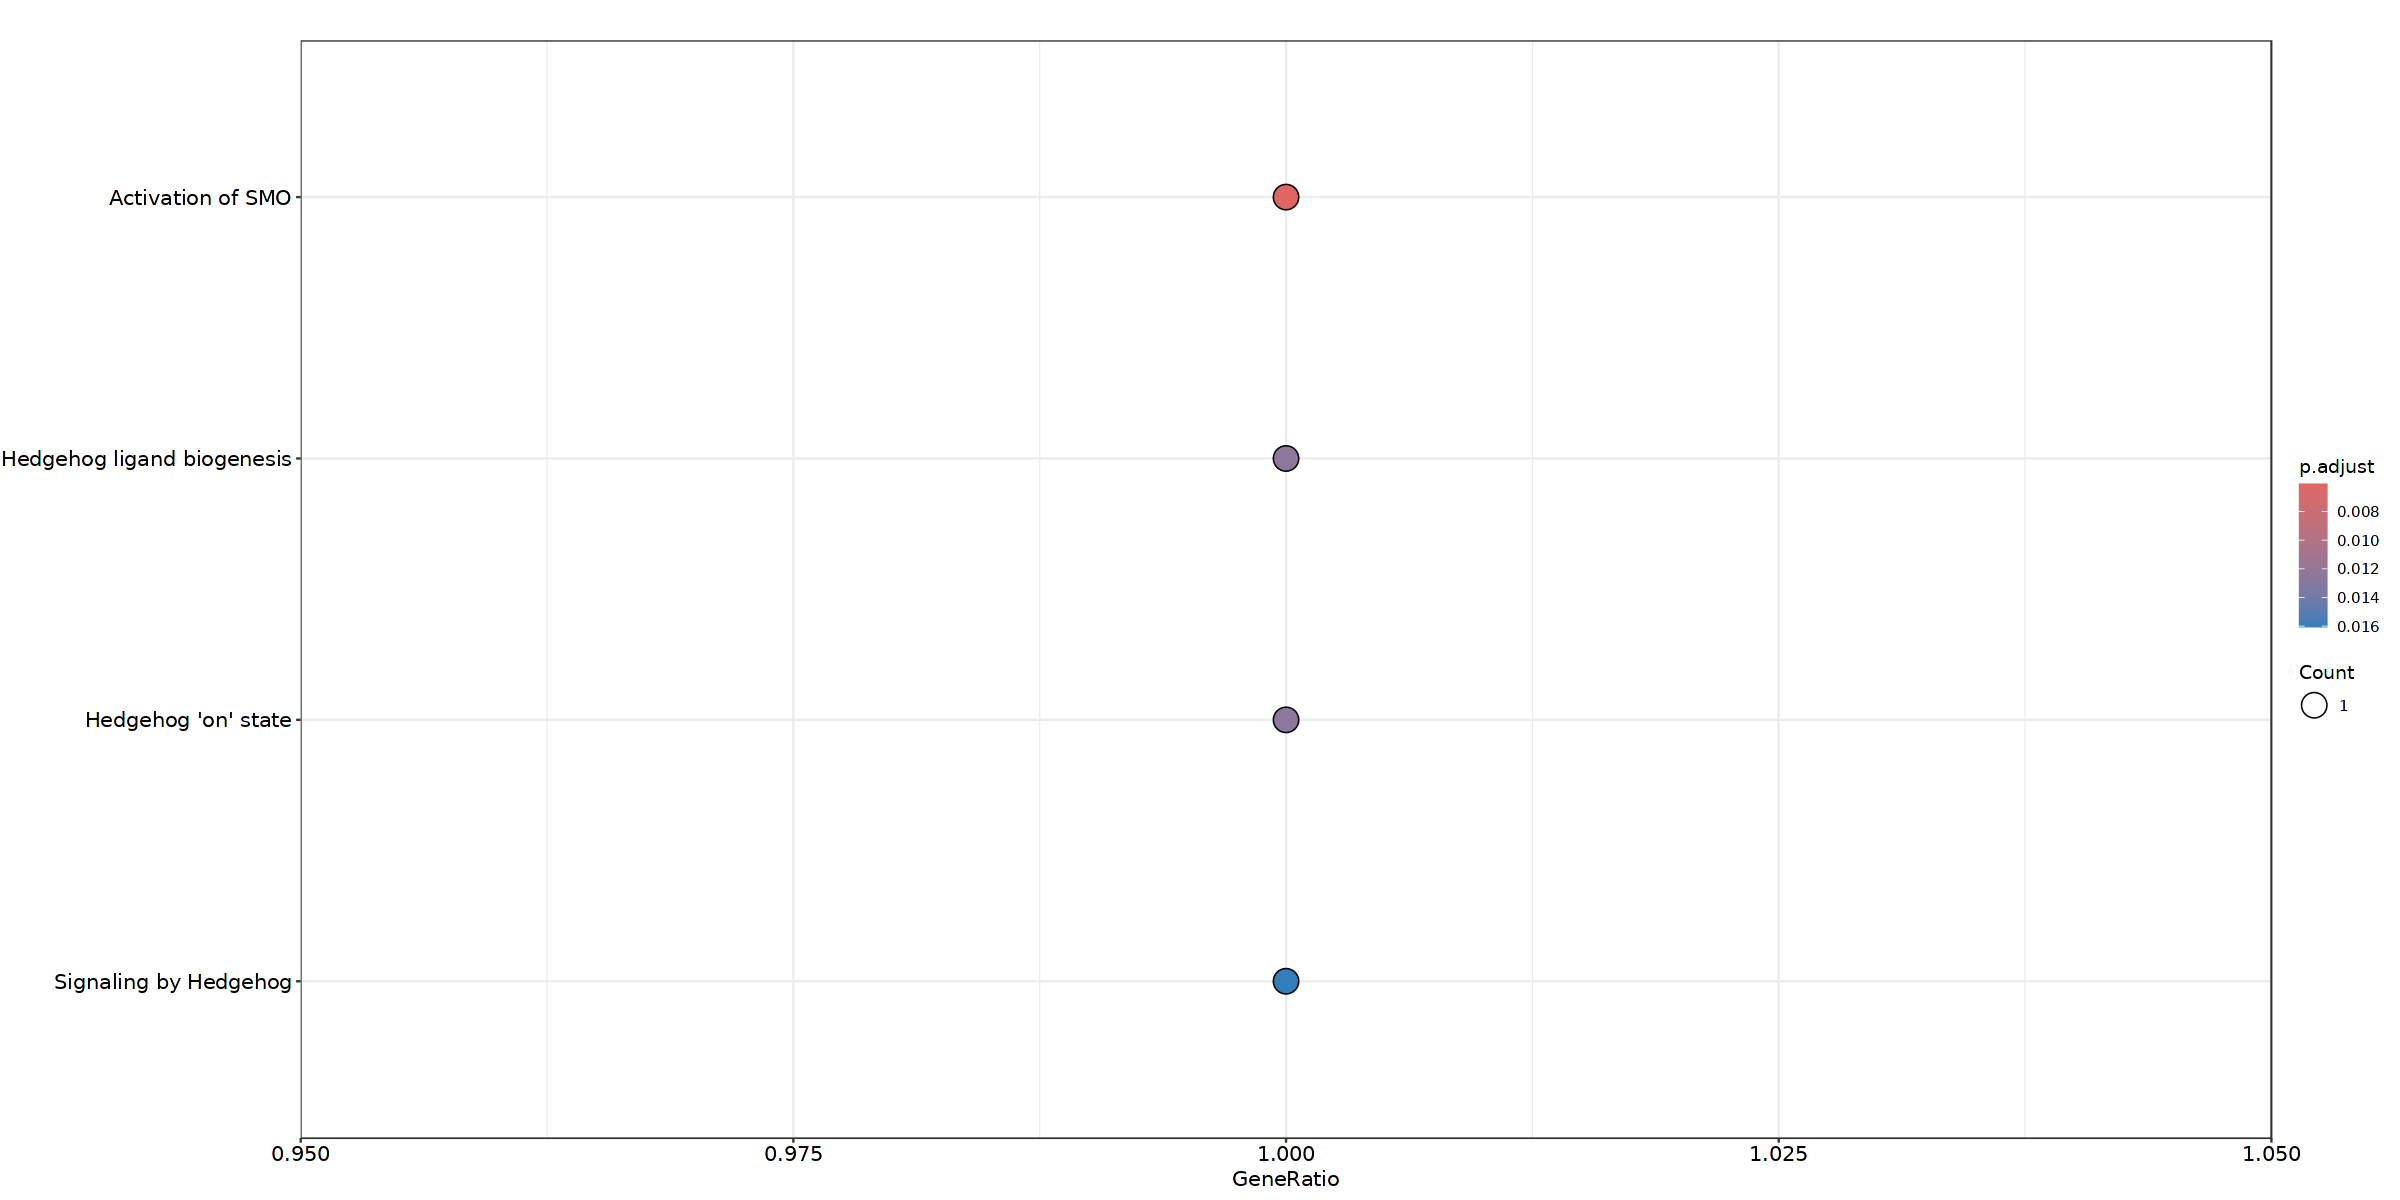

In [439]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [440]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

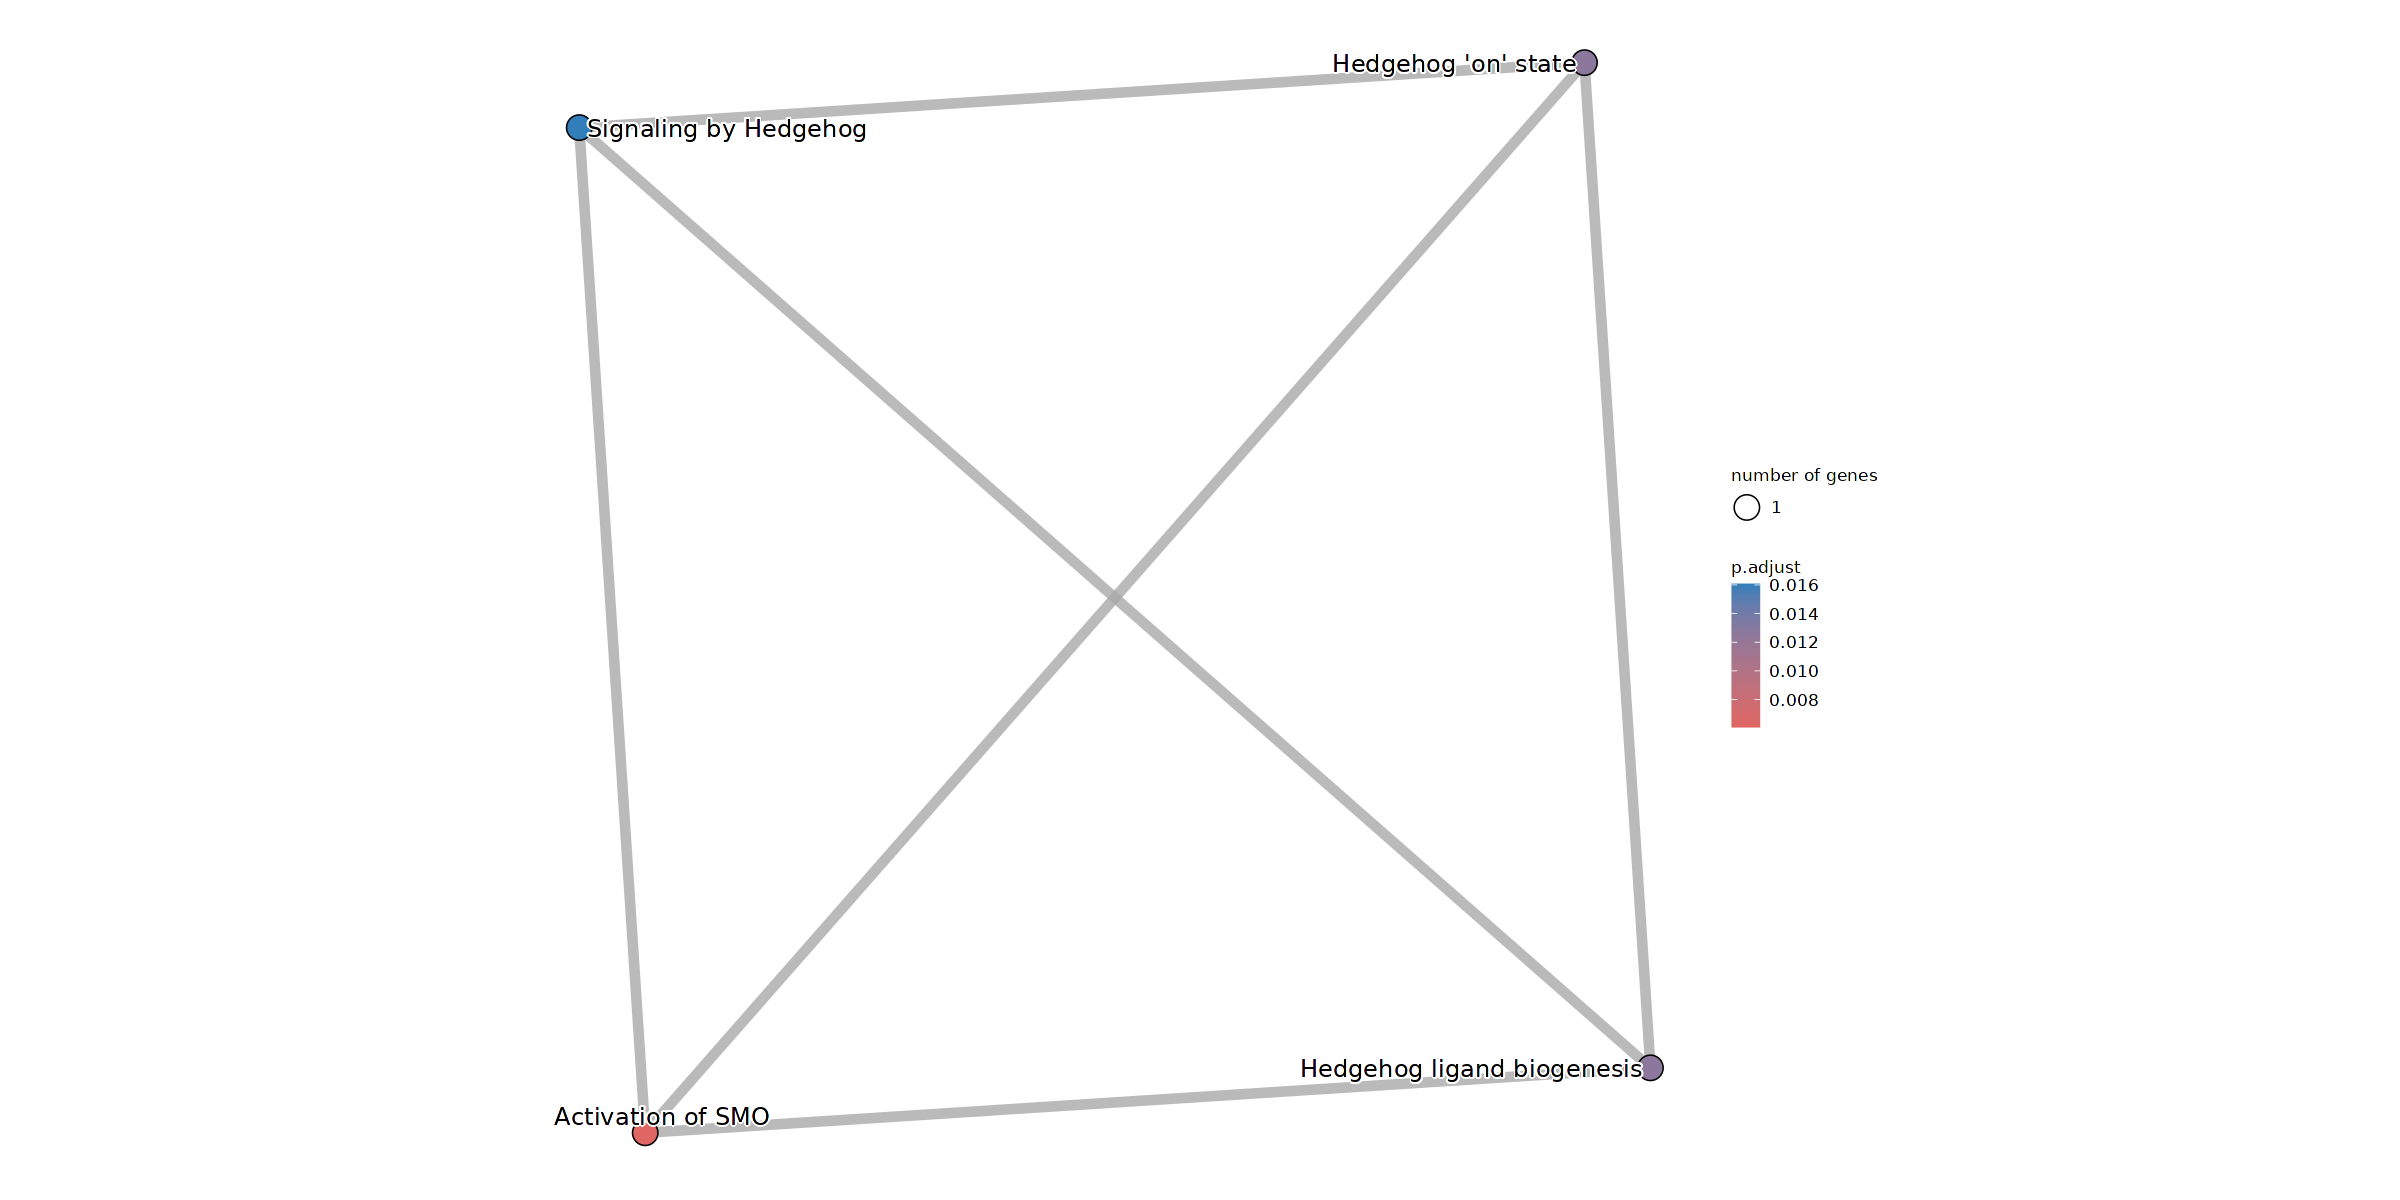

In [441]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Sub category 6

In [442]:
highest_cat <- "Early"
second_highest_cat <- "Late"

In [443]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [444]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [445]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [446]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [447]:
length(gene_list)

[1] 0

##### Sub category 7

In [448]:
highest_cat <- "Peak"
second_highest_cat <- "Ctrl"

In [449]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [450]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [451]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [452]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [453]:
length(gene_list)

[1] 0

##### Sub category 8

In [244]:
highest_cat <- "Peak"
second_highest_cat <- "Early"

In [245]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [246]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [247]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [248]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [249]:
length(gene_list)

[1] 27

In [250]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [251]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [252]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [253]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [254]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [255]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [256]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [257]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:27] "238393" "236573" "15446" "100039796" "245240" "15953" "15944" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...0 enriched terms found
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


In [258]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [259]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:27] "238393" "236573" "15446" "100039796" "245240" "15953" "15944" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...89 enriched terms found
'data.frame':	89 obs. of  9 variables:
 $ ID         : chr  "R-MMU-3371378" "R-MMU-5218900" "R-MMU-69416" "R-MMU-9020558" ...
 $ Description: chr  "Regulation by c-FLIP" "CASP8 activity is inhibited" "Dimerization of procaspase-8" "Interleukin-2 signaling" ...
 $ GeneRatio  : chr  "1/9" "1/9" "1/9" "1/9" ...
 $ BgRatio    : chr  "10/8582" "10/8582" "10/8582" "10/8582" ...
 $ pvalue     : num  0.0104 0.0104 0.0104 0.0104 0.0115 ...
 $ p.adjust   : num  0.0972 0.0972 0.0972 0.0972 0.0972 ...
 $ qvalue     : num  0.0609 0.0609 0.0609 0.0609 0.0609 ...
 $ geneID     : chr  "Tnfsf10" "Tnfsf10" "Tnfsf10" "Syk" ...
 $ Count      : int  1 1 1 1 1 1 1 1 1 1 ...
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconduct

In [260]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_OPC_",highest_cat,"_",second_highest_cat,".csv"), row.names=FALSE)

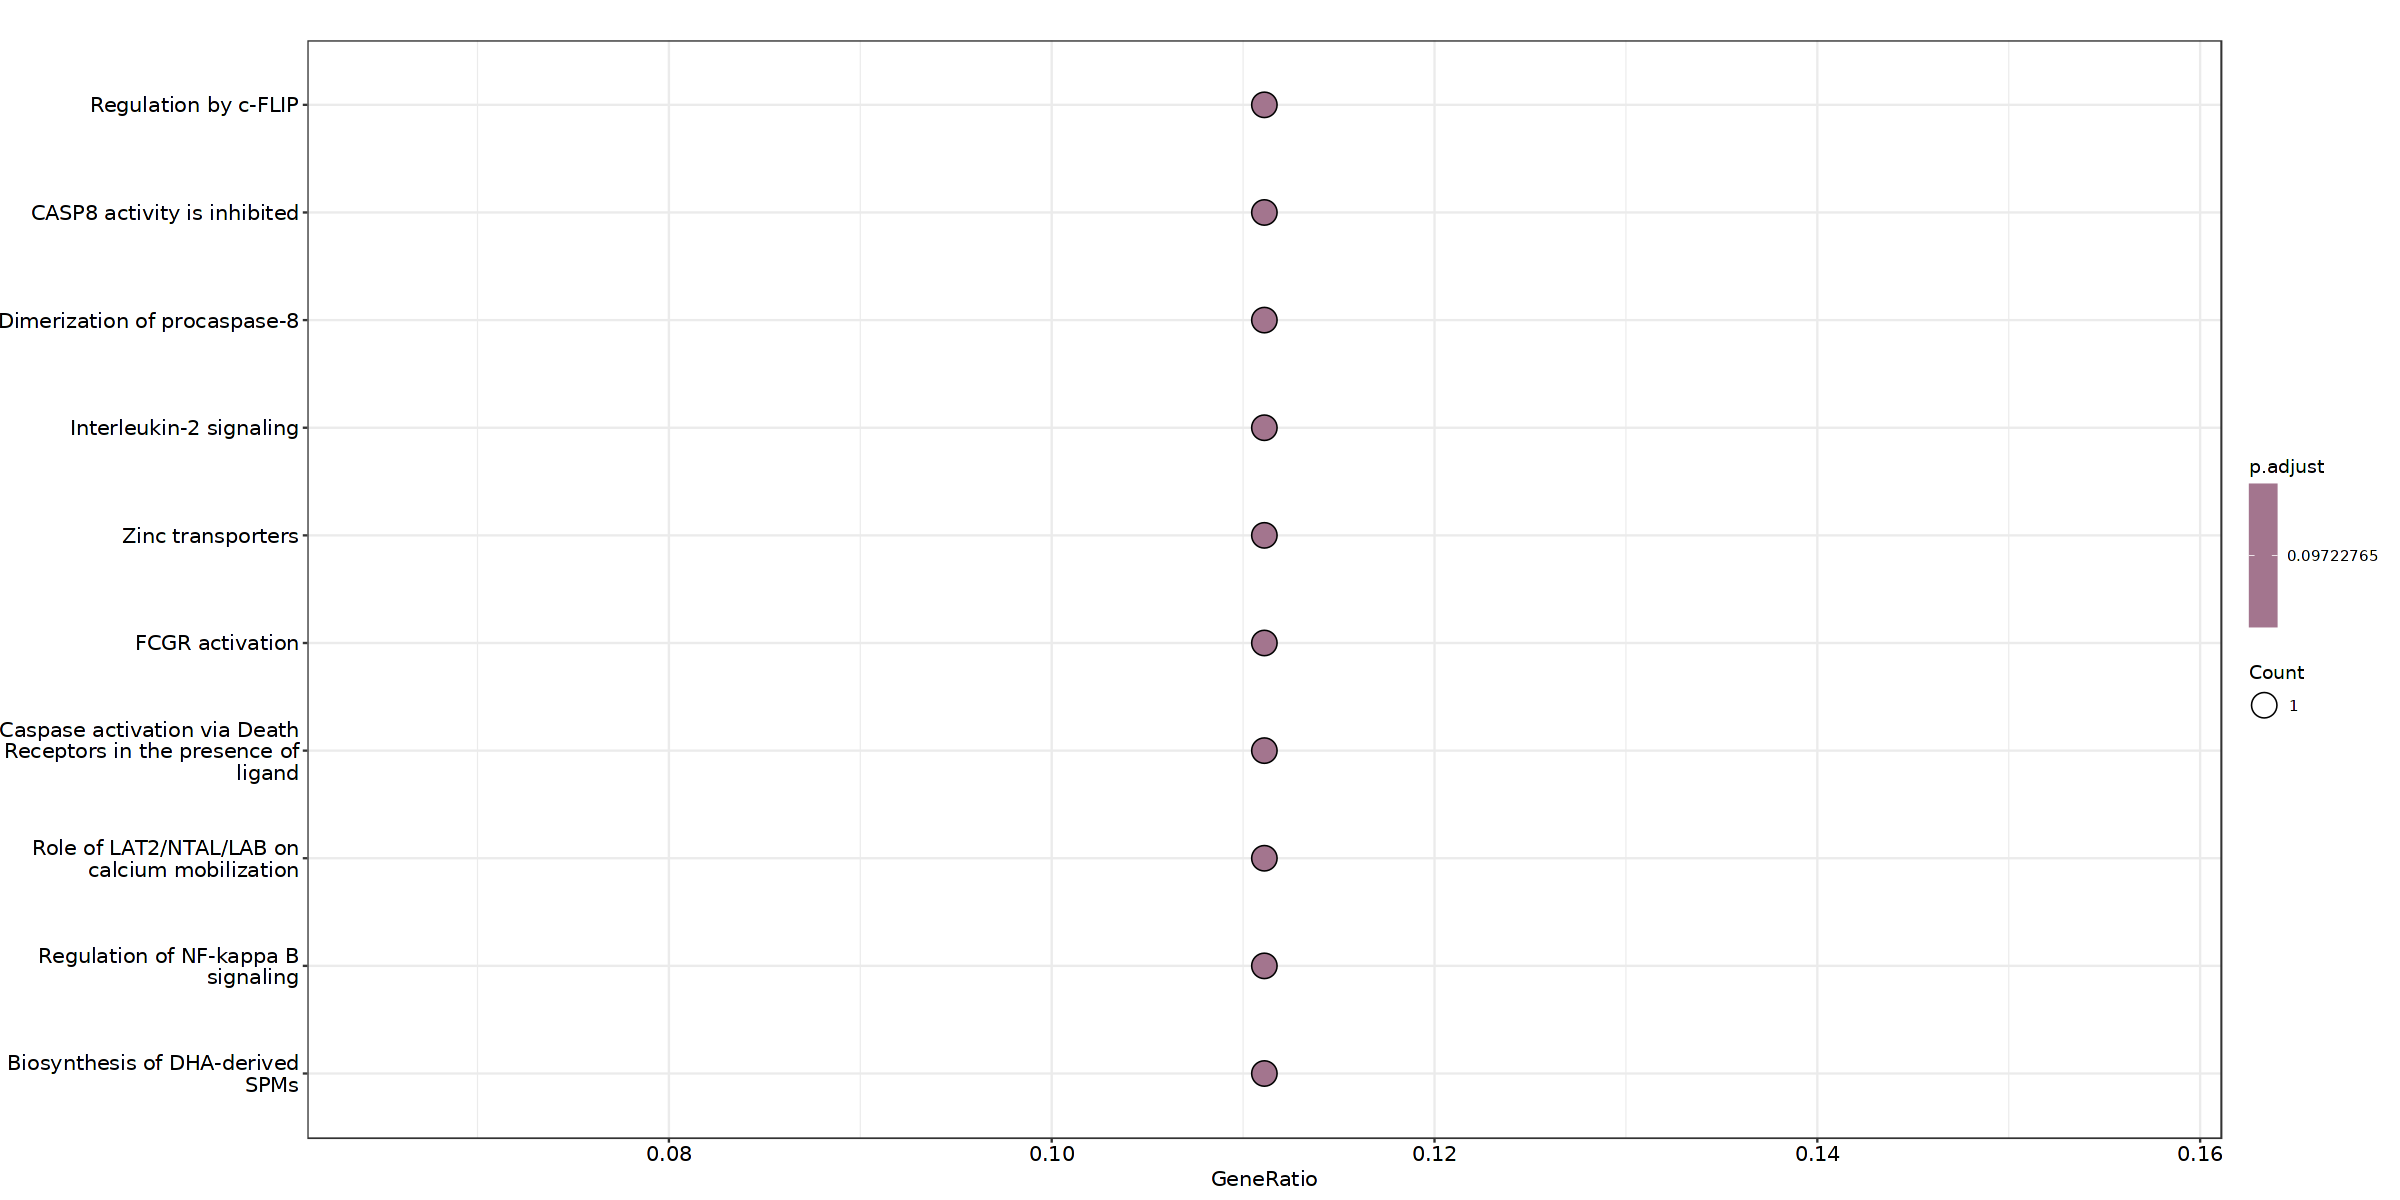

In [470]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [471]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

Warning message:
"ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


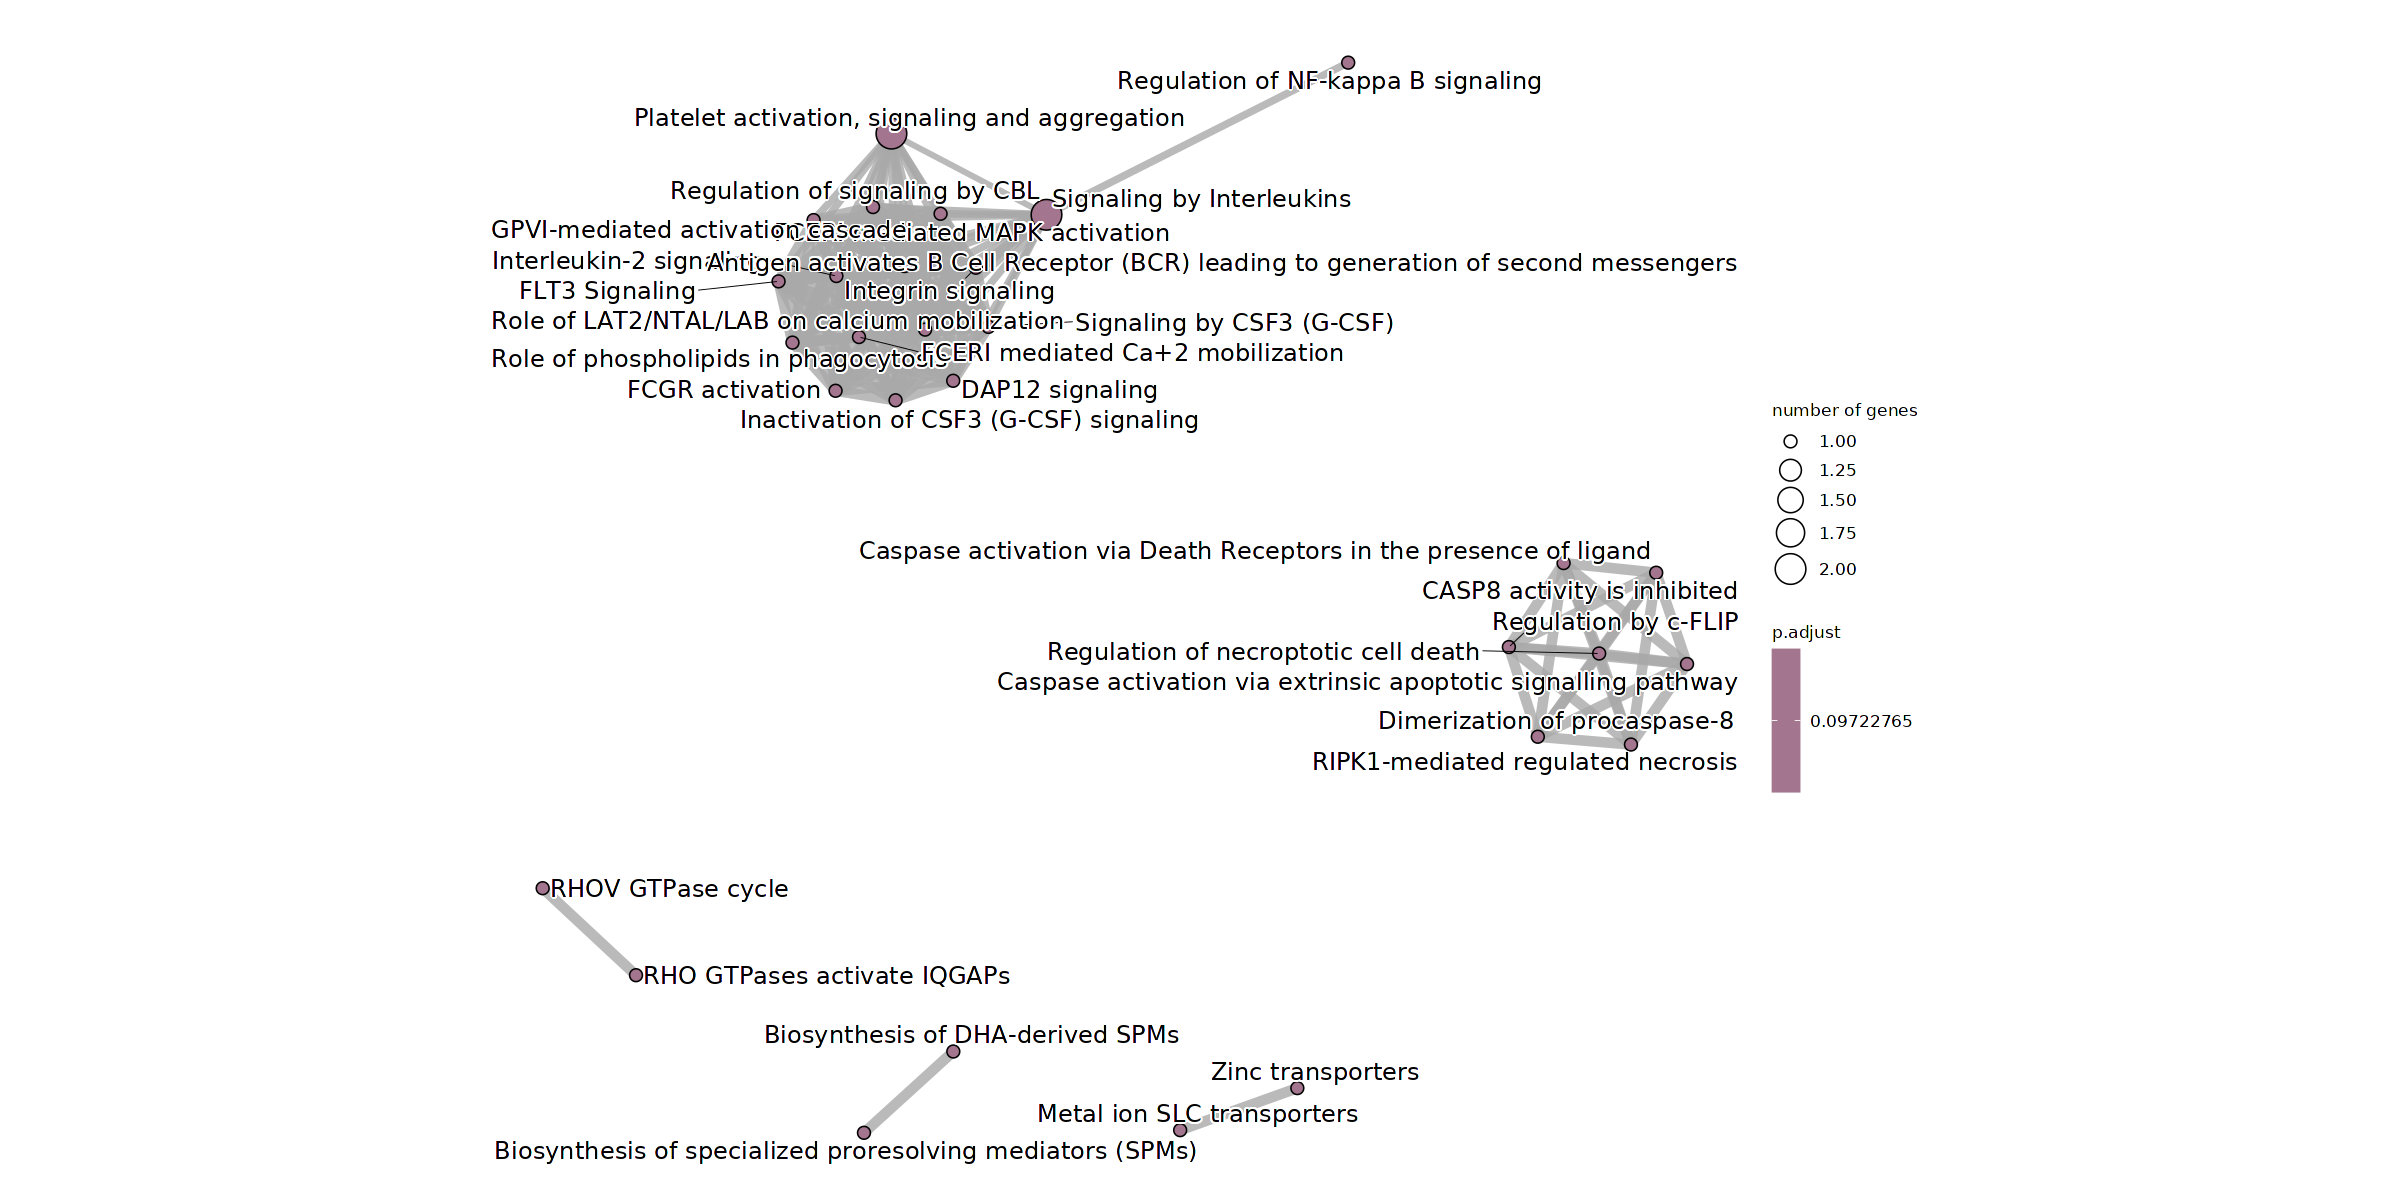

In [472]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Sub category 9

In [261]:
highest_cat <- "Peak"
second_highest_cat <- "Late"

In [262]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [263]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [264]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [265]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [266]:
length(gene_list)

[1] 22

In [267]:
top_DEG <- apply(df_dynamics_scaled[gene_list,],1,function(x){max(x)-min(x)})

In [268]:
if(length(top_DEG)>threshold_nb_genes){
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)][1:threshold_nb_genes]
} else{
    top_DEG_filtered <- top_DEG[order(top_DEG, decreasing=TRUE)]
}

In [269]:
top_DEG_filtered_names <- names(top_DEG_filtered)

In [270]:
entrezmatched <- entrezID[match(top_DEG_filtered_names,entrezID$mgi_symbol),]

In [271]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [272]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [273]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

In [274]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:21] "17472" "100702" "76074" "22436" "20194" "14130" "268970" ...
#...pvalues adjusted by 'fdr' with cutoff <0.05 
#...2 enriched terms found
'data.frame':	2 obs. of  9 variables:
 $ ID         : chr  "R-MMU-197264" "R-MMU-196807"
 $ Description: chr  "Nicotinamide salvaging" "Nicotinate metabolism"
 $ GeneRatio  : chr  "2/12" "2/12"
 $ BgRatio    : chr  "18/8582" "30/8582"
 $ pvalue     : num  0.000271 0.000763
 $ p.adjust   : num  0.0114 0.016
 $ qvalue     : num  0.00627 0.00883
 $ geneID     : chr  "Parp9/Parp14" "Parp9/Parp14"
 $ Count      : int  2 2
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


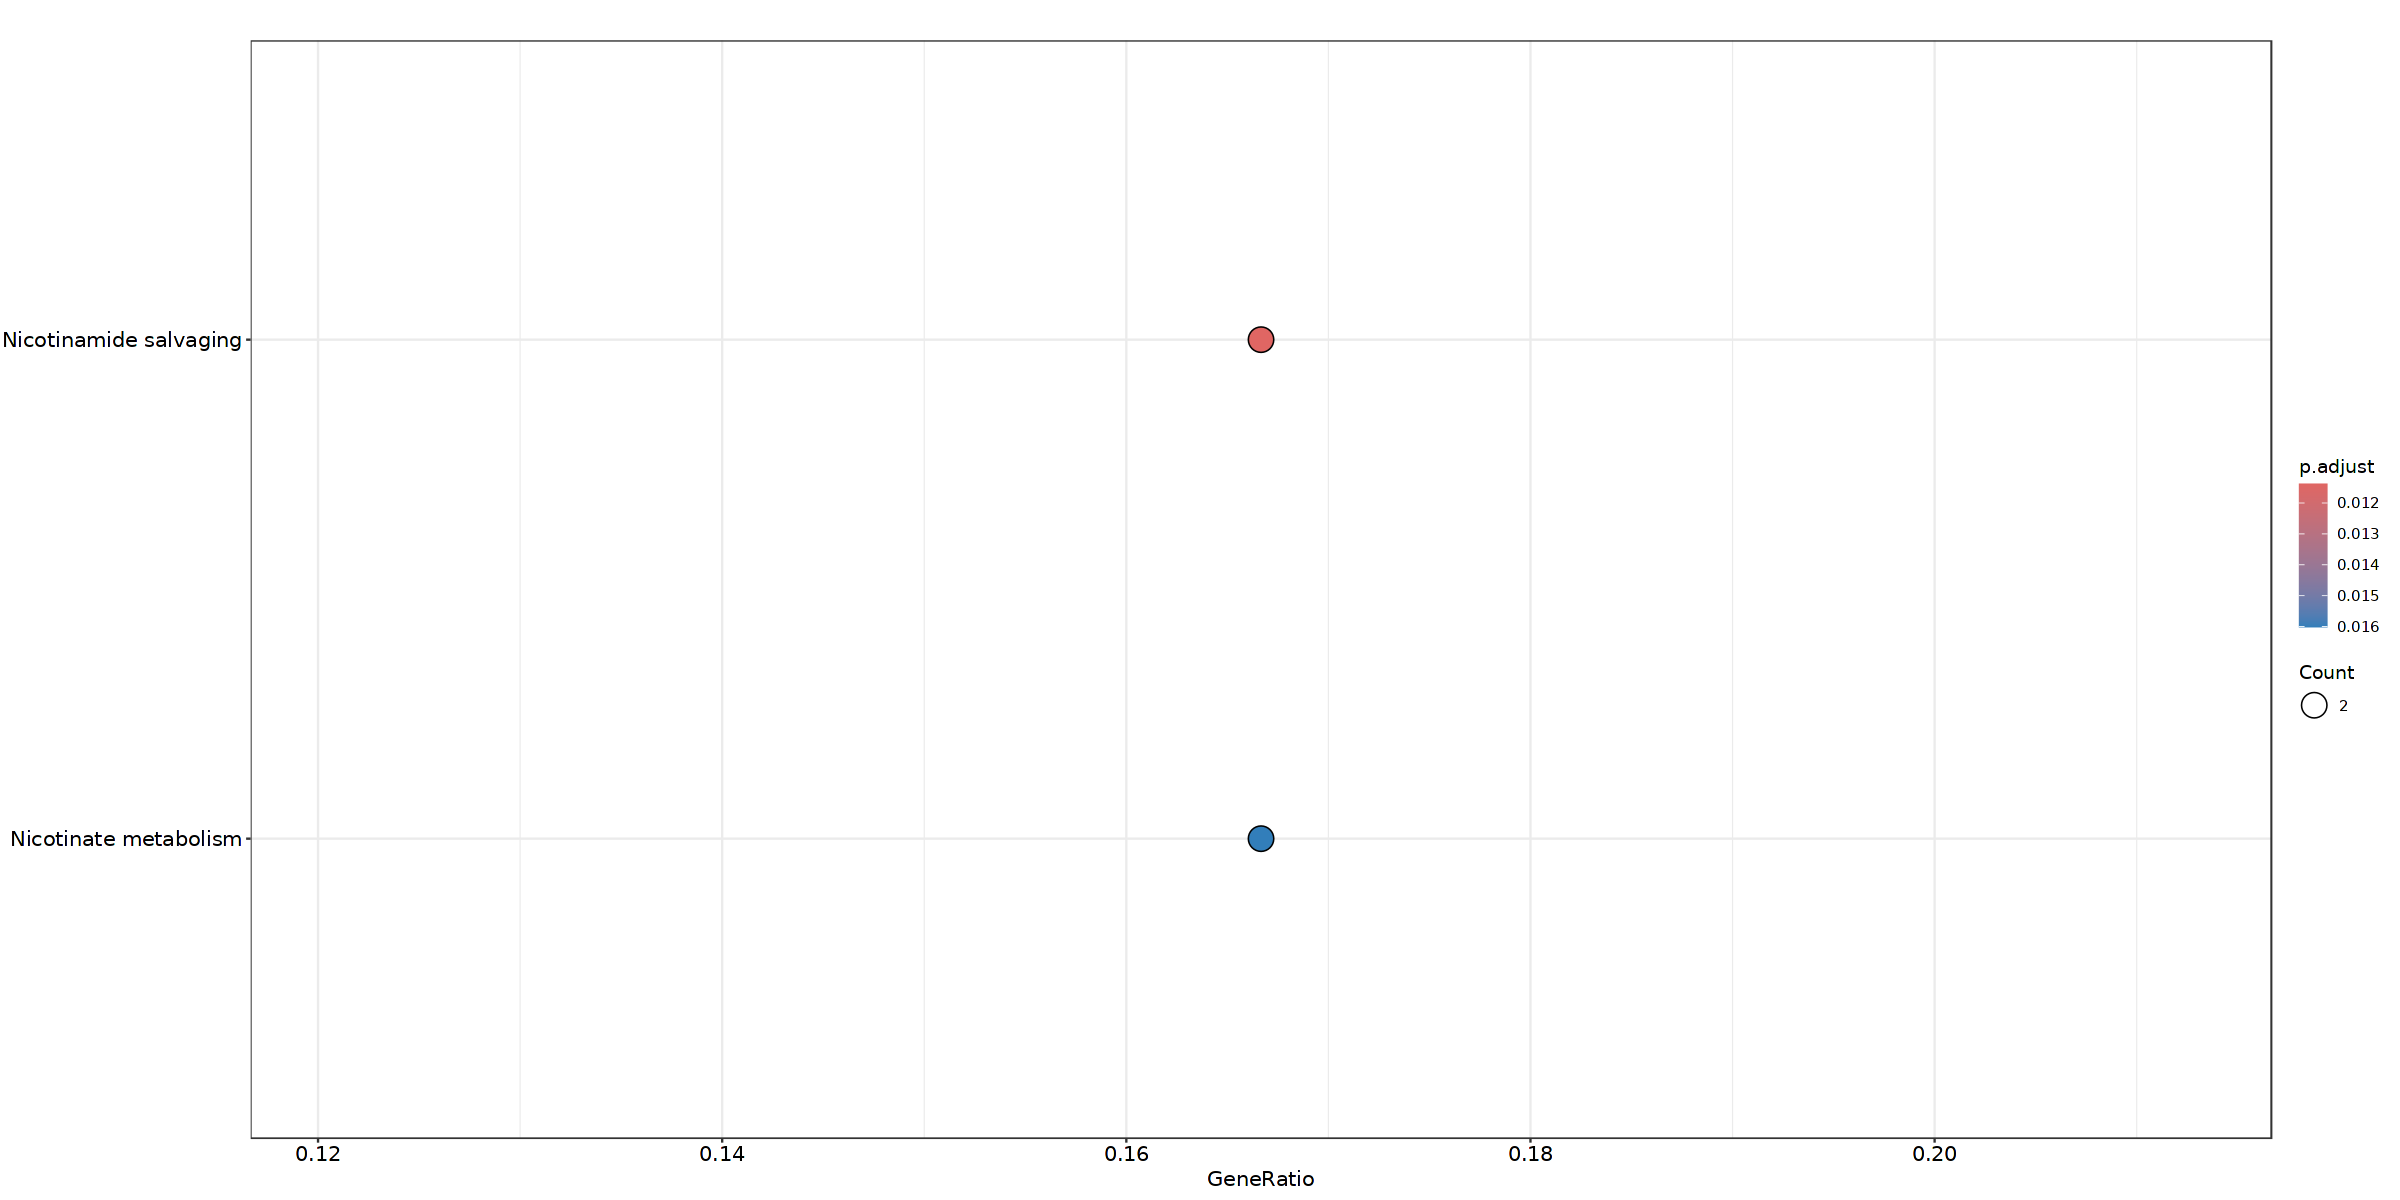

In [275]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [276]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

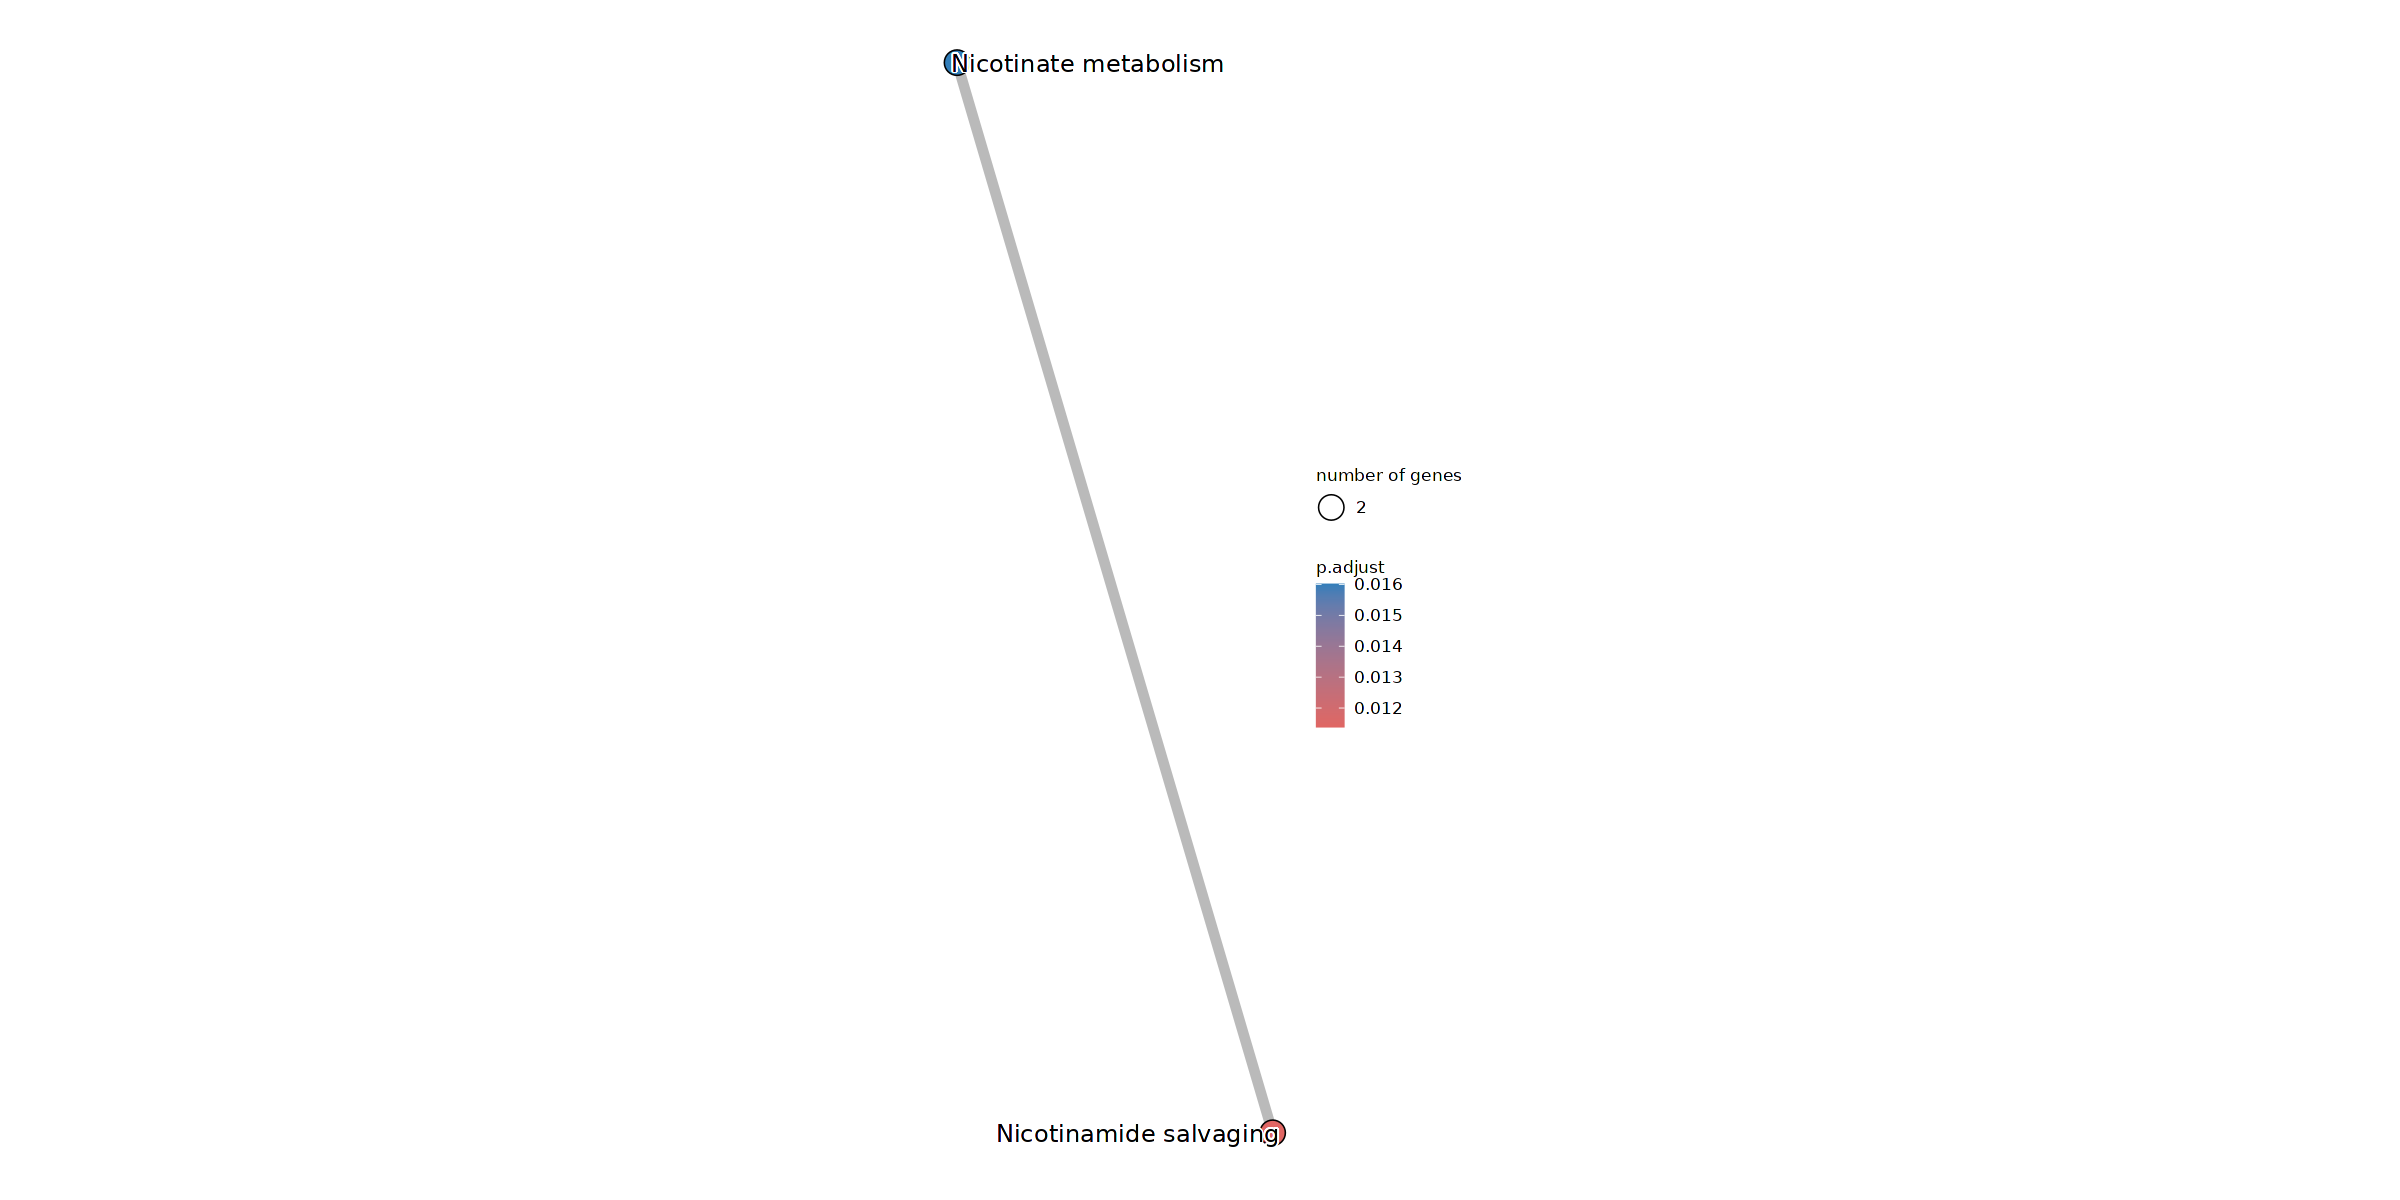

In [277]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

In [278]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=1, qvalueCutoff = 1, pAdjustMethod = "fdr", readable=T)

In [279]:
modulesReactome

#
# over-representation test
#
#...@organism 	 mouse 
#...@ontology 	 Reactome 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:21] "17472" "100702" "76074" "22436" "20194" "14130" "268970" ...
#...pvalues adjusted by 'fdr' with cutoff <1 
#...42 enriched terms found
'data.frame':	42 obs. of  9 variables:
 $ ID         : chr  "R-MMU-197264" "R-MMU-196807" "R-MMU-196849" "R-MMU-75205" ...
 $ Description: chr  "Nicotinamide salvaging" "Nicotinate metabolism" "Metabolism of water-soluble vitamins and cofactors" "Dissolution of Fibrin Clot" ...
 $ GeneRatio  : chr  "2/12" "2/12" "2/12" "1/12" ...
 $ BgRatio    : chr  "18/8582" "30/8582" "110/8582" "12/8582" ...
 $ pvalue     : num  0.000271 0.000763 0.009881 0.016661 0.018038 ...
 $ p.adjust   : num  0.0114 0.016 0.1024 0.1024 0.1024 ...
 $ qvalue     : num  0.00627 0.00883 0.05644 0.05644 0.05644 ...
 $ geneID     : chr  "Parp9/Parp14" "Parp9/Parp14" "Parp9/Parp14" "S100a10" ...
 $ Count      : int  2 2 2 1 1 1 1 1 2 1 ...
#...Citation
  Guan

In [280]:
write.csv(as.data.frame(modulesReactome), paste0(OS_path_outputs, "GO_DORCs_OPC_",highest_cat,"_",second_highest_cat,".csv"), row.names=FALSE)

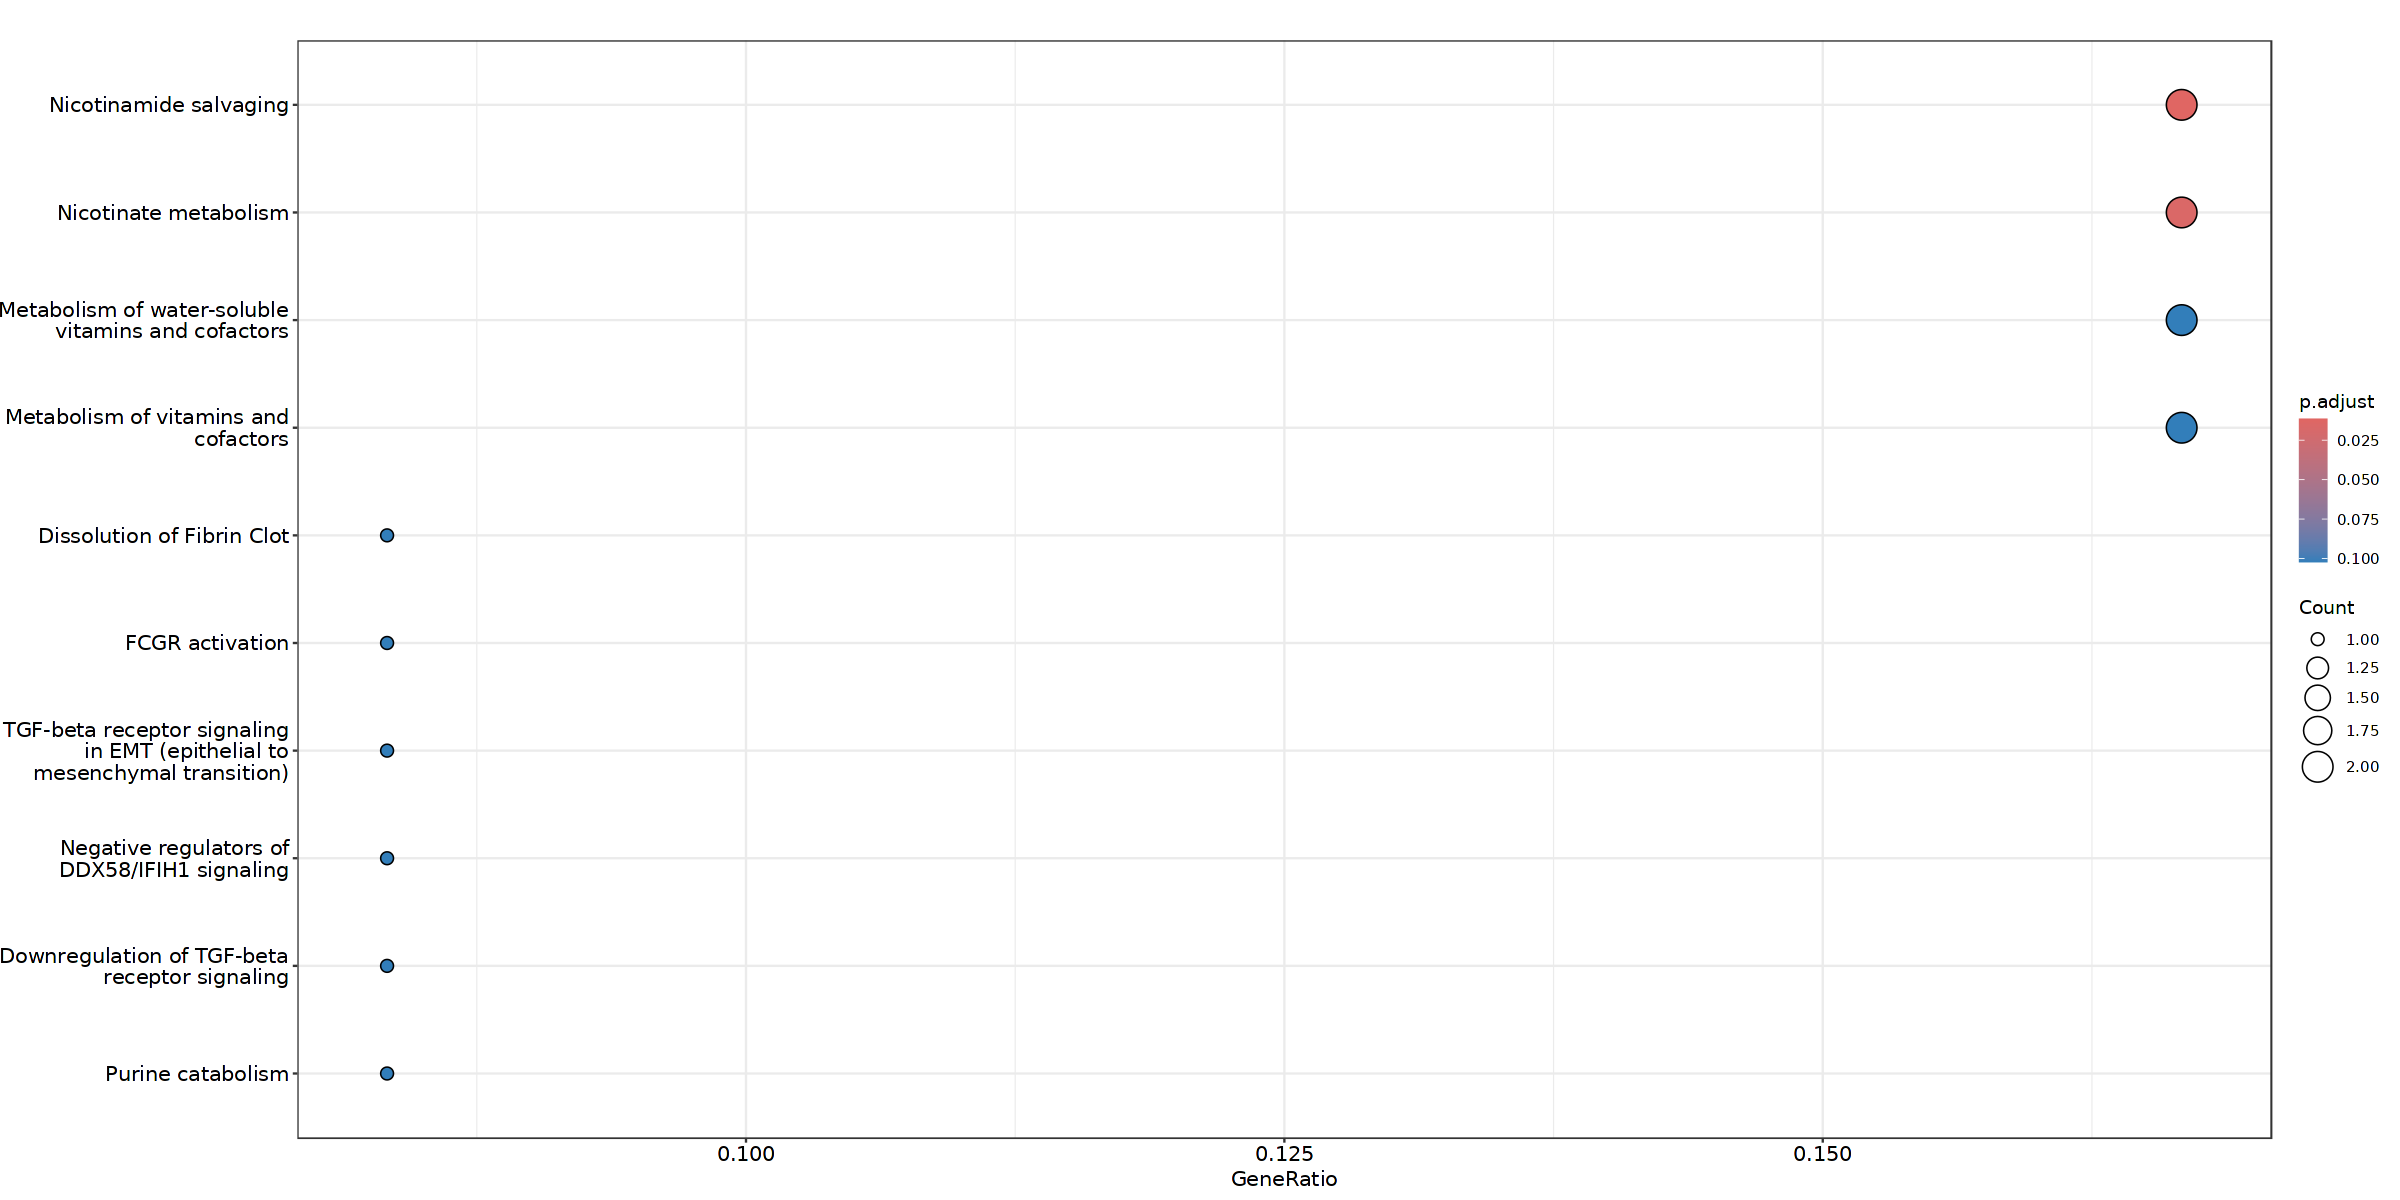

In [492]:
options(repr.plot.width=20, repr.plot.height=10)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [493]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

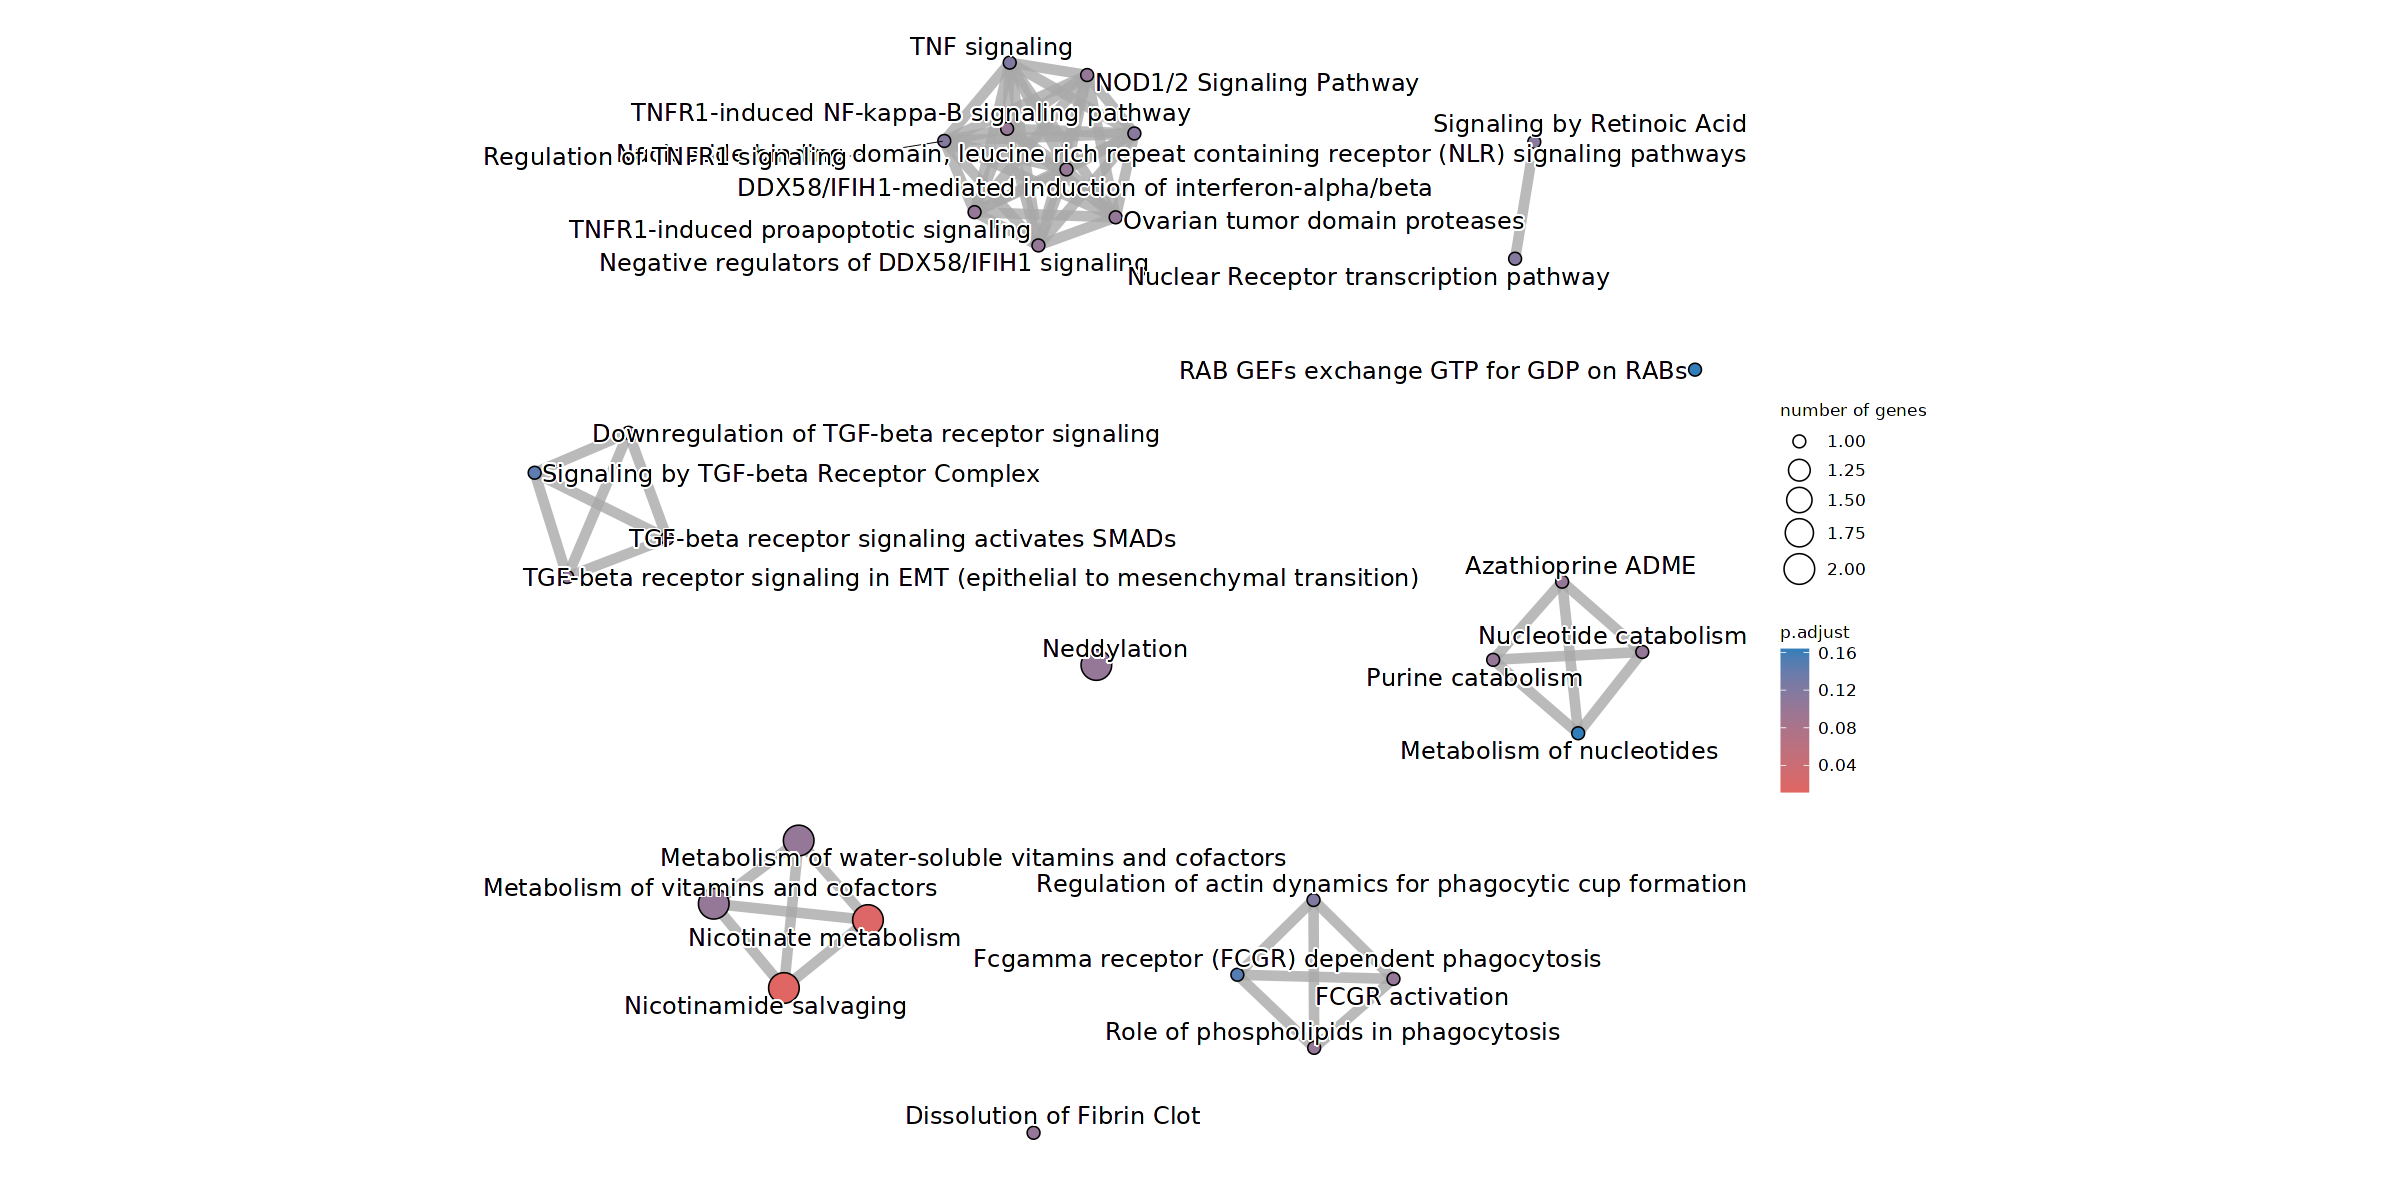

In [494]:
options(repr.plot.width=20, repr.plot.height=10)
emapplot(modulesReactome)

##### Sub category 10

In [495]:
highest_cat <- "Late"
second_highest_cat <- "Ctrl"

In [496]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [497]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [498]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [499]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [500]:
length(gene_list)

[1] 0

##### Sub category 11

In [501]:
highest_cat <- "Late"
second_highest_cat <- "Early"

In [502]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [503]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [504]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [505]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [506]:
length(gene_list)

[1] 0

##### Sub category 12

In [507]:
highest_cat <- "Late"
second_highest_cat <- "Peak"

In [508]:
gene_list <- rownames(df_dynamics_scaled[df_dynamics_scaled[,highest_cat, drop=FALSE] == 1,])

In [509]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [510]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [511]:
gene_list <- rownames(subset(df_dynamics_scaled[gene_list,no_highest_cat], max.col(df_dynamics_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [512]:
length(gene_list)

[1] 0